In [17]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from numpy import loadtxt
from collections import Counter
import os
import imageio

SIZE = 7

def sequence_count(string, dictionary):
    for i in range(len(string)-(SIZE-1)):
        temp_seq = string[i:i+(SIZE)]
        dictionary[temp_seq]+= 1
    return dictionary

def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)

In [13]:
def create_isolated_heatmap(filename):
    #import file
    filename_data = loadtxt(filename+".txt", comments=">",dtype="str")

    #substring from 1, 8
    filename_data = [sub[1:8] for sub in filename_data]

    #create reverse compliments
    
    #Replace A with X
    filename_data = [sub.replace('A', 'X') for sub in filename_data]
    
    #Replace T with A
    filename_data = [sub.replace('U', 'A') for sub in filename_data]
    
    #Replace X with T
    filename_data = [sub.replace('X', 'U') for sub in filename_data]
    
    #Replace C with X
    filename_data = [sub.replace('C', 'X') for sub in filename_data]
    
    #Replace G with C
    filename_data = [sub.replace('G', 'C') for sub in filename_data]
    
    #Replace X with G
    filename_data = [sub.replace('X', 'G') for sub in filename_data]
    
    #Reverse all the strings
    filename_data = [sub[::-1] for sub in filename_data]
    
    #create the dictionary
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()

    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}

    #Update the dictionary:
    for i in filename_data:
        data_dict= sequence_count(i,data_dict)

    #Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))

    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+"_map", data_arr2)

    #map 2D array
    df = pd.read_csv(filename+"_map.csv", header = None)
    
    #set all 0s to black
    df= np.ma.masked_where(df<0.5, df)
    cmap_reds = mpl.cm.get_cmap("Reds").copy()
    cmap_reds.set_bad(color='black')

    #standardized the data with mean and std, then putting it through a sigmoid function 
    def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

    df = (df - df.mean())/(df.std())
    
    df = sigmoid(df)

    fig = plt.figure(figsize=(25,25))
    plt.imshow(df,cmap=cmap_reds)
    plt.rc('font', size=20)
    plt.title(filename+" Map")
    plt.colorbar()
    plt.savefig(filename+" Map")
    plt.show()

In [7]:
filenames = [
    'ALL',
    'Human (Homo sapiens)',
    'Rhesus monkey (Macaca mulatta)',
    'House mouse (Mus musculus)',
    'Norway rat (Rattus norvegicus)',
    'Guinea pig (Cavia porcellus)',
    'Rabbit (Oryctolagus cuniculus)',
    'Dog (Canis familiaris)',
    'Cow (Bos taurus)',
    'Nine-banded armadillo (Dasypus novemcinctus)',
    'Lesser hedgehog tenrec (Echinops telfairi)',
    'Tasmanian devil (Sarcophilus harrisii)',
    'Gray short-tailed opossum (Monodelphis domestica)',
    'Platypus (Ornithorhynchus anatinus)',
    'Chicken (Gallus gallus)',
    'Rock pigeon (Columba livia)',
    'Zebra finch (Taeniopygia guttata)',
    'American alligator (Alligator mississippiensis)',
    'Western painted turtle (Chrysemys picta bellii)',
    'Green anole lizard (Anolis carolinensis)',
    'Burmese python (Python bivittatus)',
    'Schlegels Japanese gecko (Gekko japonicus)',
    'Tuatara (Sphenodon punctatus)',
    'African clawed frog (Xenopus laevis)',
    'Tropical clawed frog (Xenopus tropicalis)',
    'Microcaecilia (Microcaecilia unicolor)',
    'Coelacanth (Latimeria chalumnae)',
    'Pufferfish (Tetraodon nigroviridis)',
    'Cod (Gadus morhua)',
    'Asian swamp eel (Monopterus albus)',
    'Zebrafish (Danio rerio)',
    'Spotted gar (Lepisosteus oculatus)',
    'Cloudy Catshark (Scyliorhinus torazame)',
    'Australian ghostshark (Callorhinchus milii)',
    'Inshore hagfish (Eptatretus burgeri)',
    'Sea Lamprey (Petromyzon marinus)',
    'Sea Squirt (Ciona intestinalis)',
    'Florida lancelet (Branchiostoma floridae)',
    'European lancelet (Branchiostoma lanceolatum)',
    'Saccoglossus (Saccoglossus kowalevskii)',
    'Ptychodera (Ptychodera flava)',
    'Purple sea urchin (Strongylocentrotus purpuratus)',
    'Bat starfish (Patiria miniata)',
    'Xenoturbella (Xenoturbella bocki)',
    'Fruit fly (Drosophila melanogaster)',
    'Fruit fly (Drosophila simulans)',
    'Fruit fly (Drosophila yakuba)',
    'Fruit fly (Drosophila ananassae)',
    'Fruit fly (Drosophila mojavensis)',
    'Yellow fever mosquito (Aedes aegypti)',
    'Longwing butterfly (Heliconius melpomene)',
    'Red flour beetle (Tribolium castaneum)',
    'Cockroach (Blattella germanica)',
    'Common water flea (Daphnia pulex)',
    'Large common water flea (Daphnia magna)',
    'Deer tick (Ixodes scapularis)',
    'Arizona bark scorpion (Centruroides sculpturatus)',
    'Atlantic horseshoe crab (Limulus polyphemus)',
    'Roundworm (Caenorhabditis elegans)',
    'Roundworm (Caenorhabditis briggsae)',
    'Large roundworm (Ascaris suum)',
    'Polychaete worm (Capitella teleta)',
    'Common brandling worm (Eisenia fetida)',
    'Owl limpet (Lottia gigantea)',
    'Pacific oyster (Crassostrea gigas)',
    'Chambered Nautilus (Nautilus pompilius)',
    'Hawaiian bobtail squid (Euprymna scolopes)',
    'California two-spot octopus (Octopus bimaculoides)',
    'Common octopus (Octopus vulgaris)',
    'Lingula (Lingula anatina)',
    'Freshwater planarian (Schmidtea mediterranea)',
    'Rotifer (Brachionus plicatilis)',
    'Starlet sea anemone (Nematostella vectensis)',
    'Freshwater-polyp (Hydra vulgaris)',
    'Amphimedon (Amphimedon queenslandica)',
    'Muellers freshwater sponge (Ephydatia muelleri)'
]

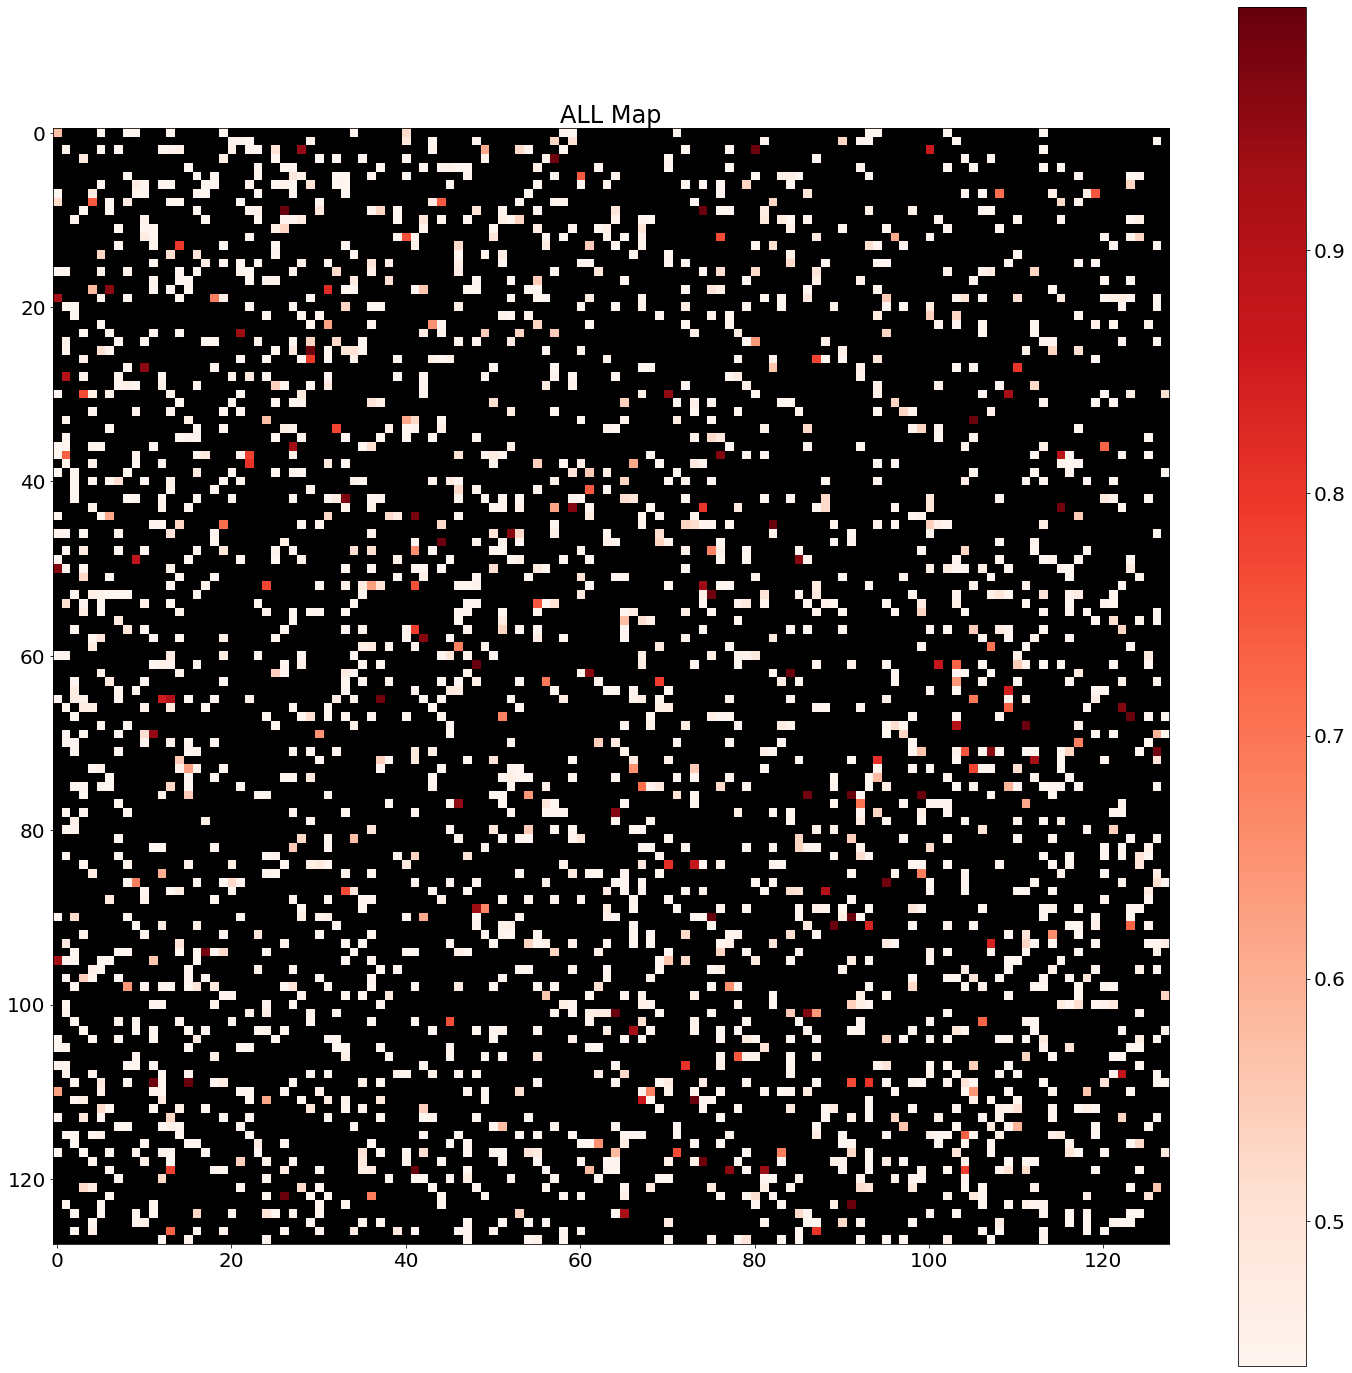

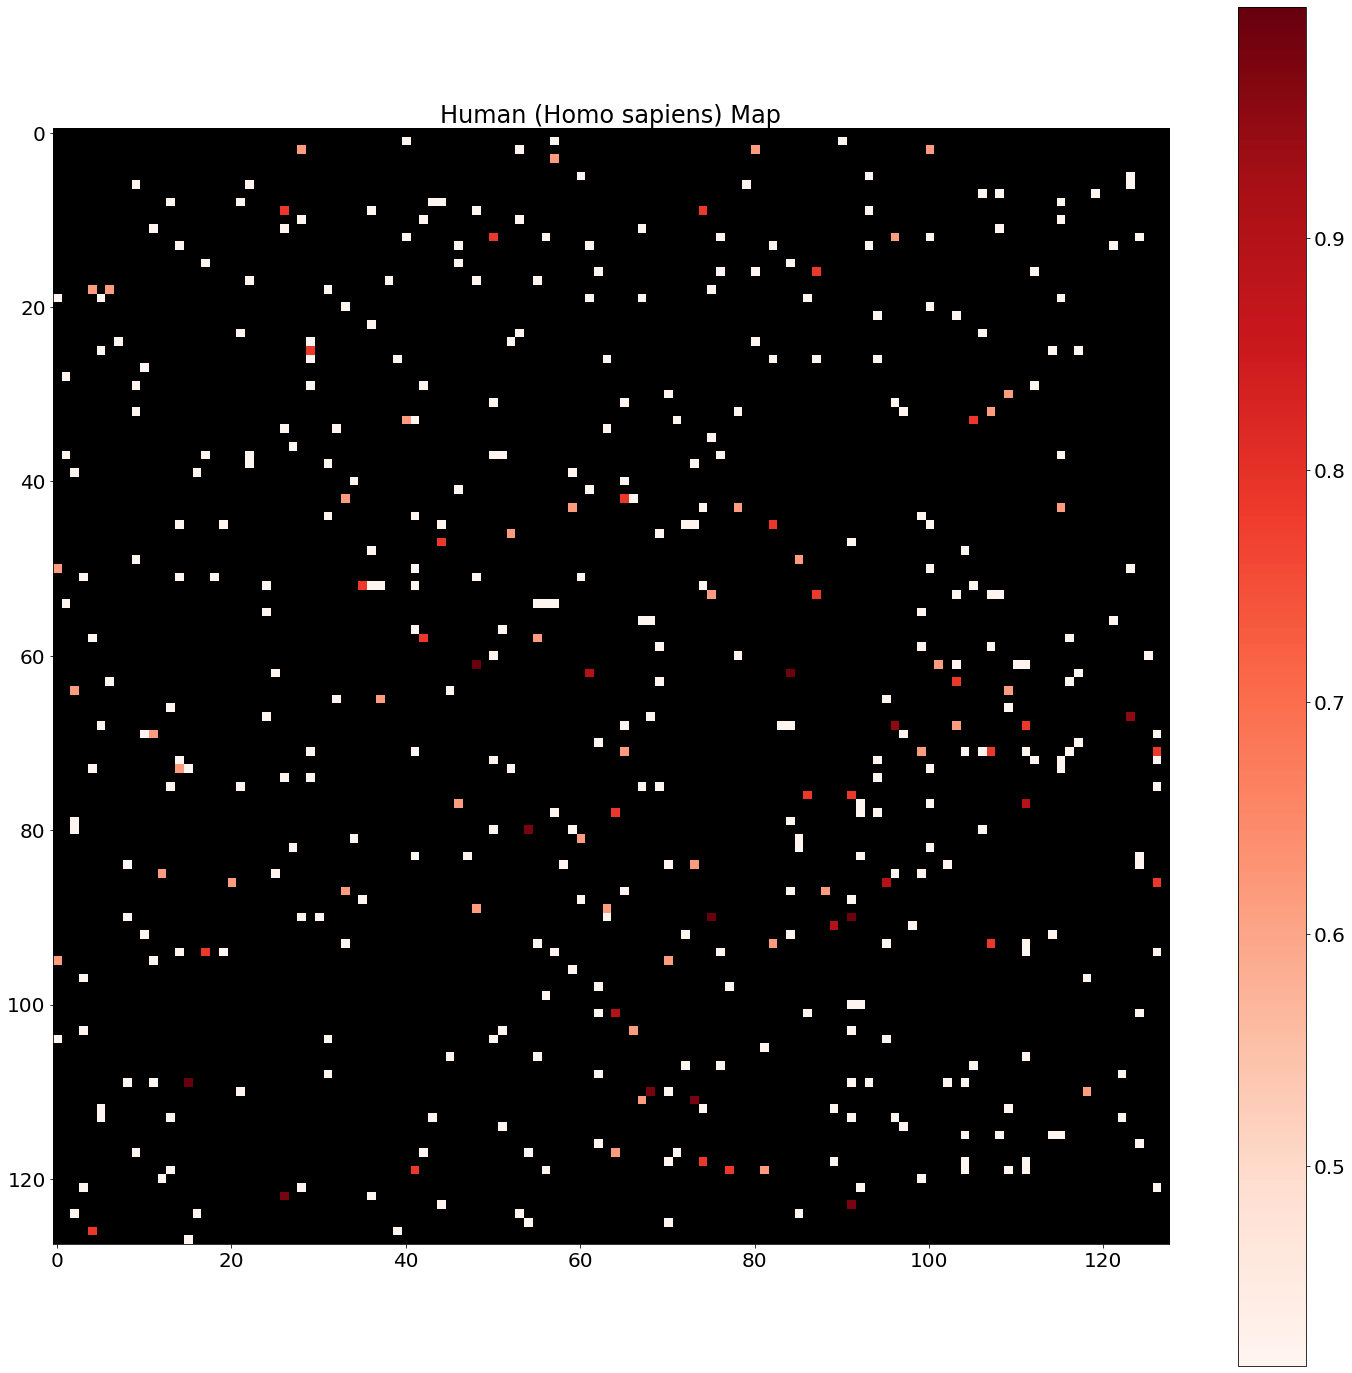

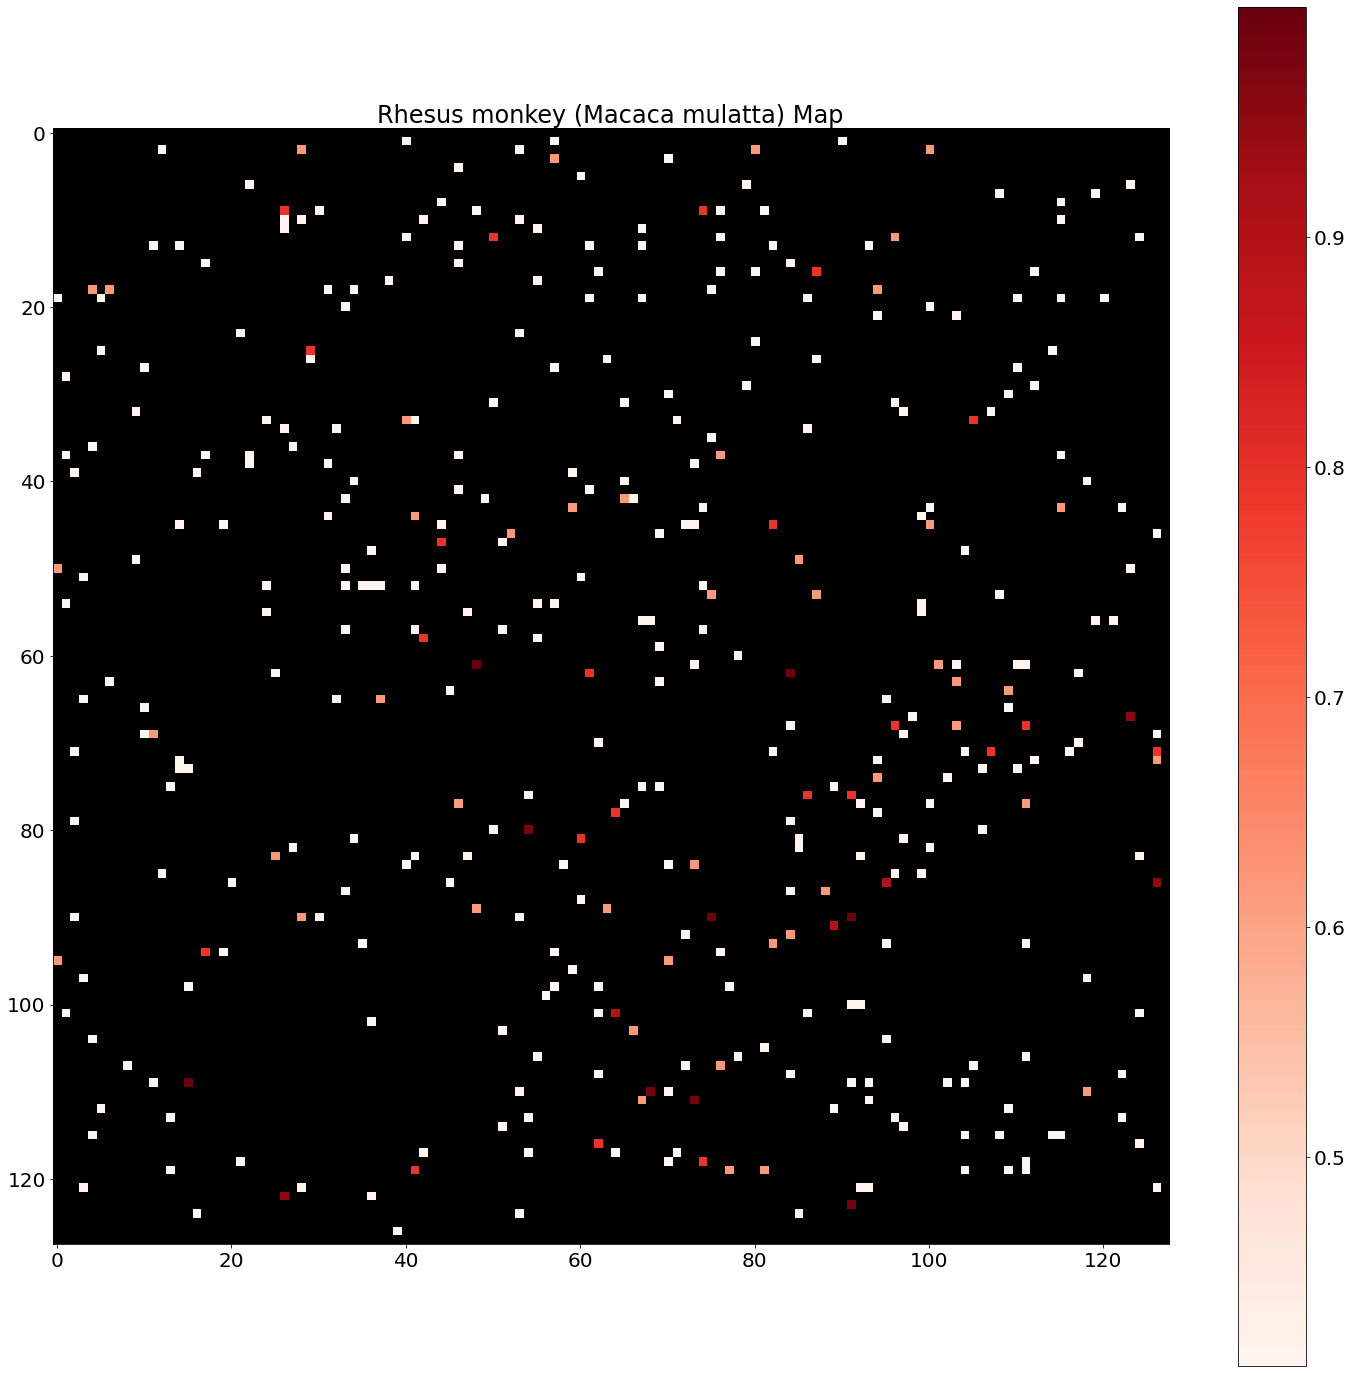

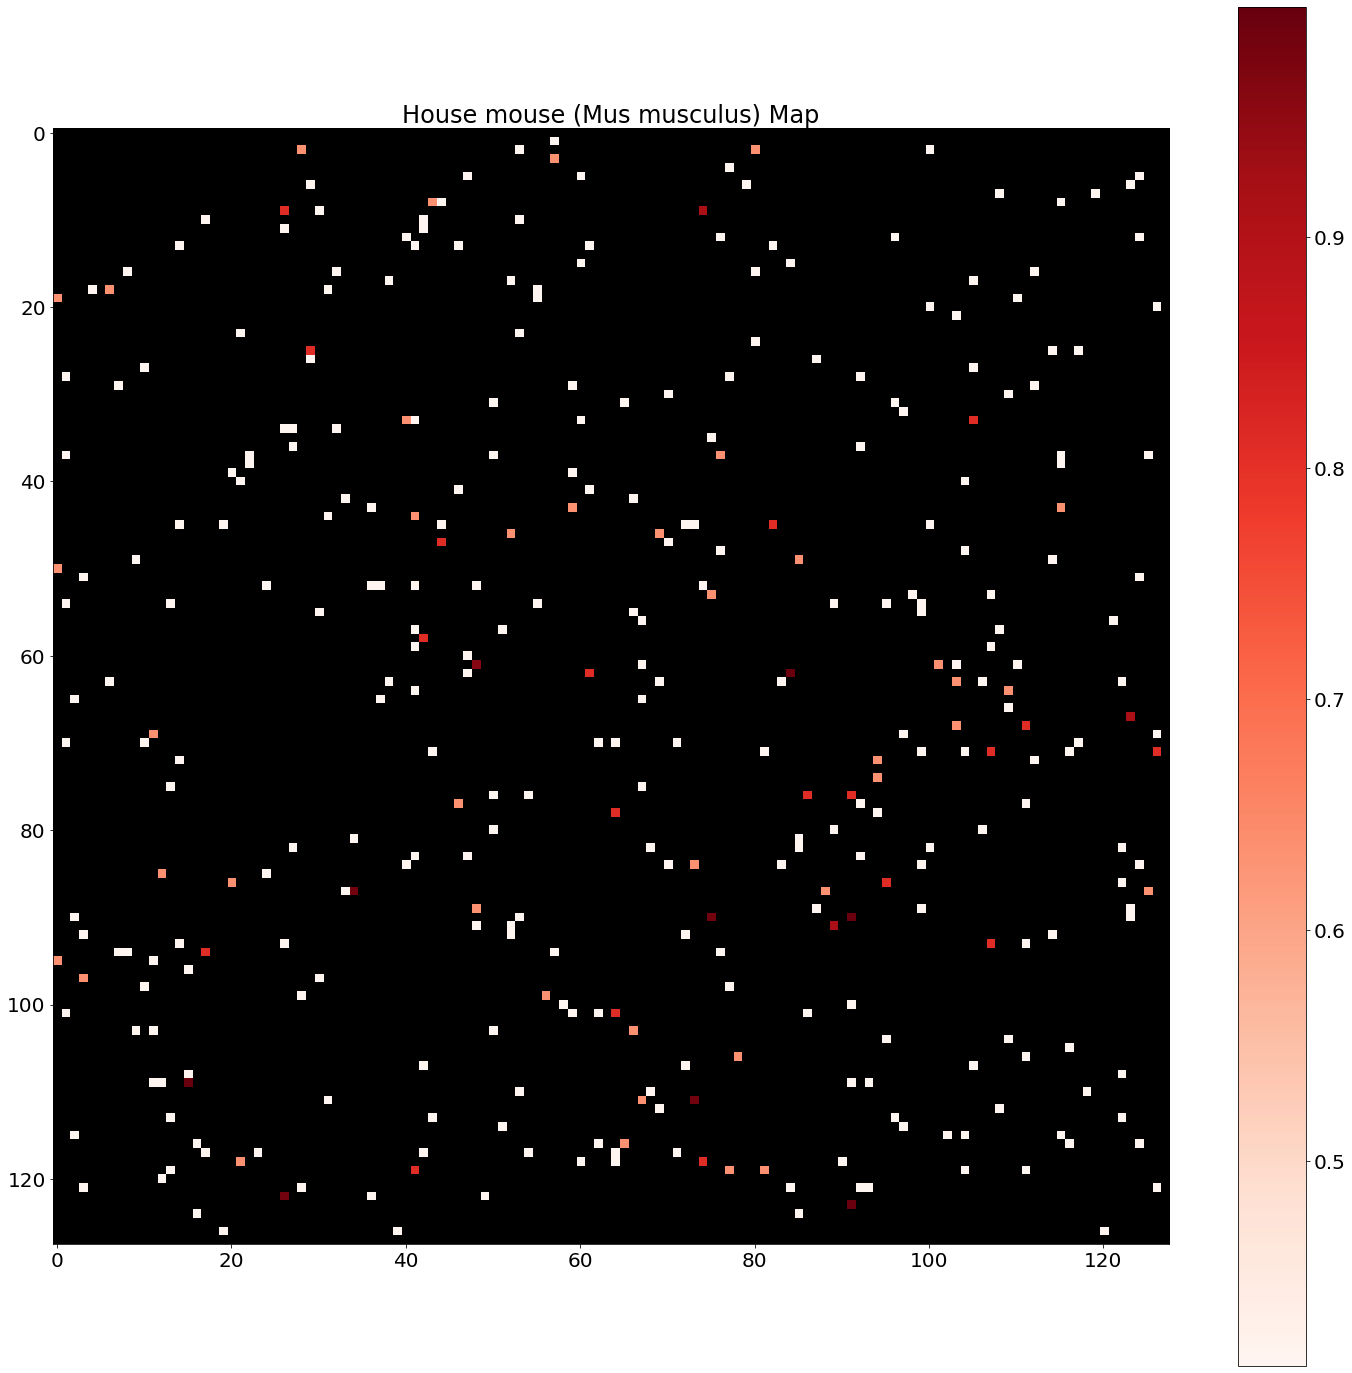

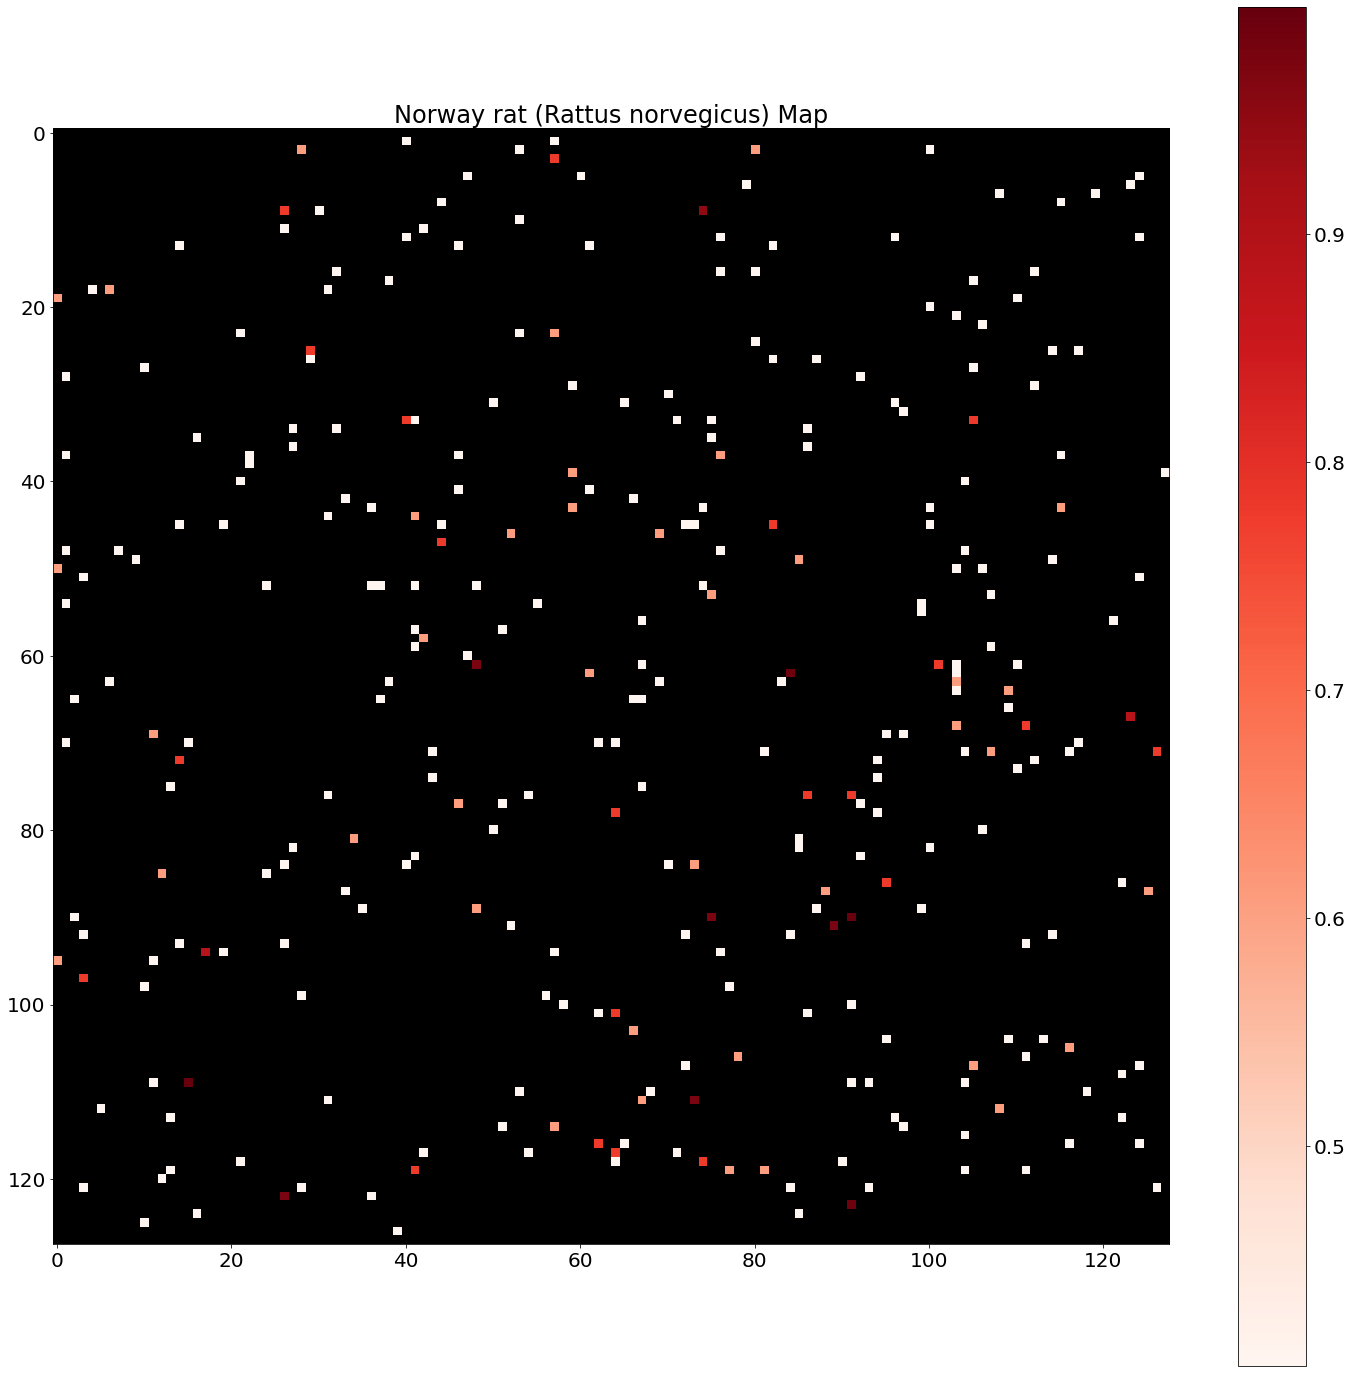

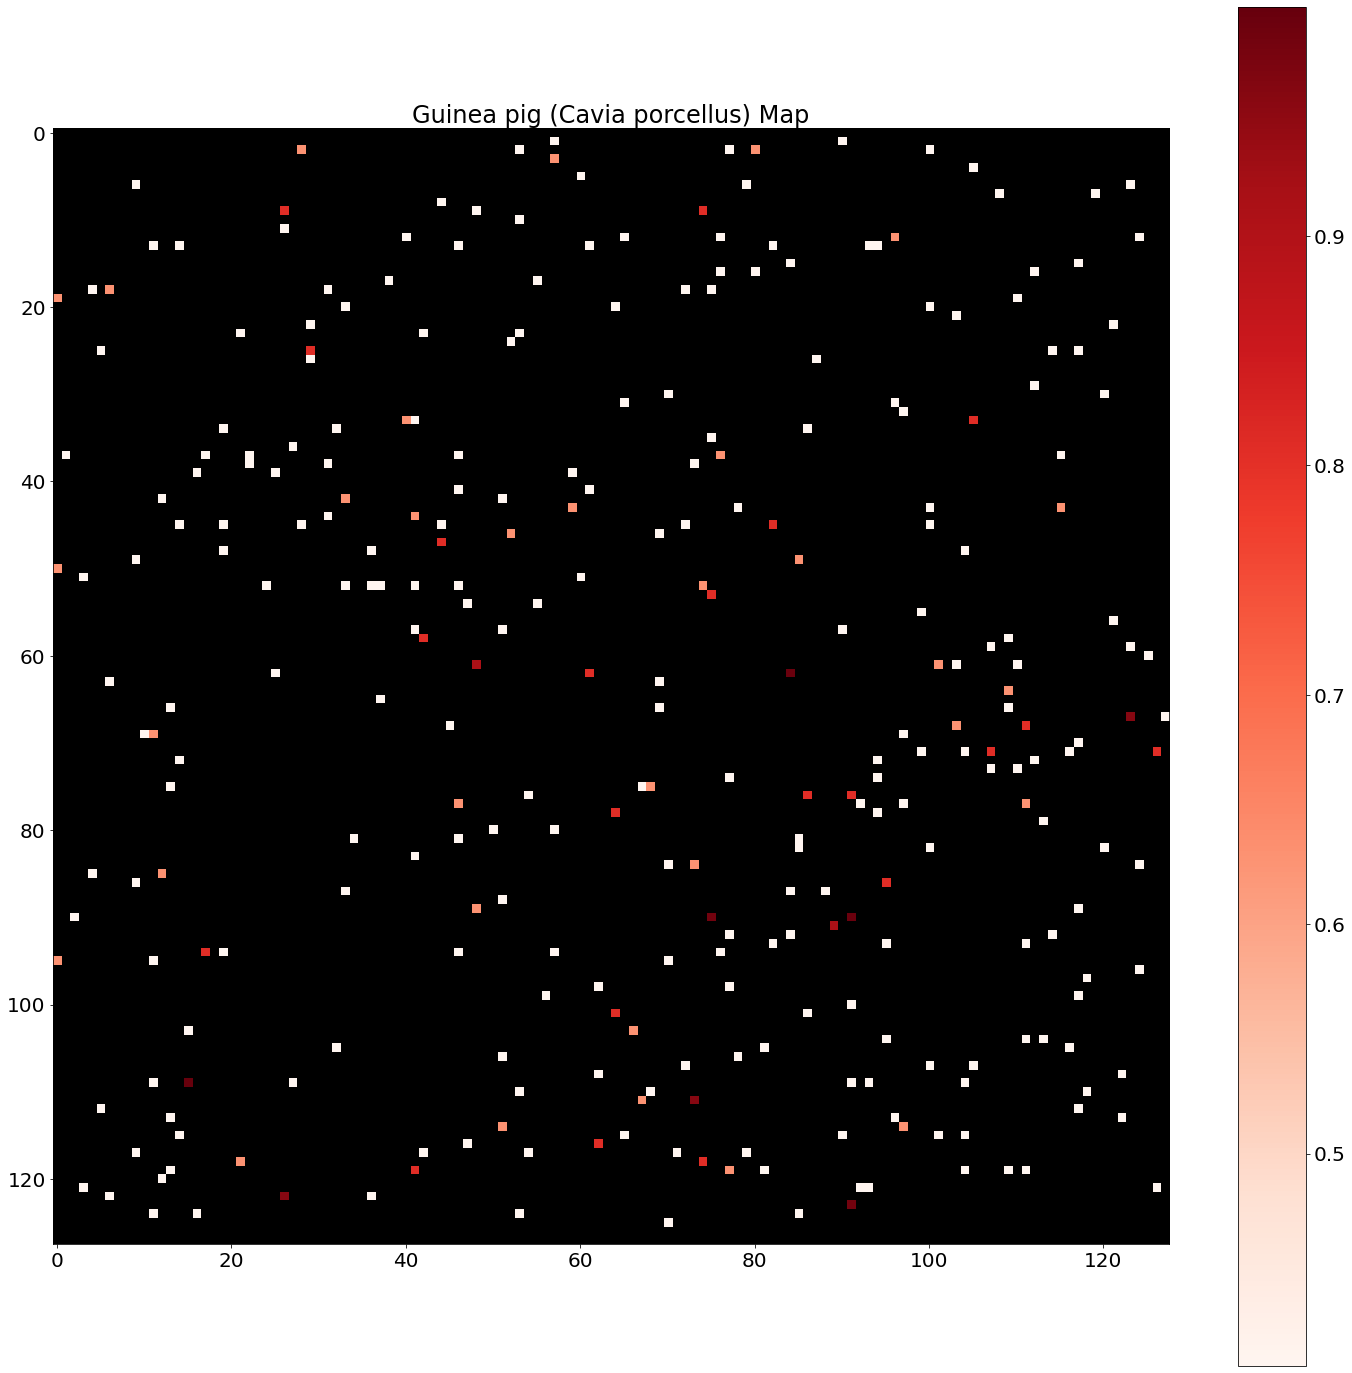

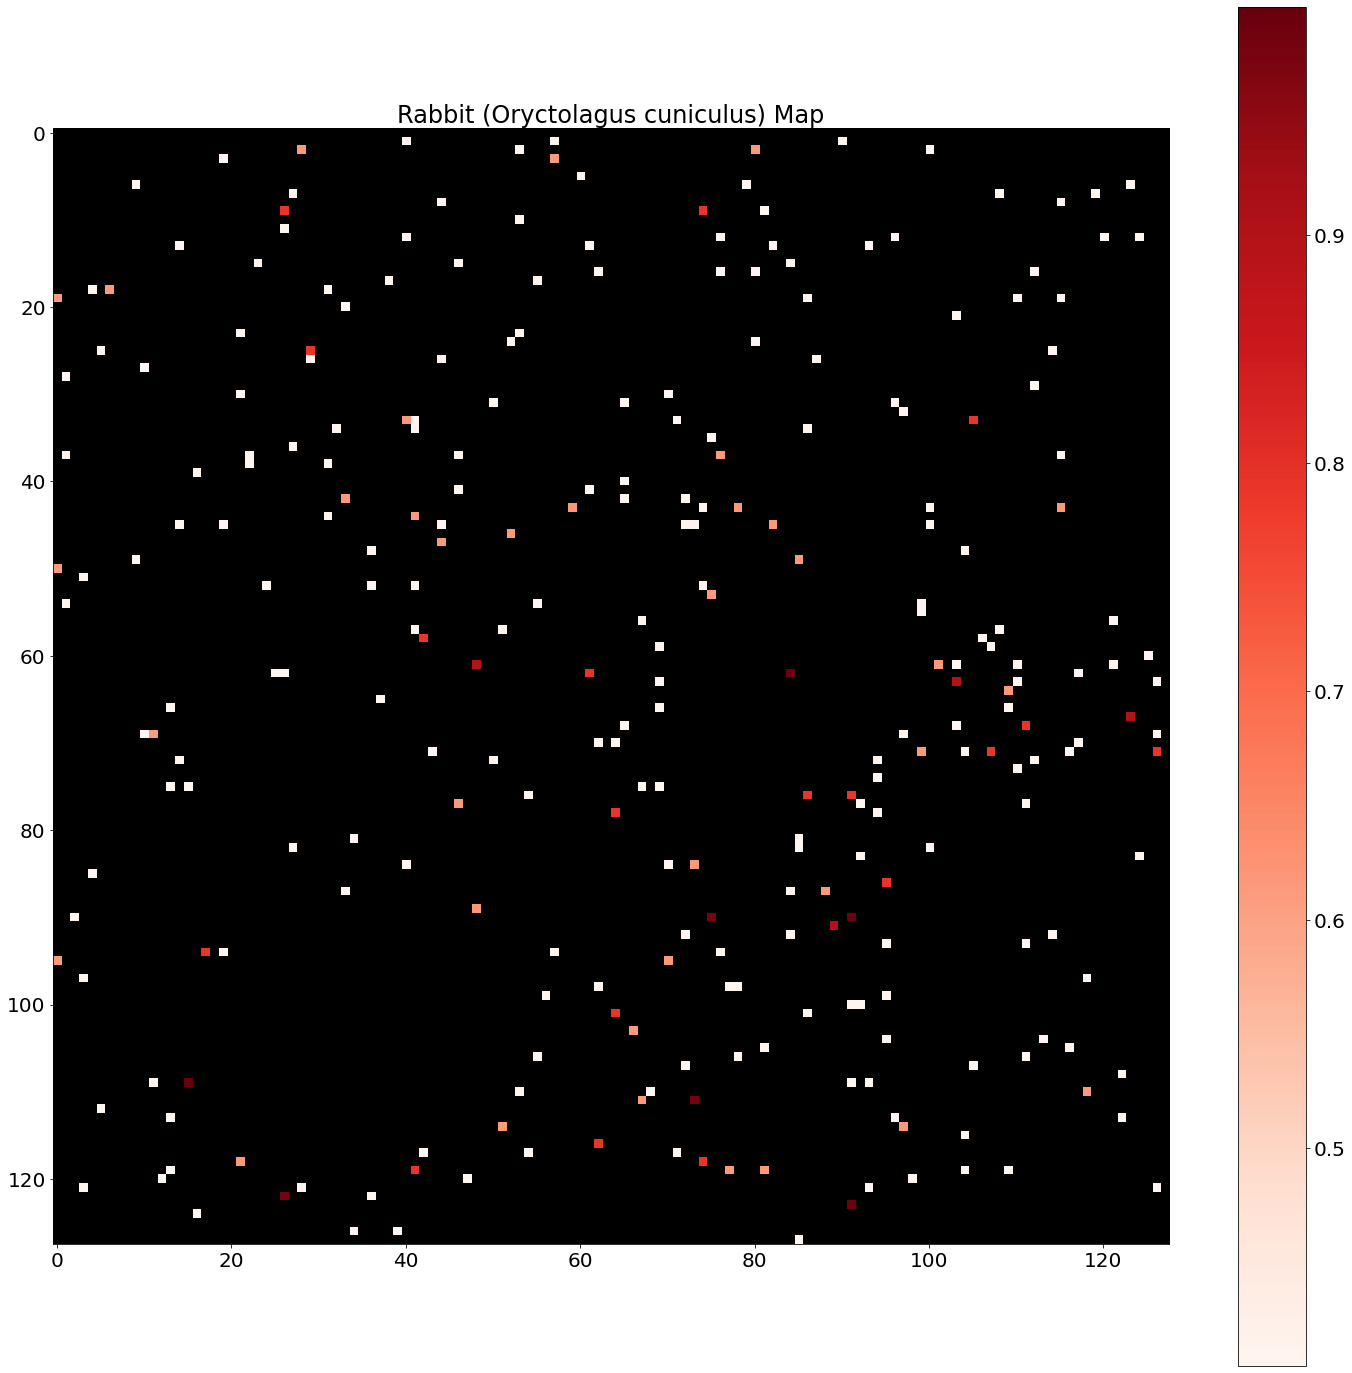

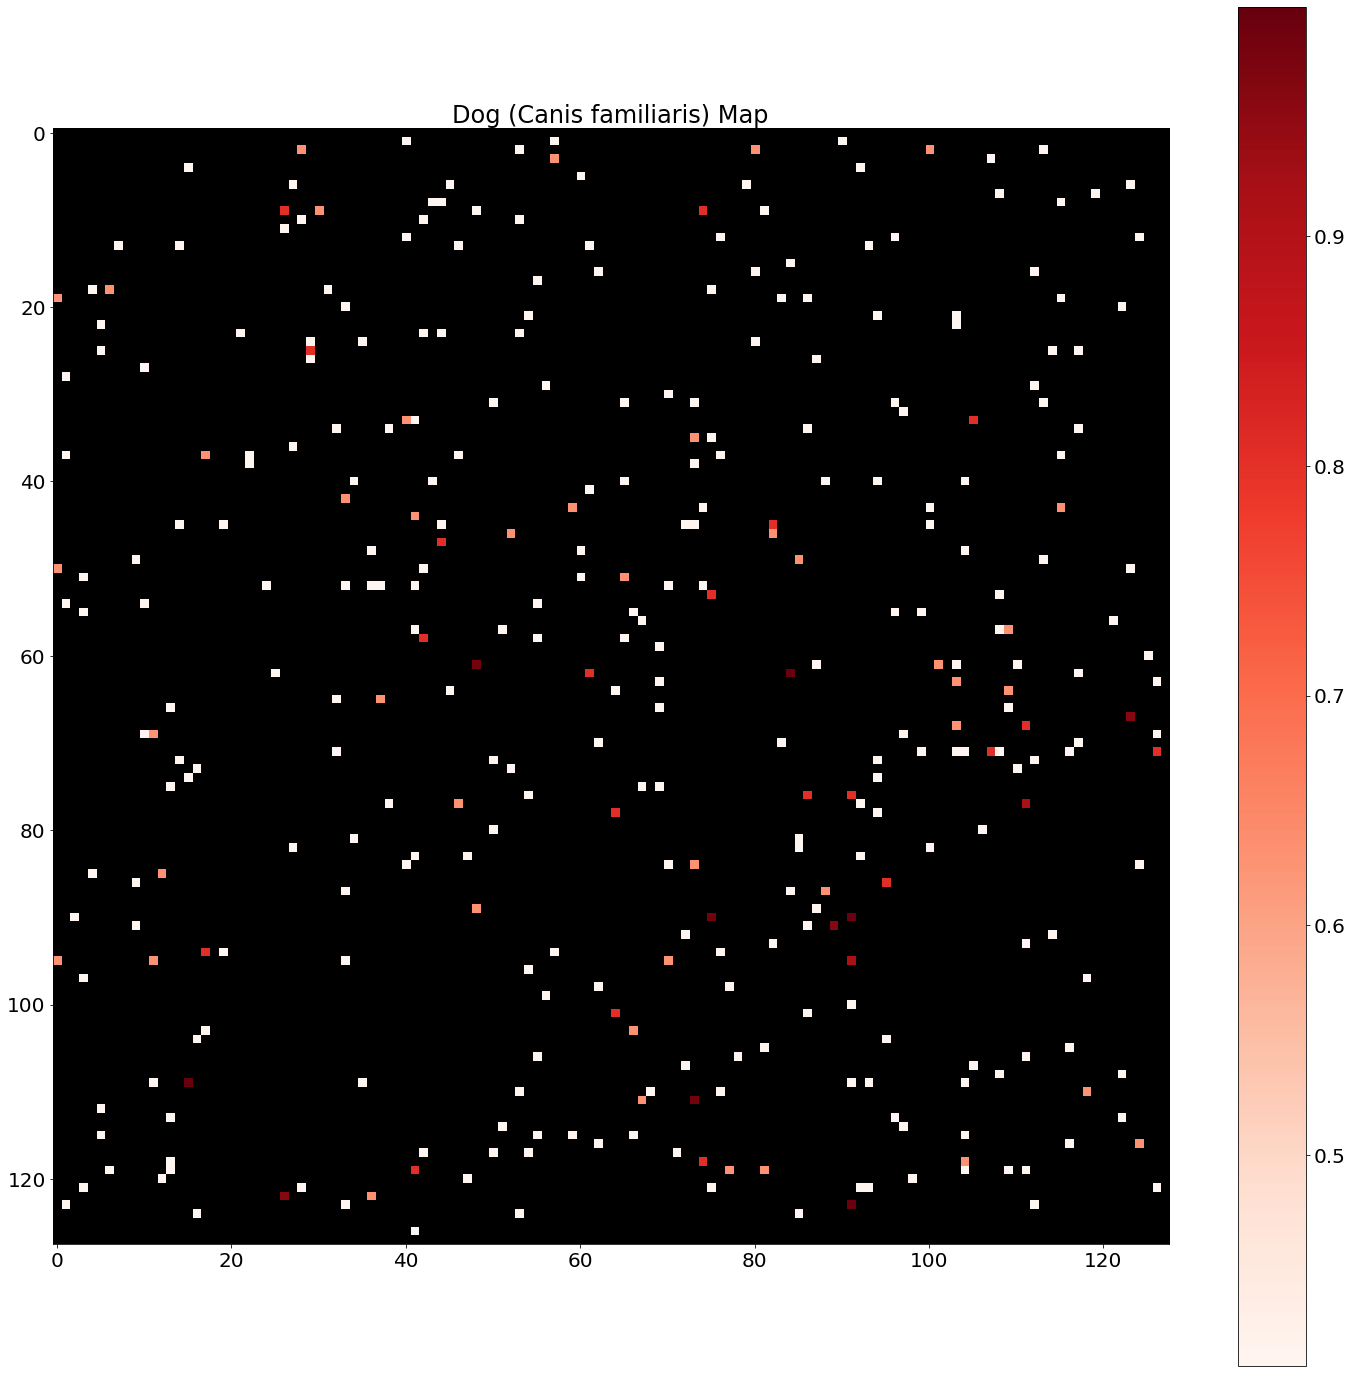

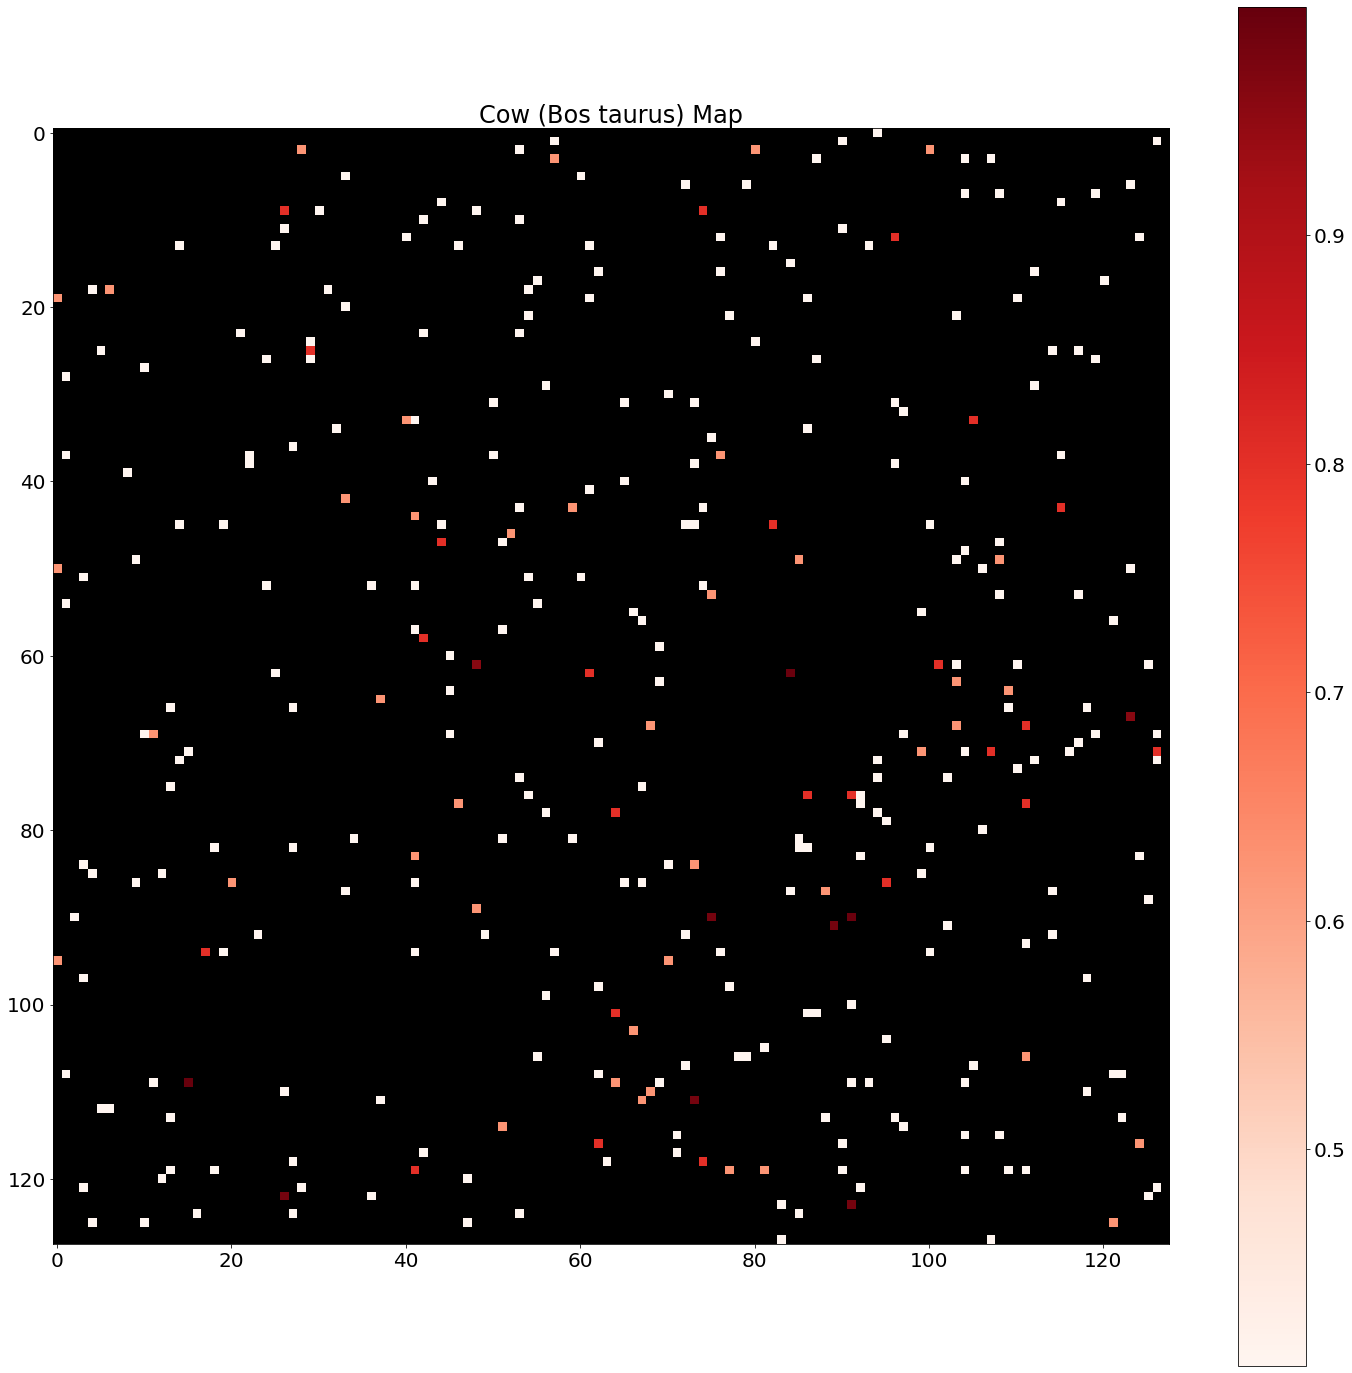

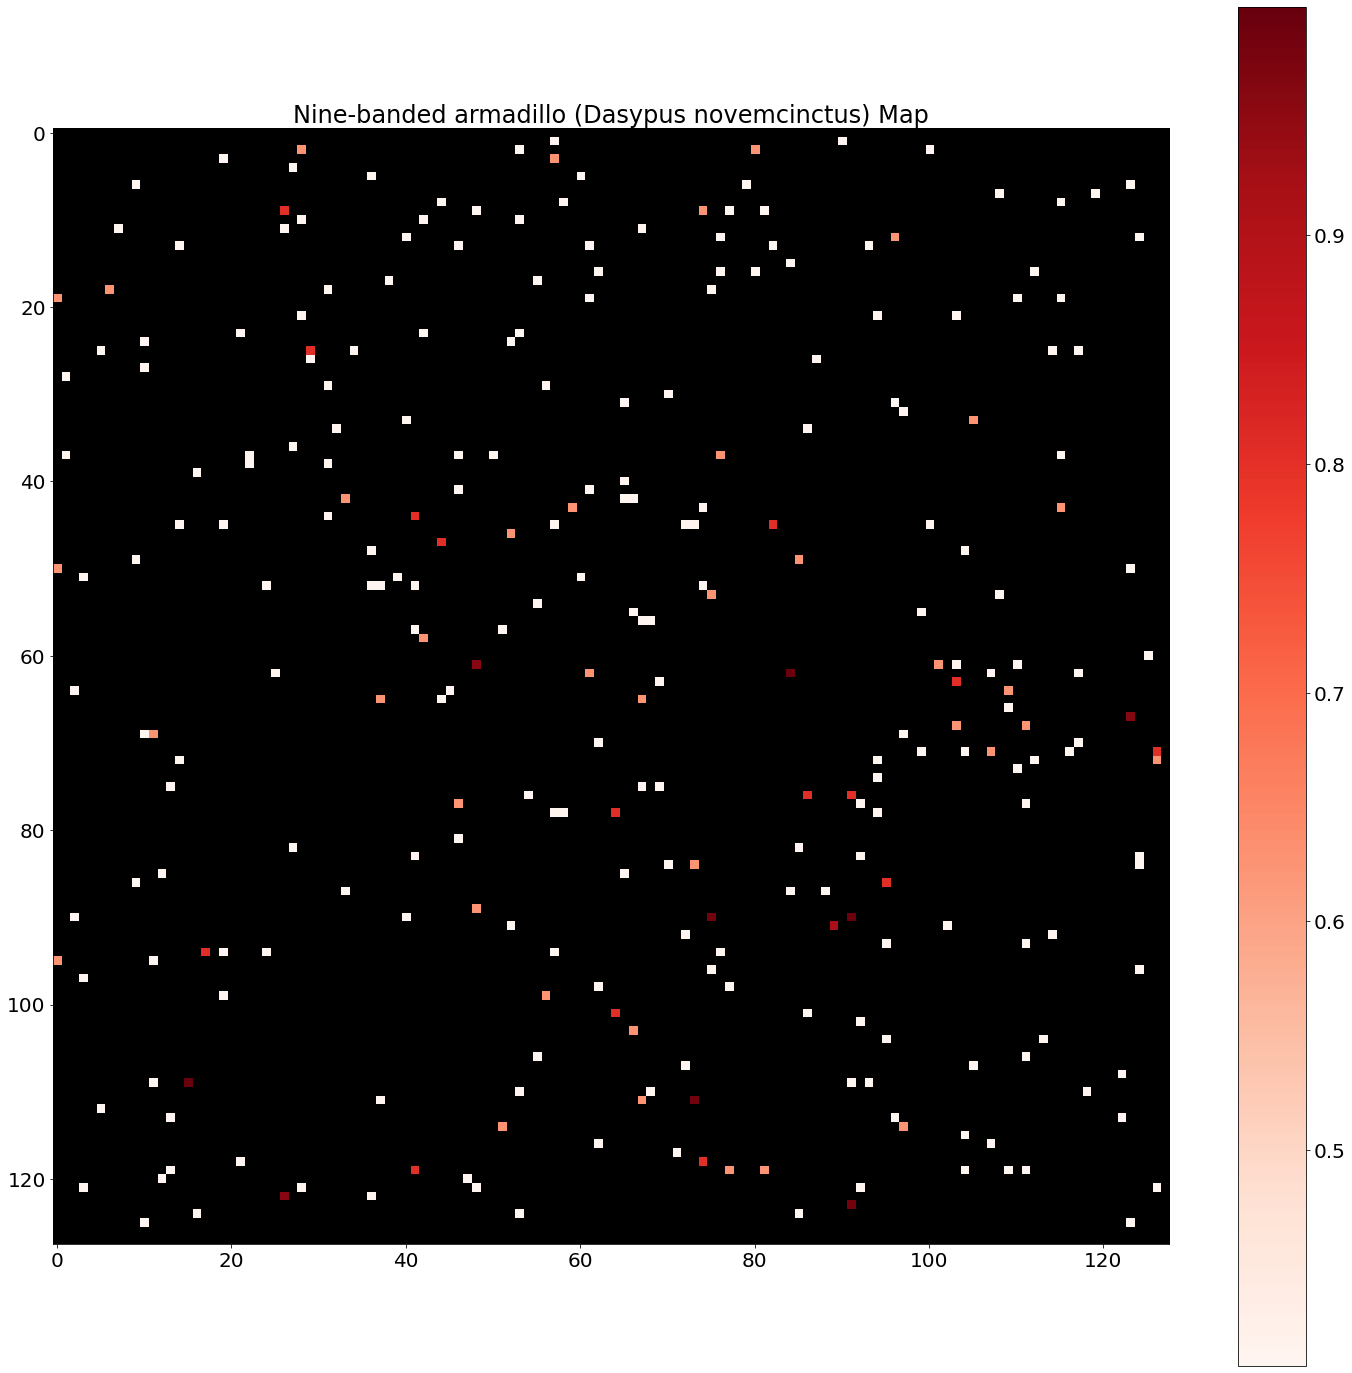

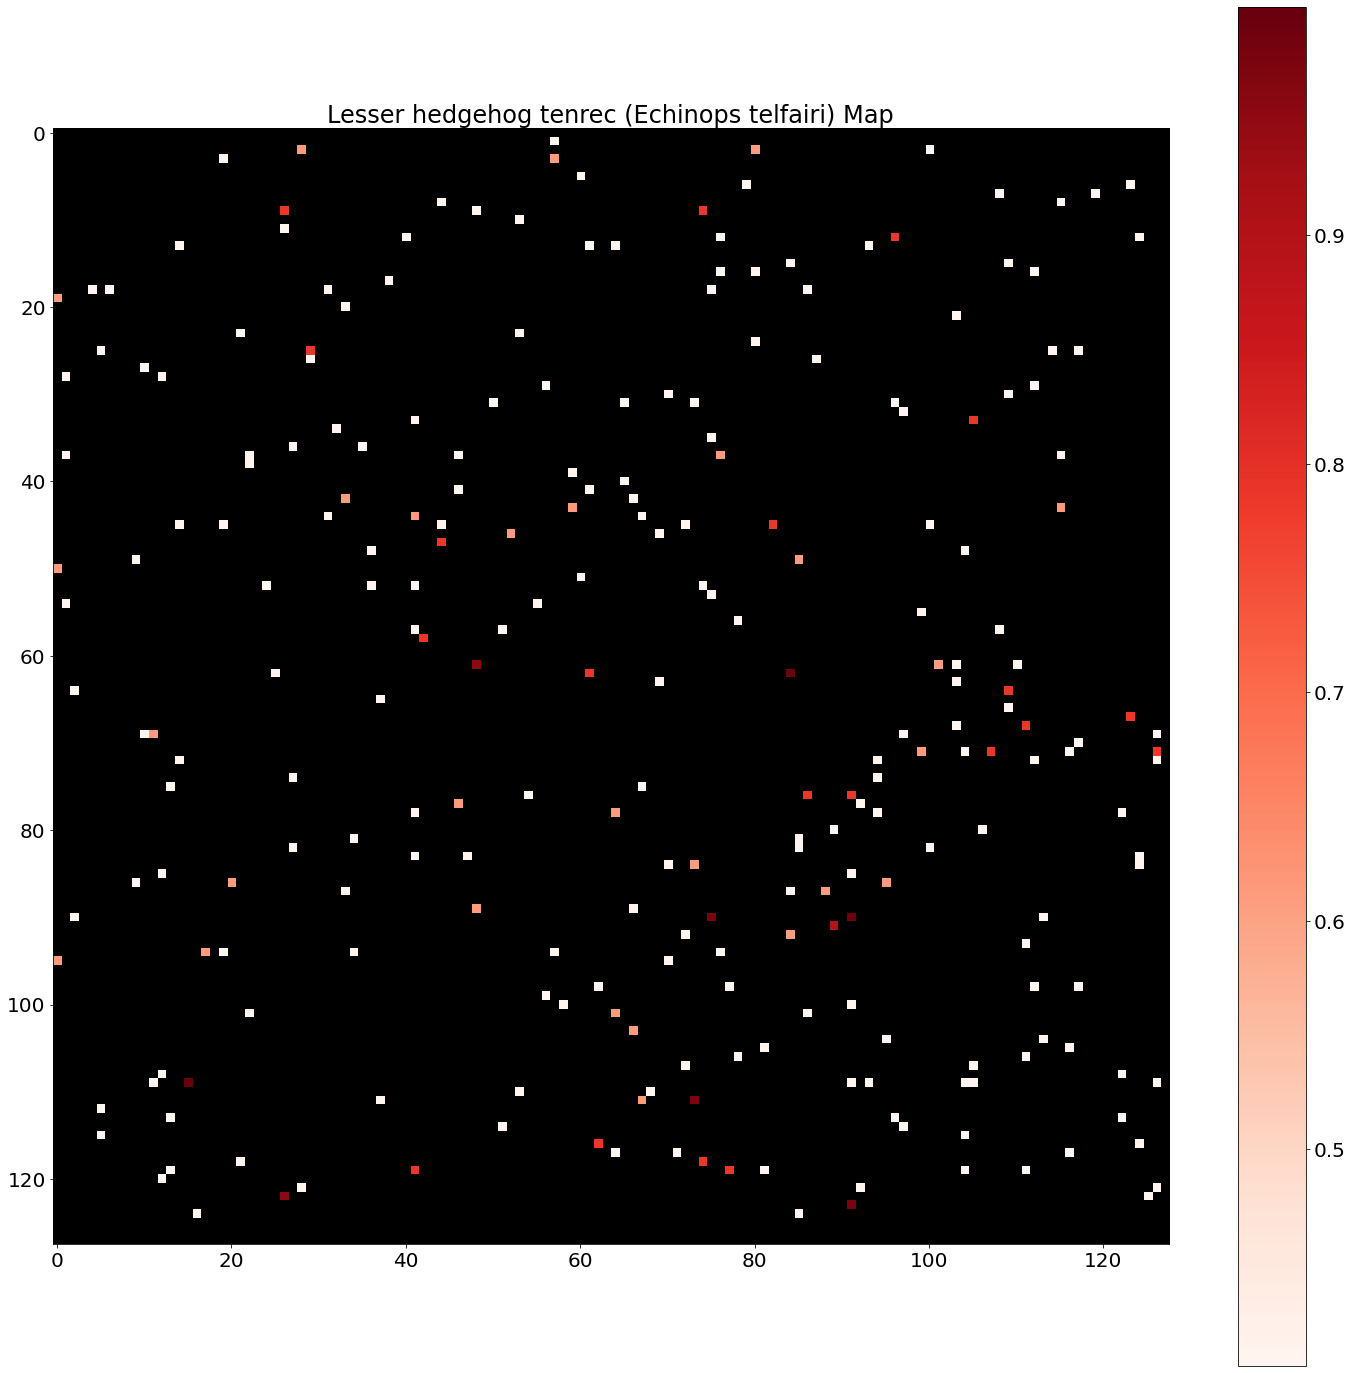

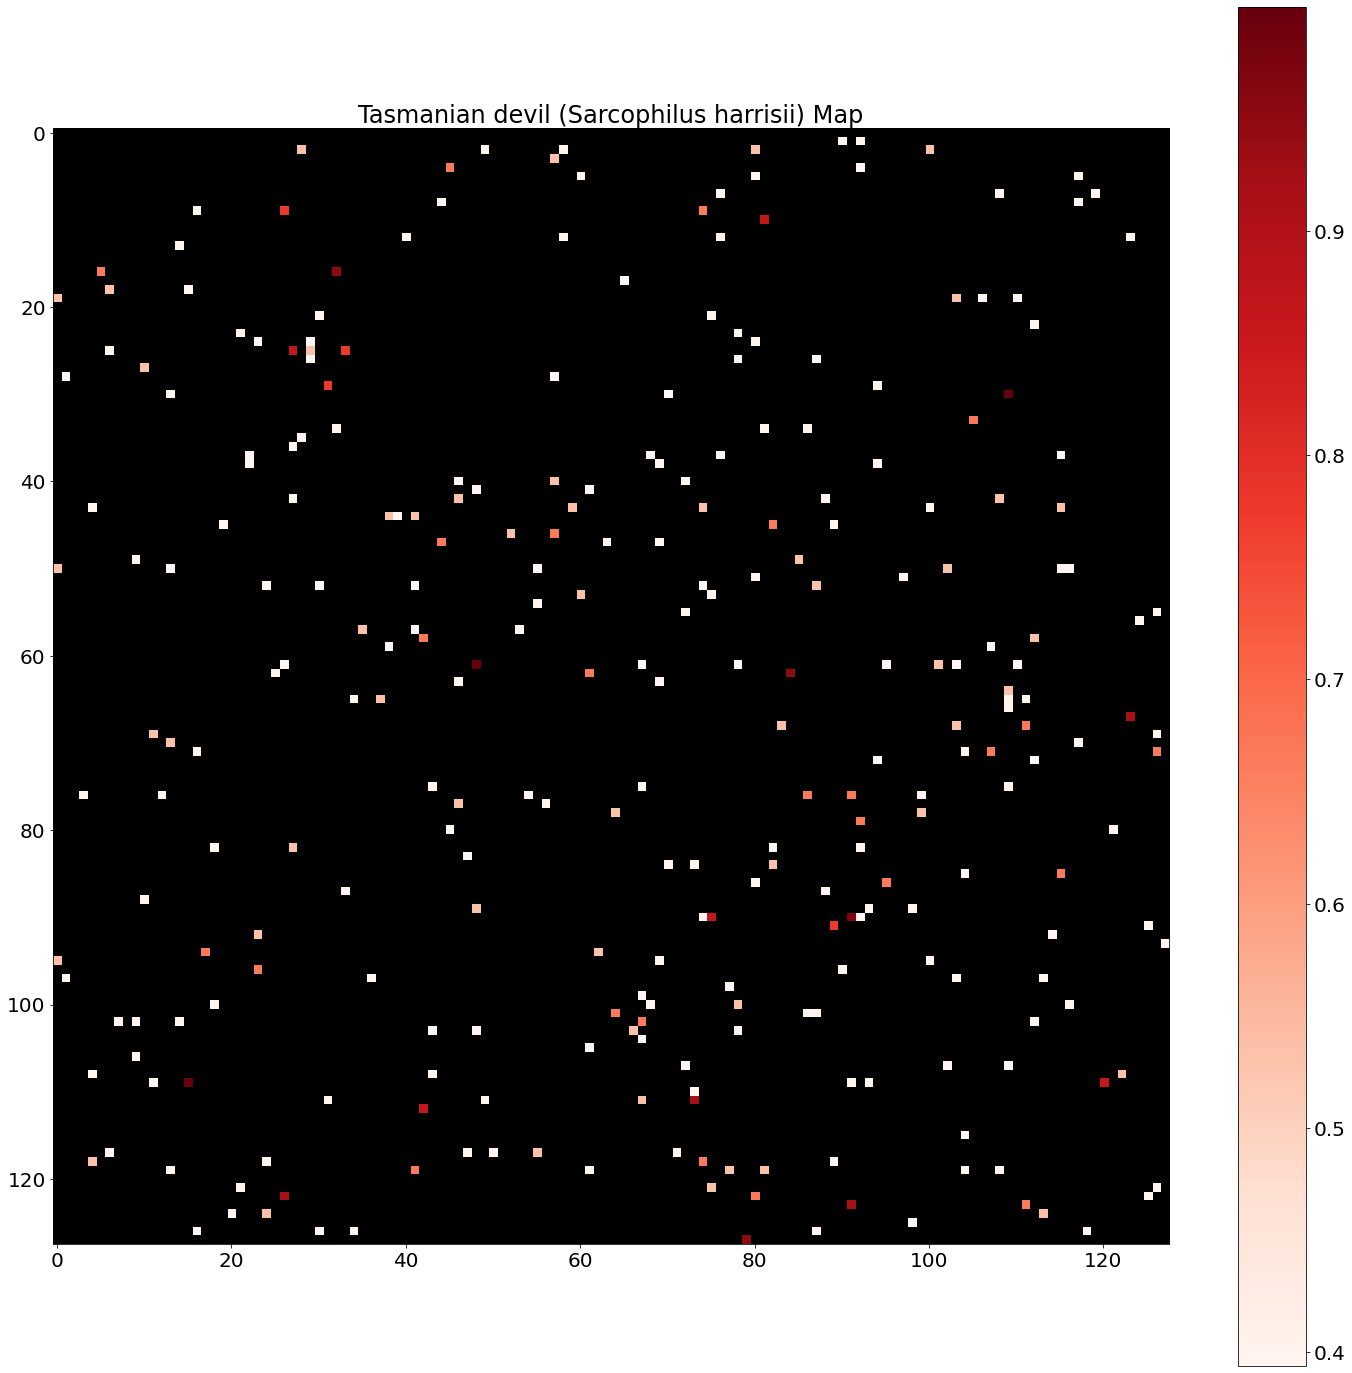

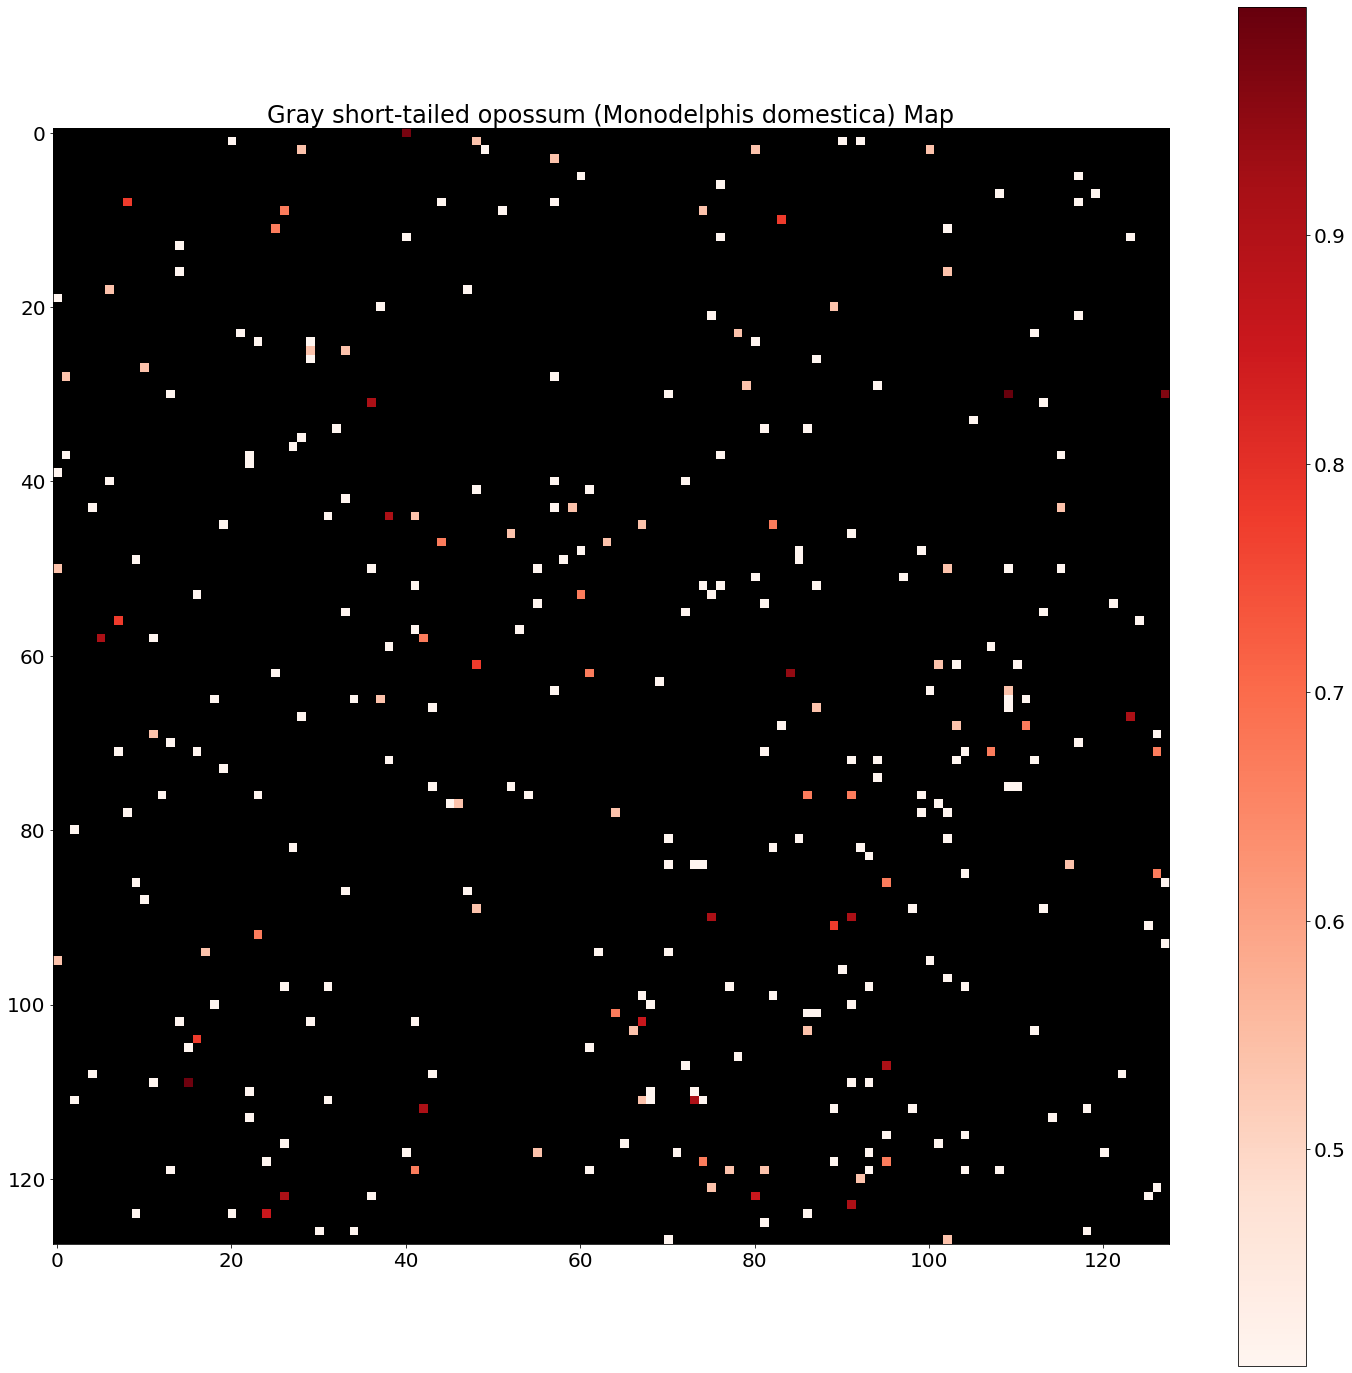

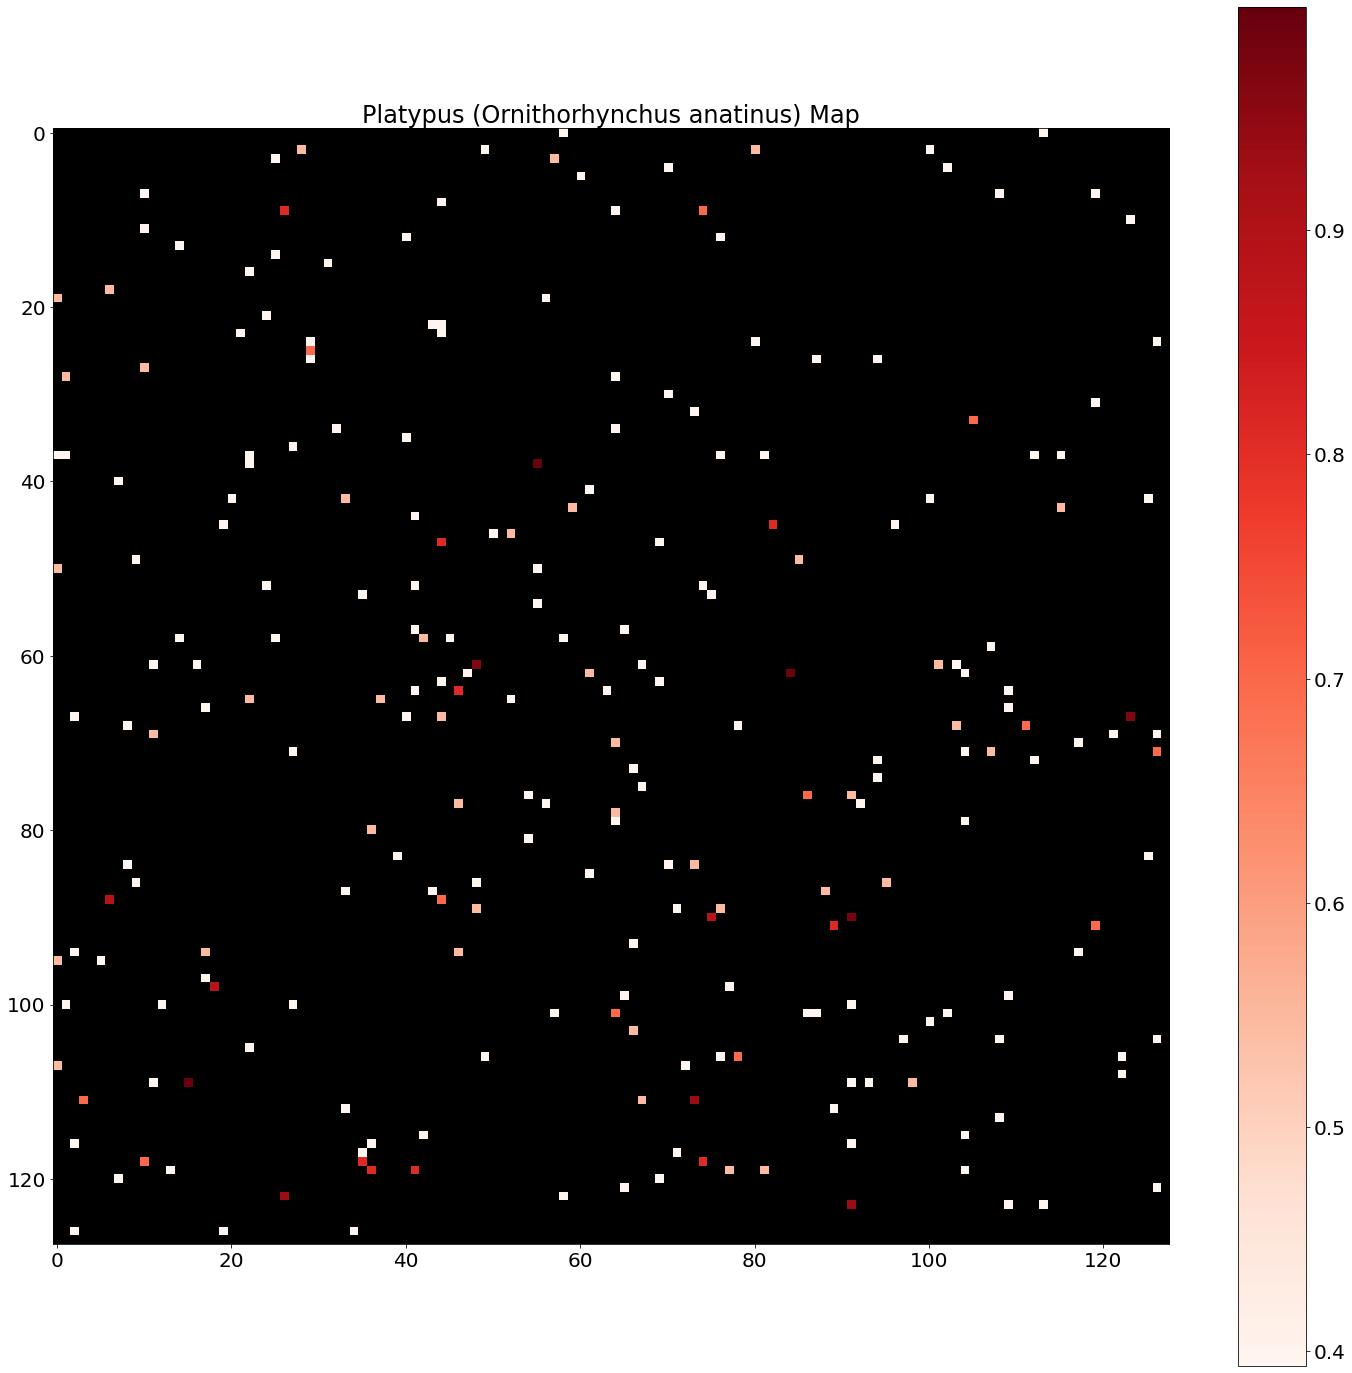

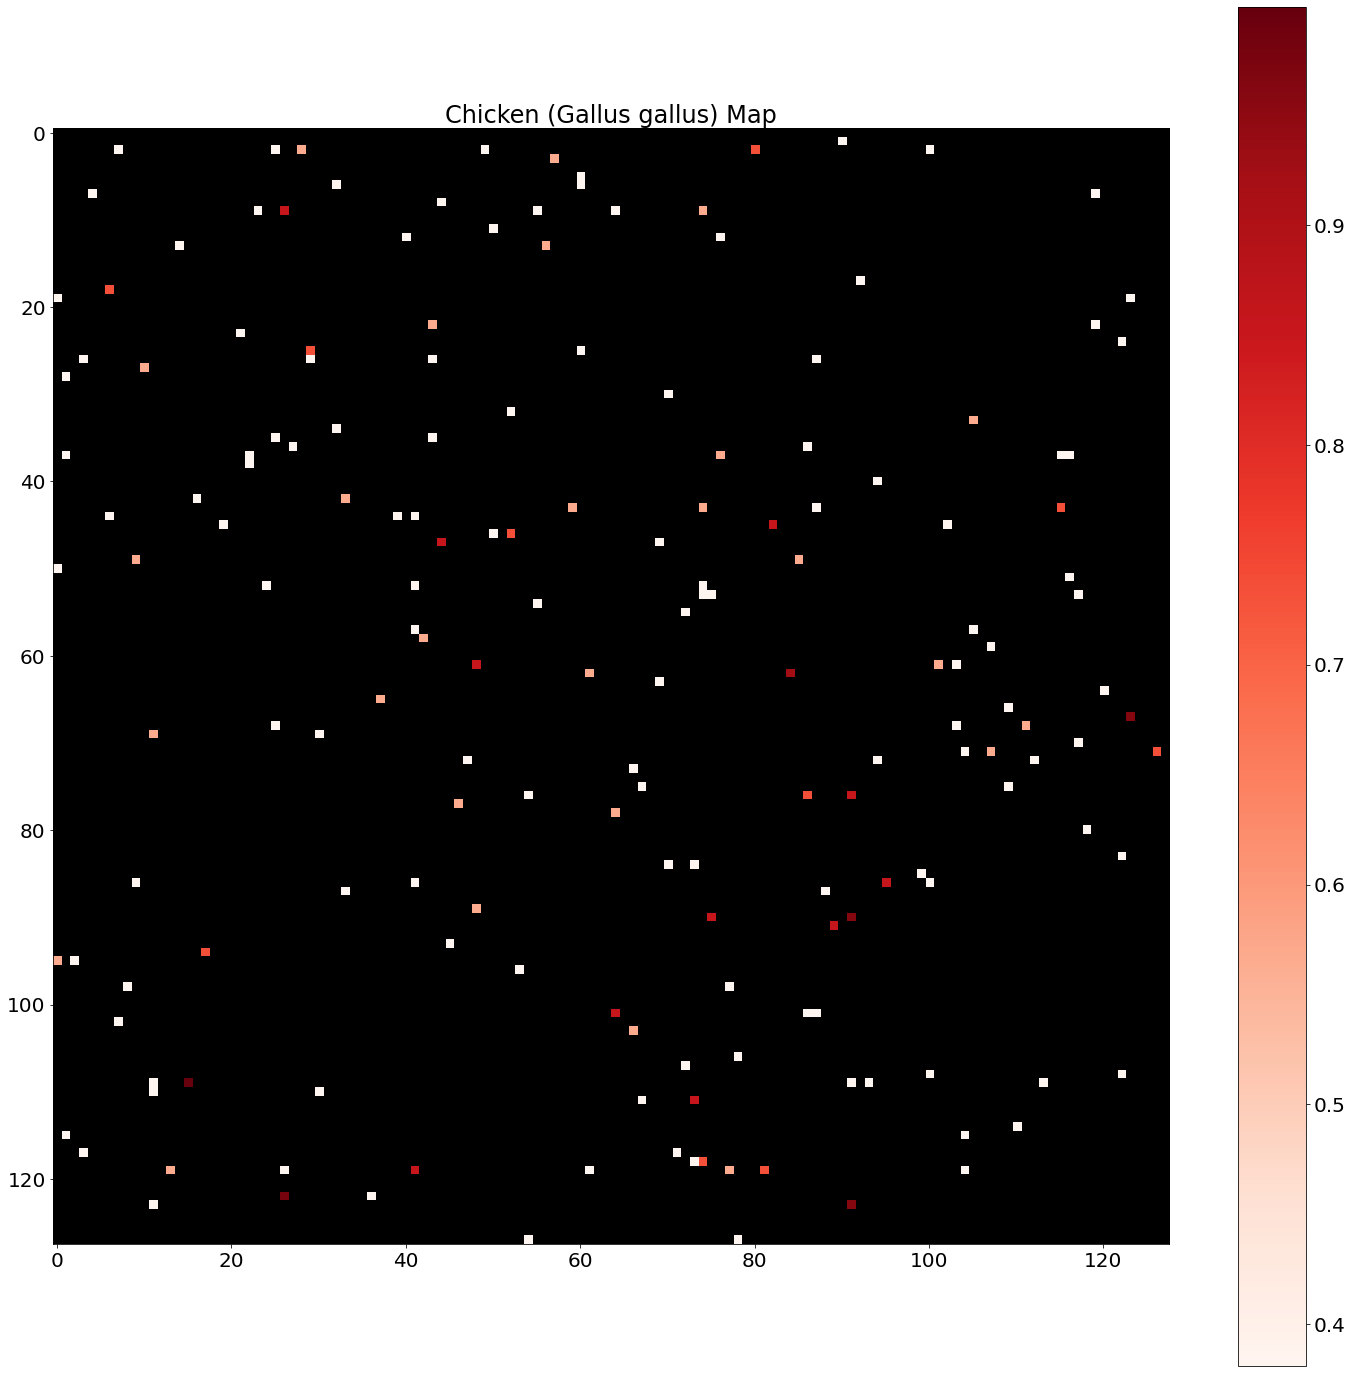

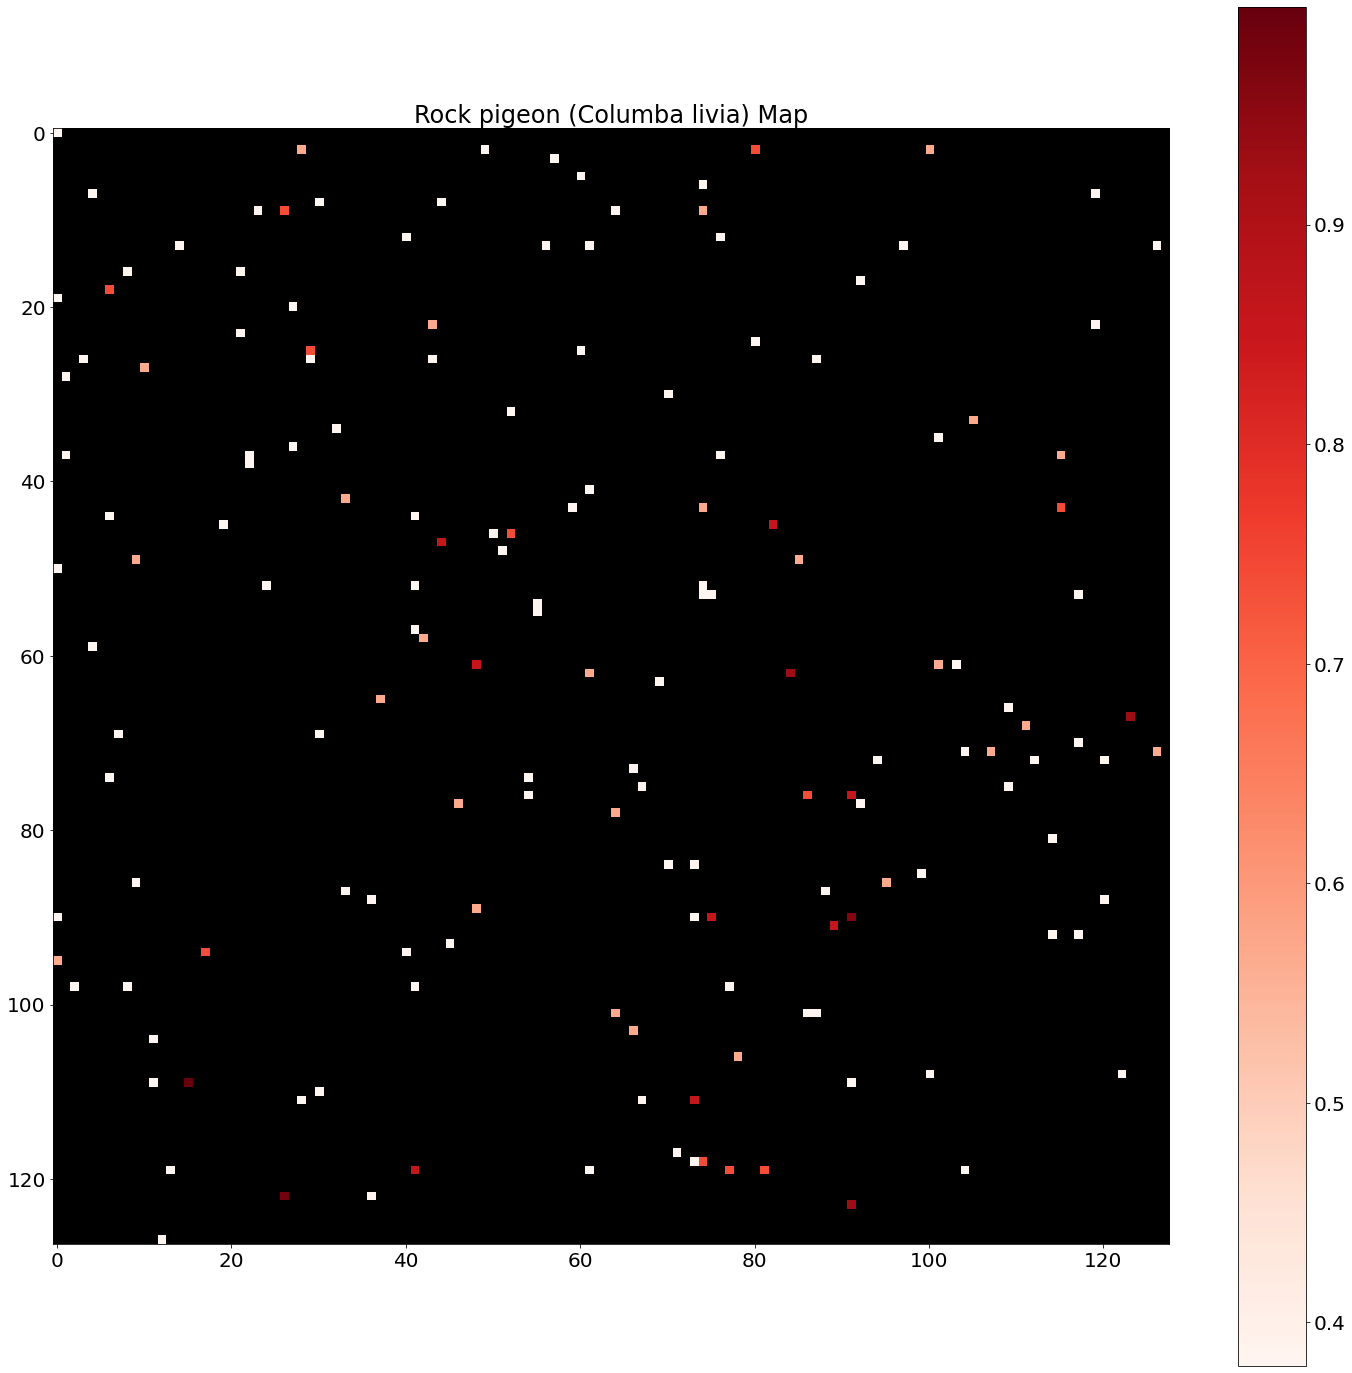

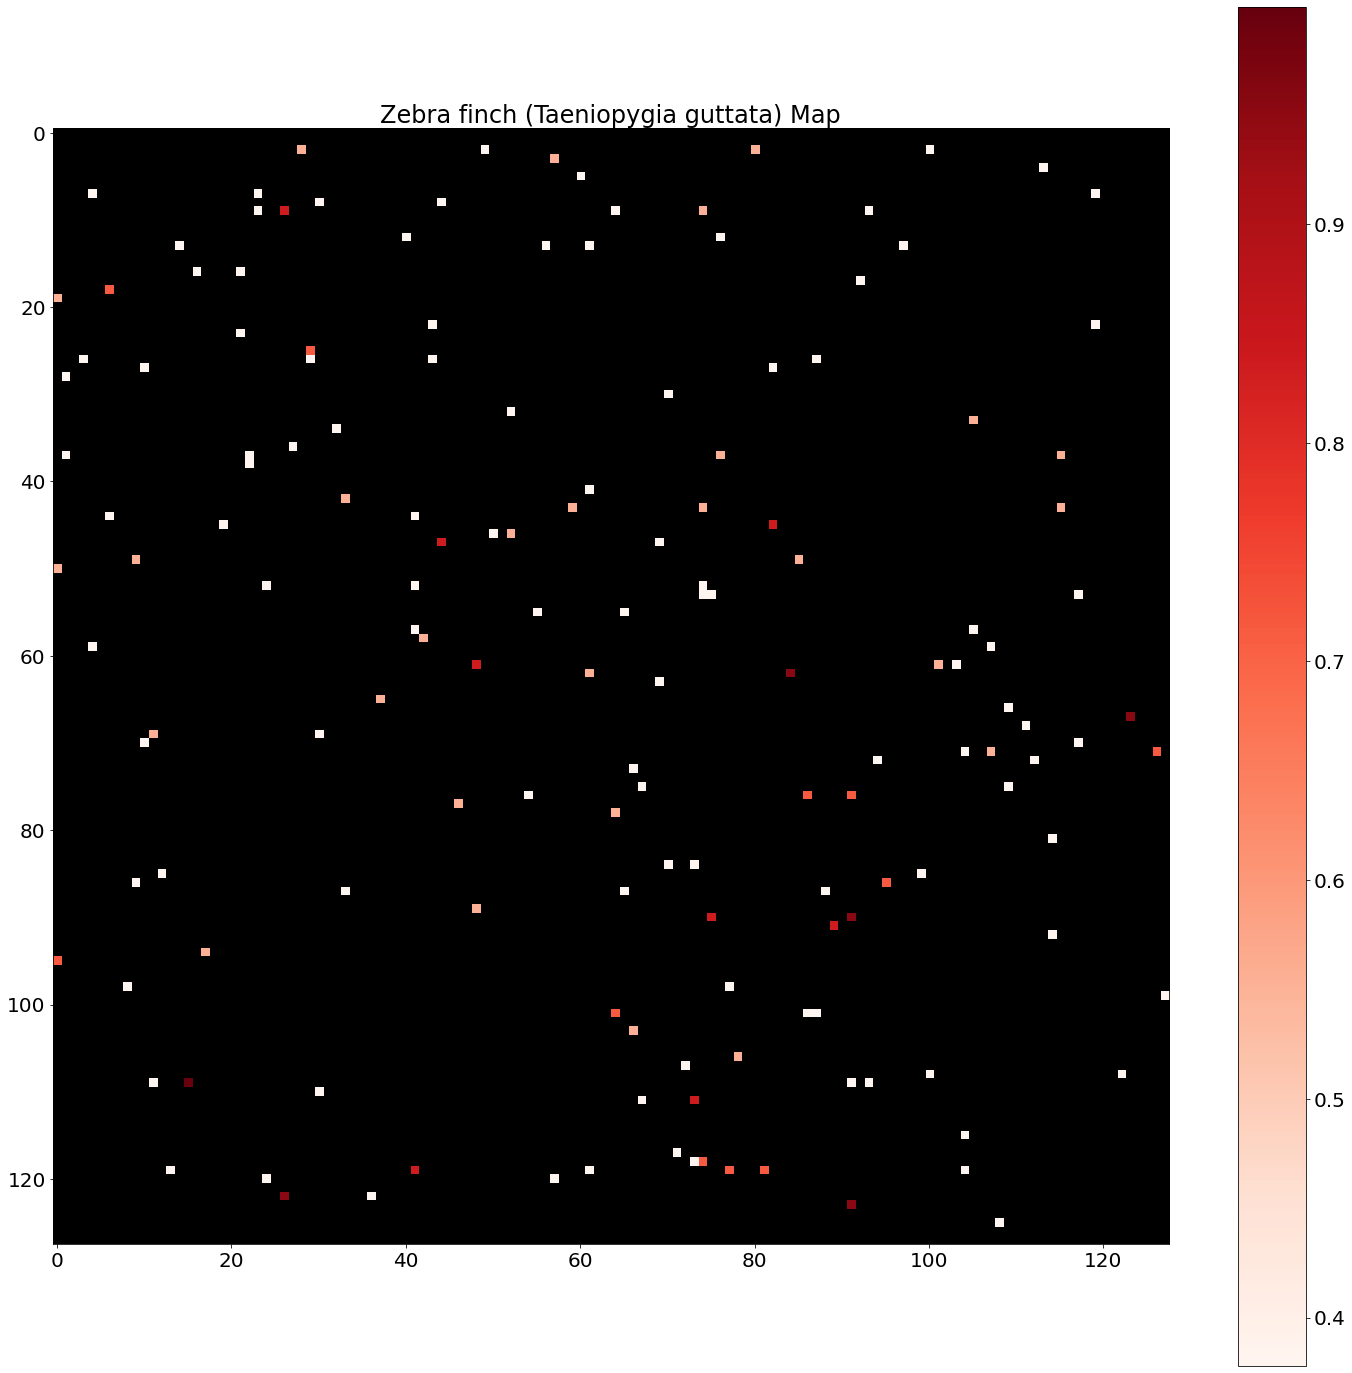

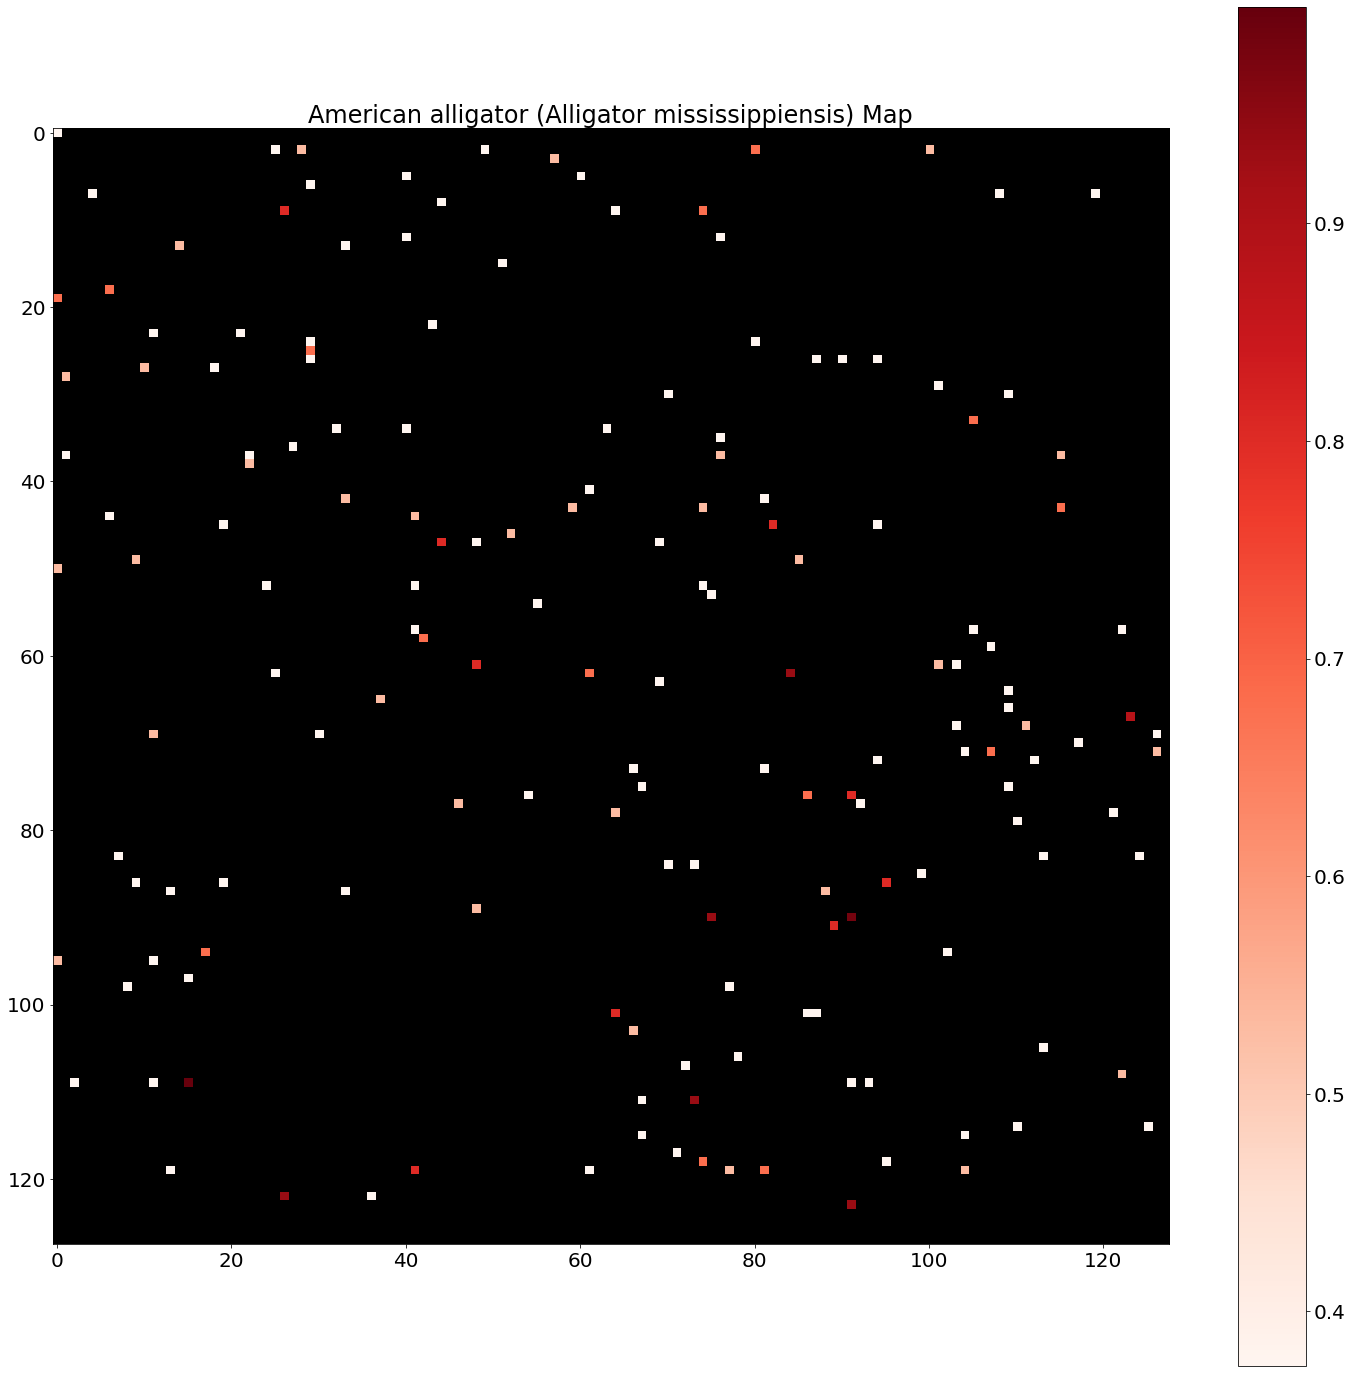

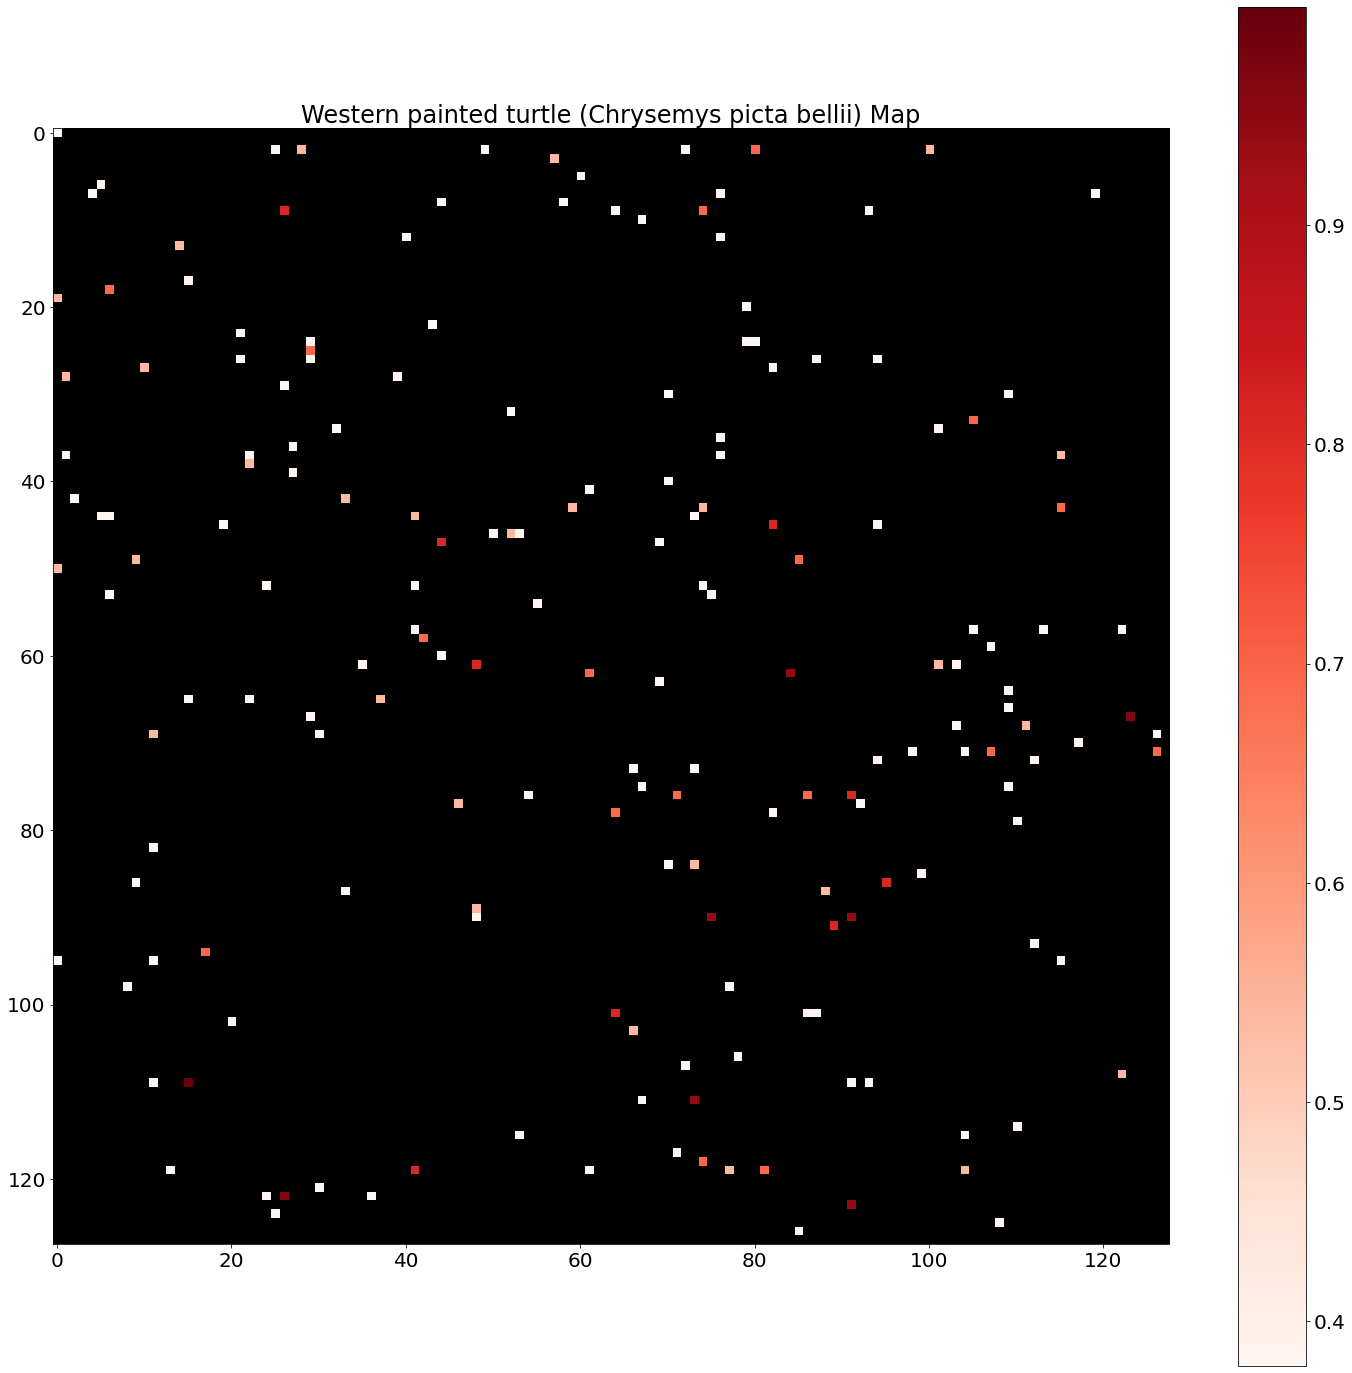

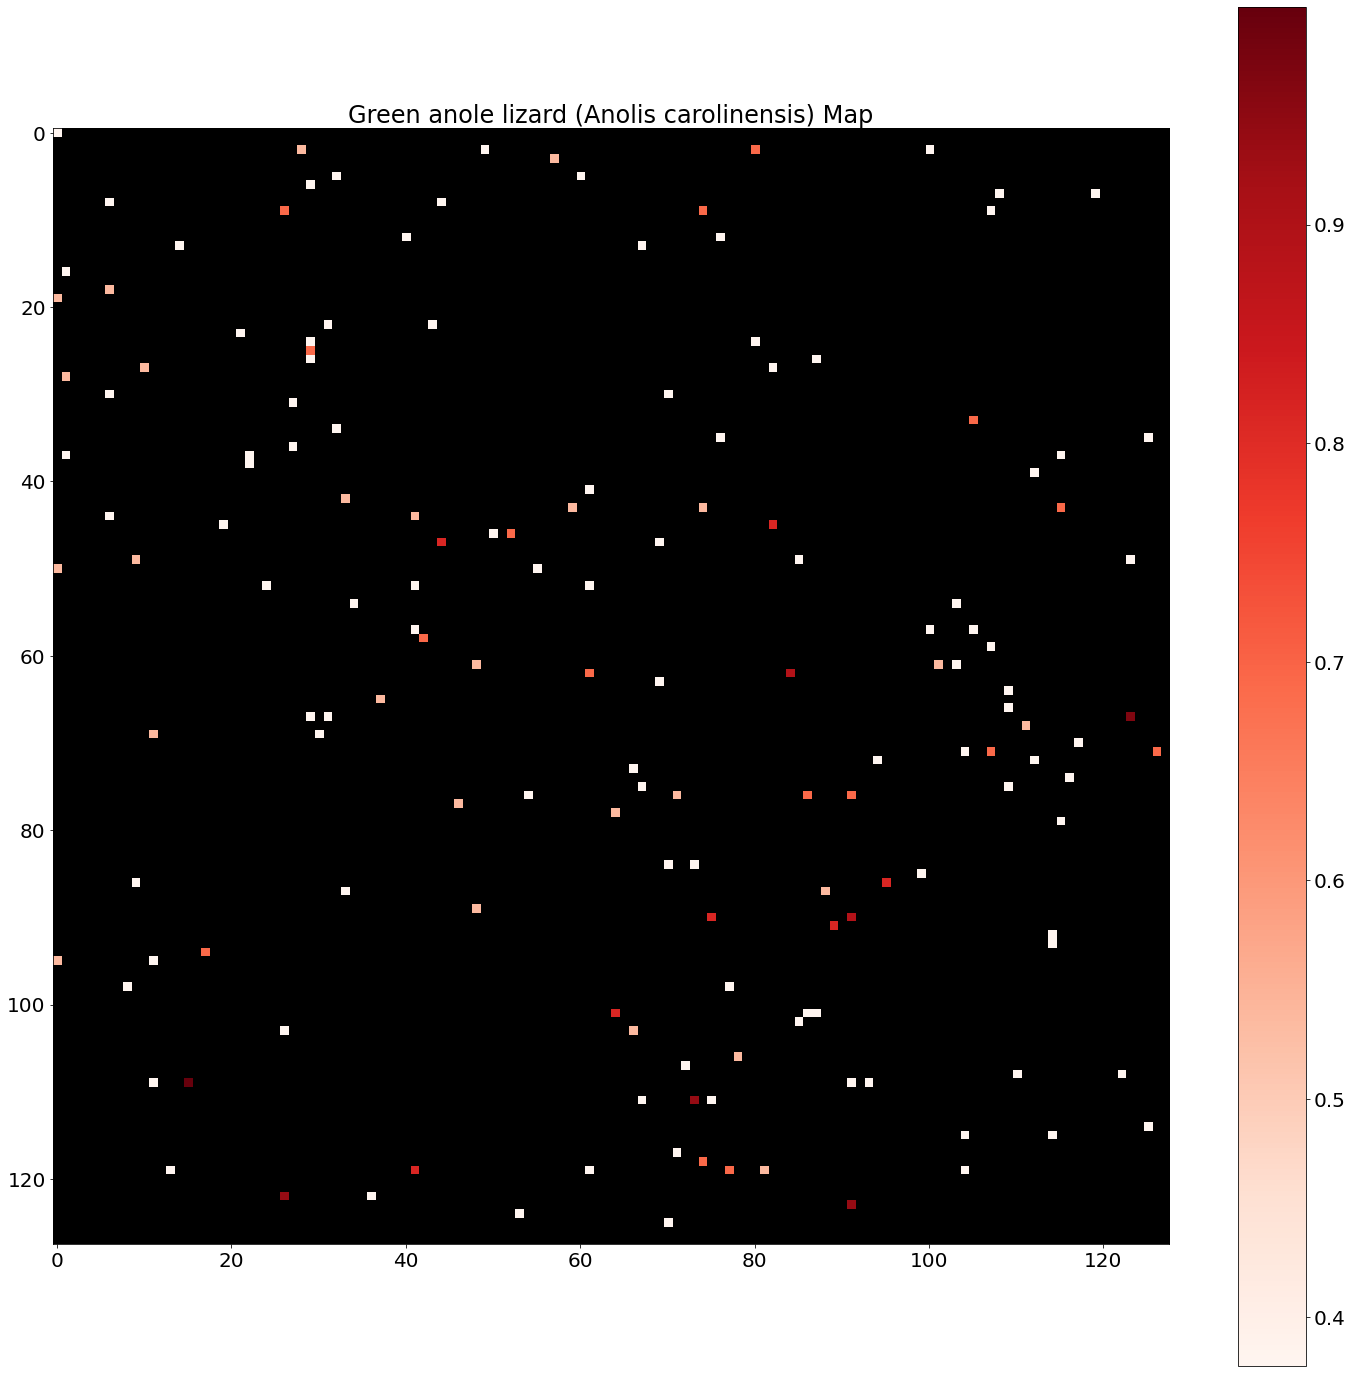

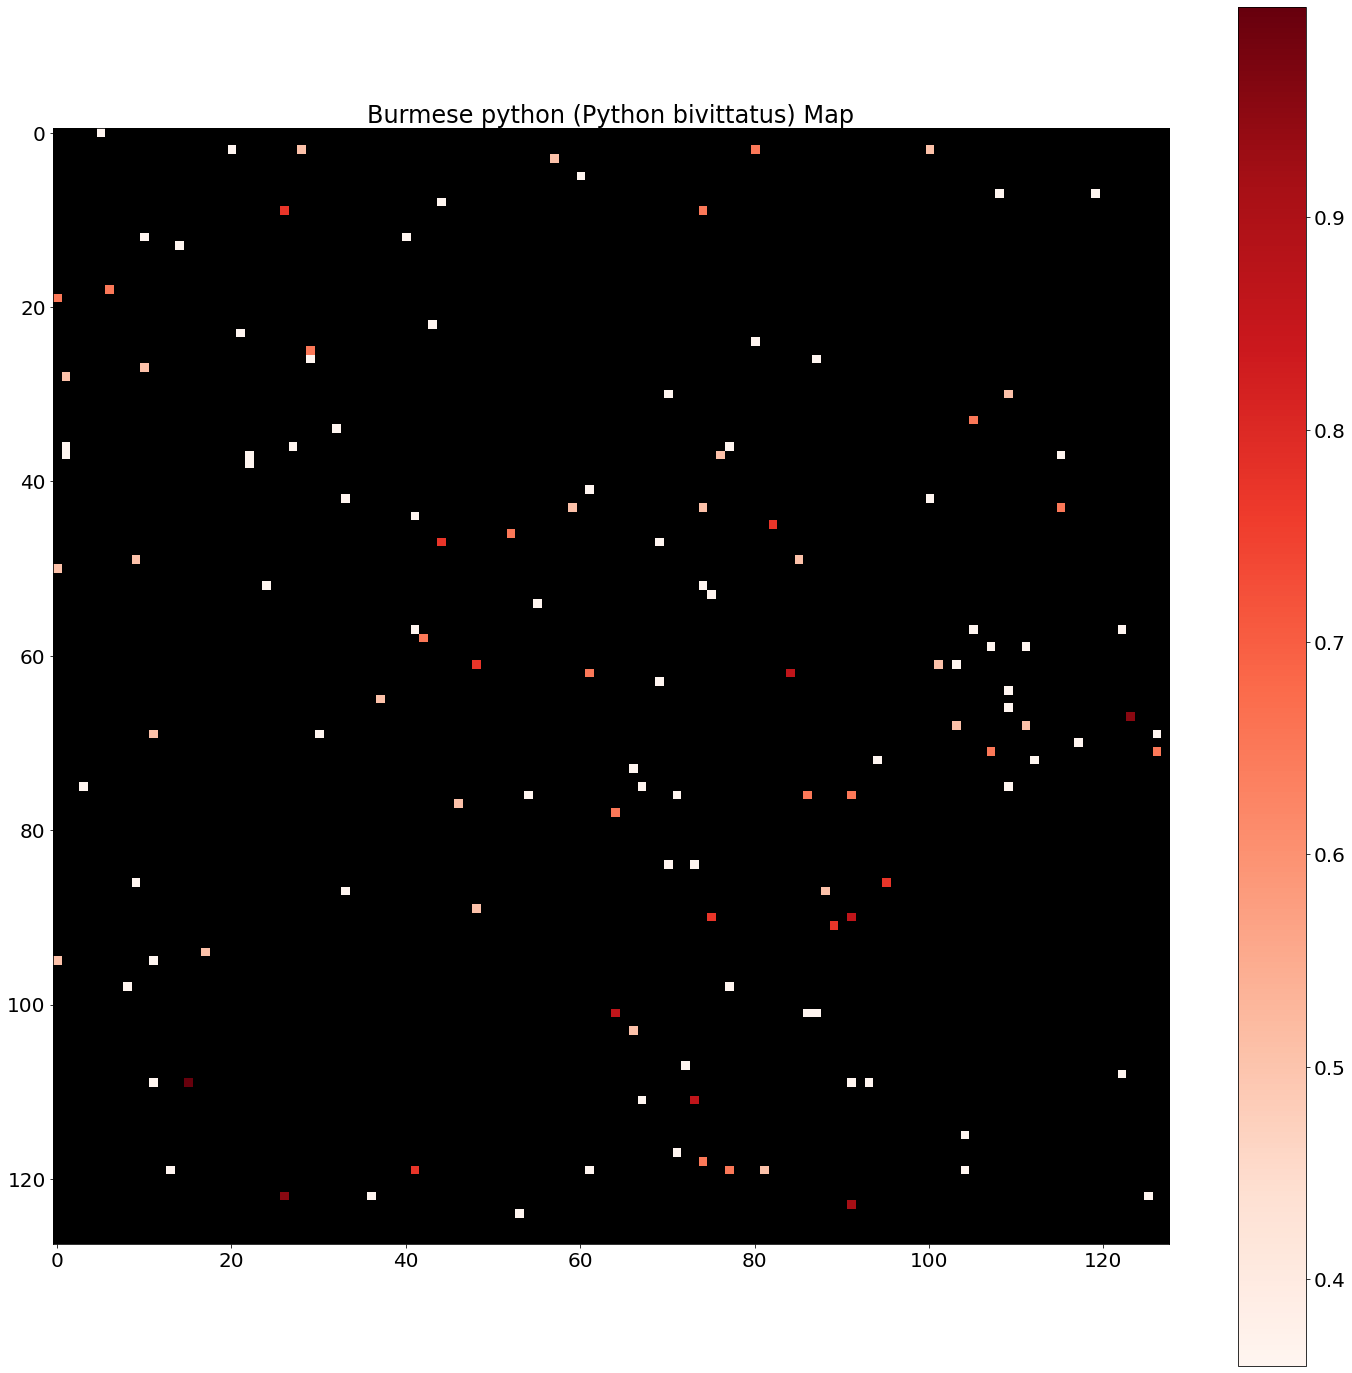

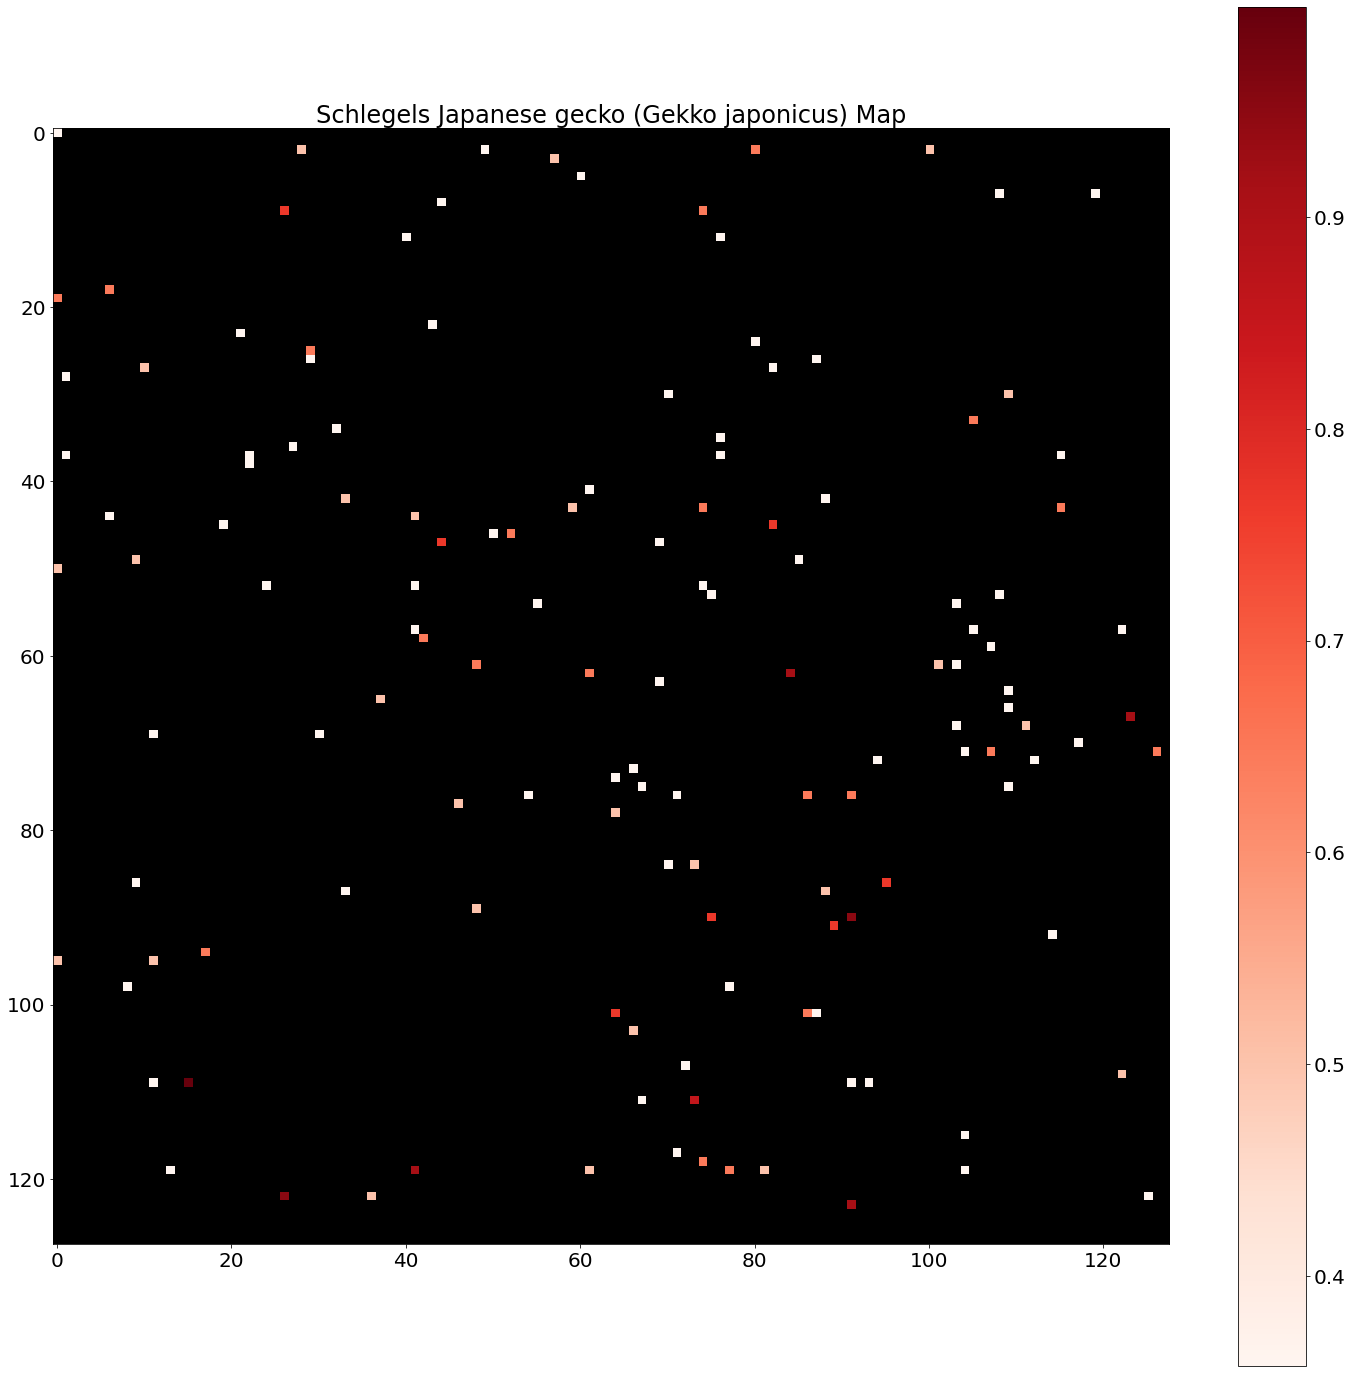

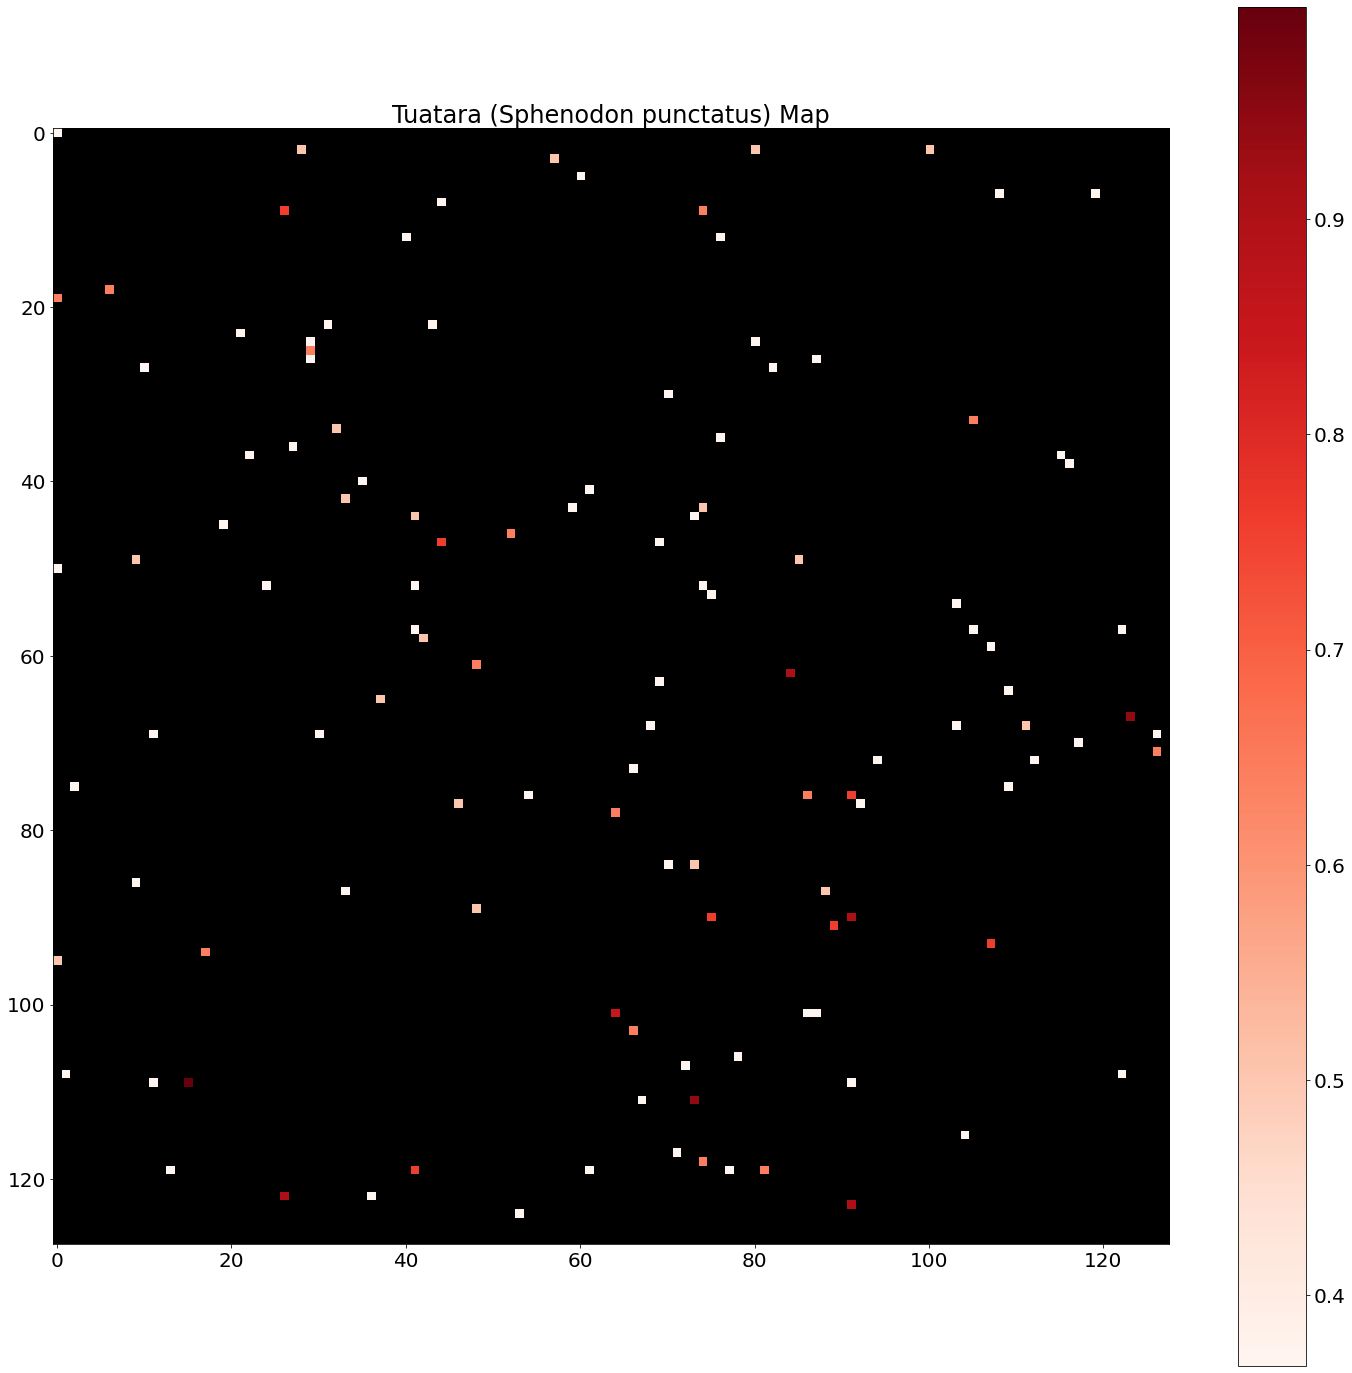

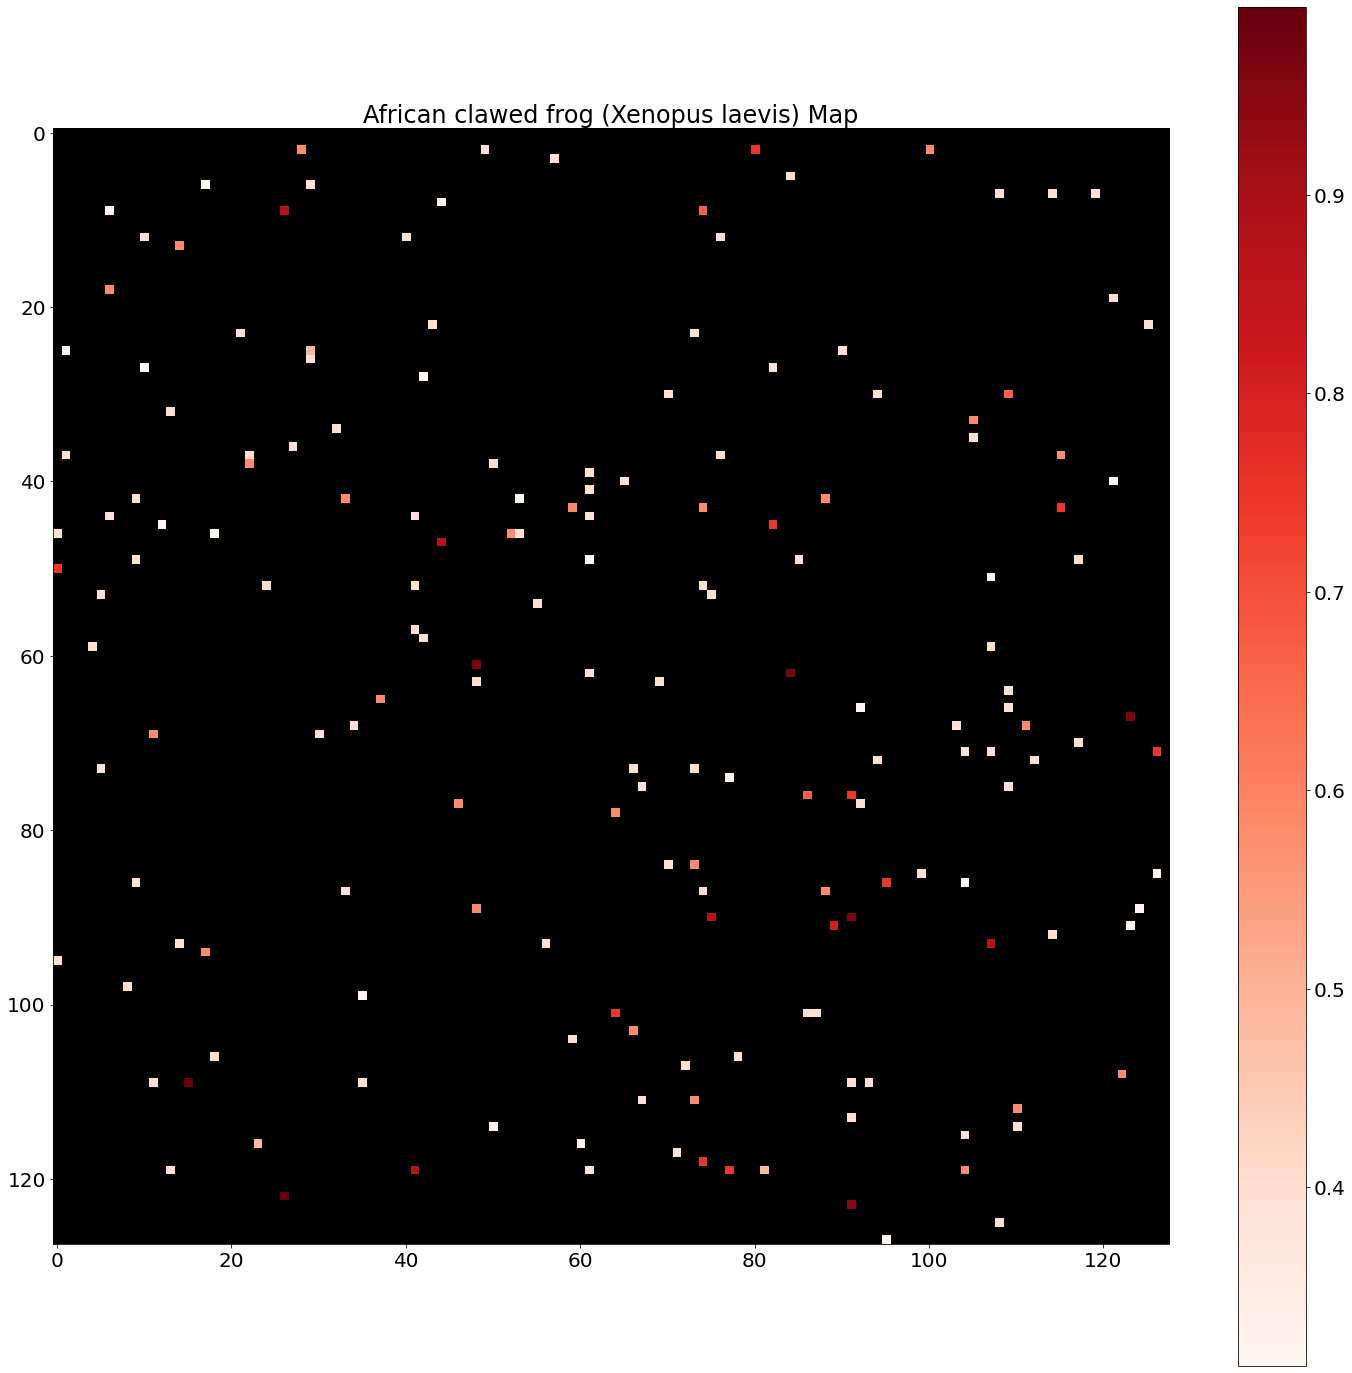

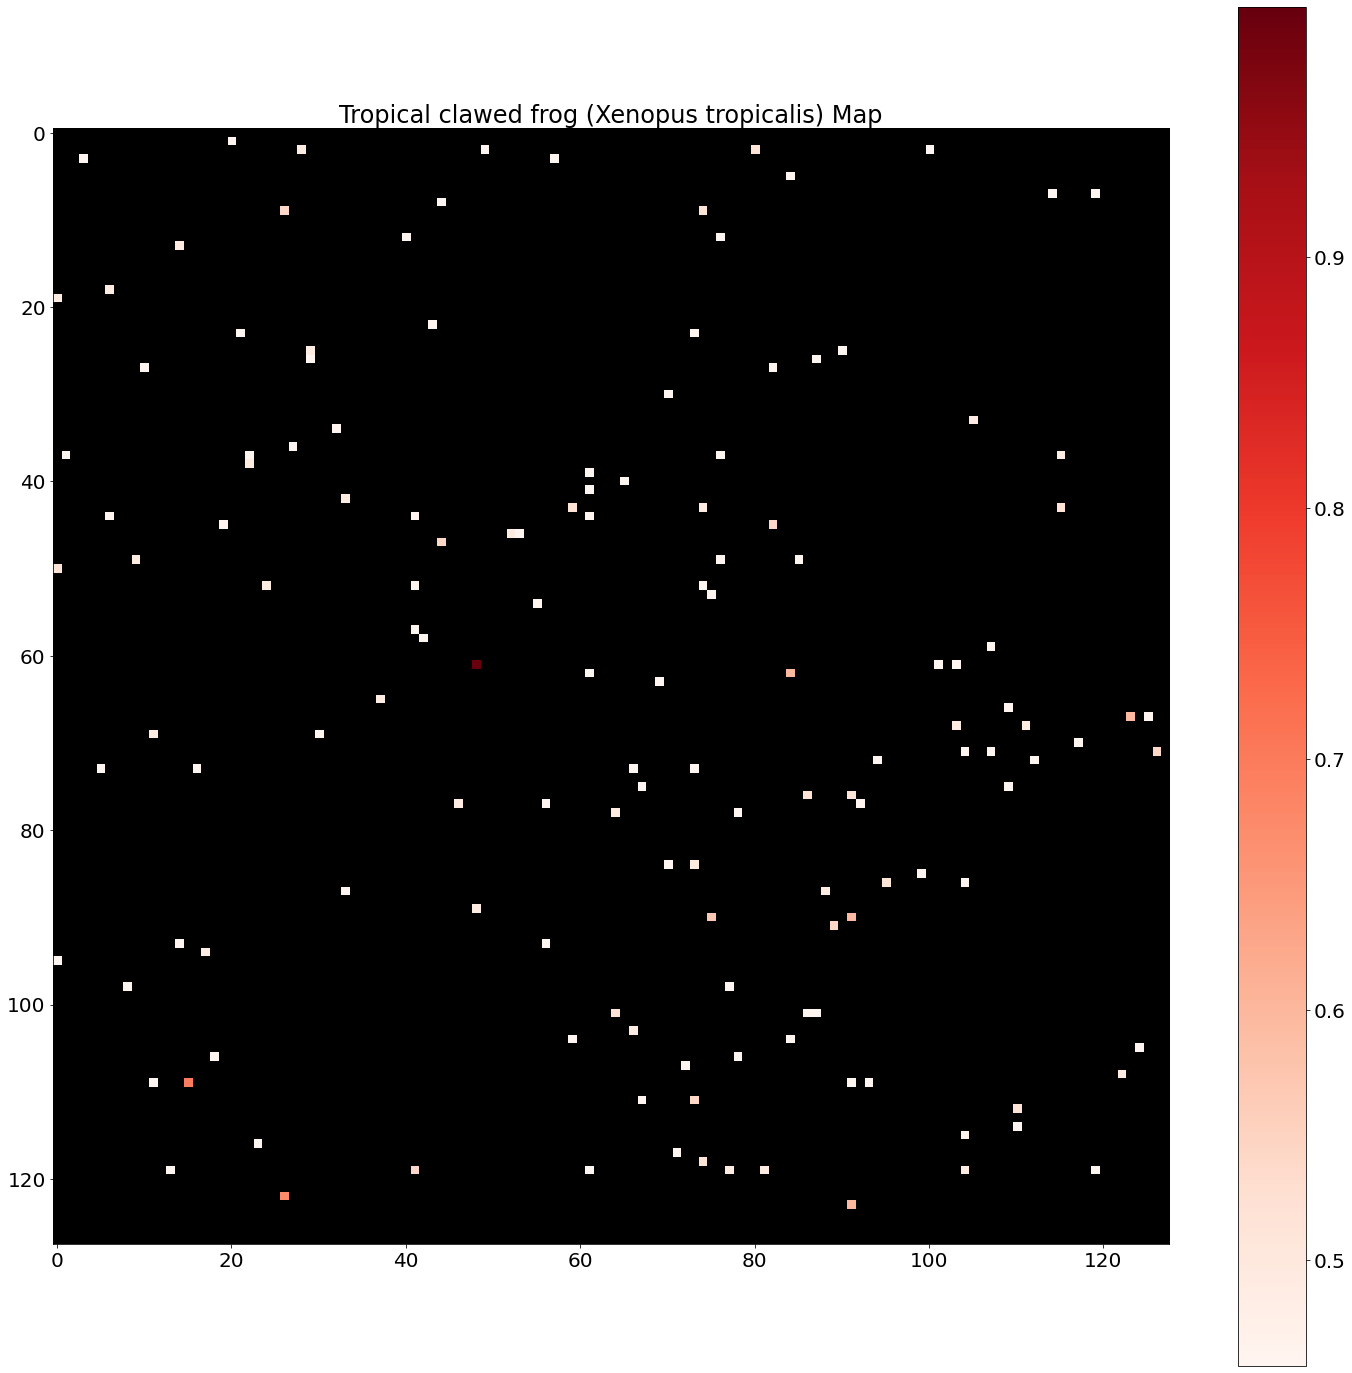

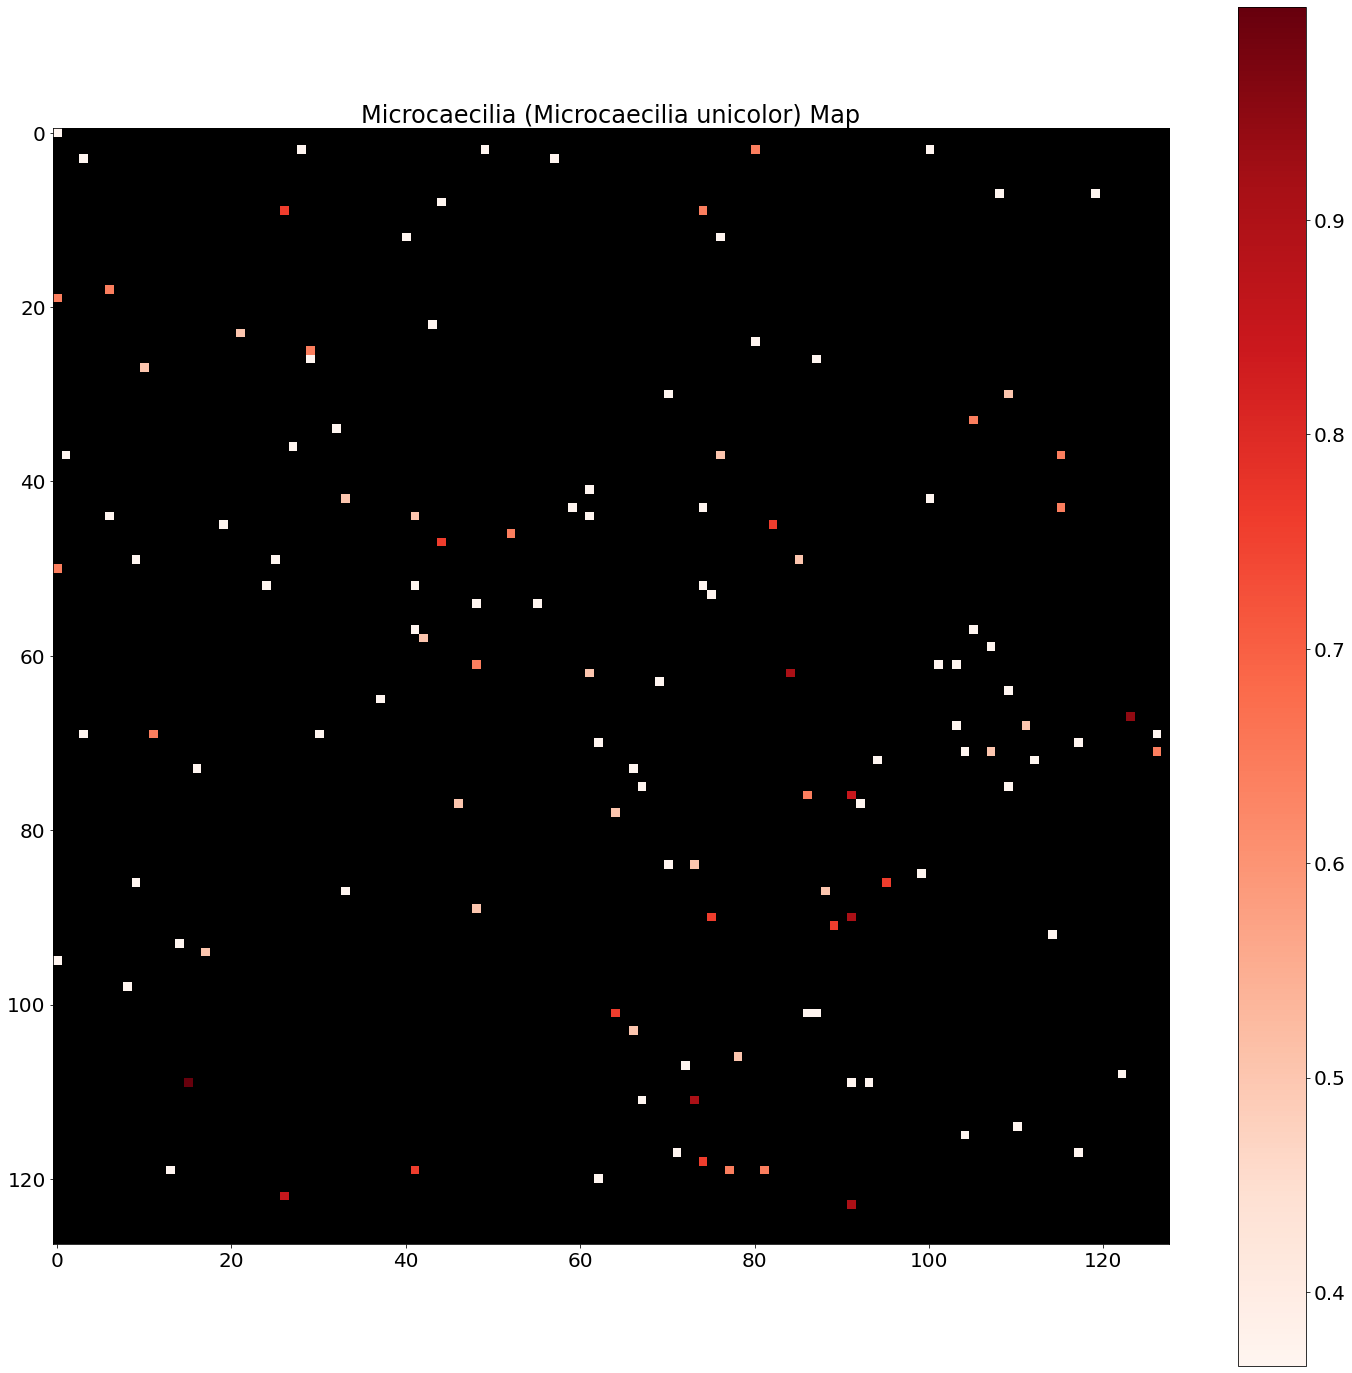

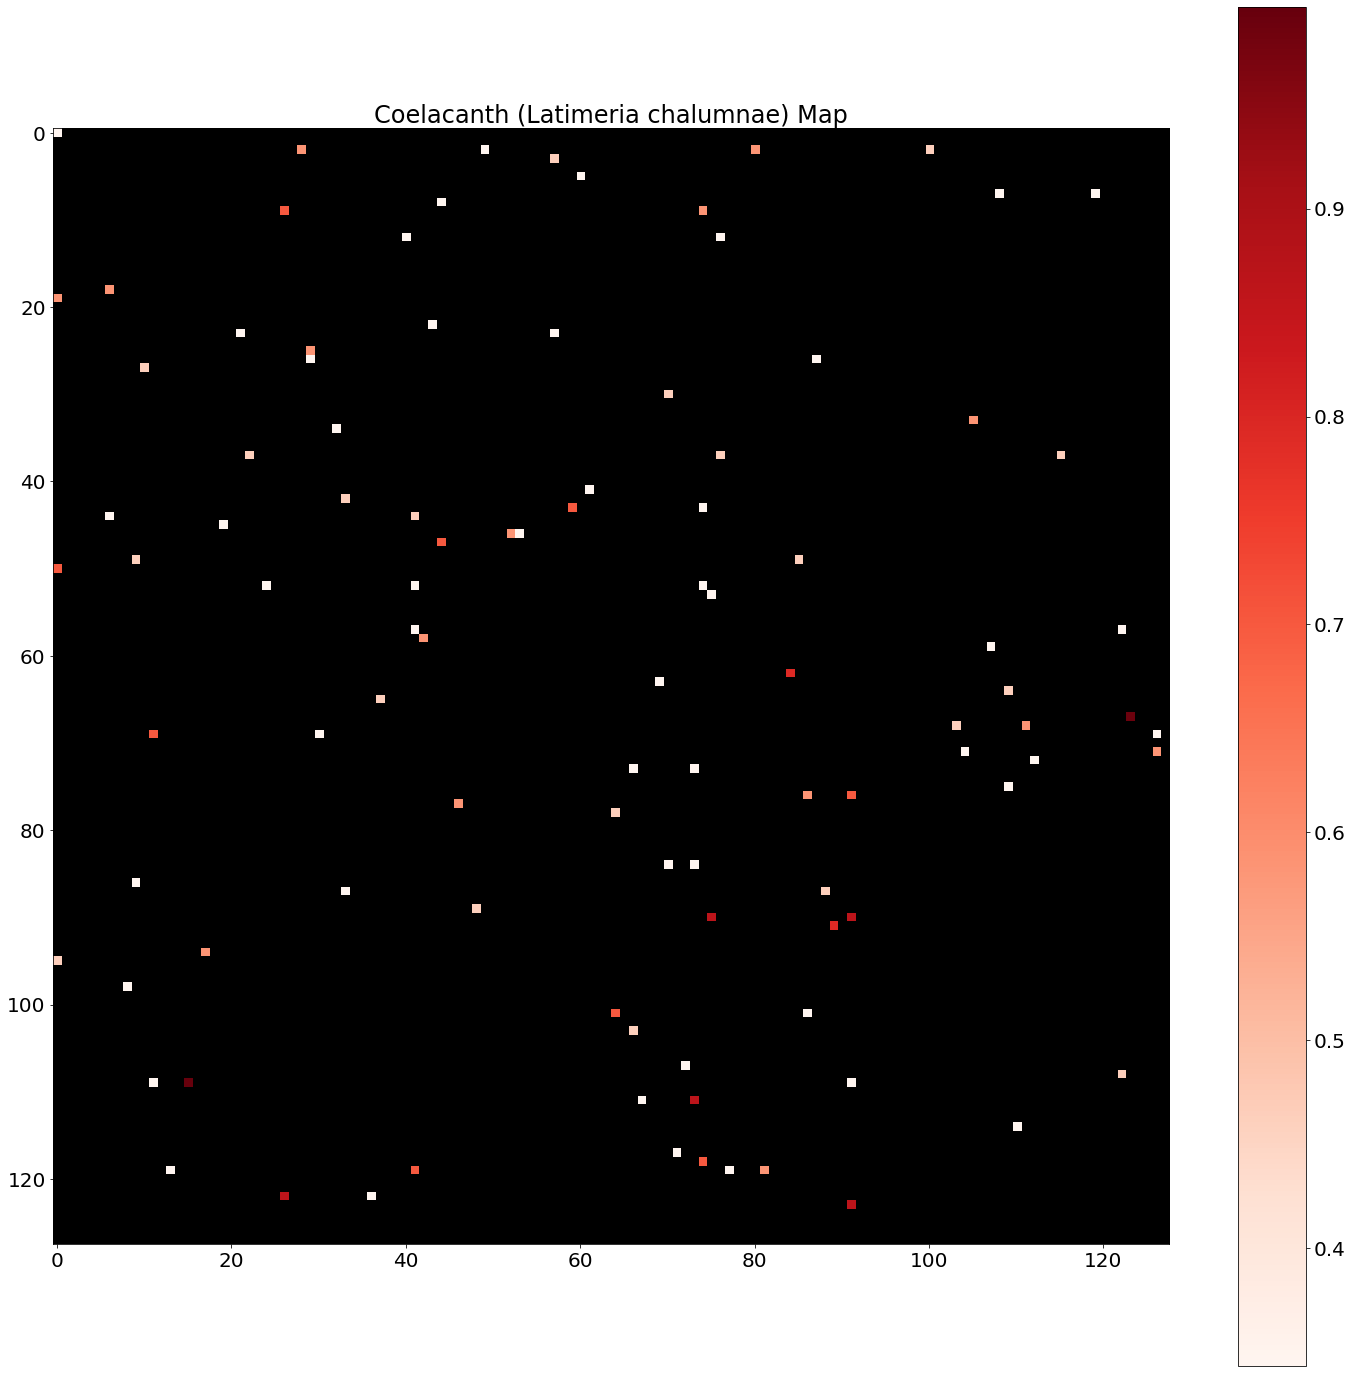

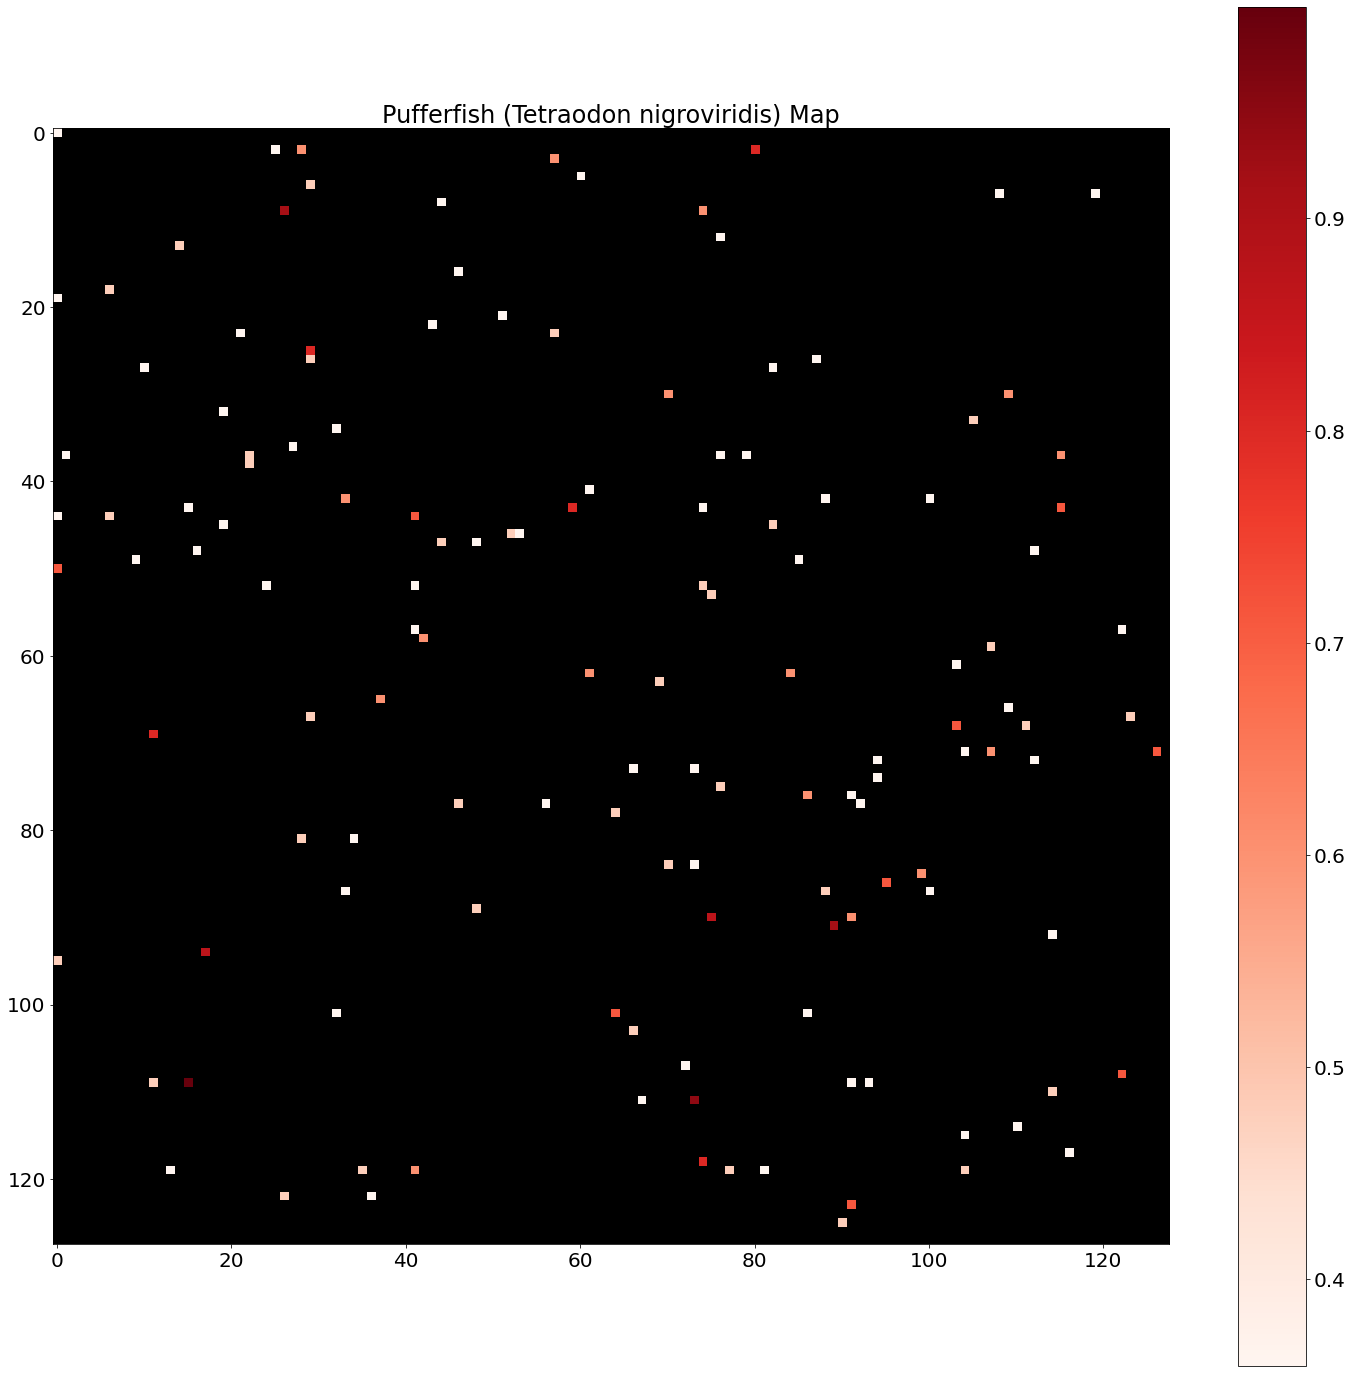

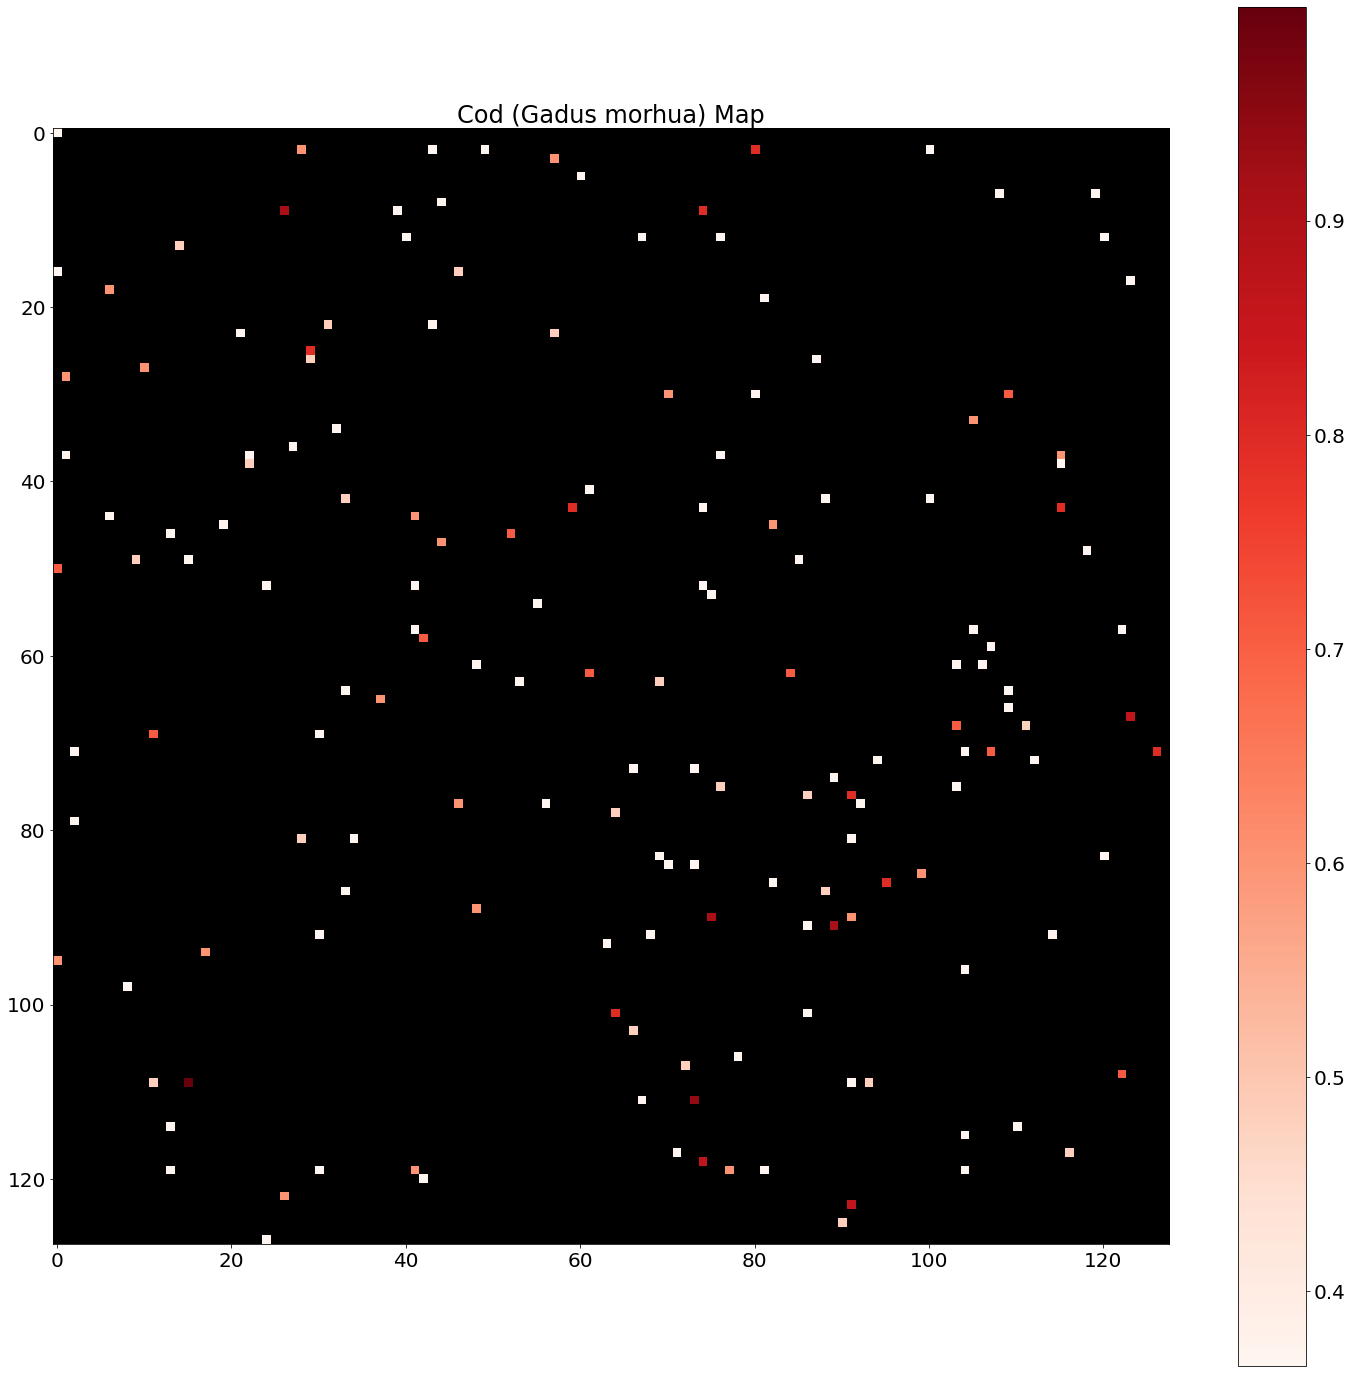

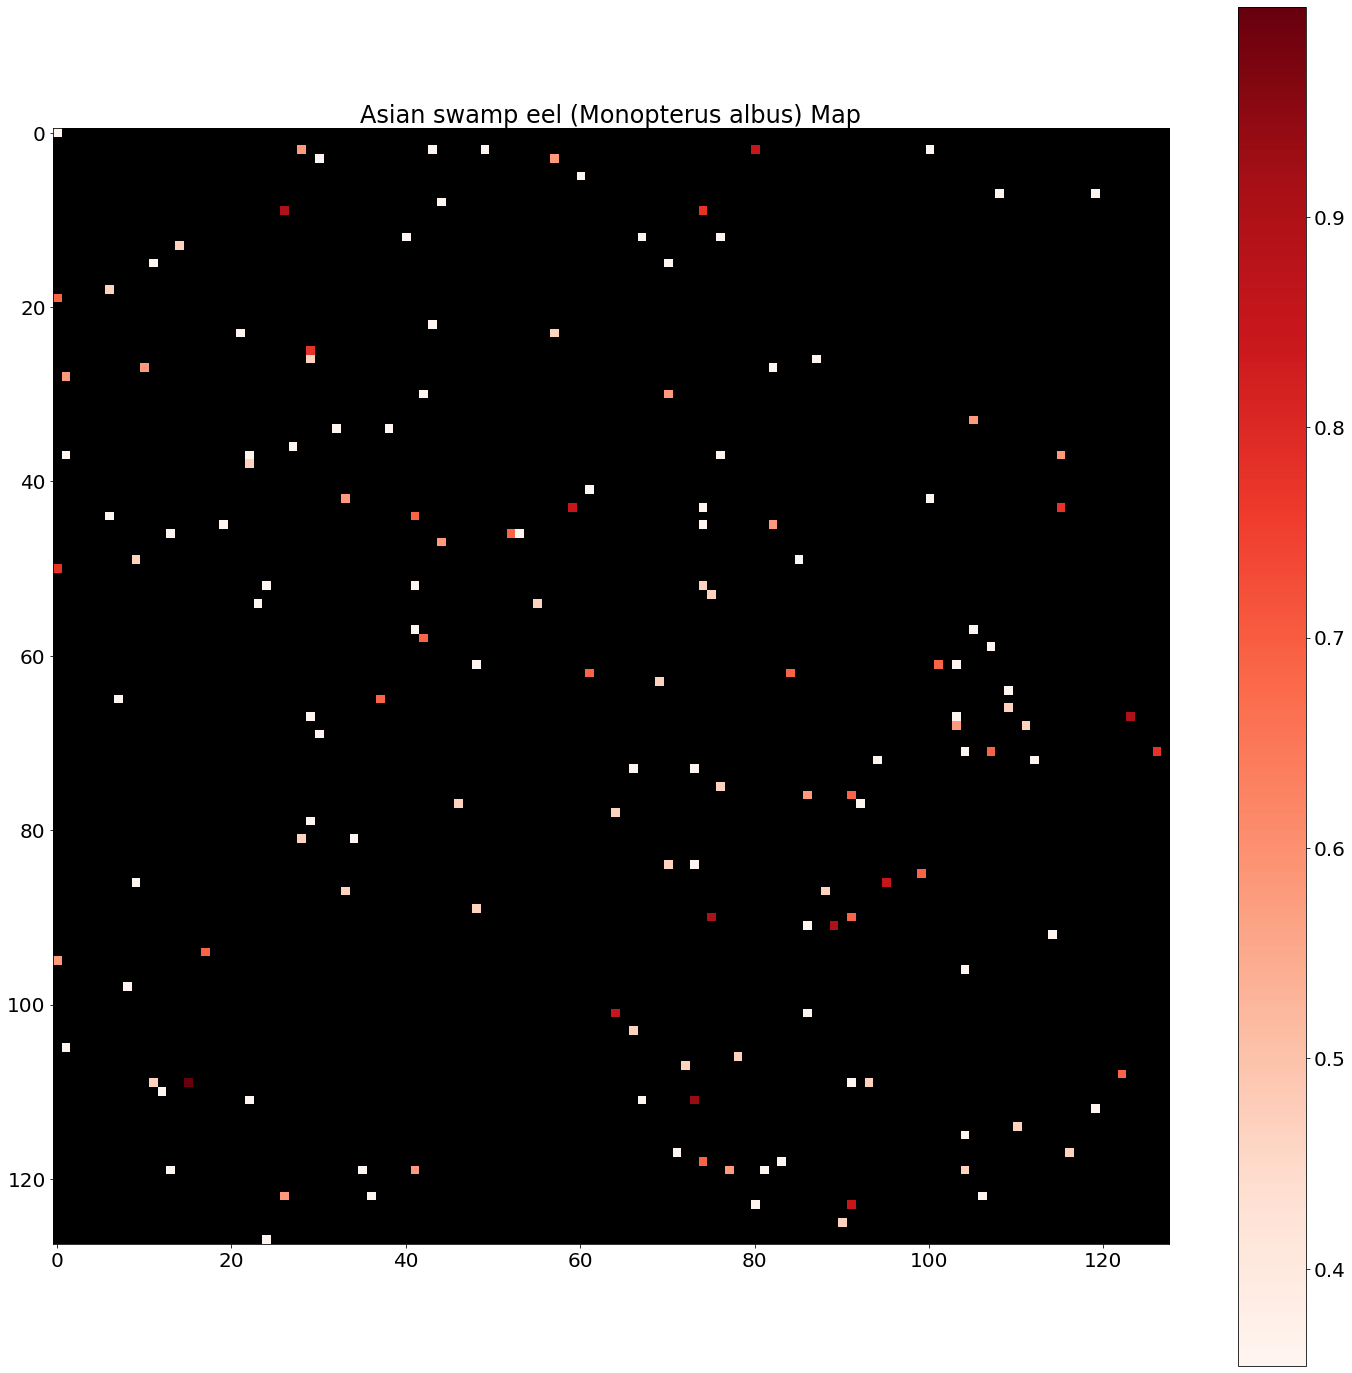

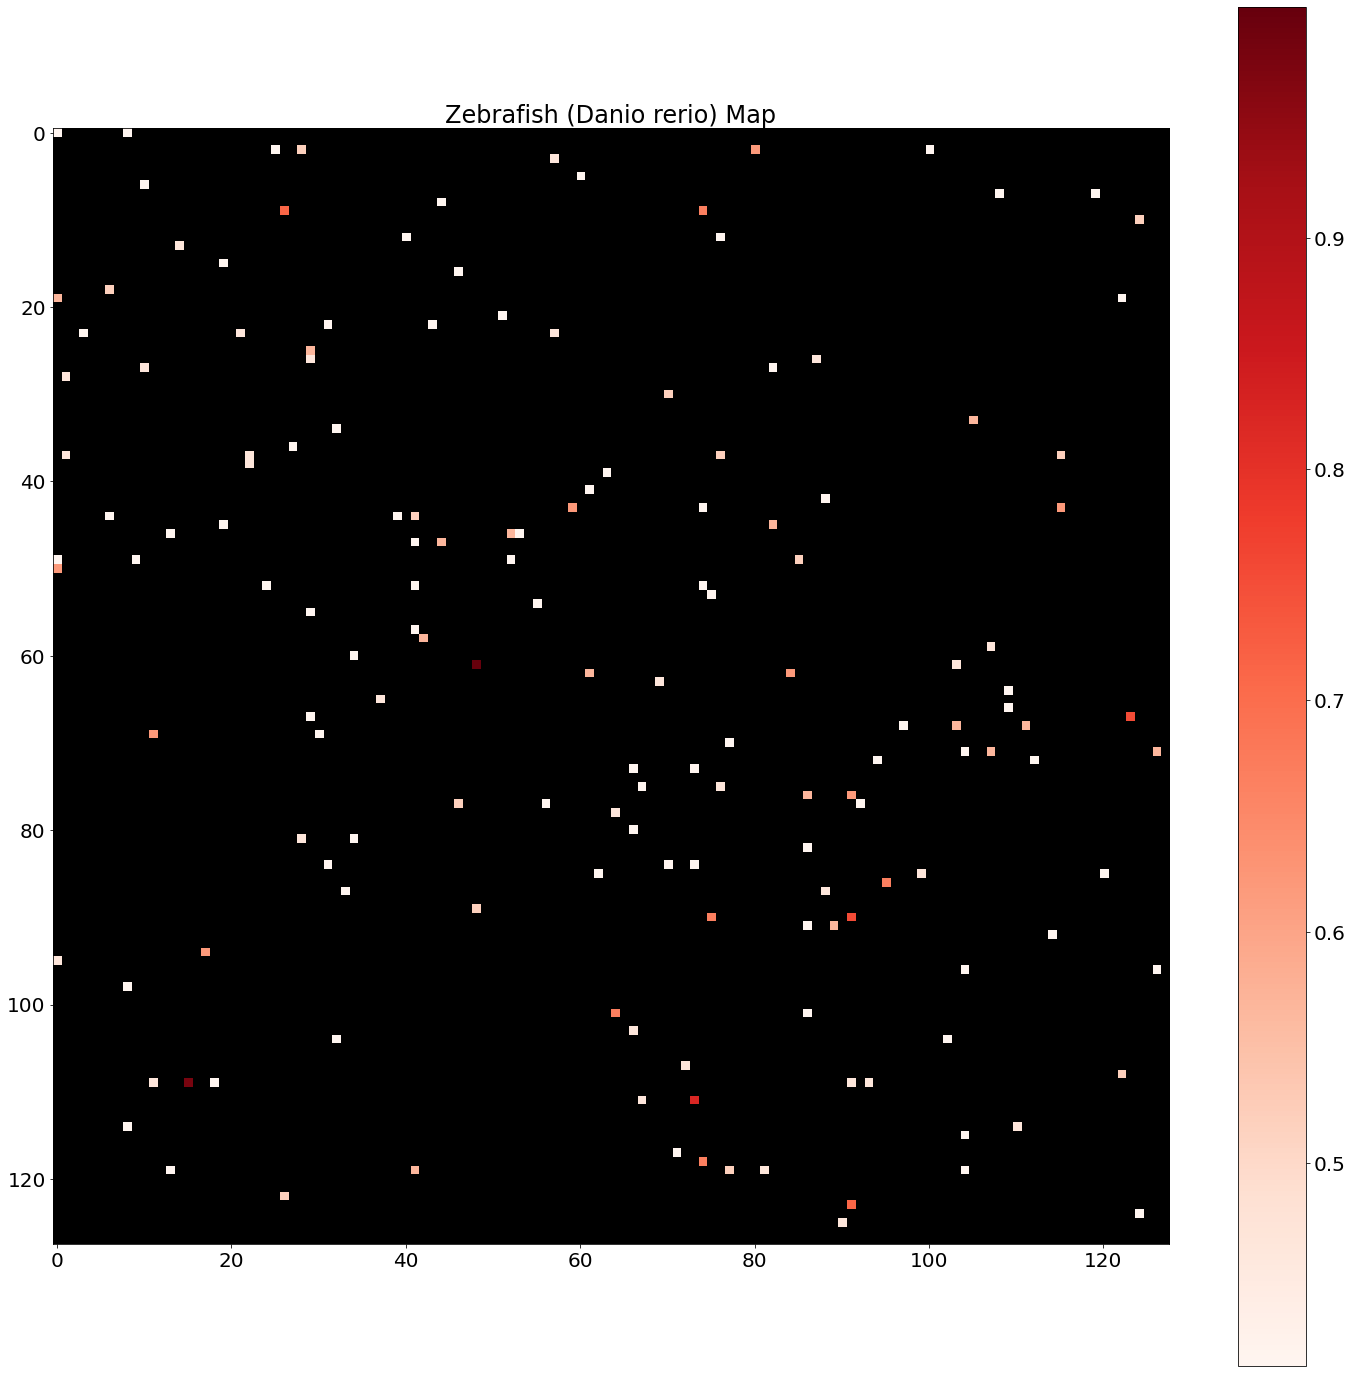

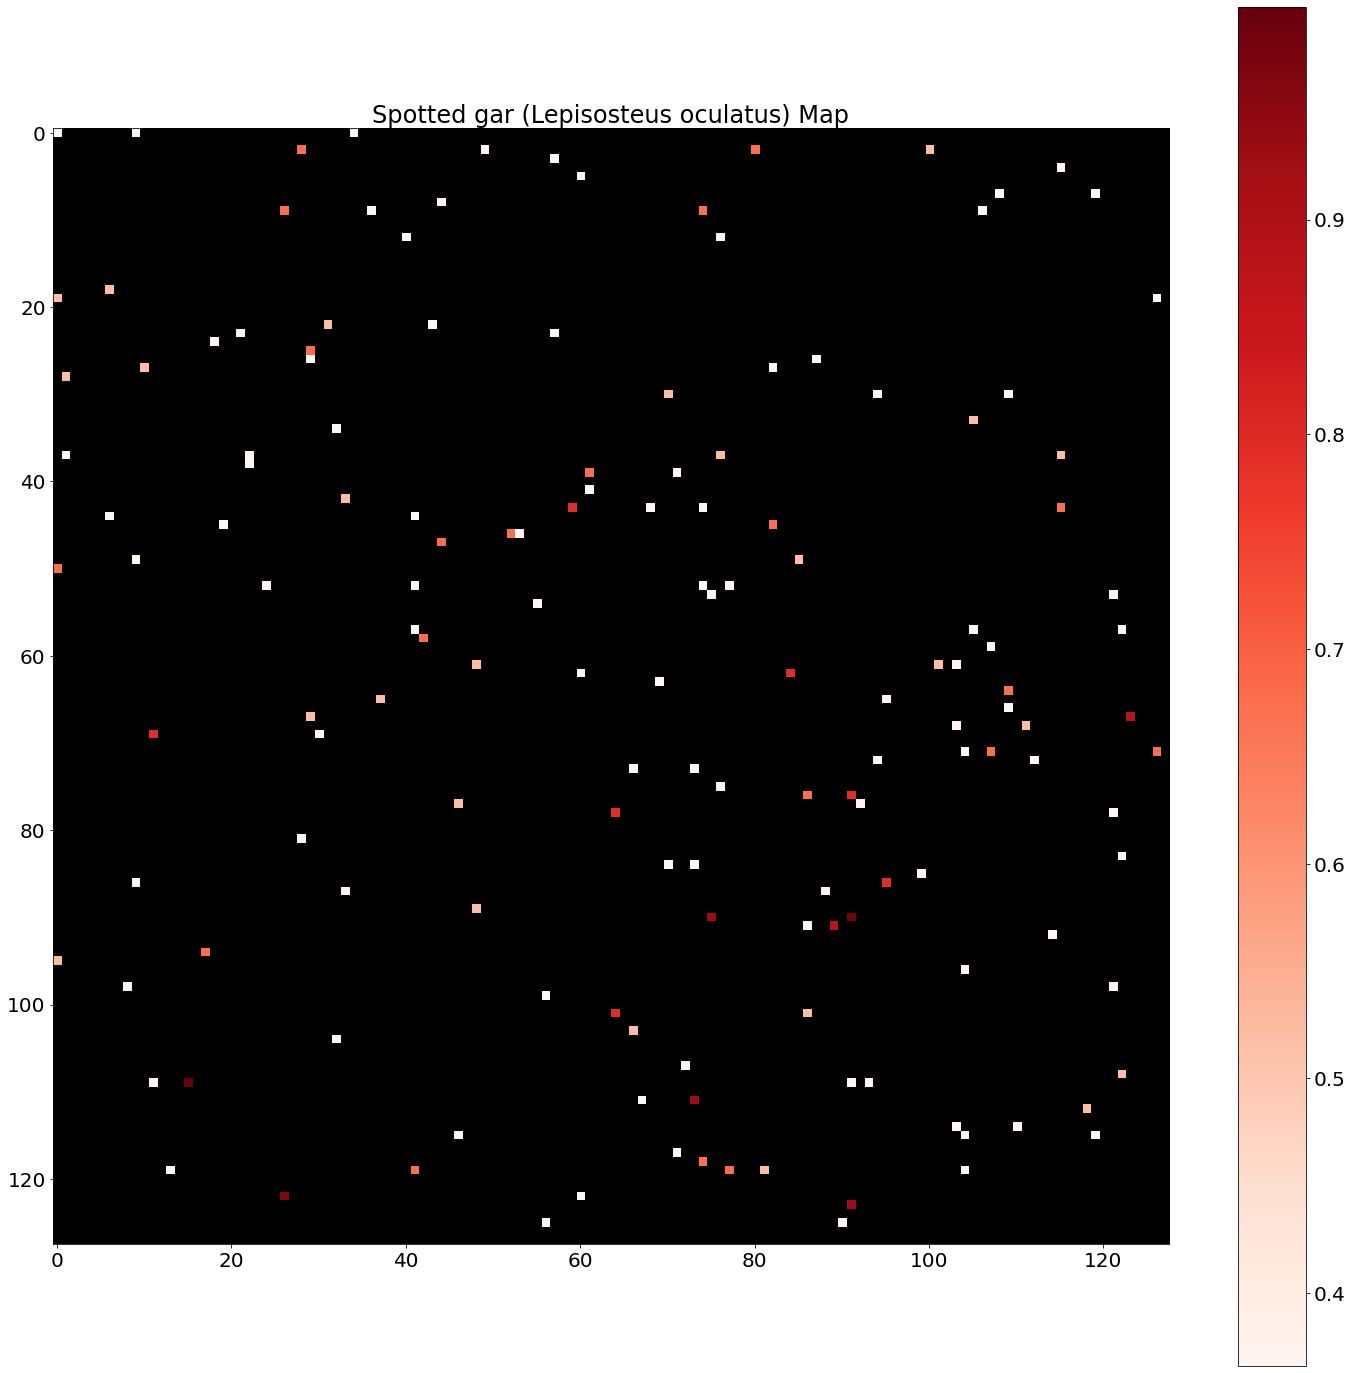

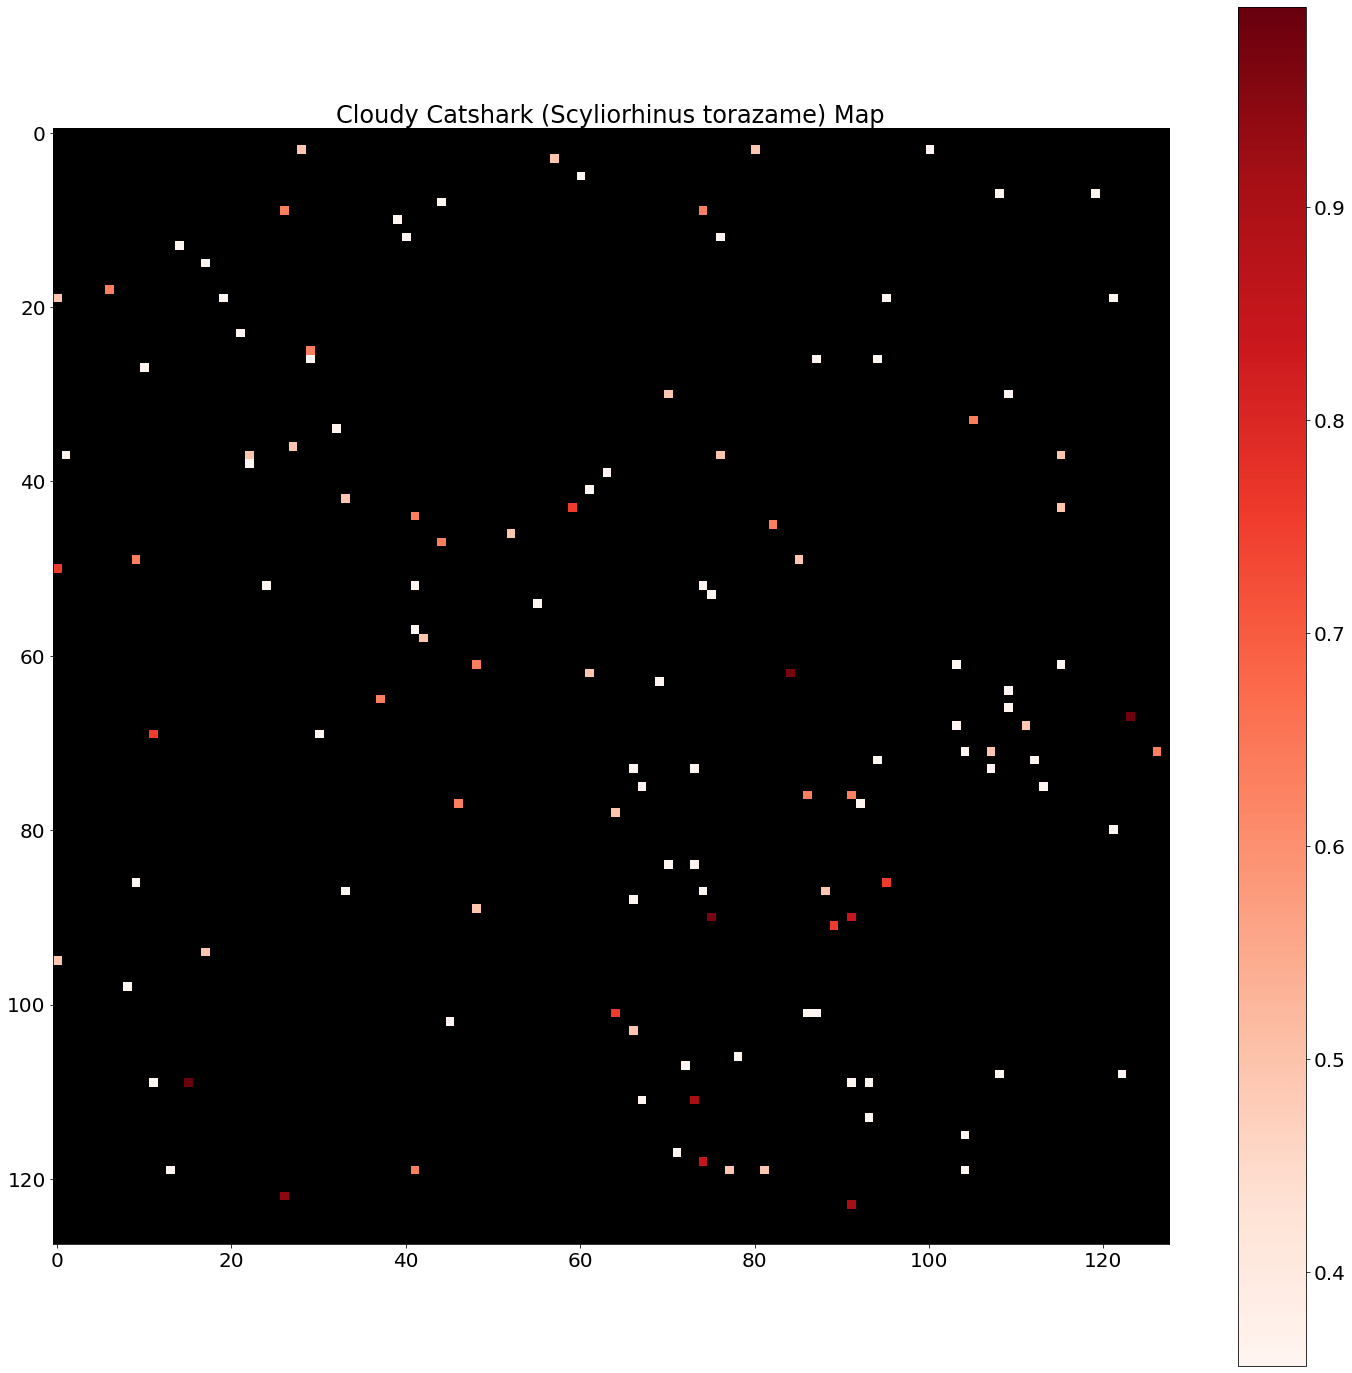

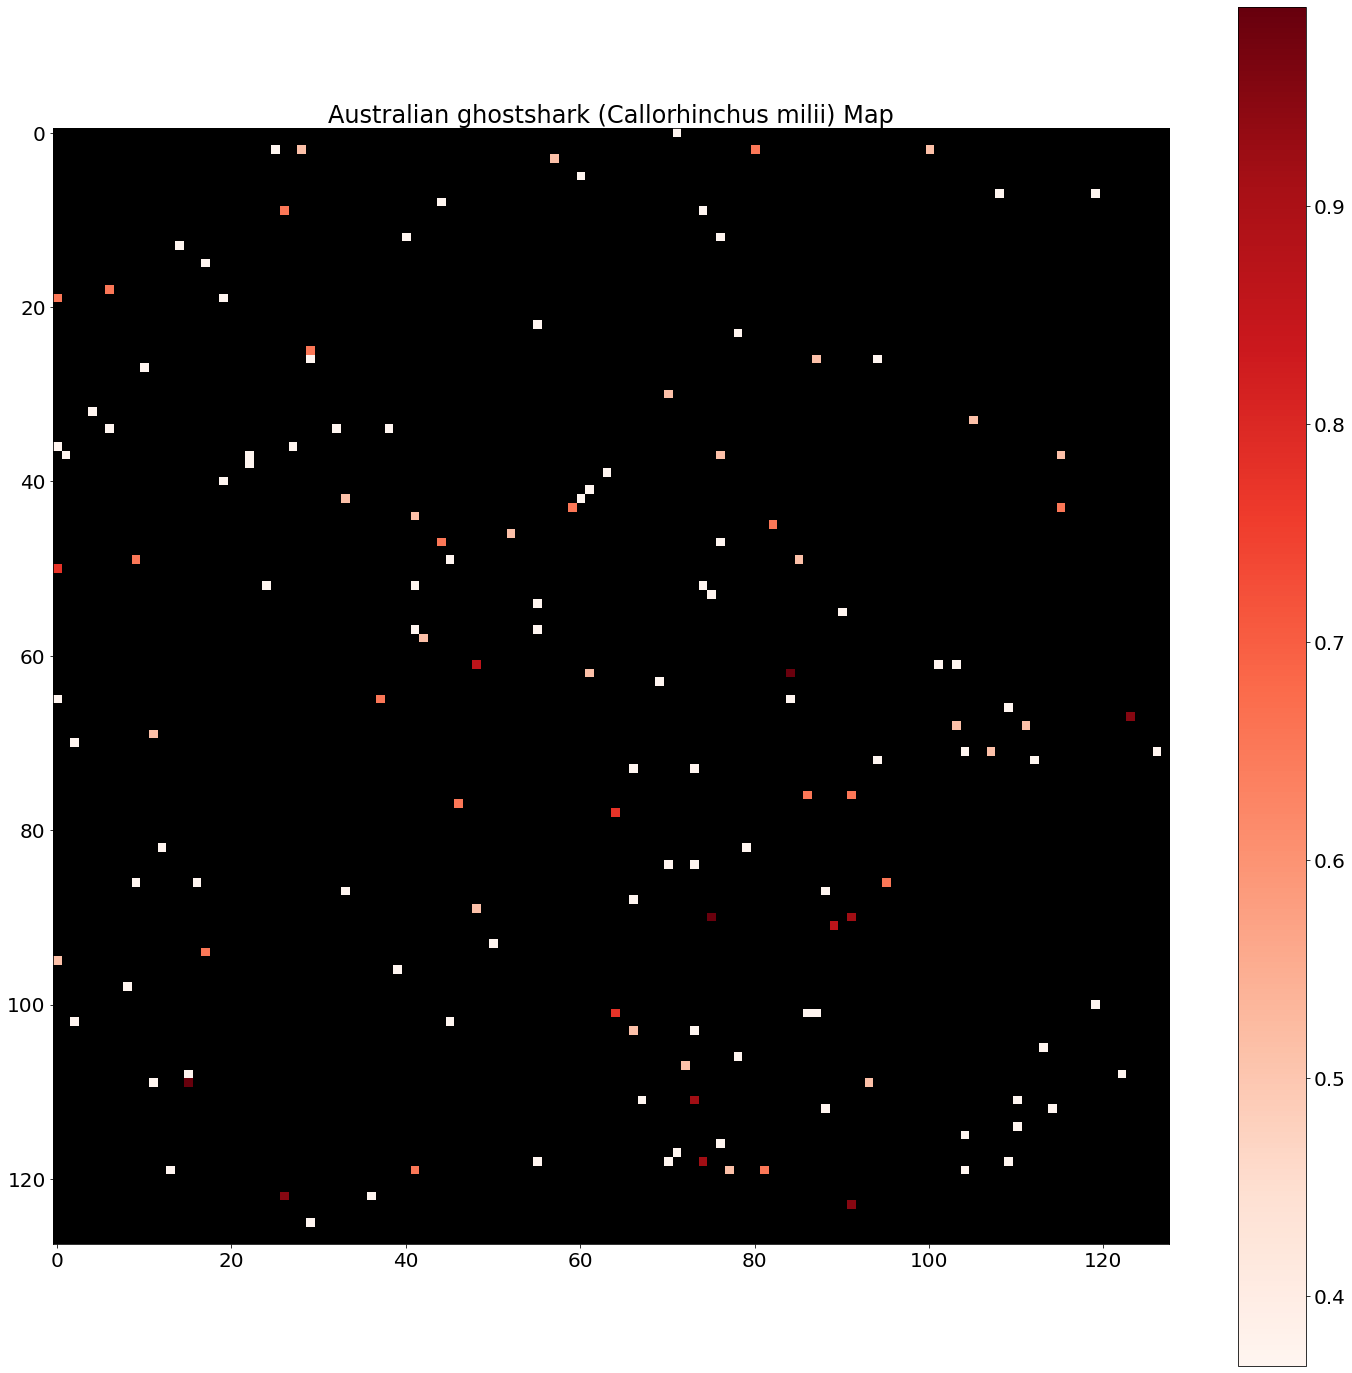

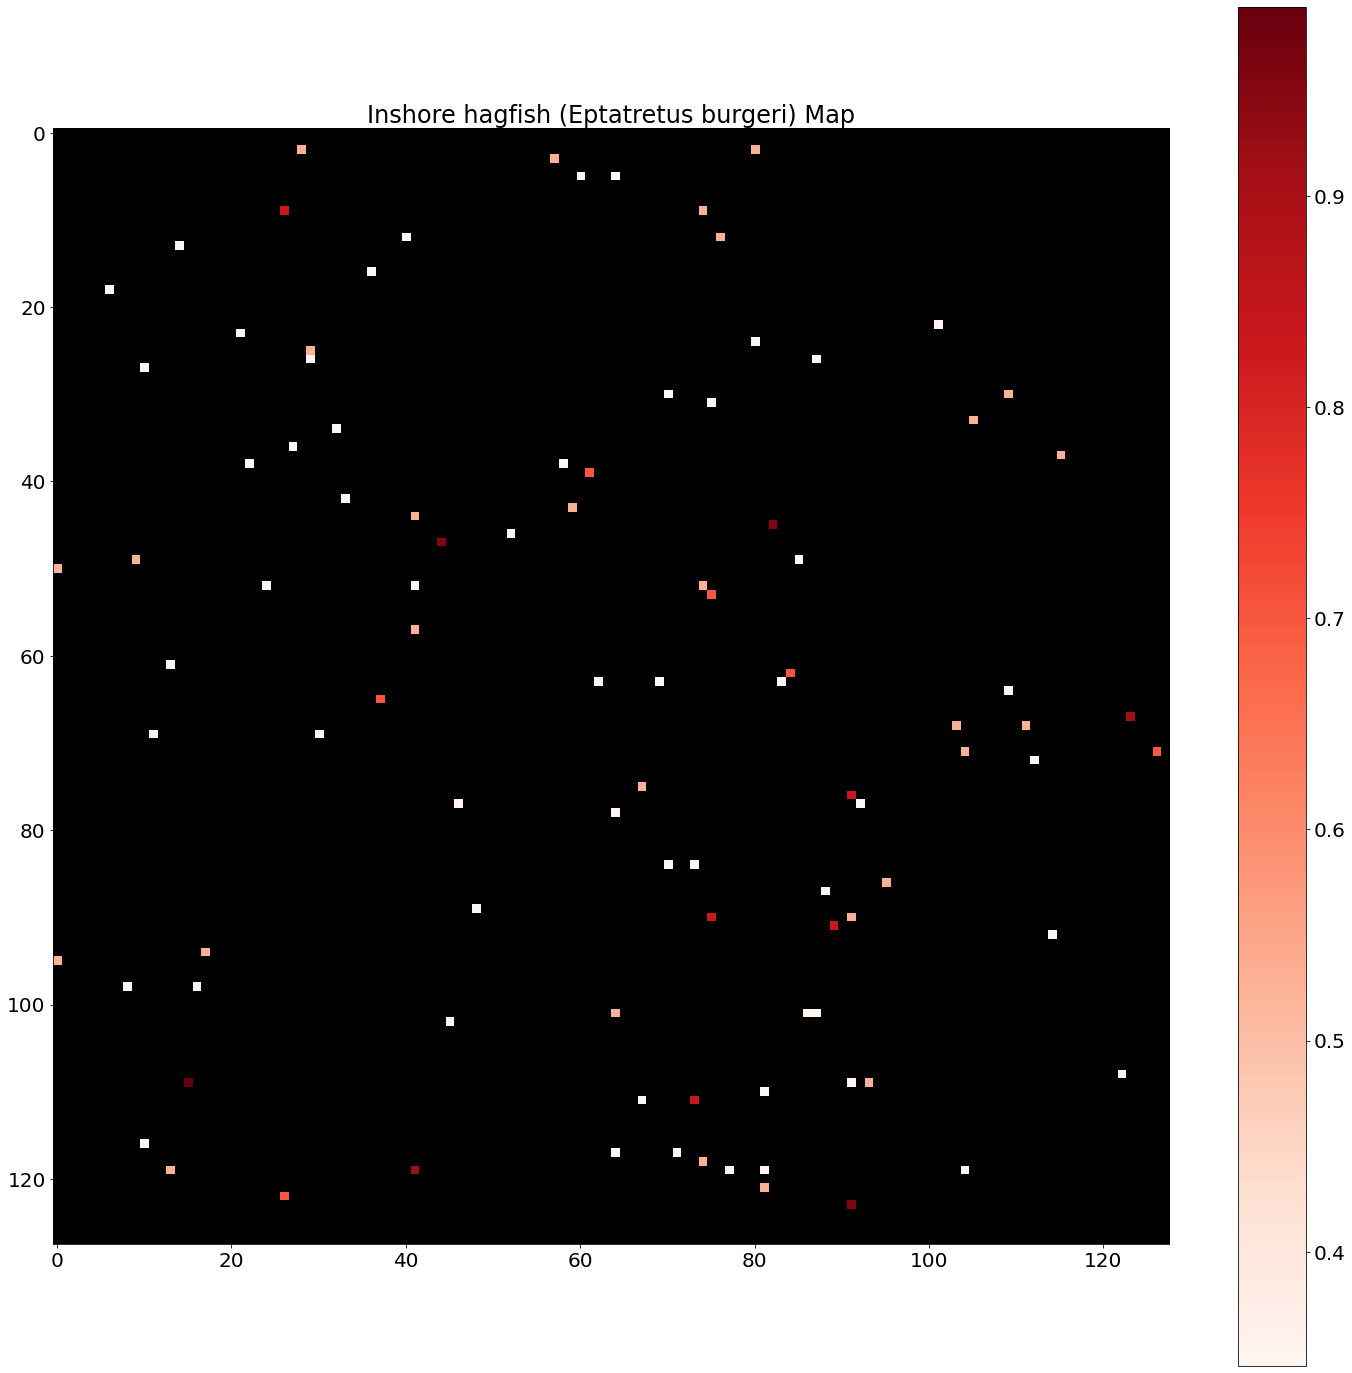

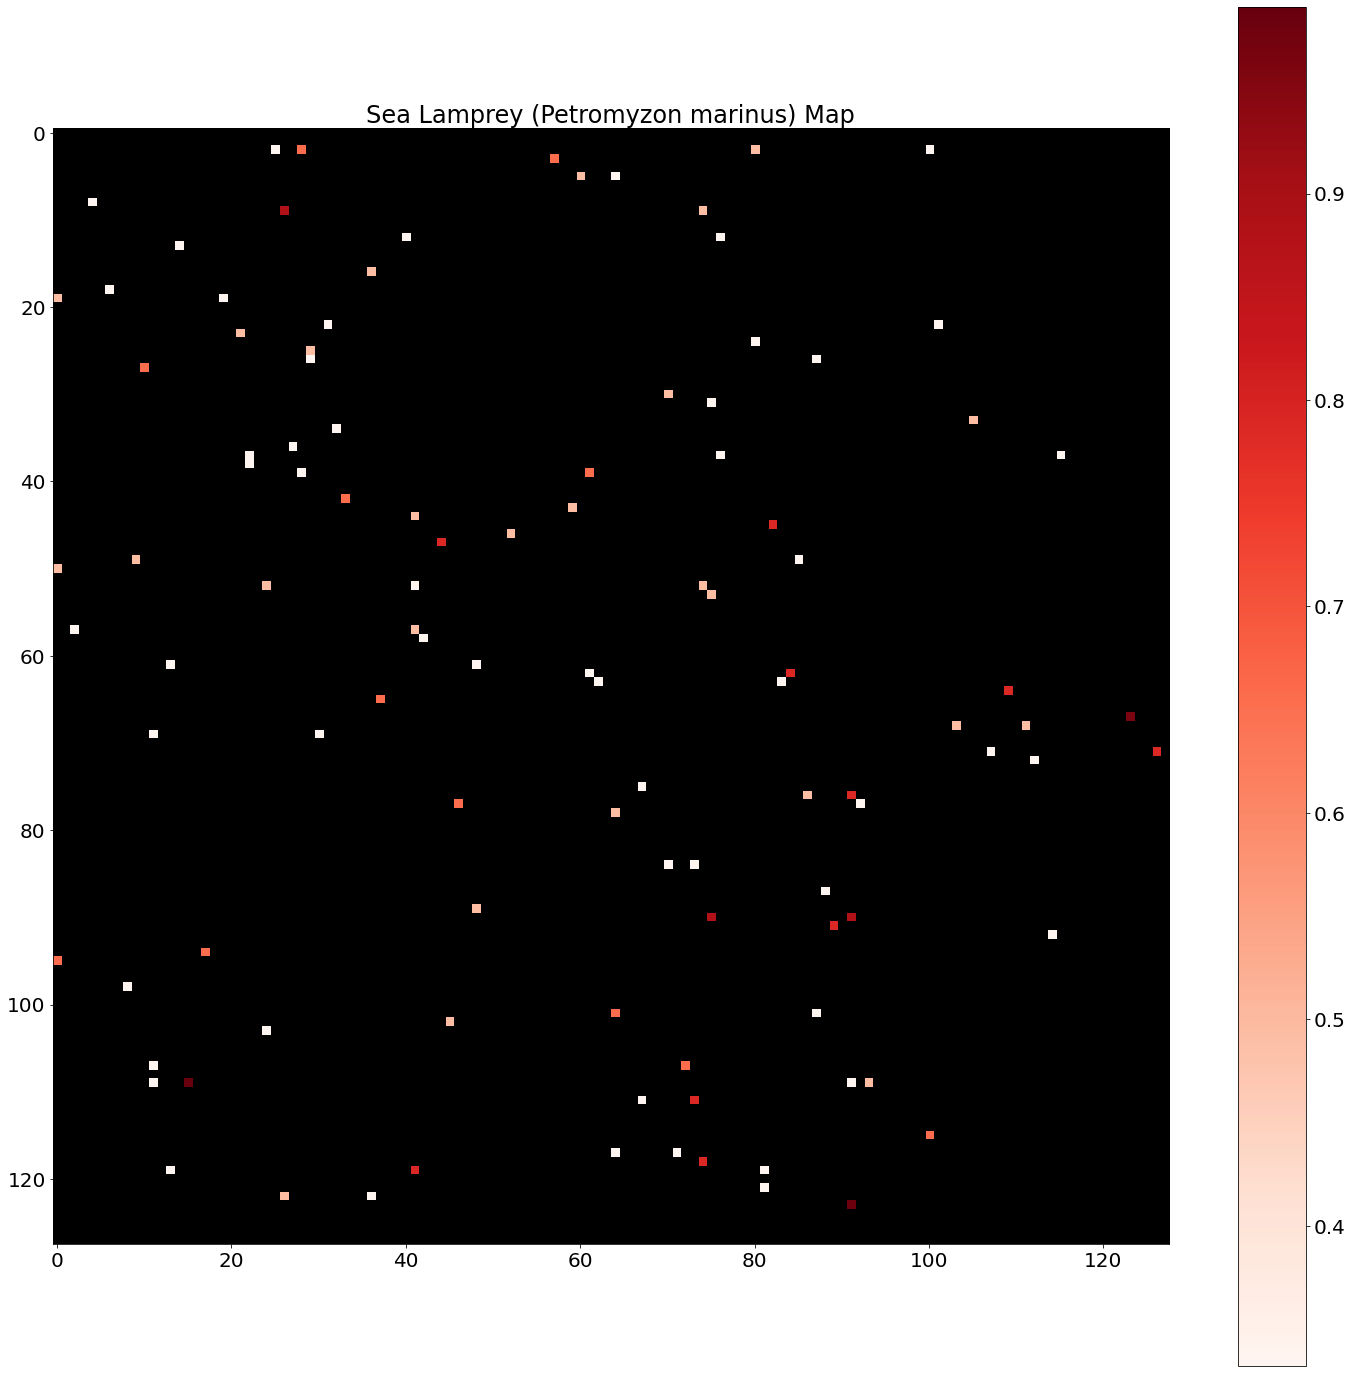

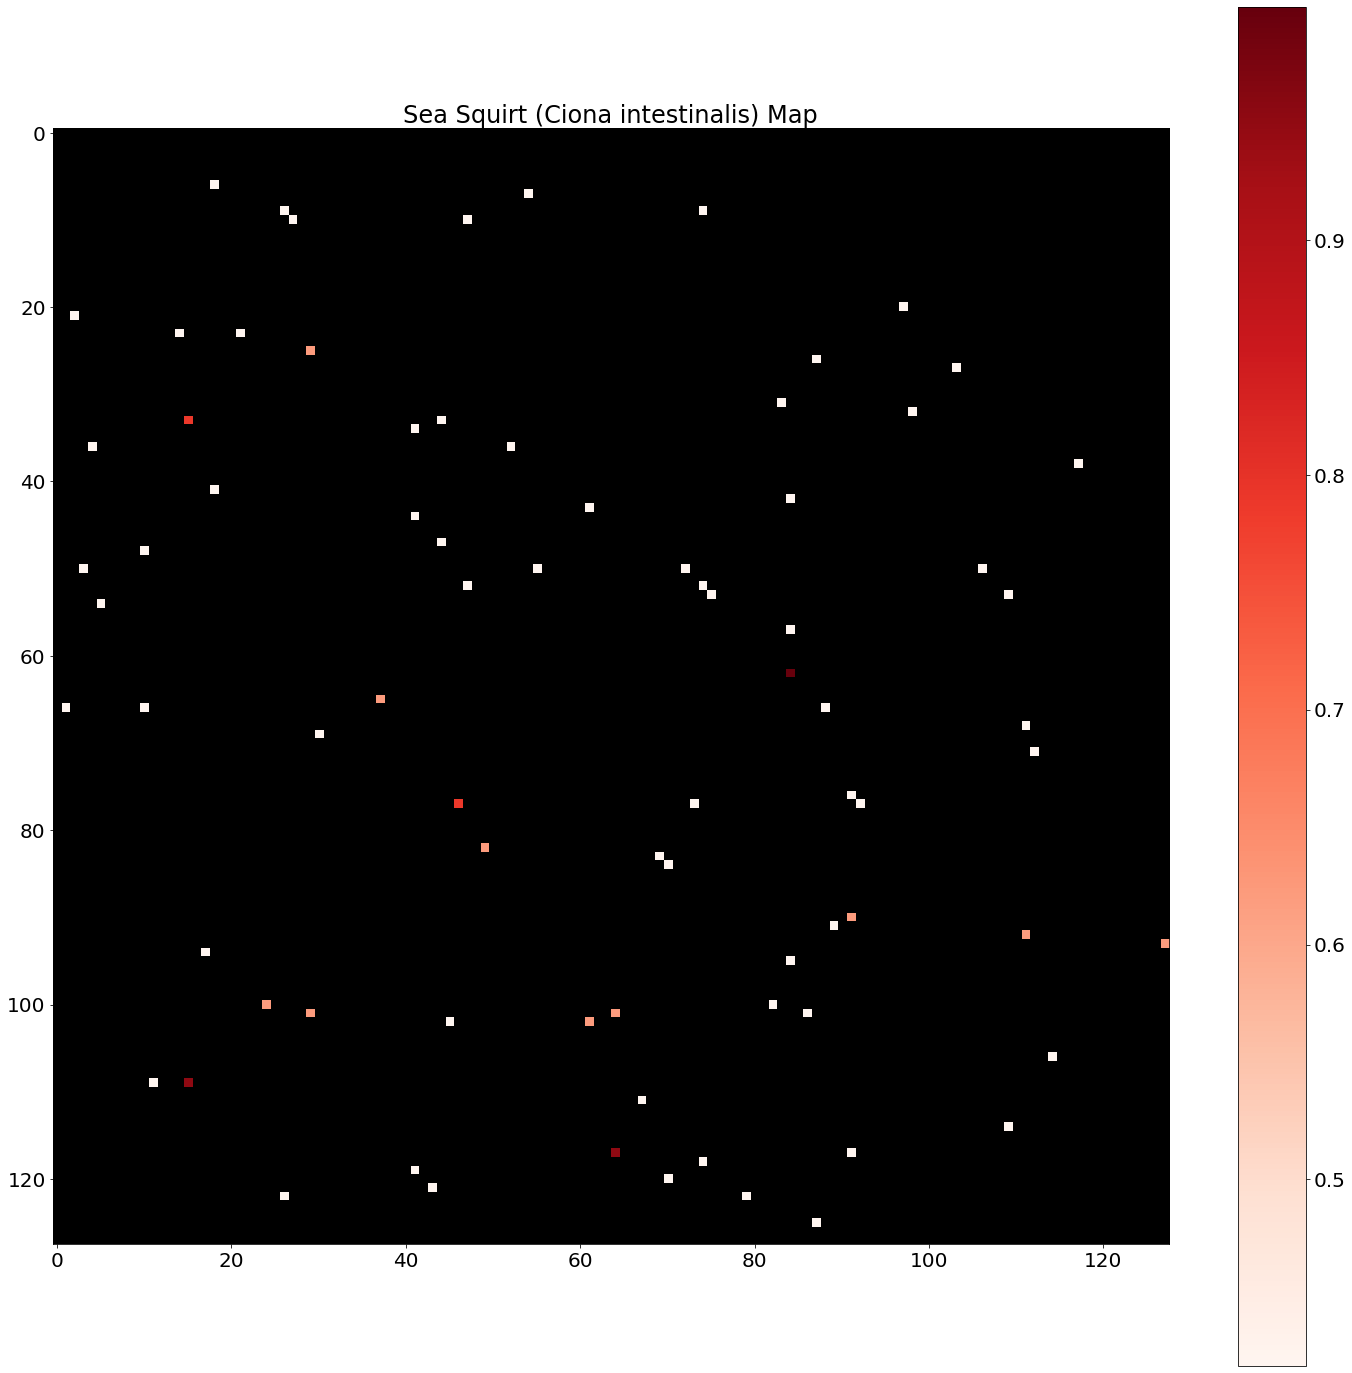

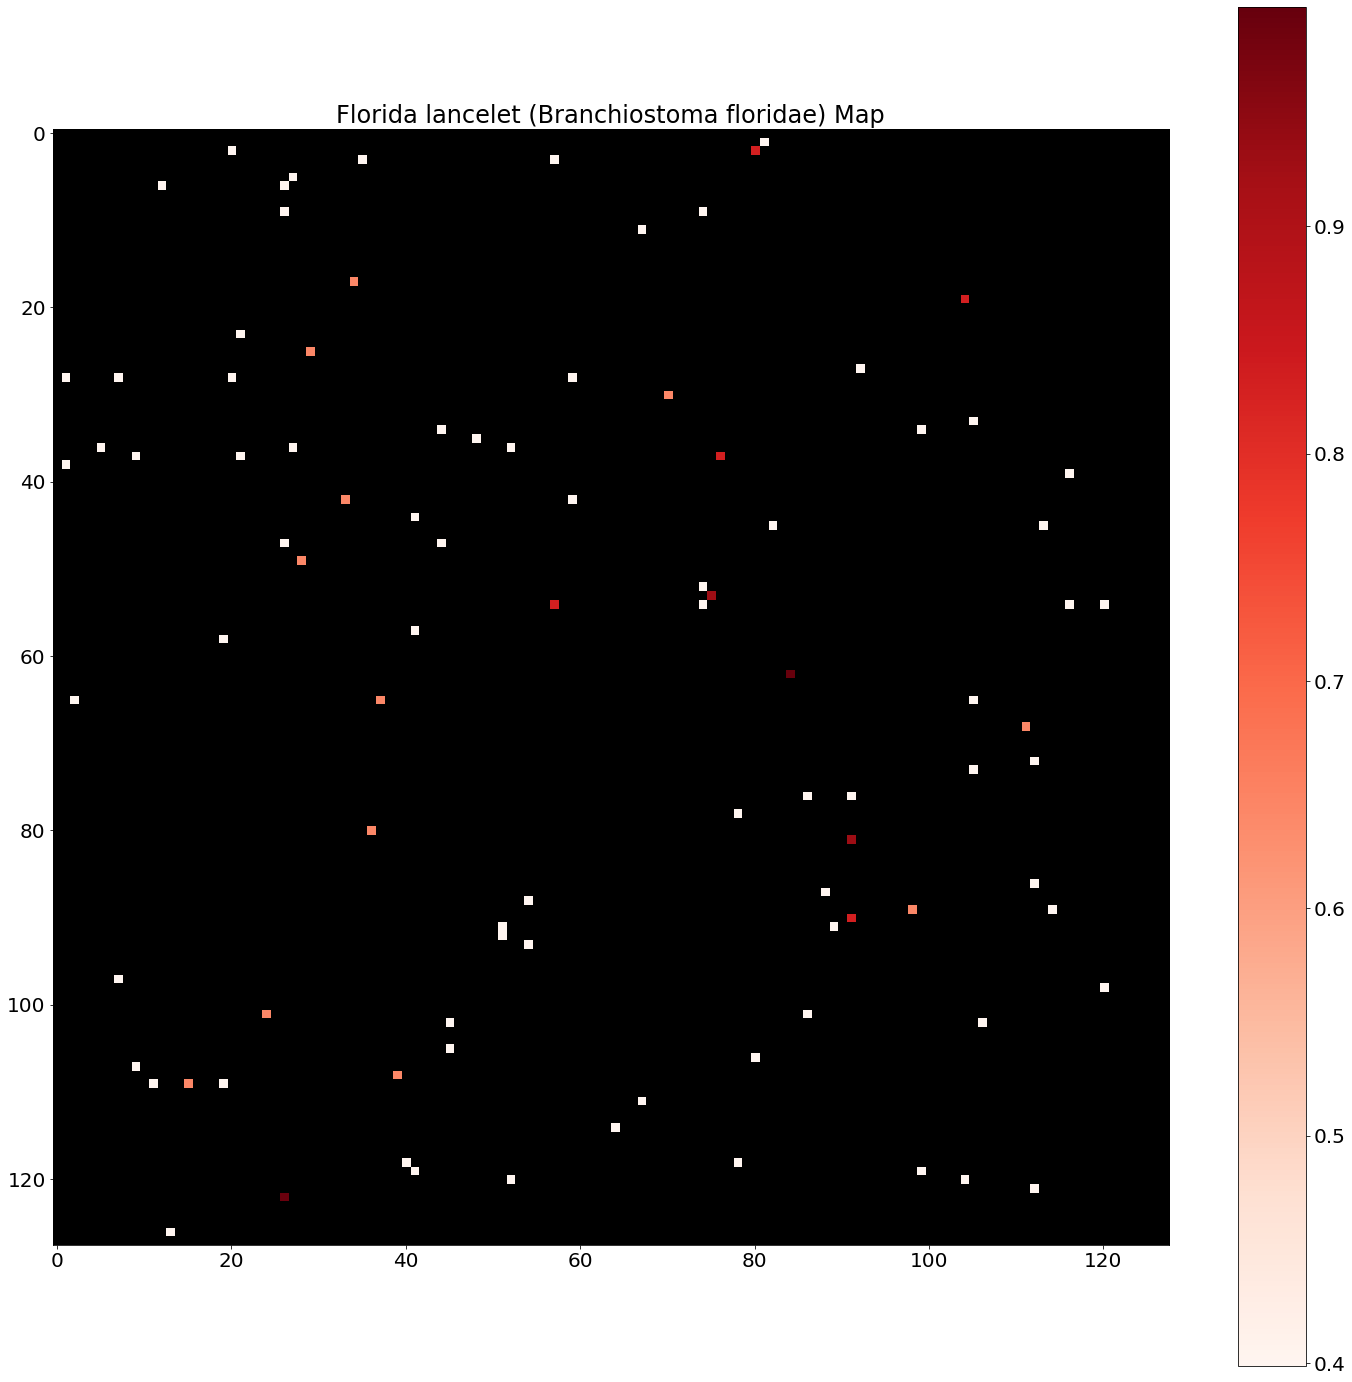

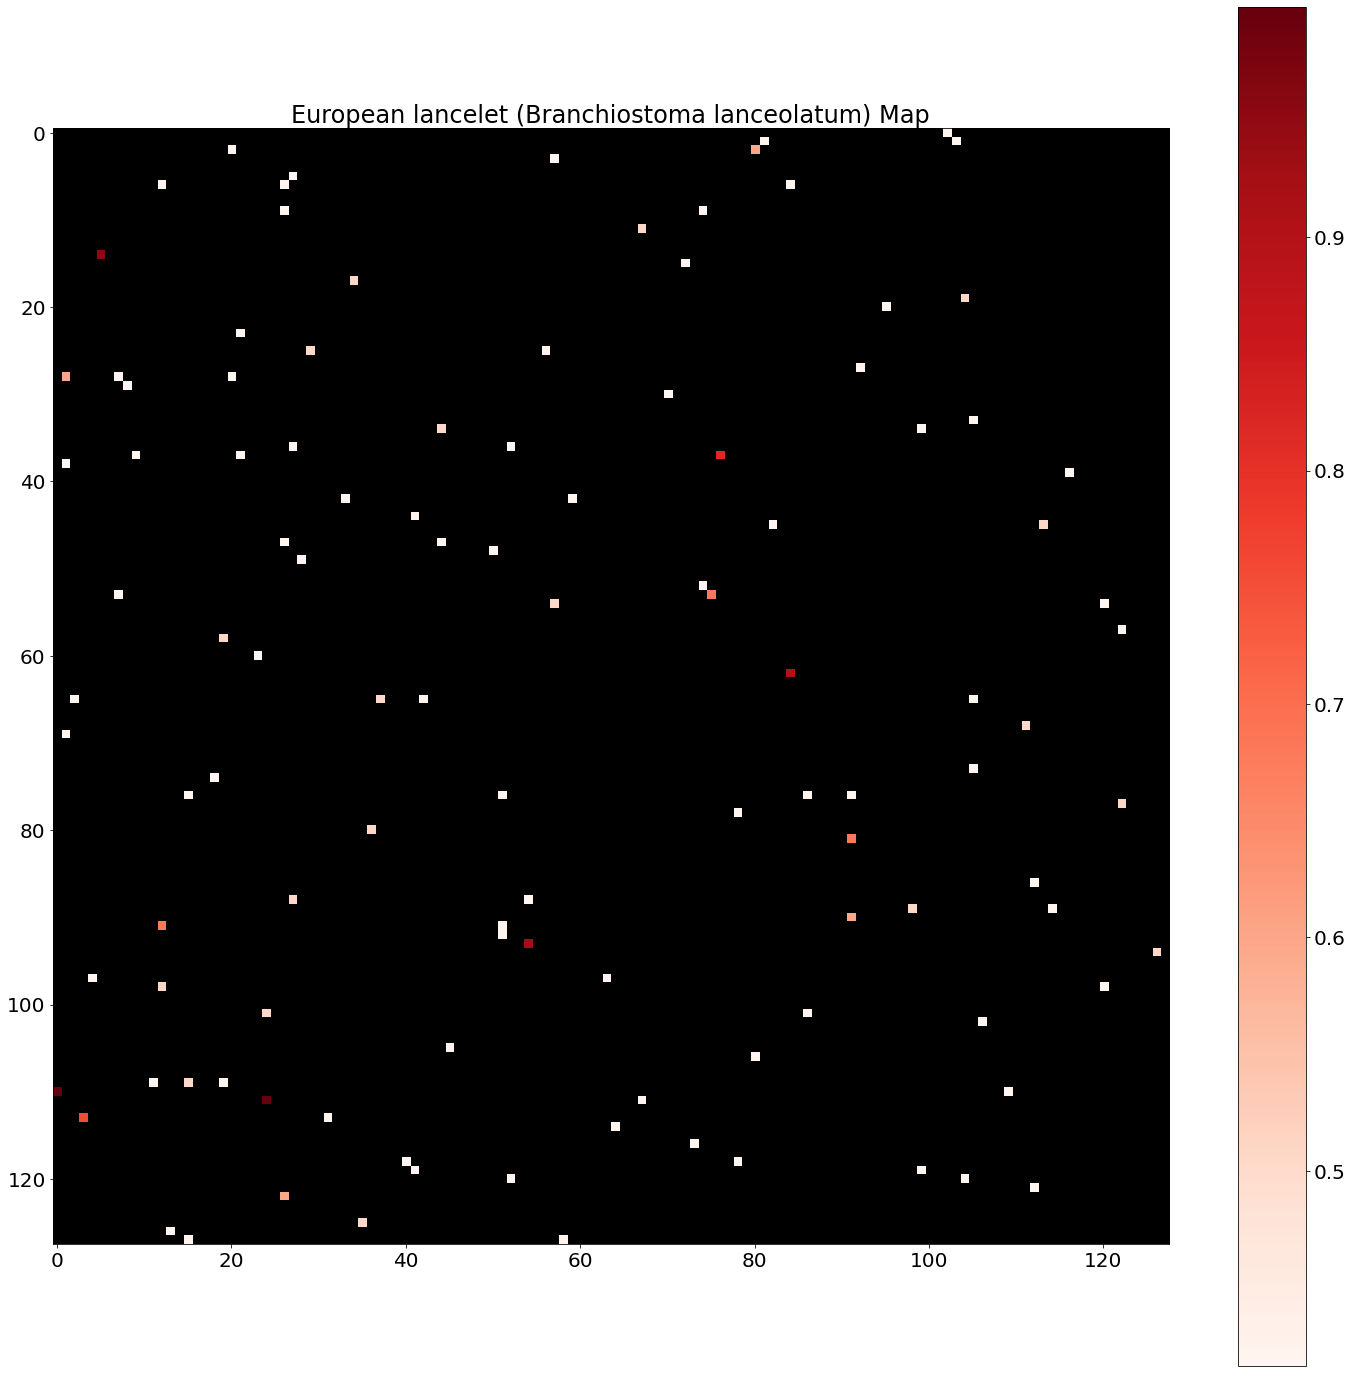

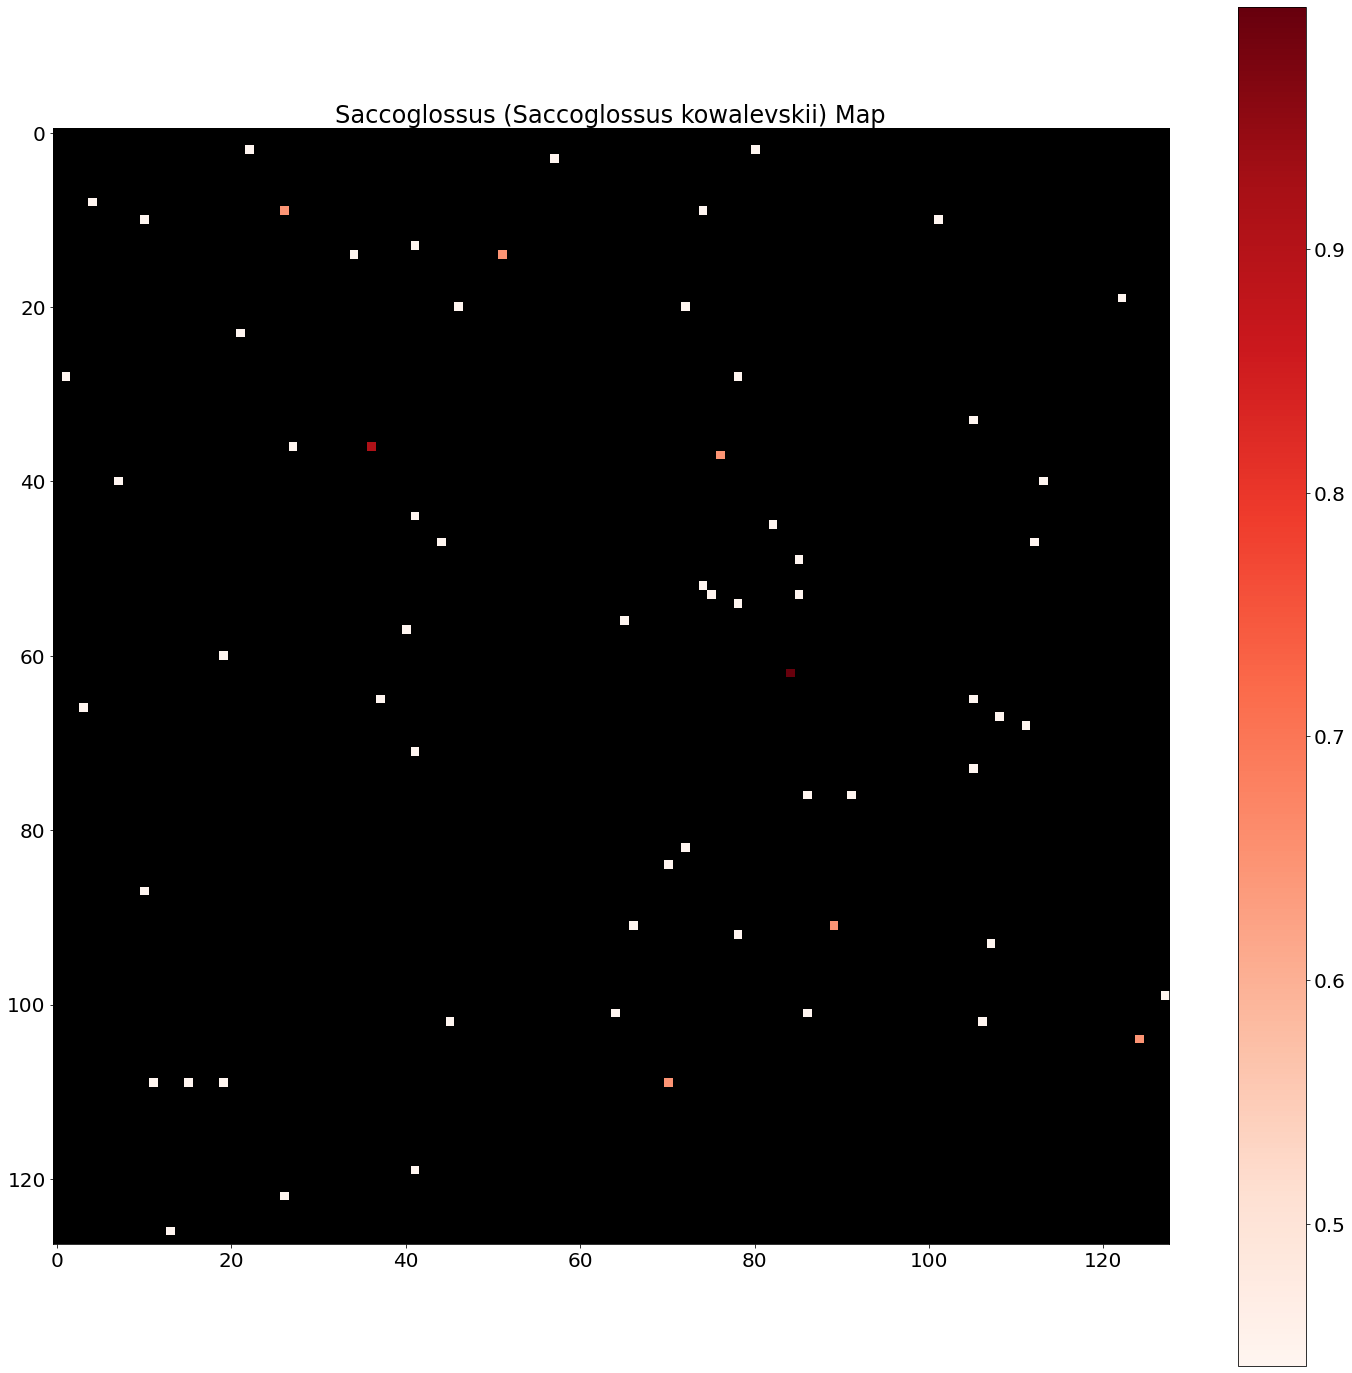

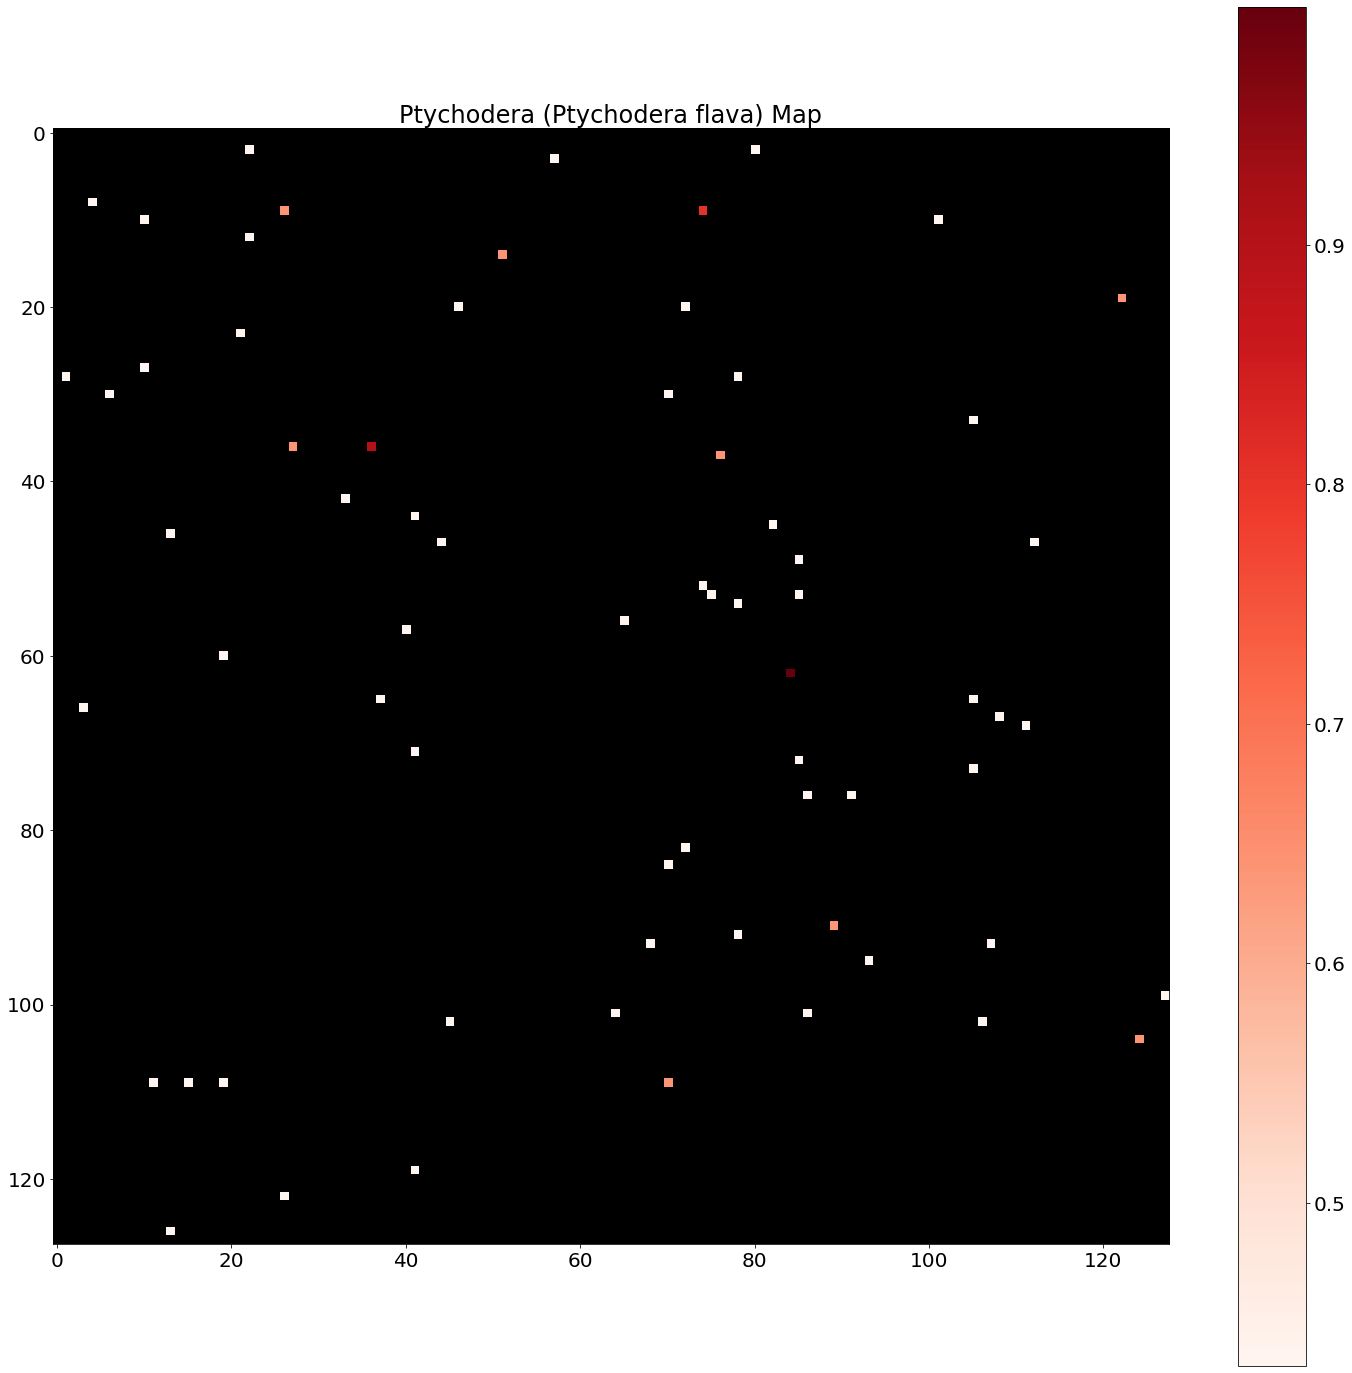

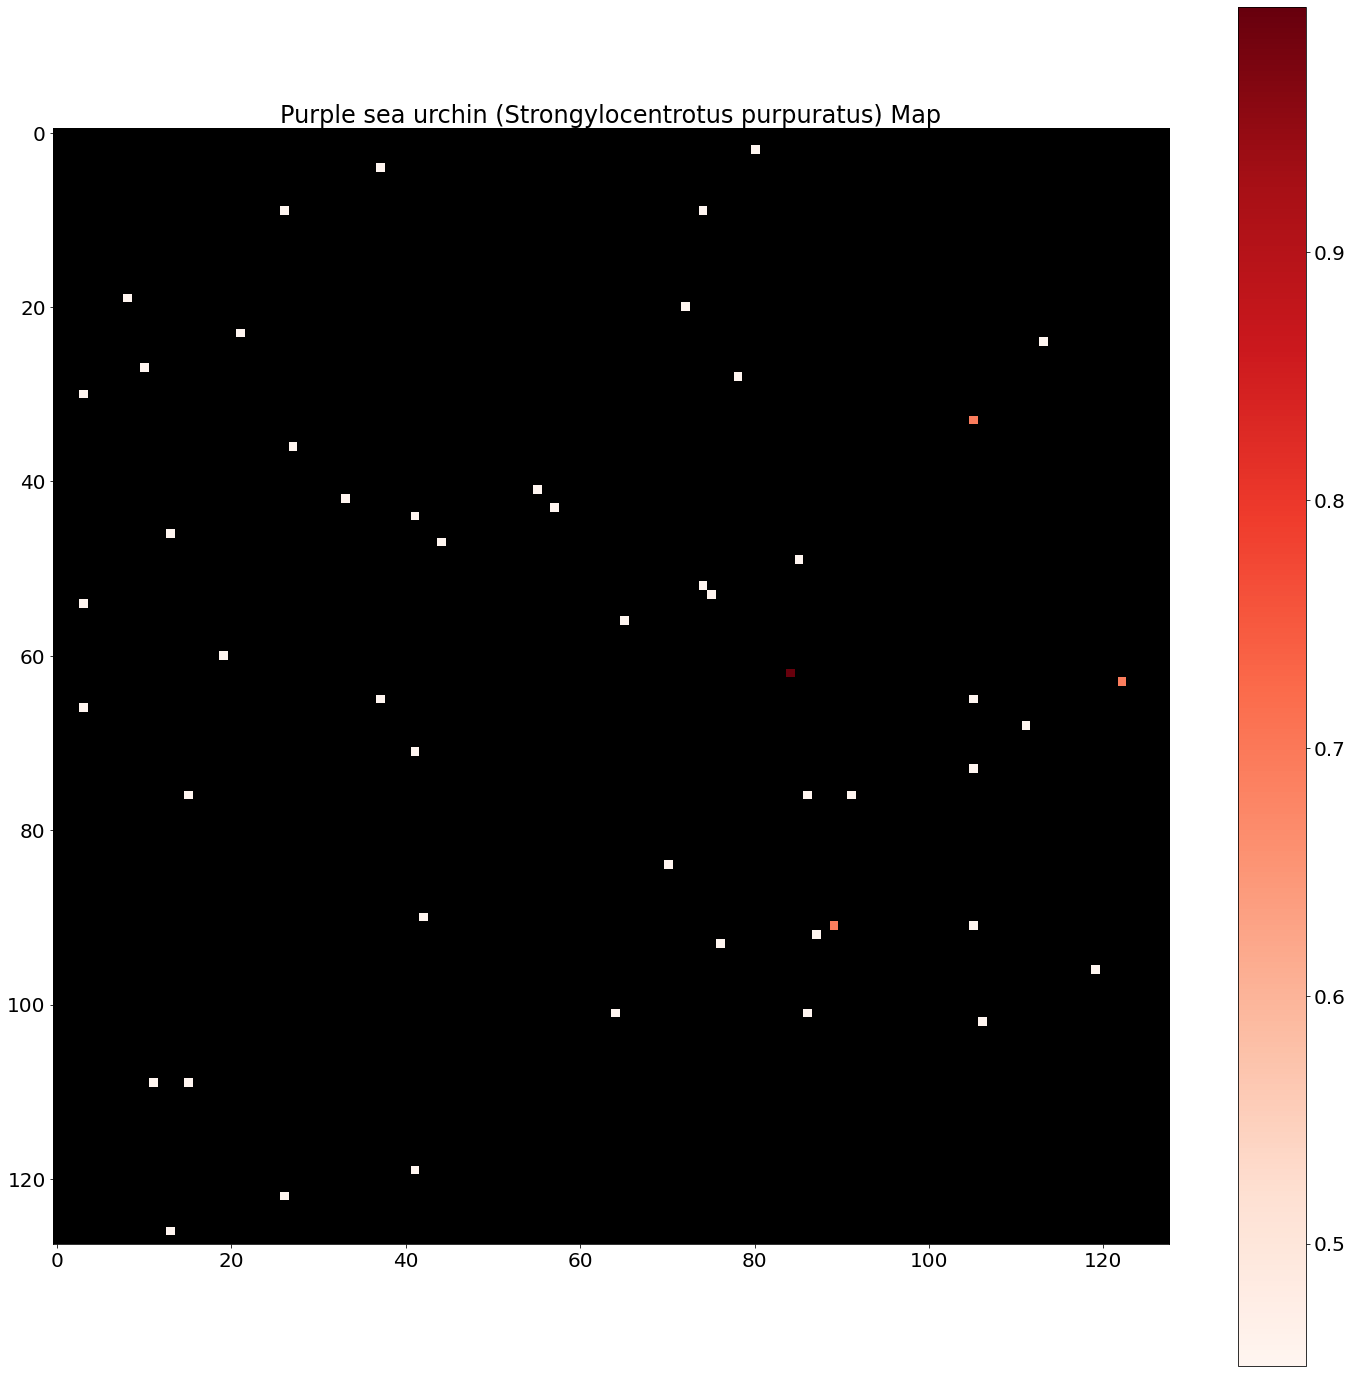

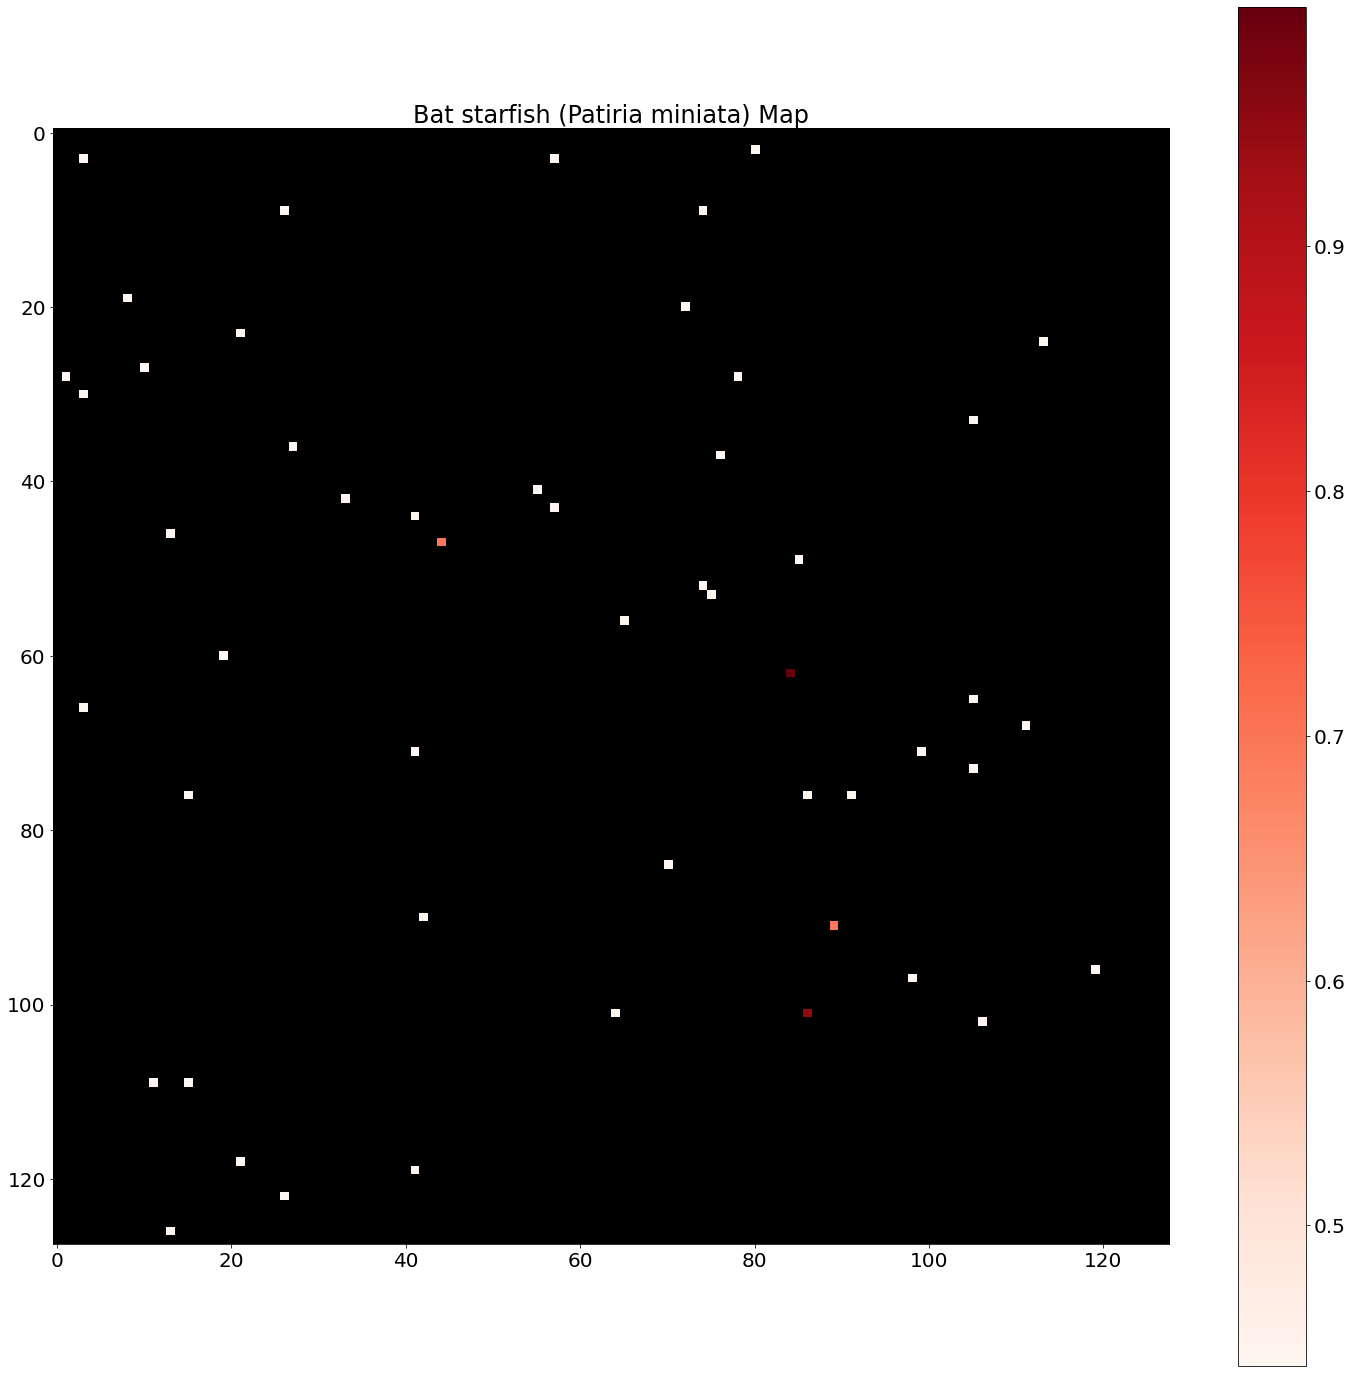

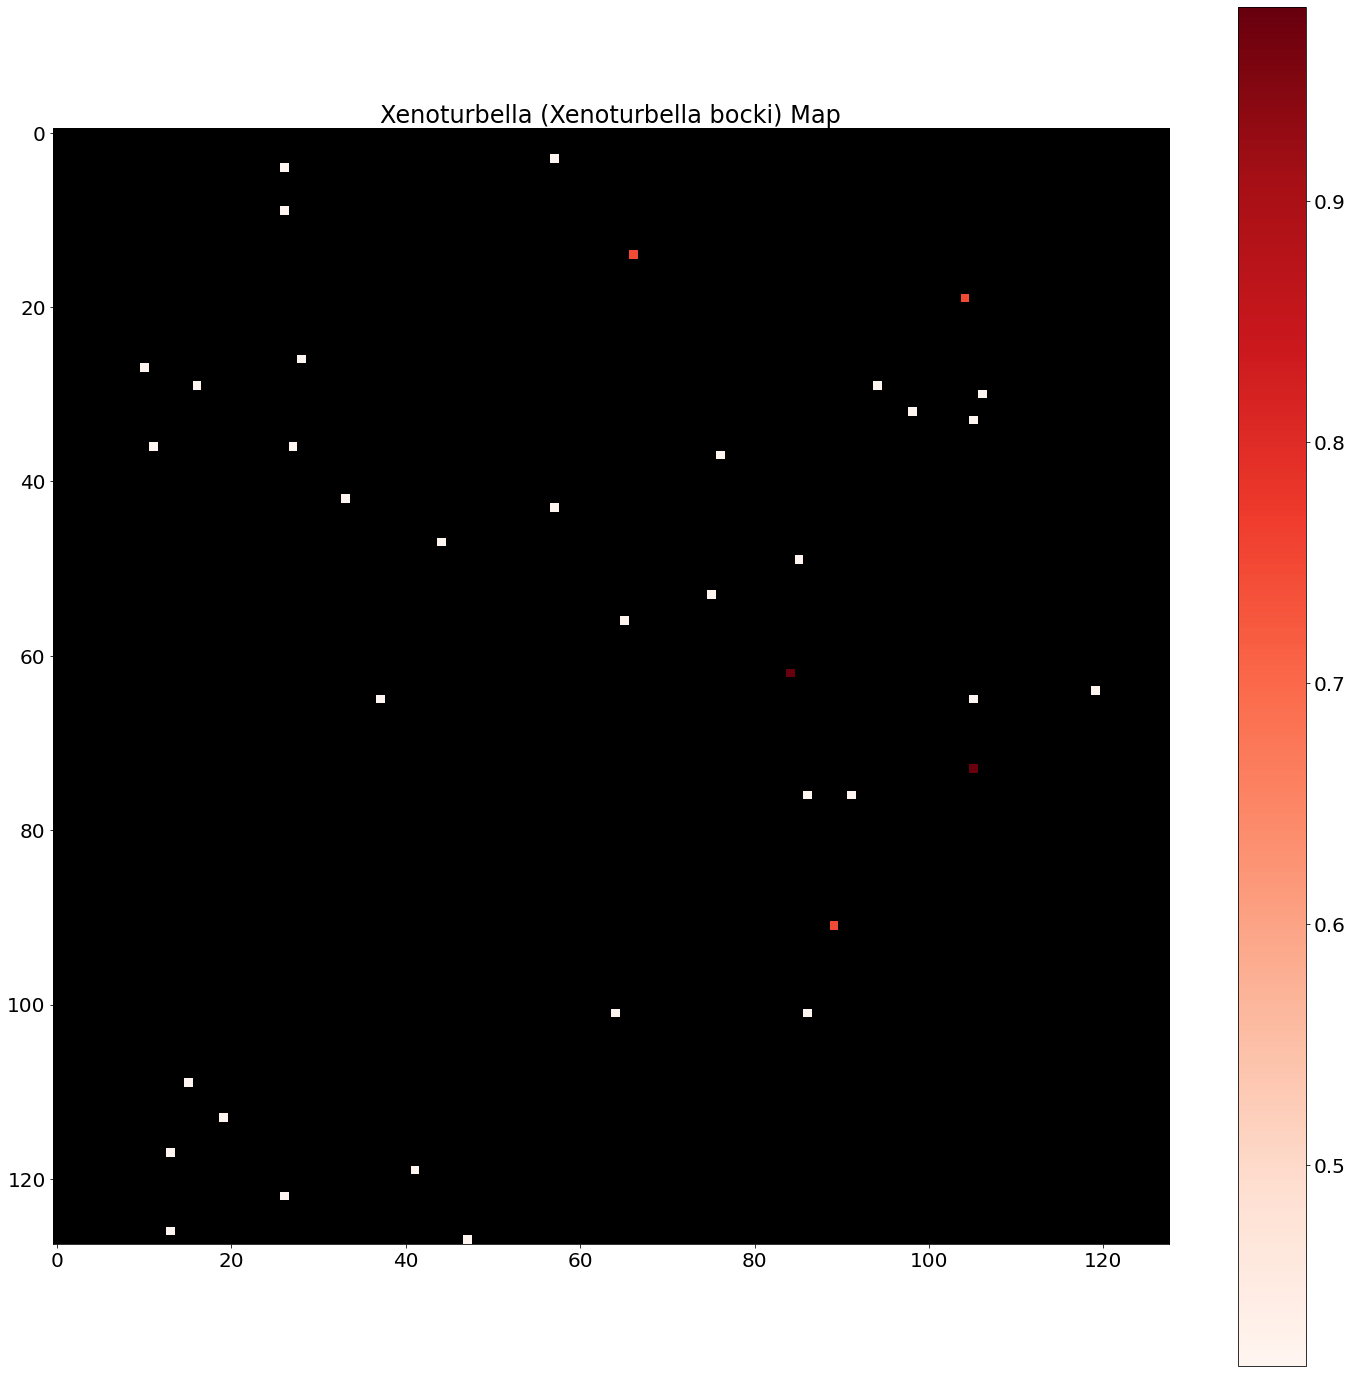

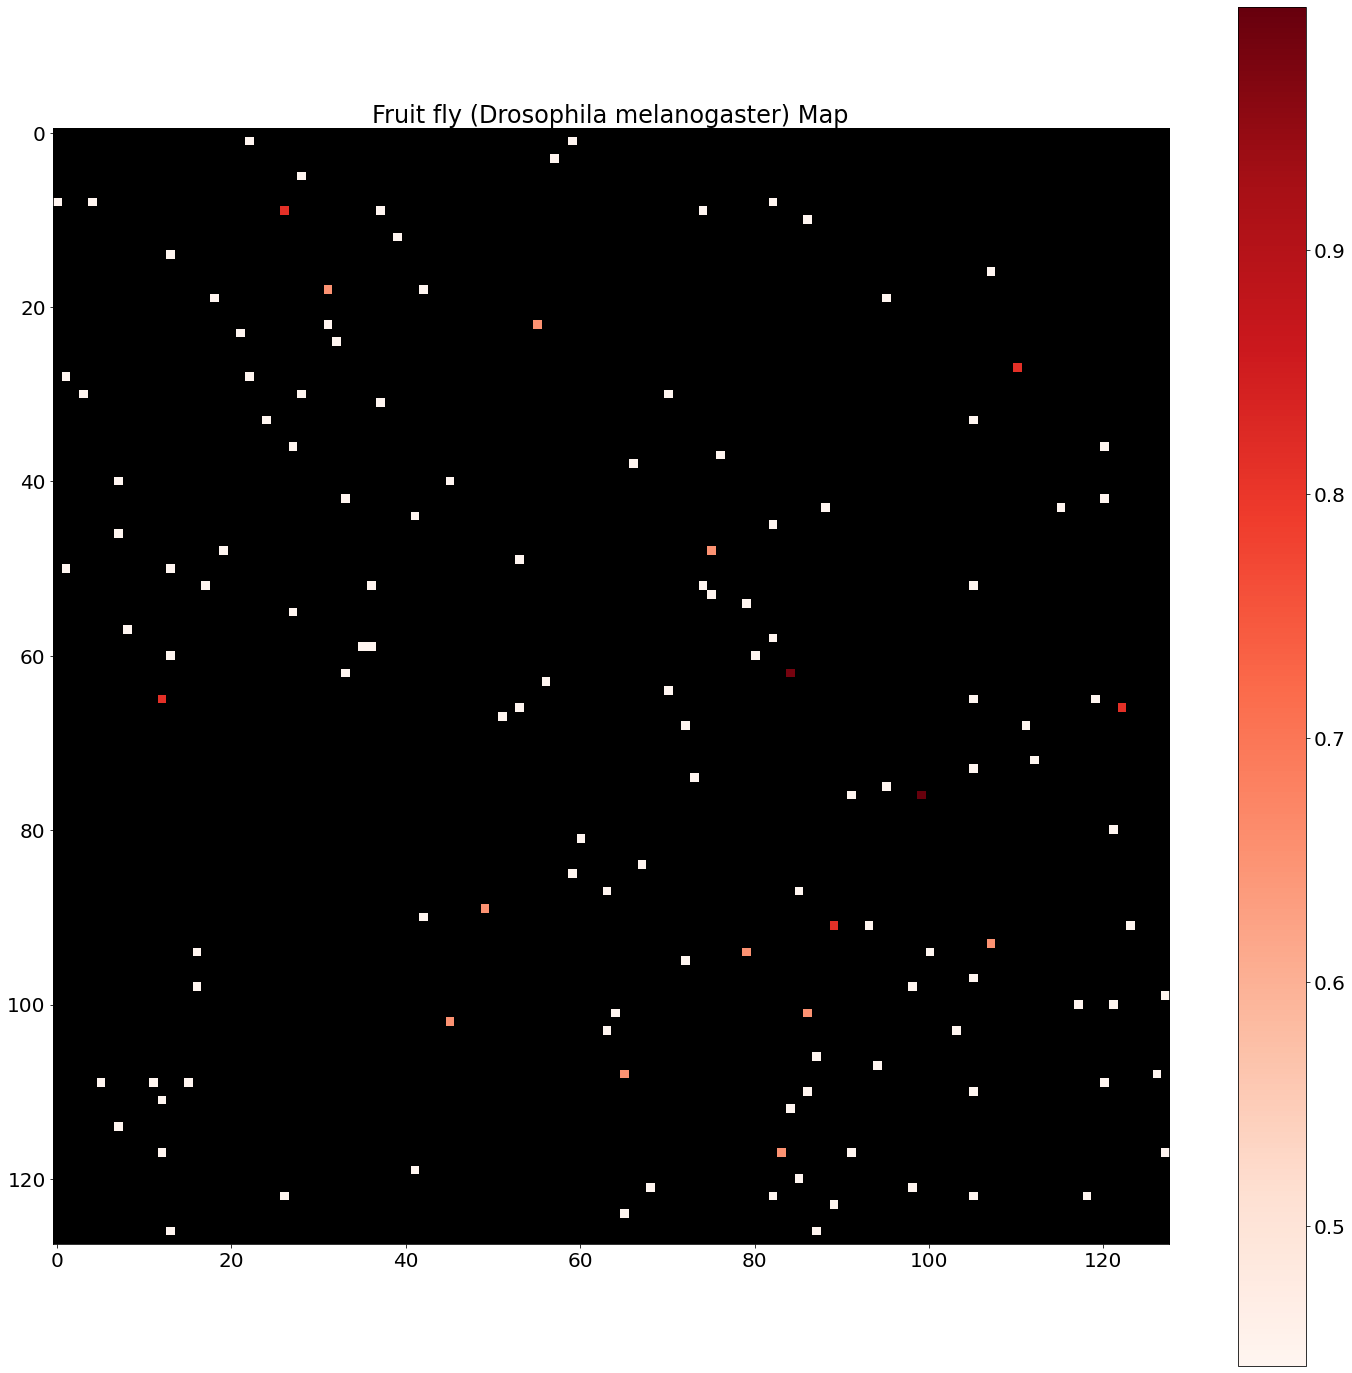

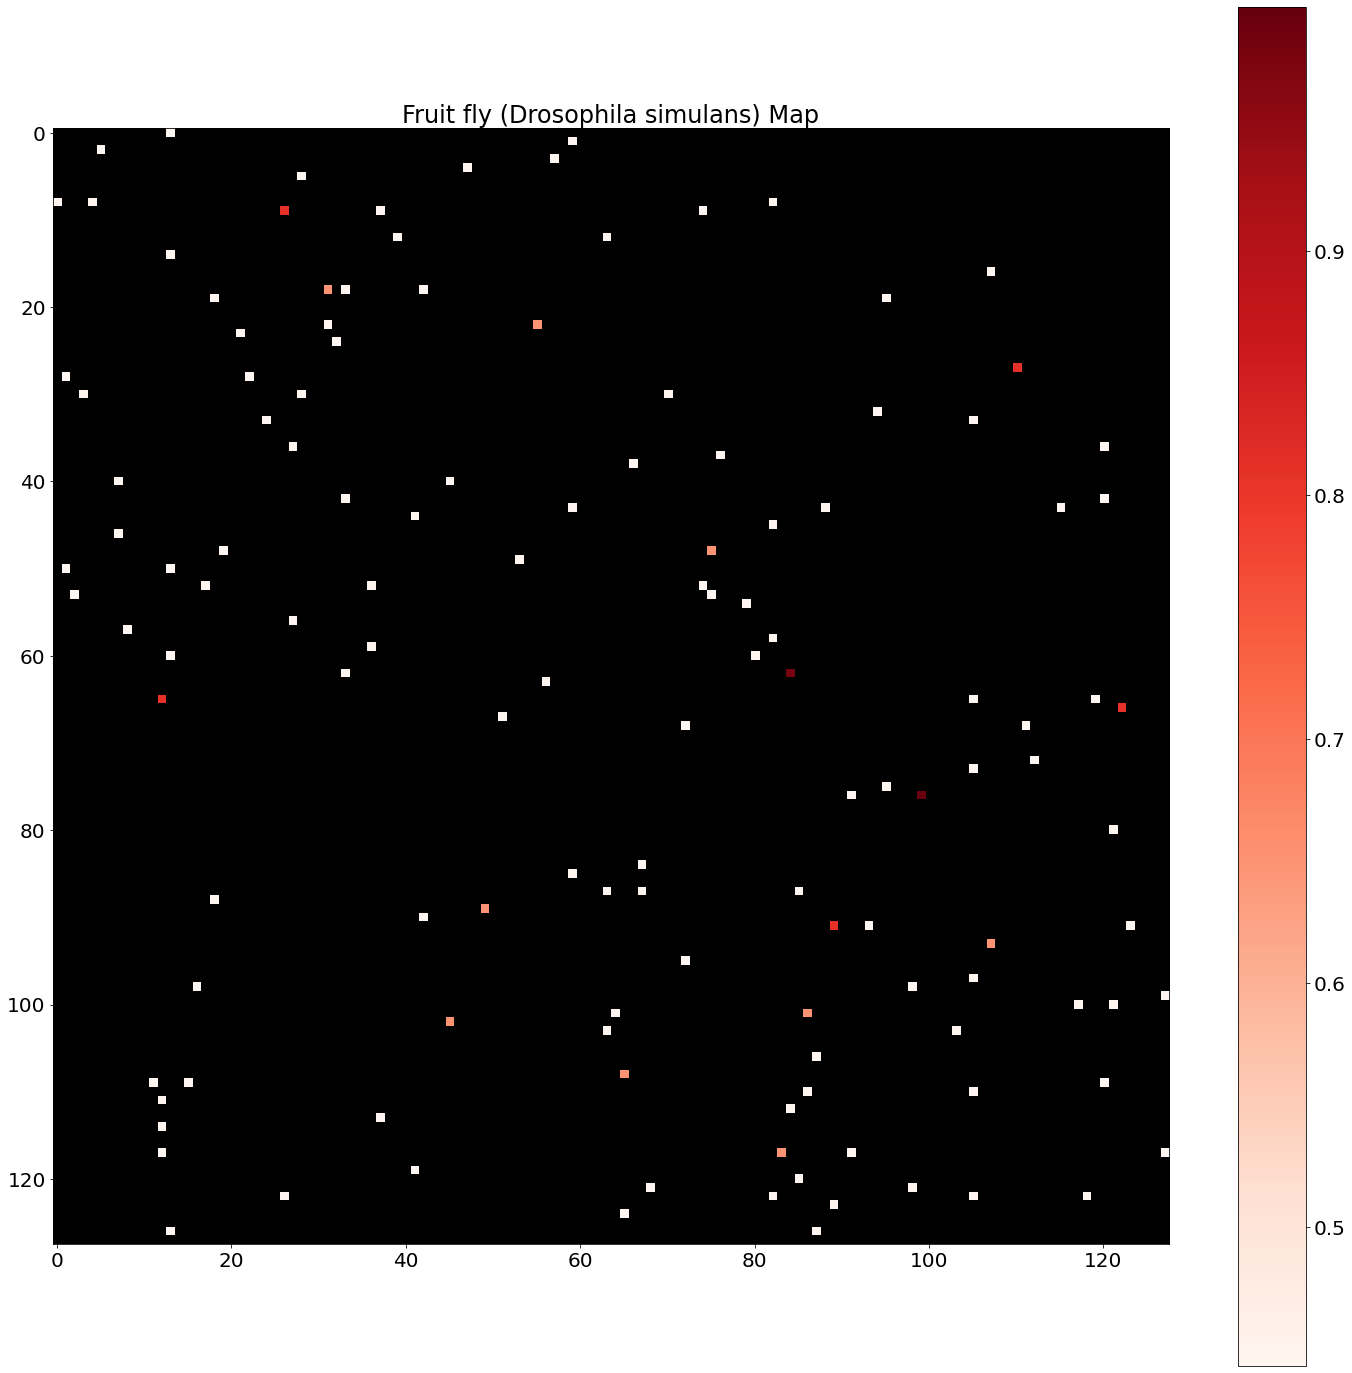

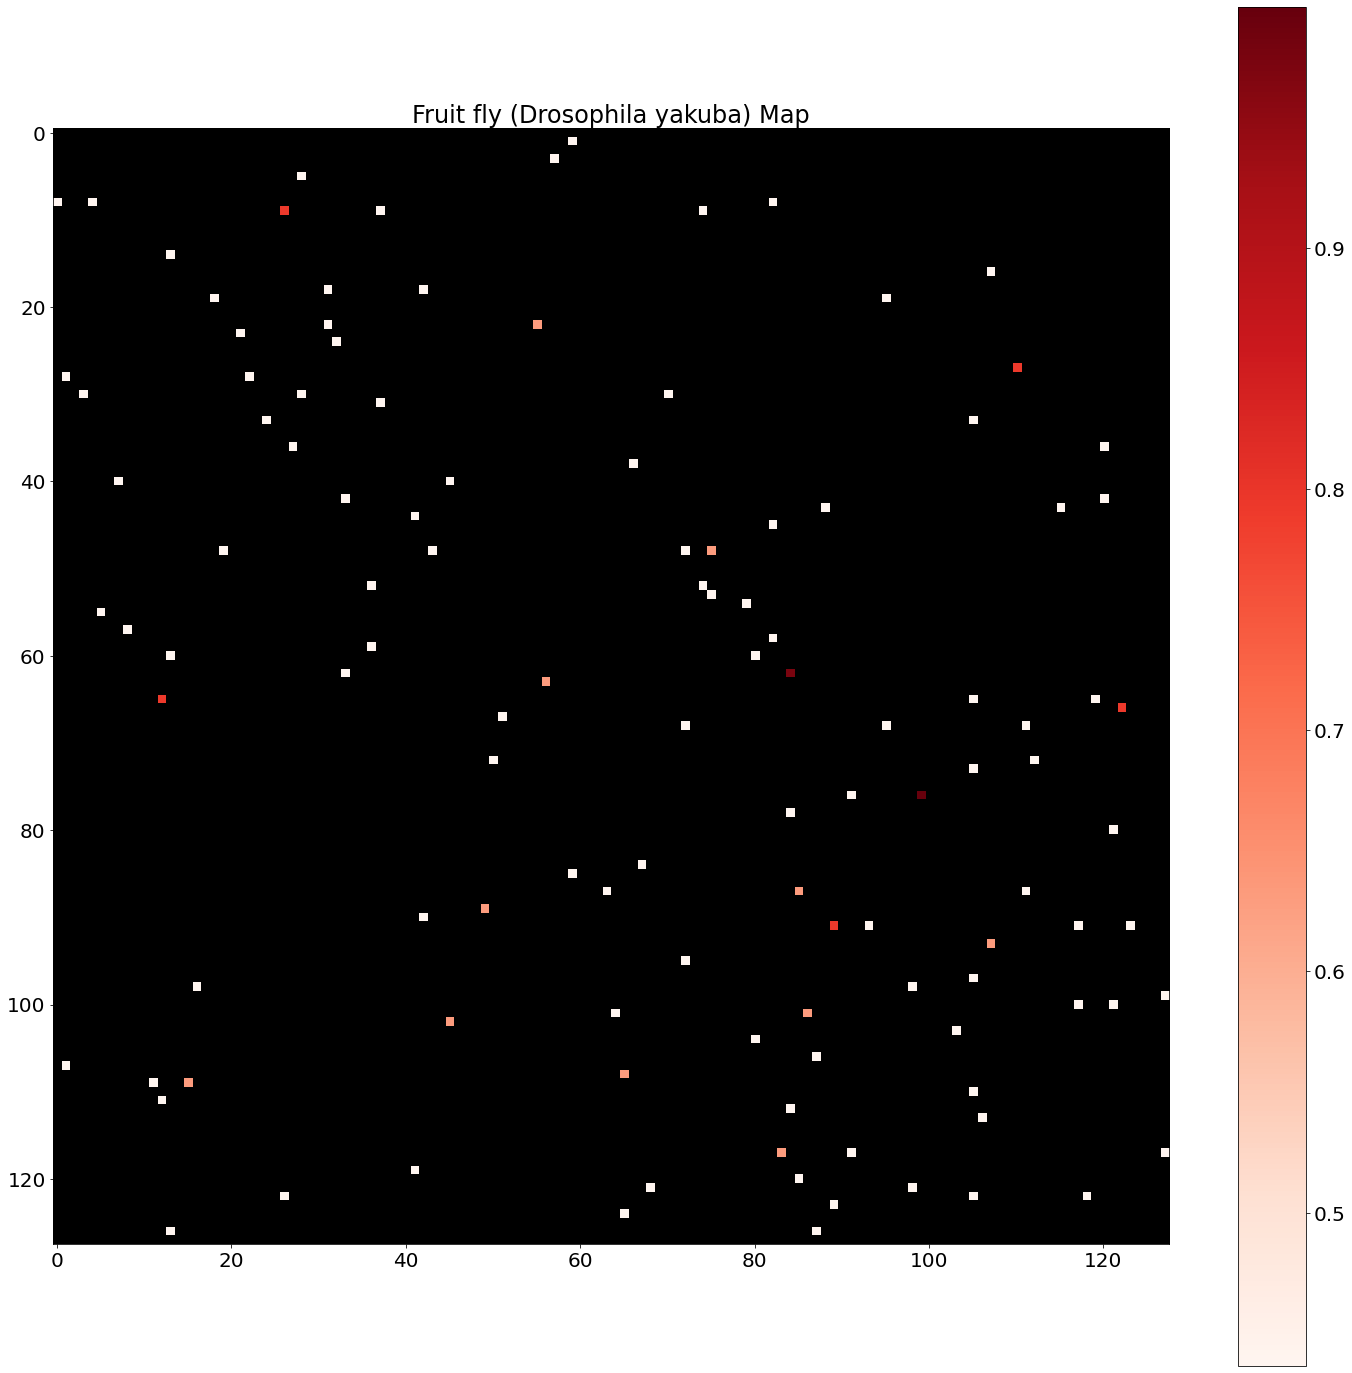

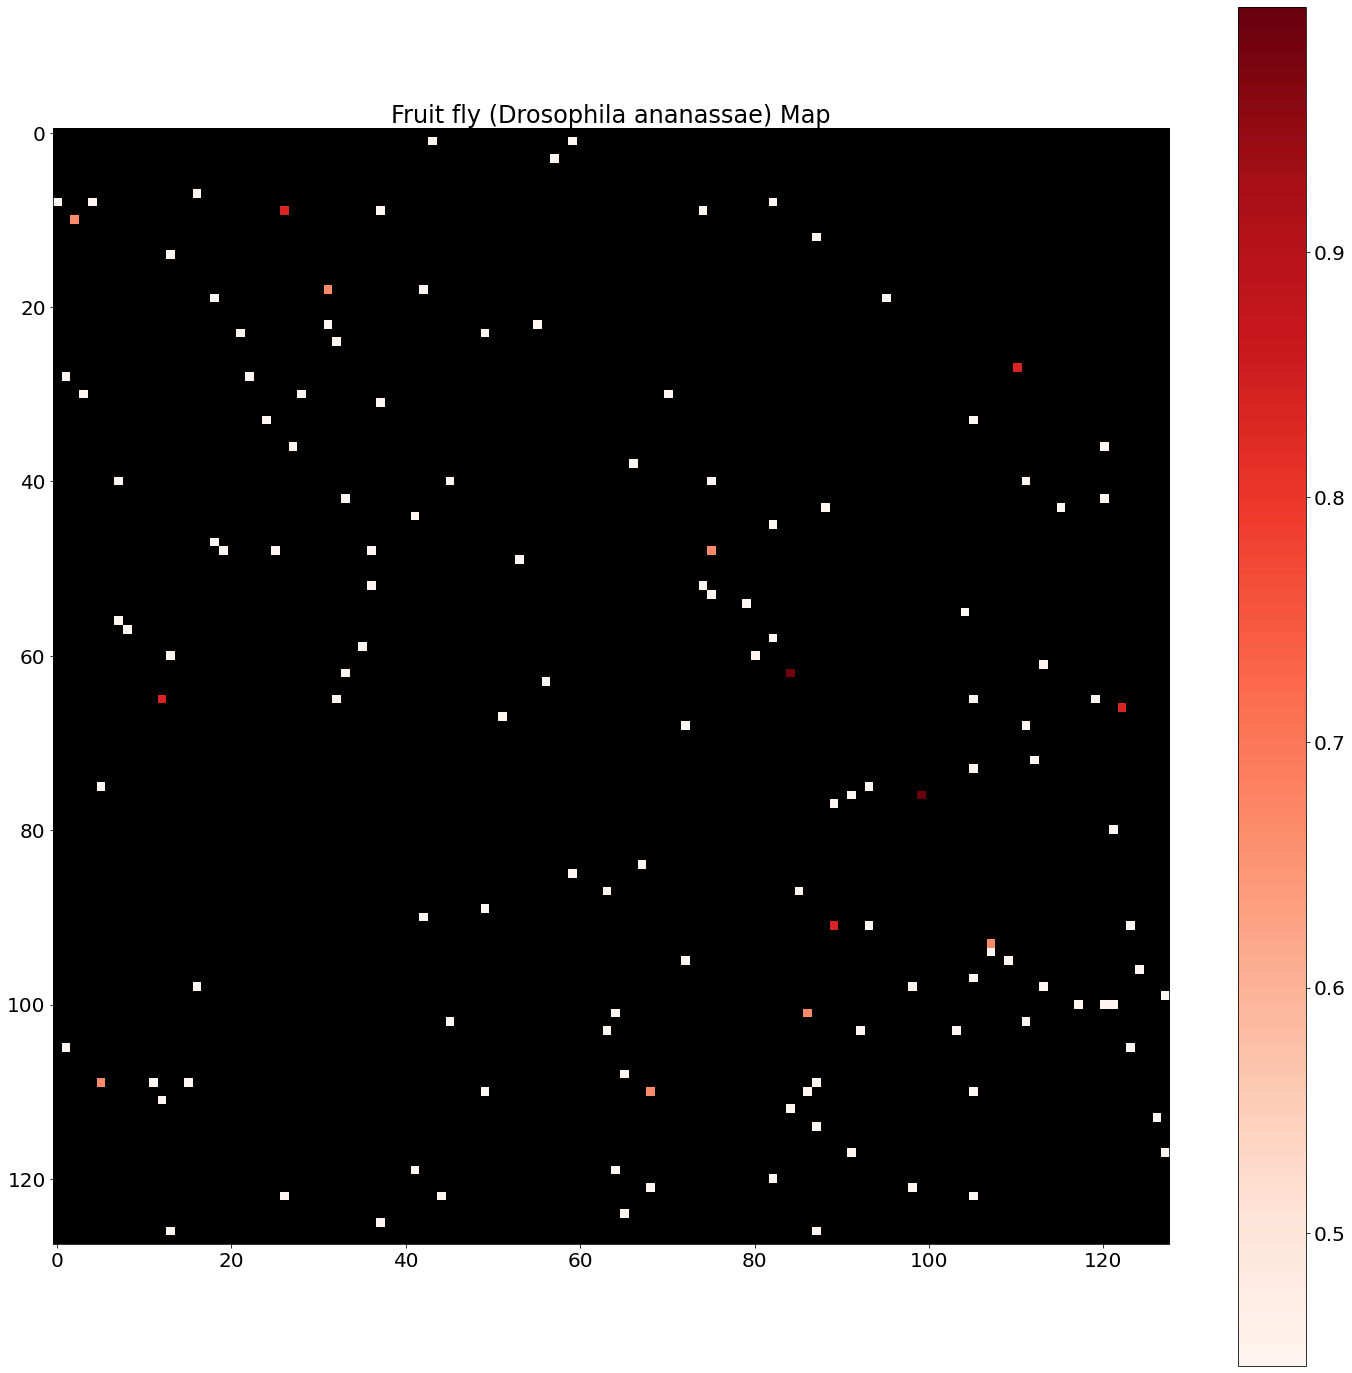

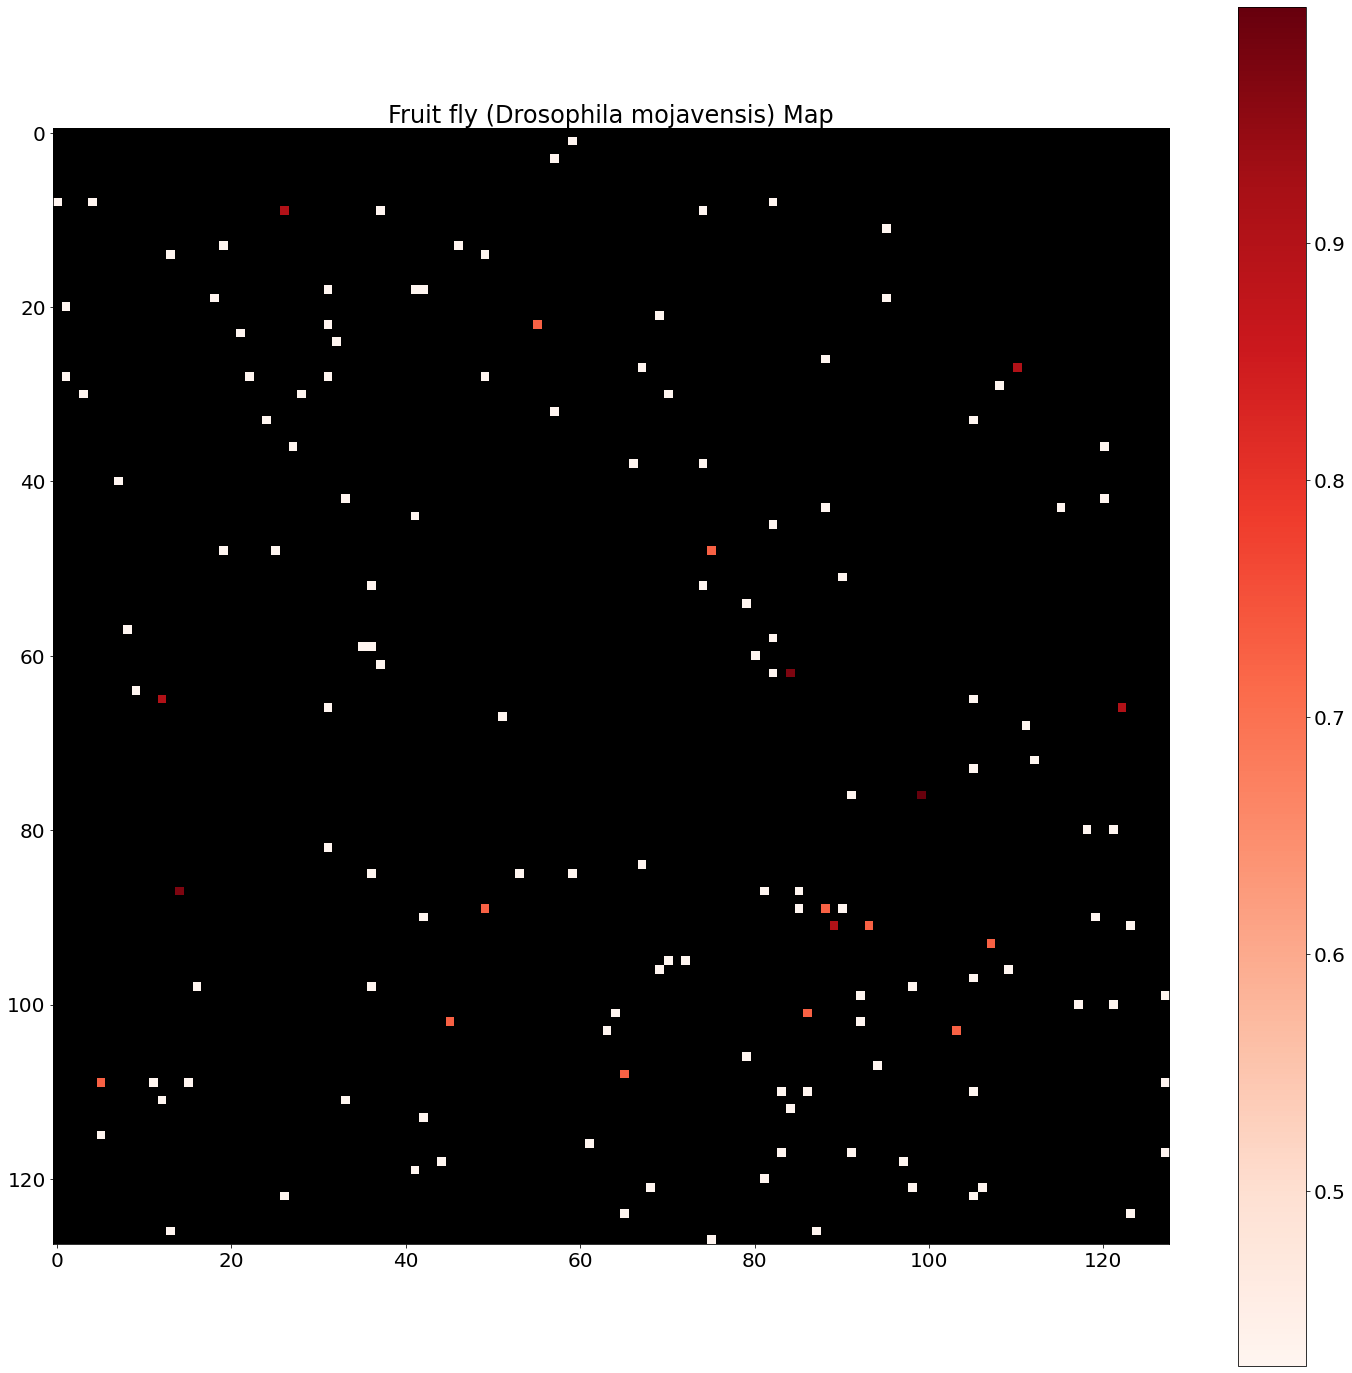

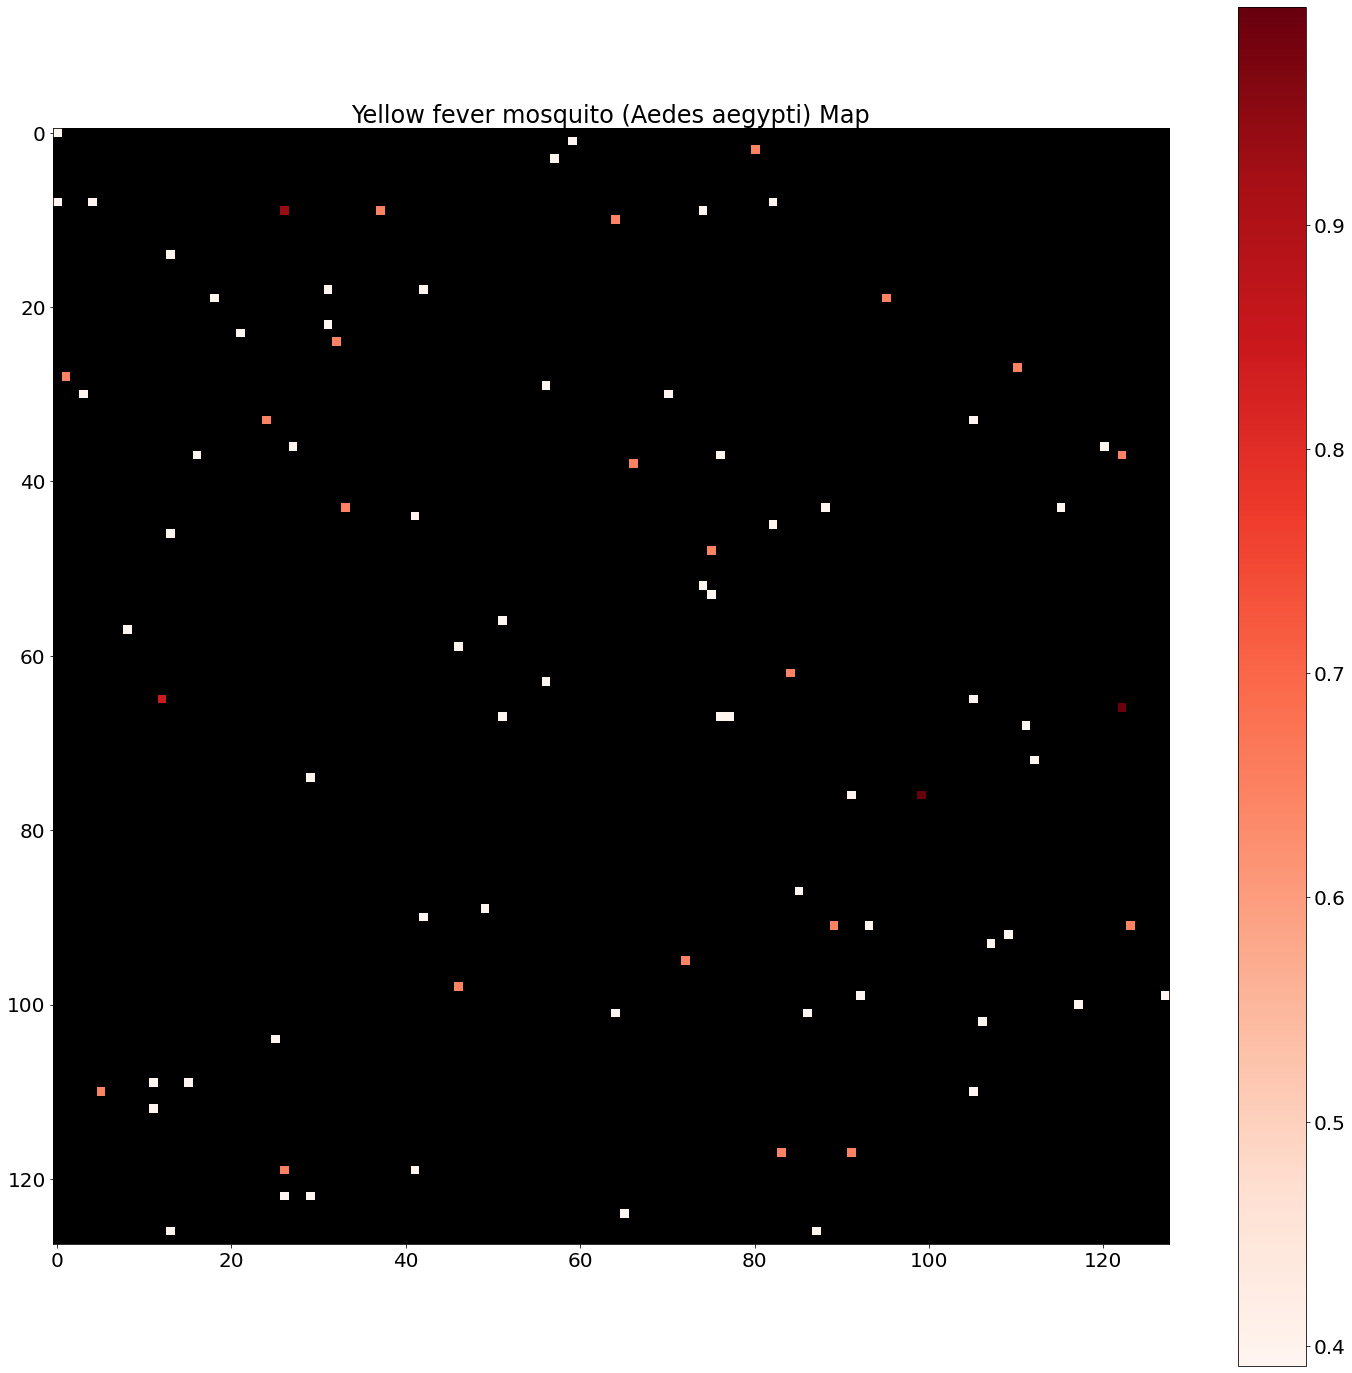

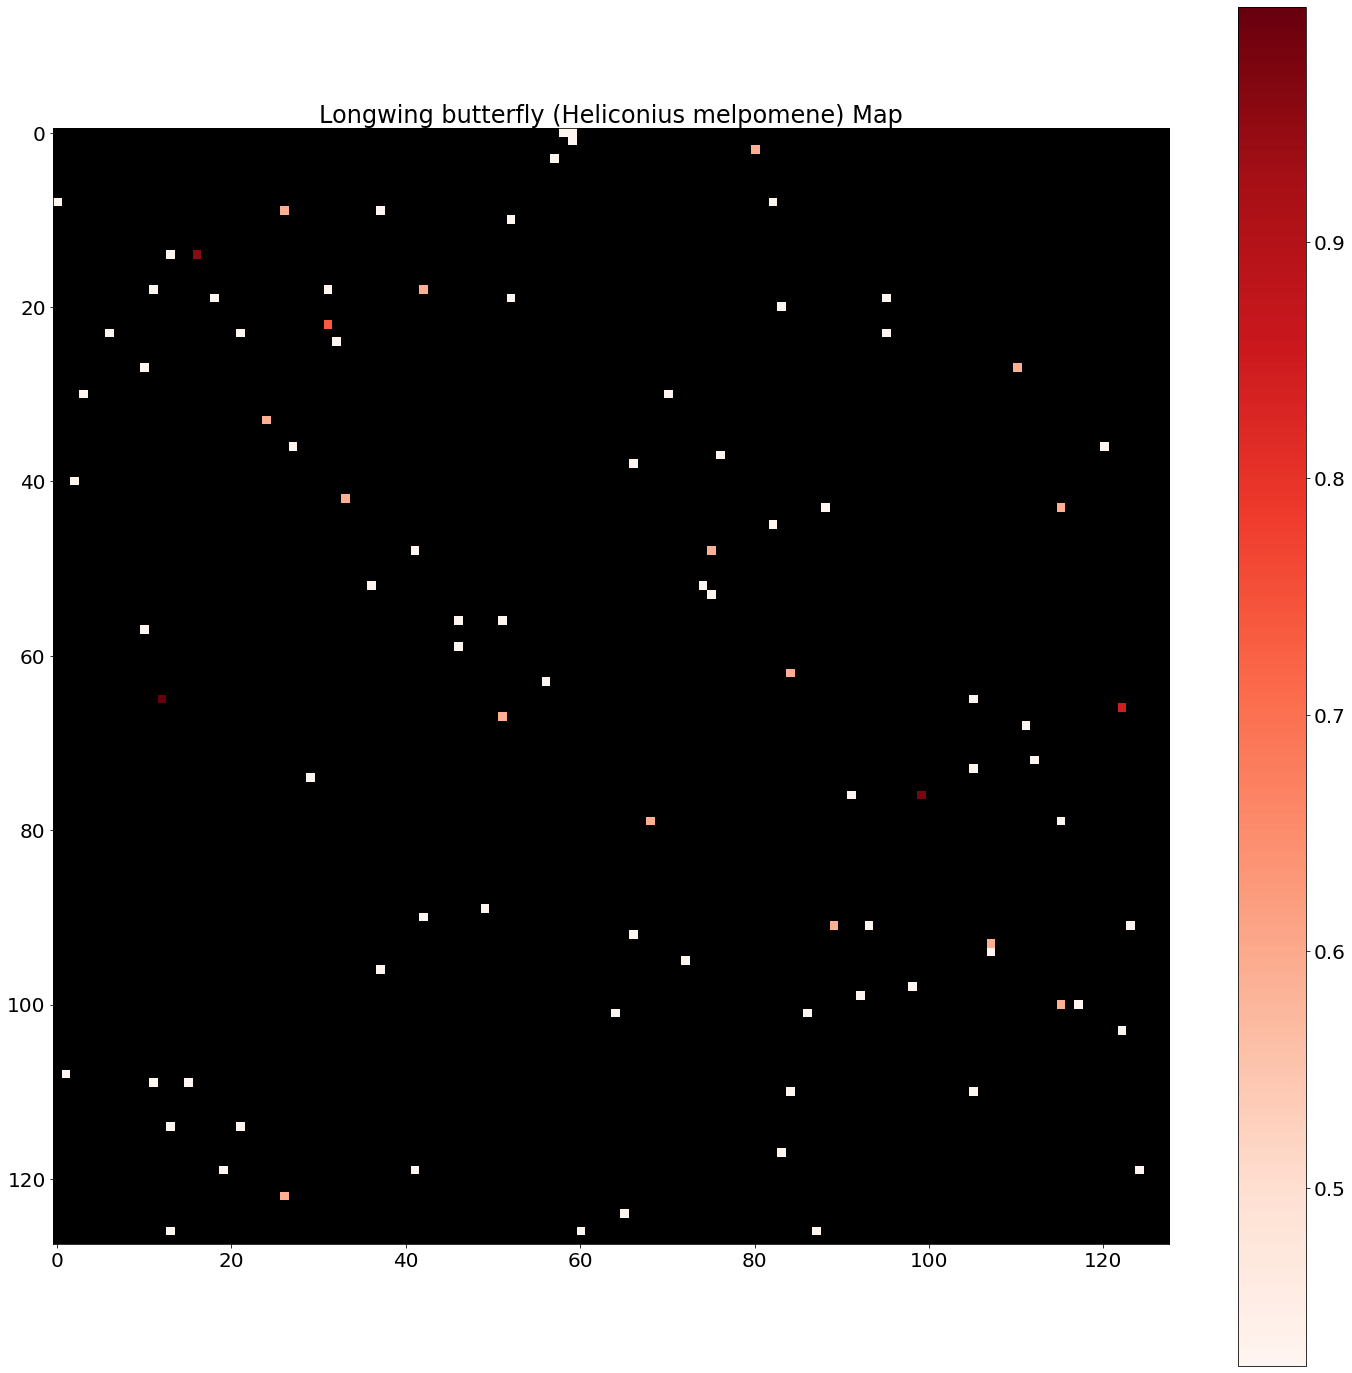

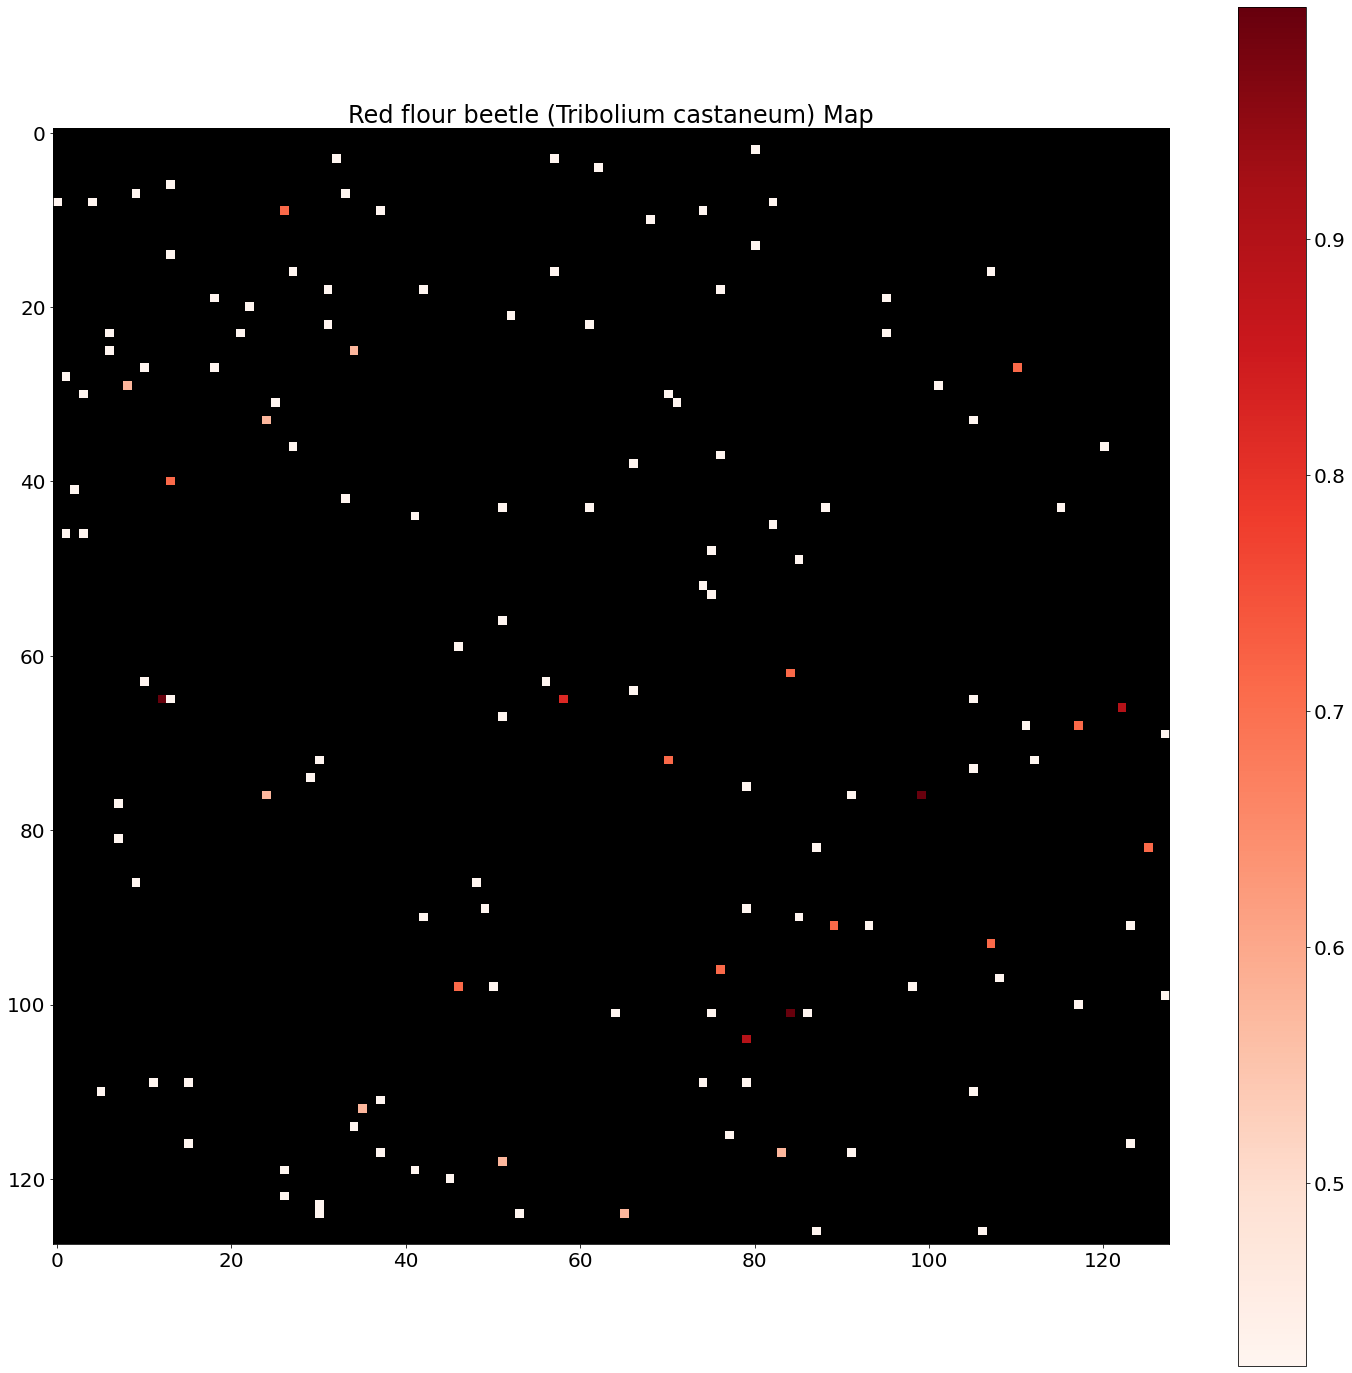

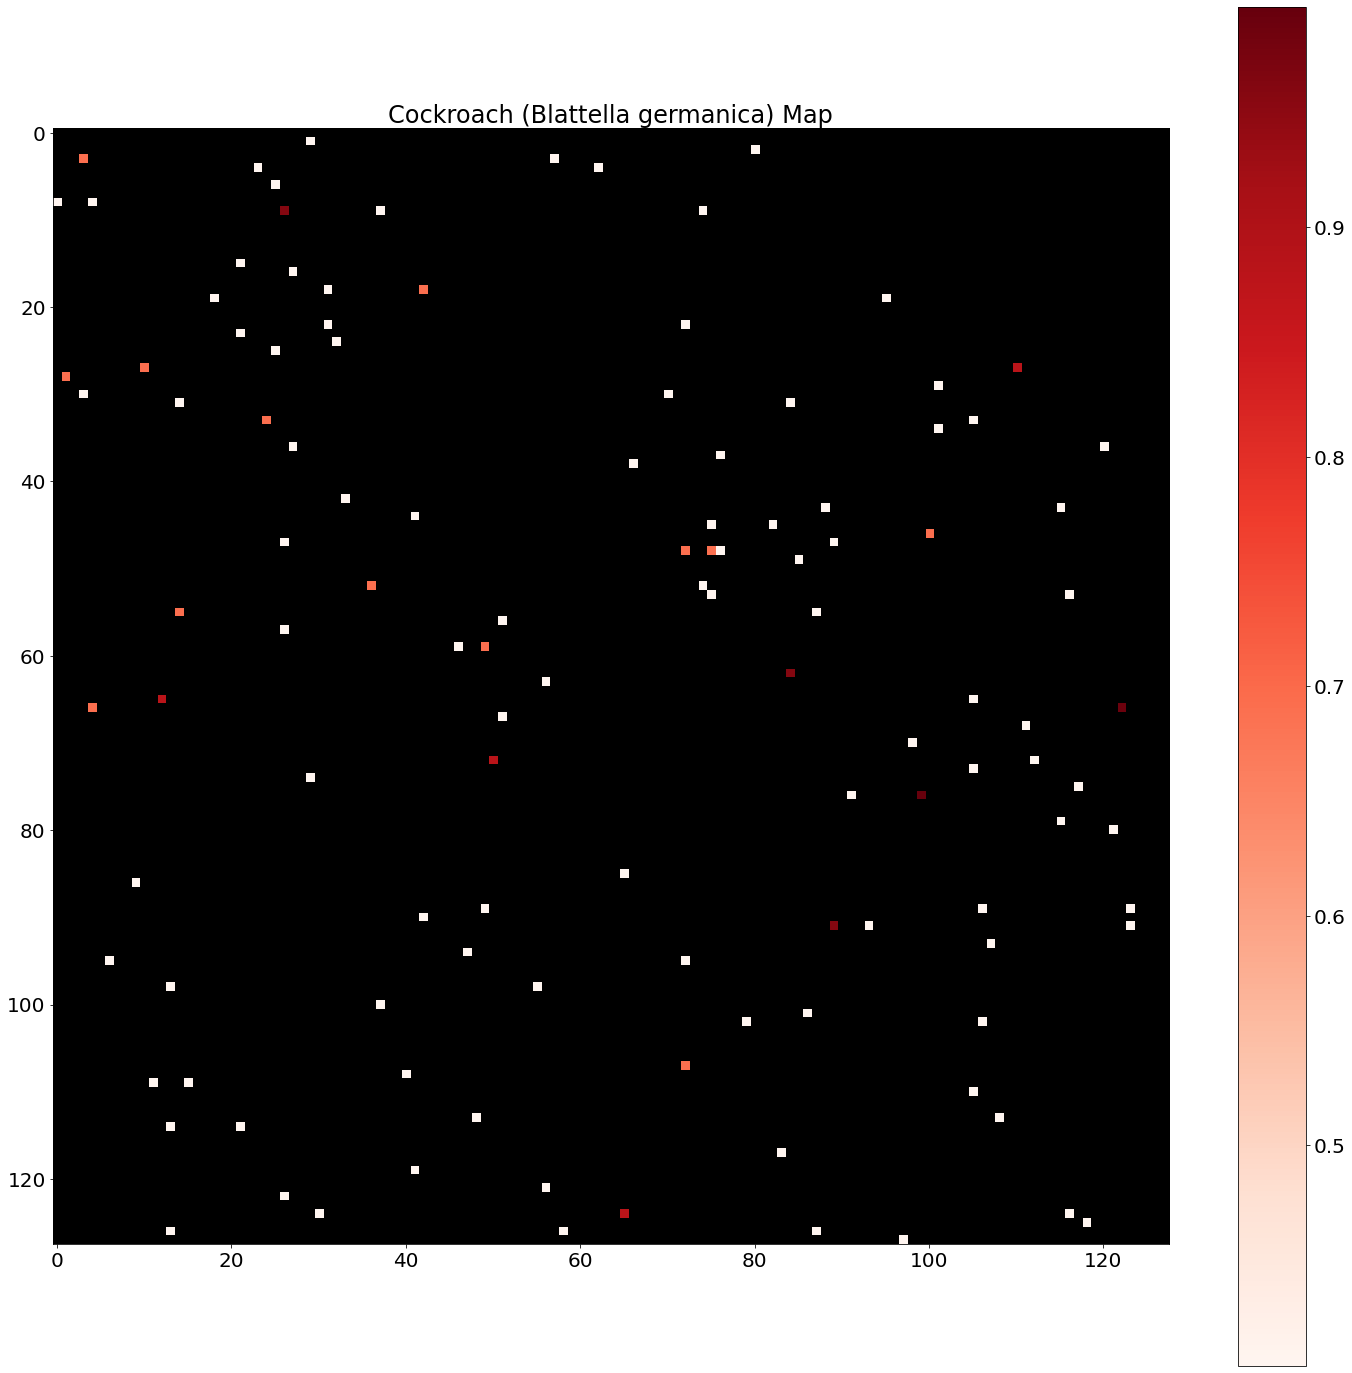

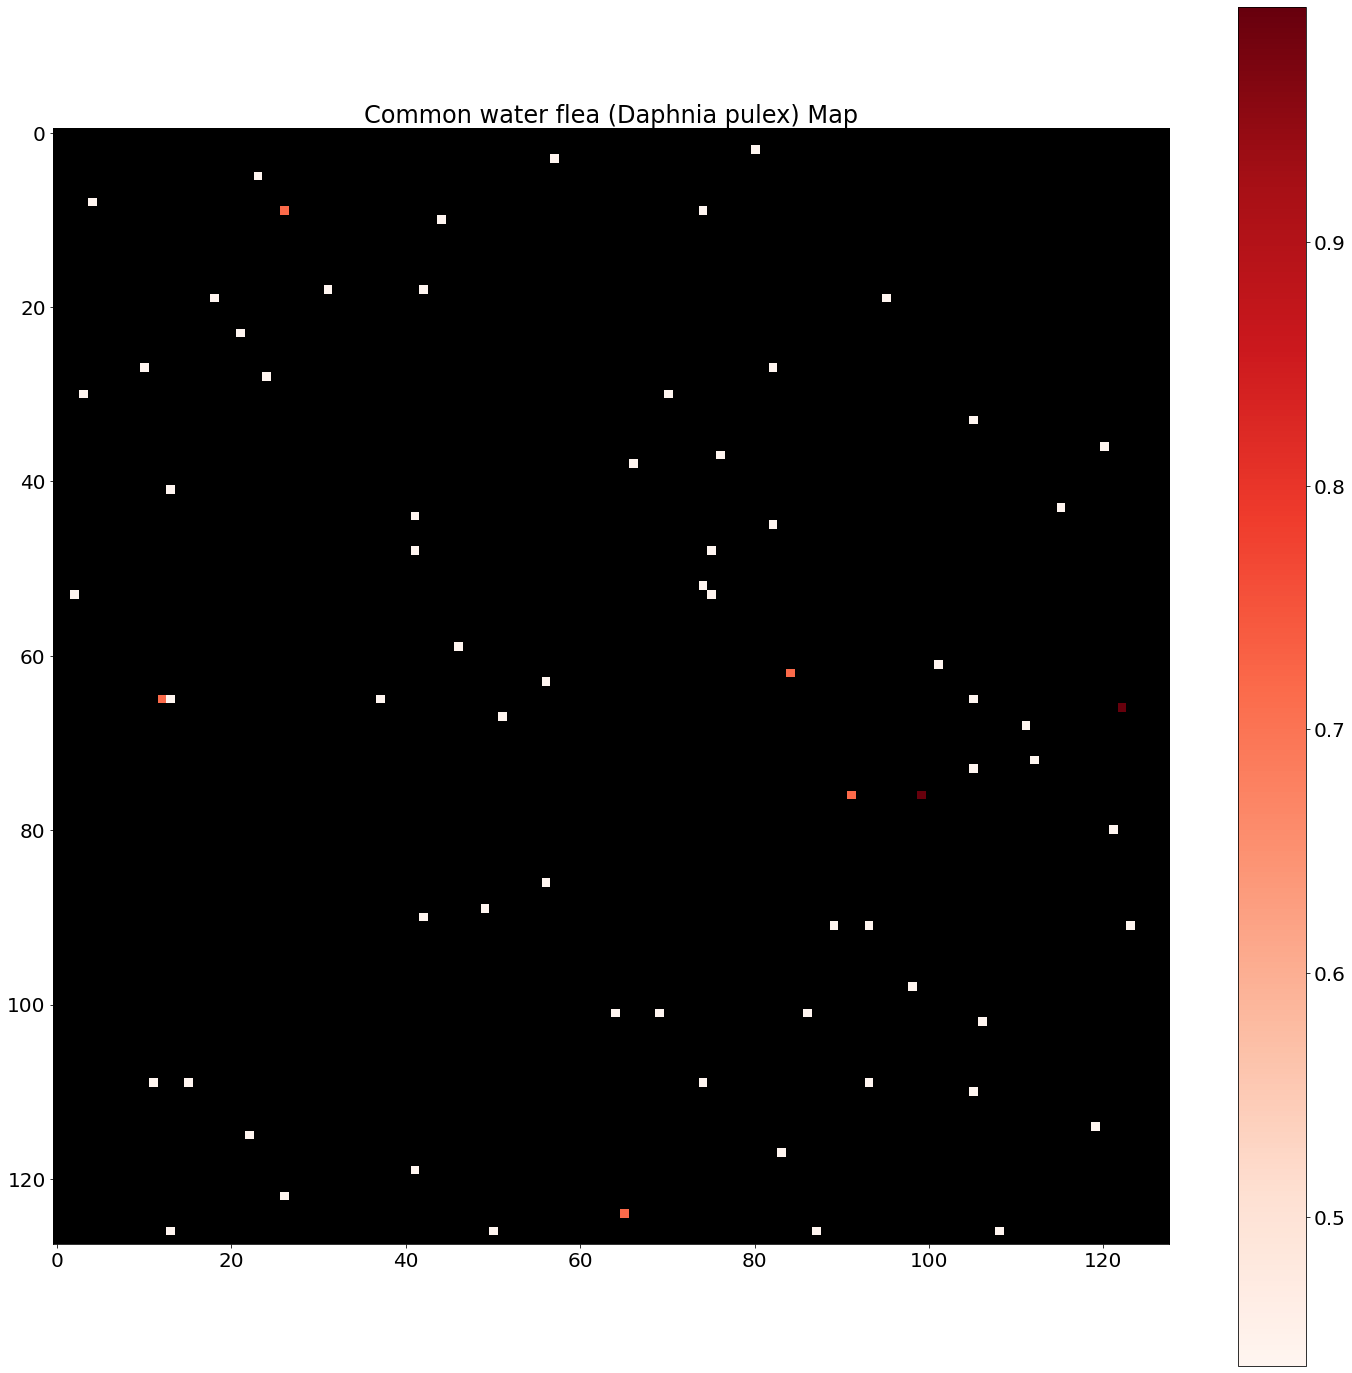

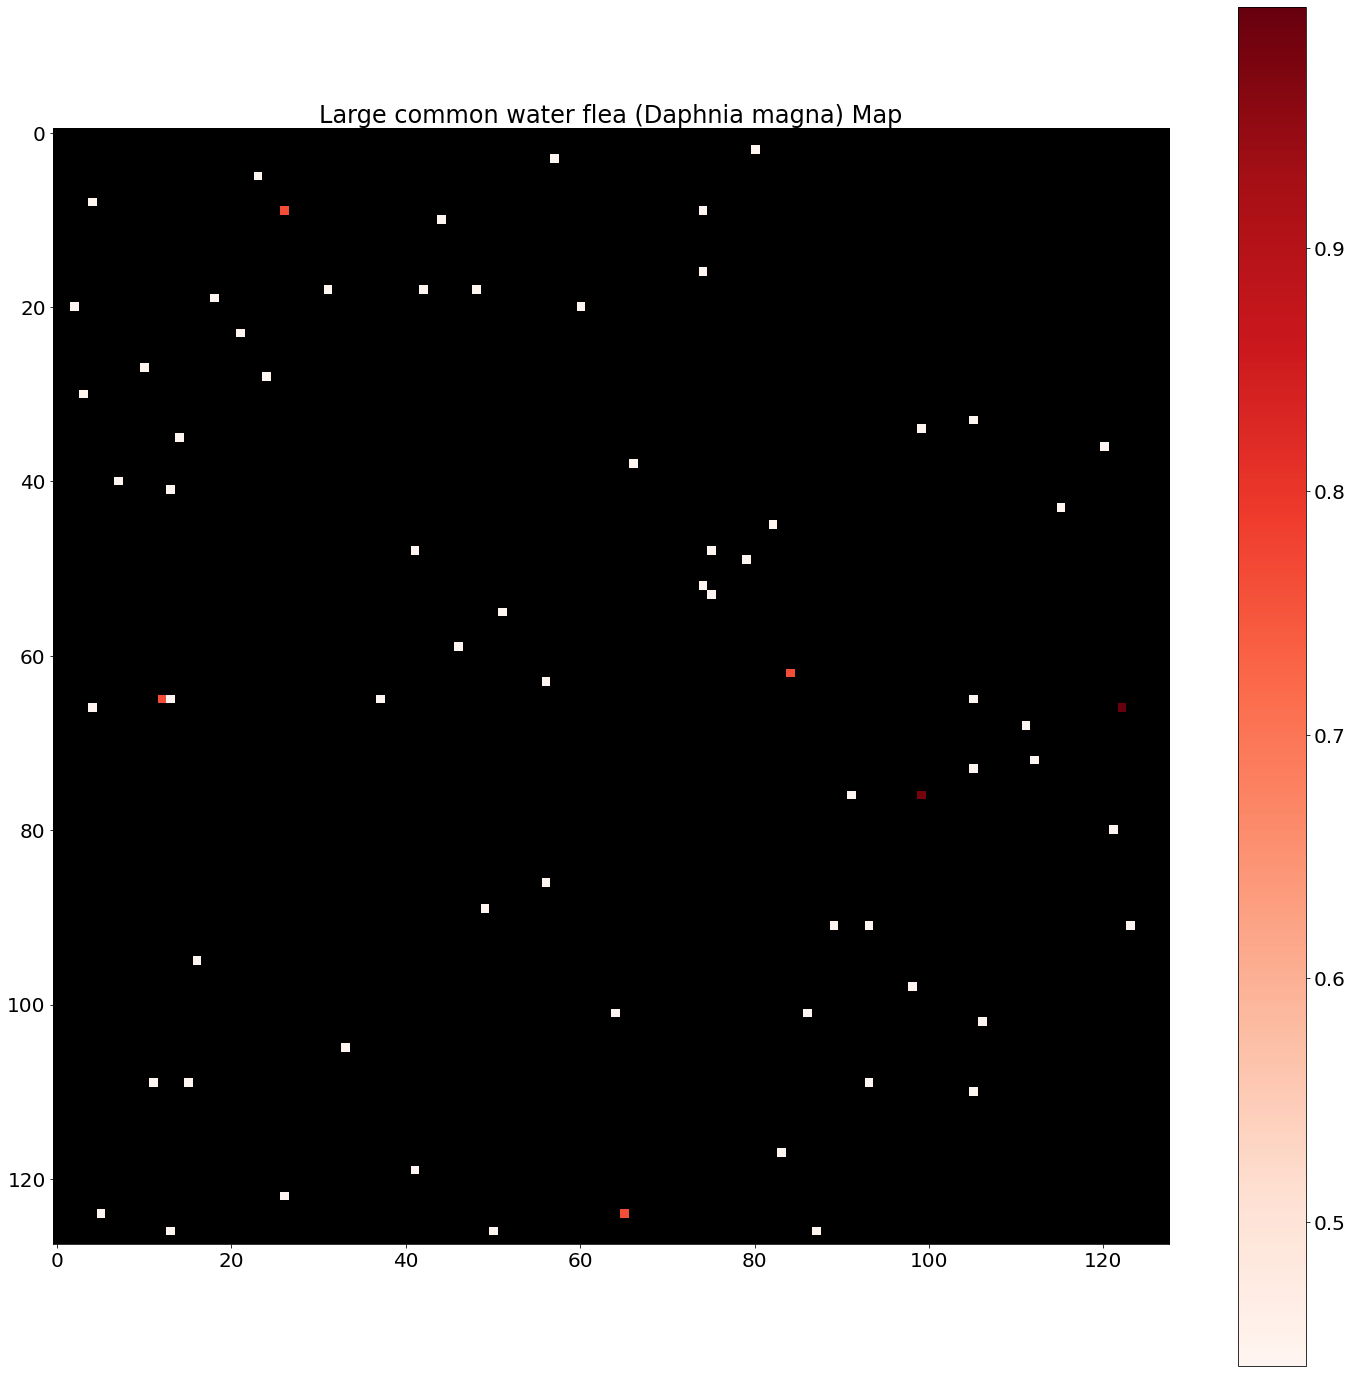

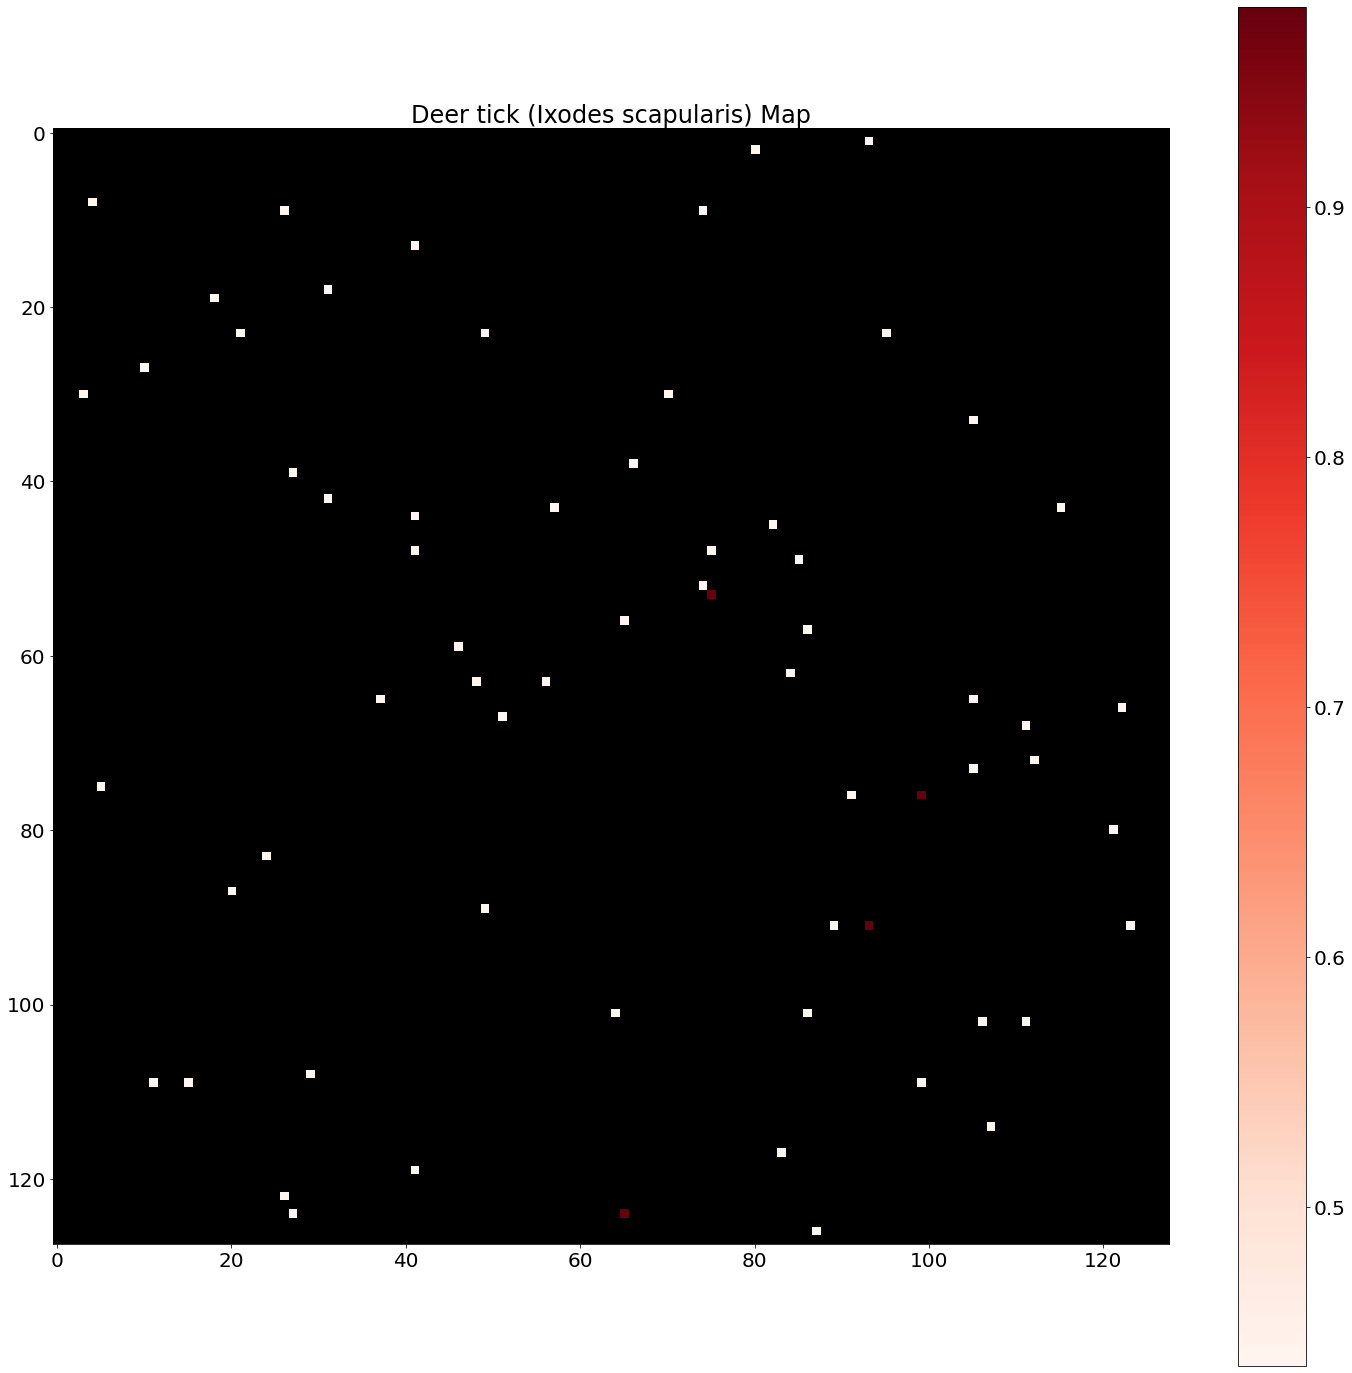

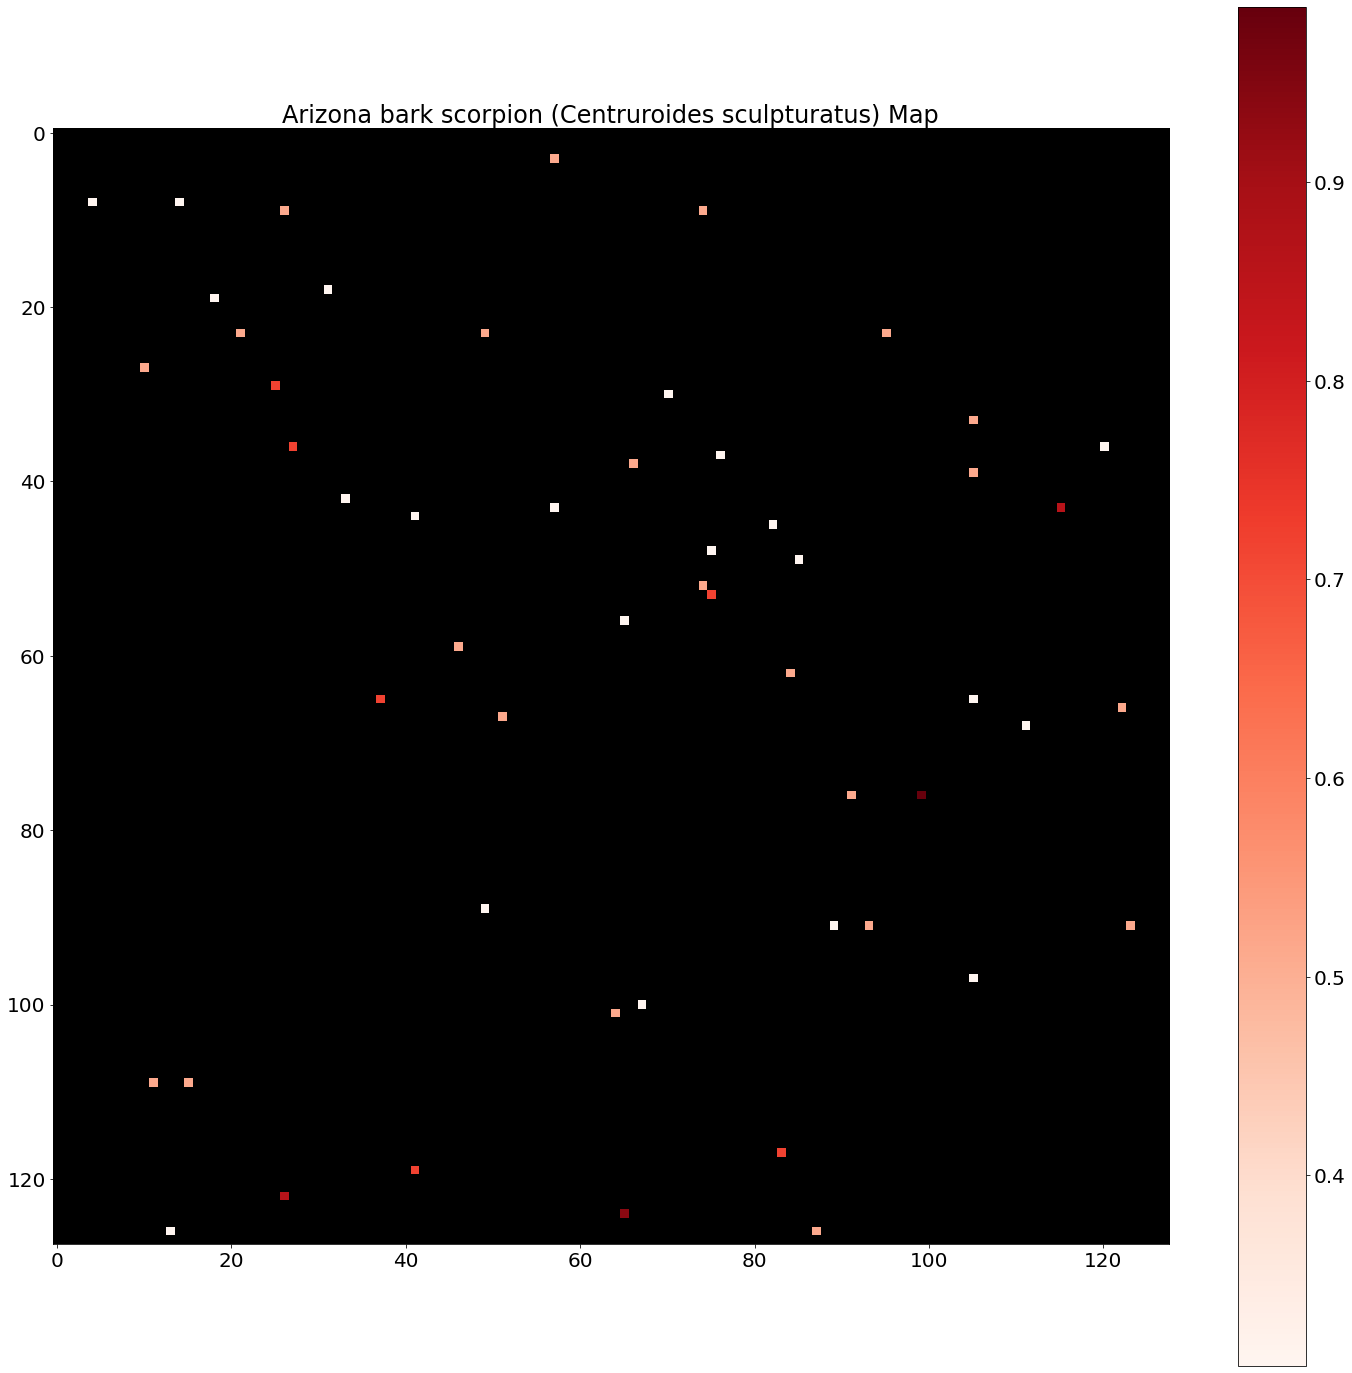

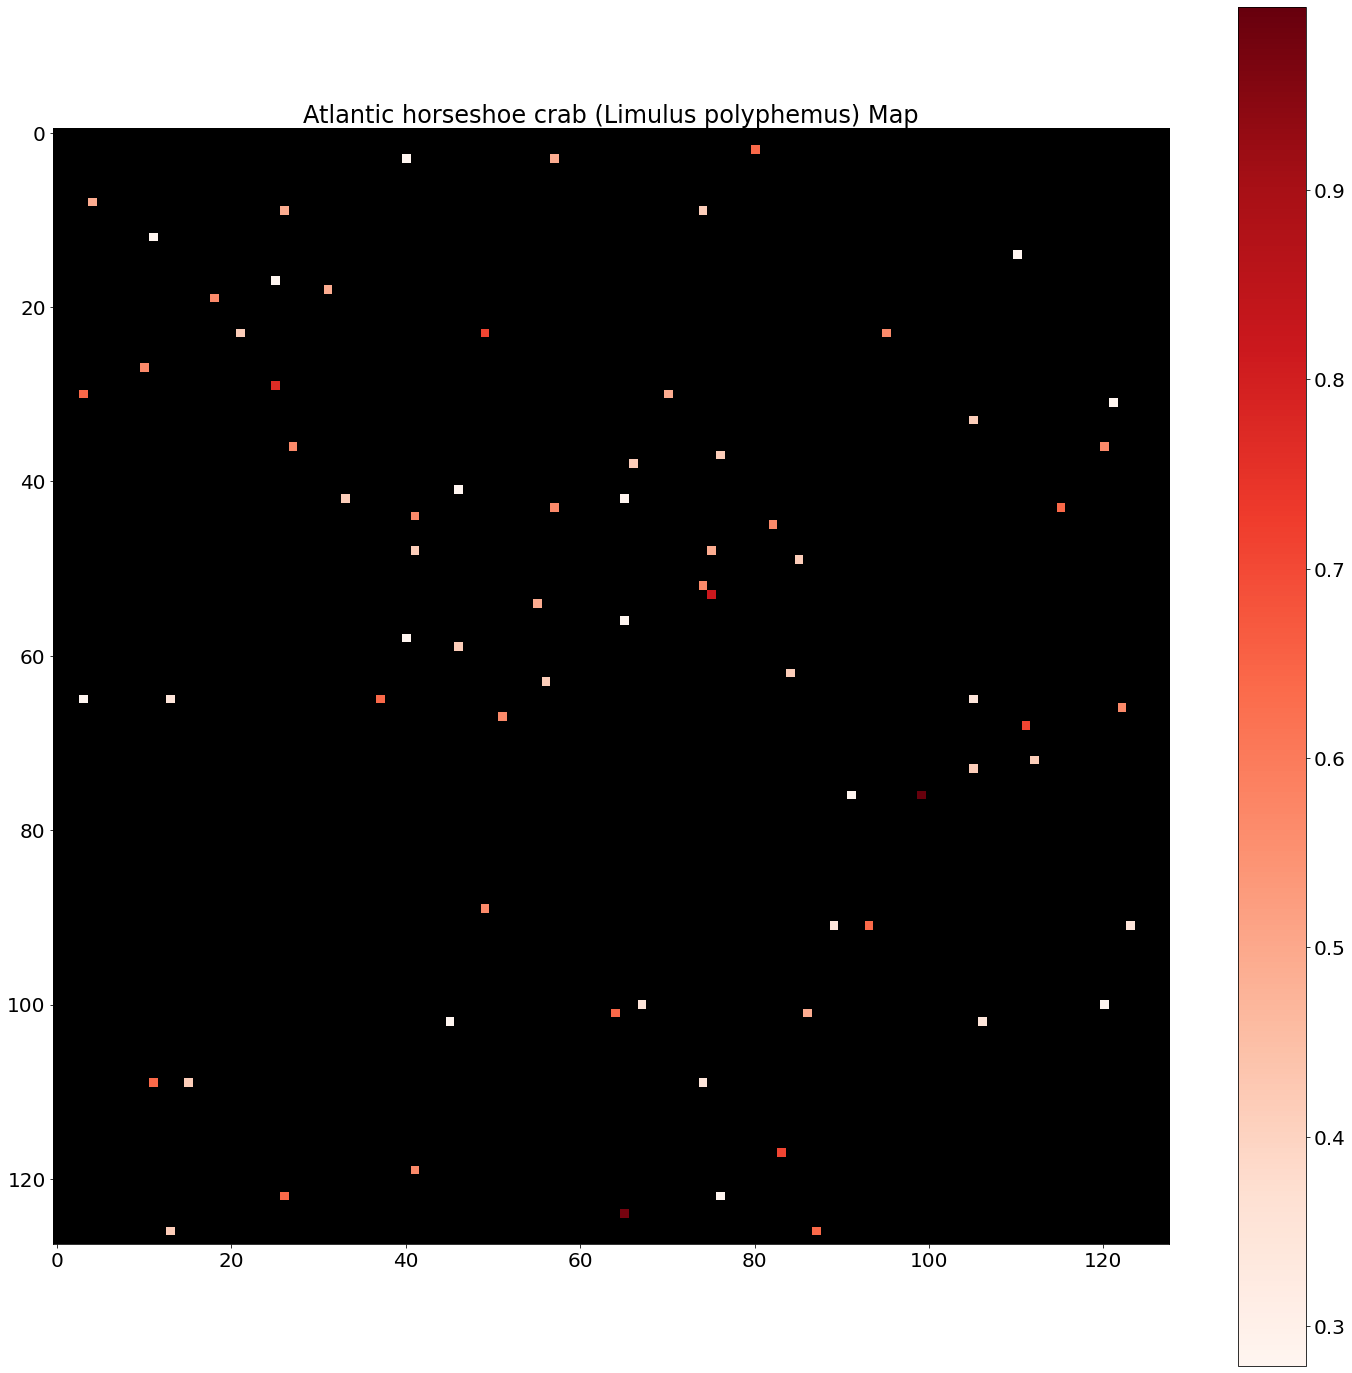

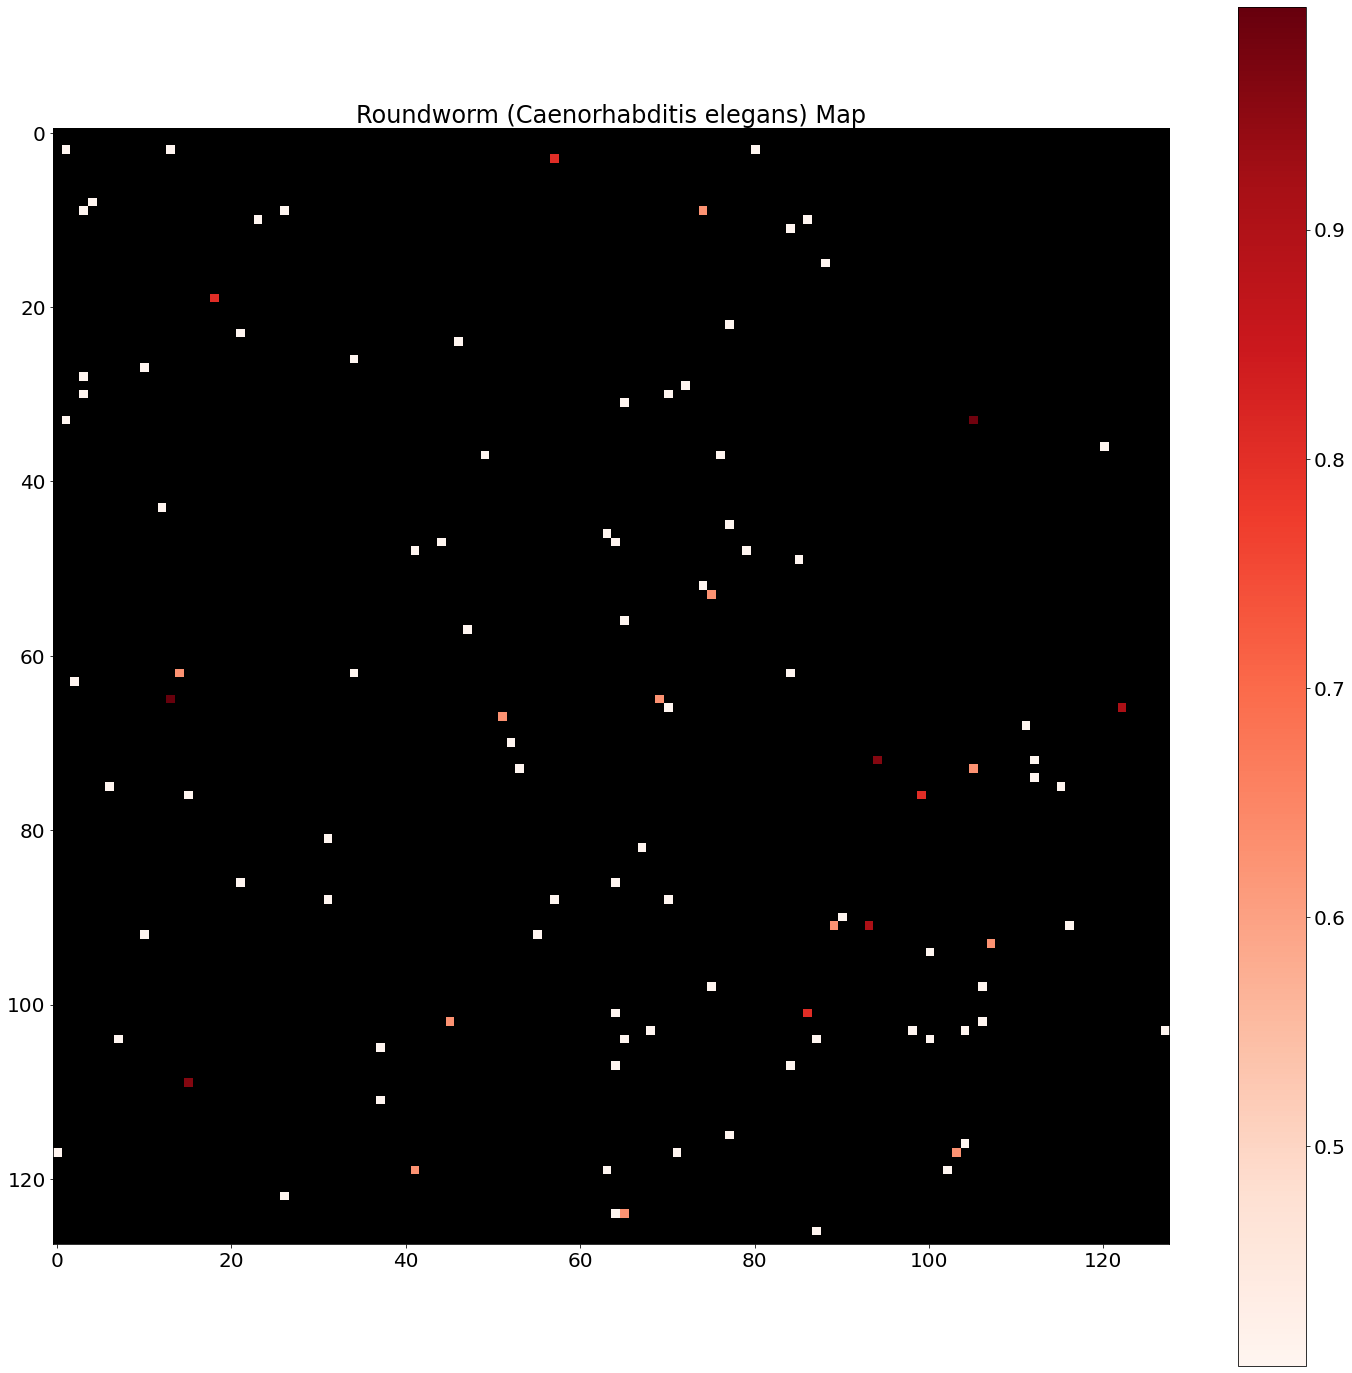

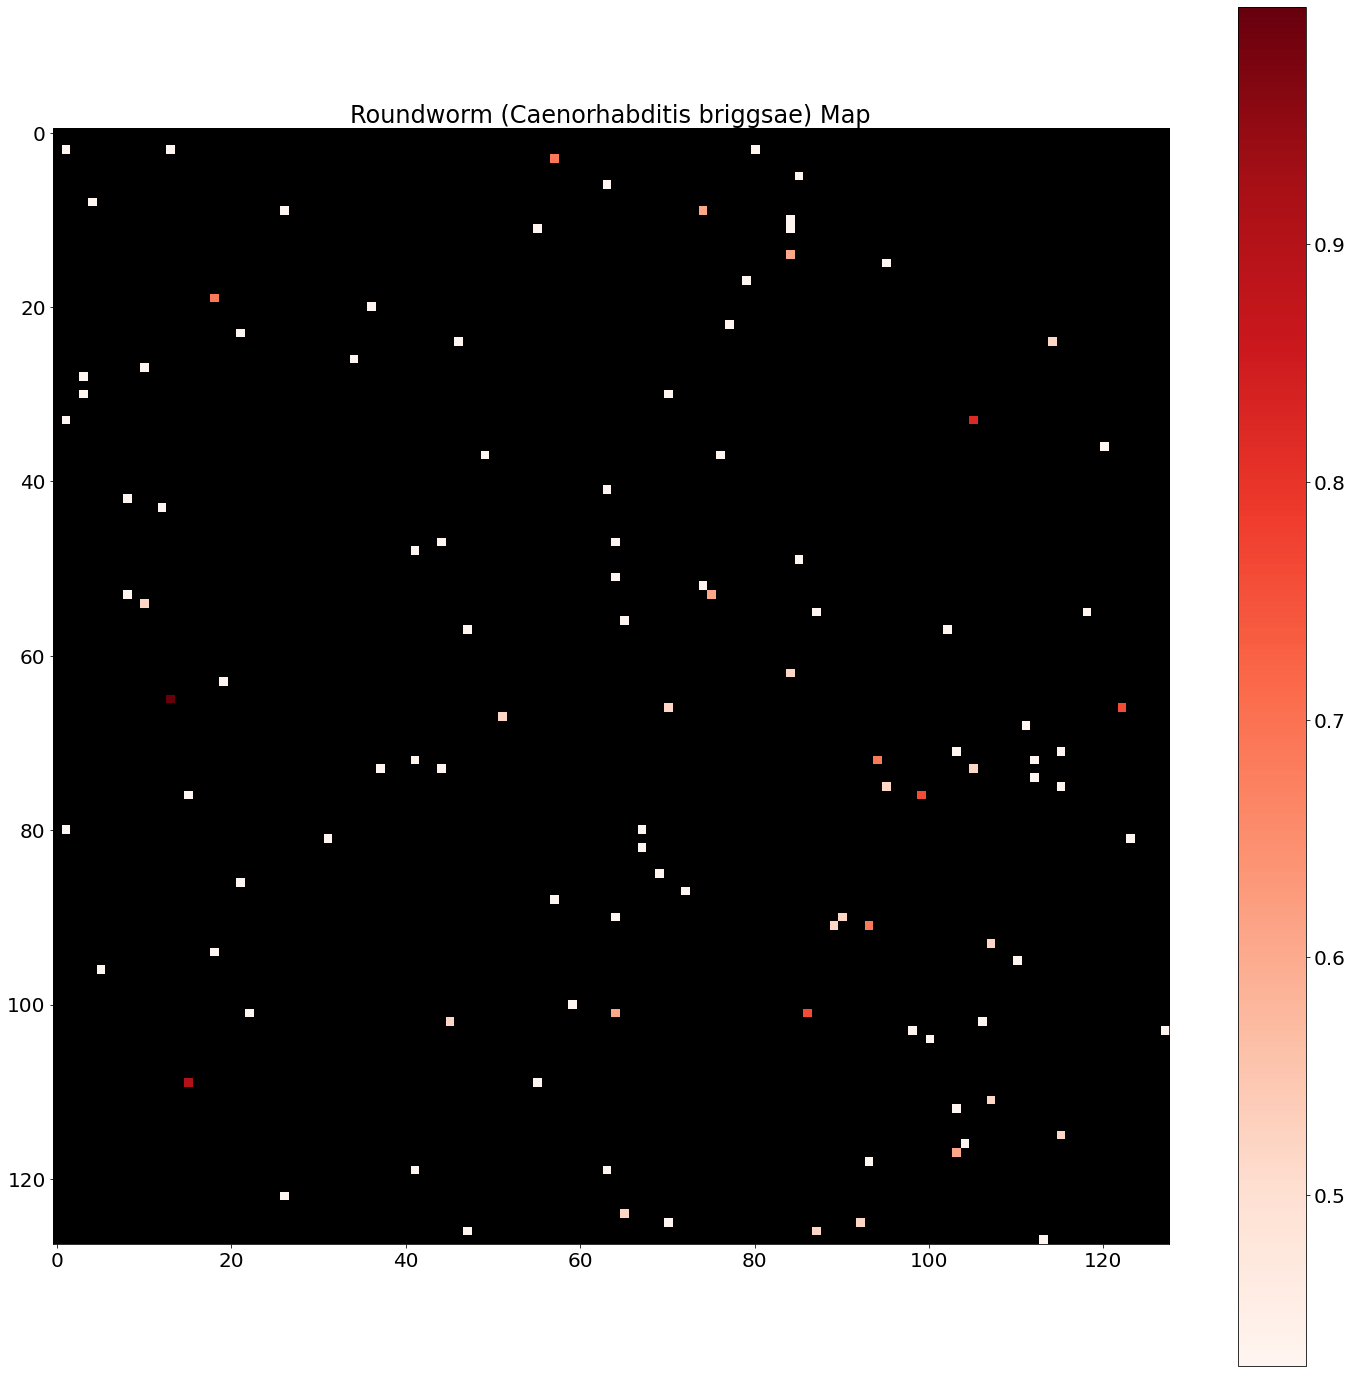

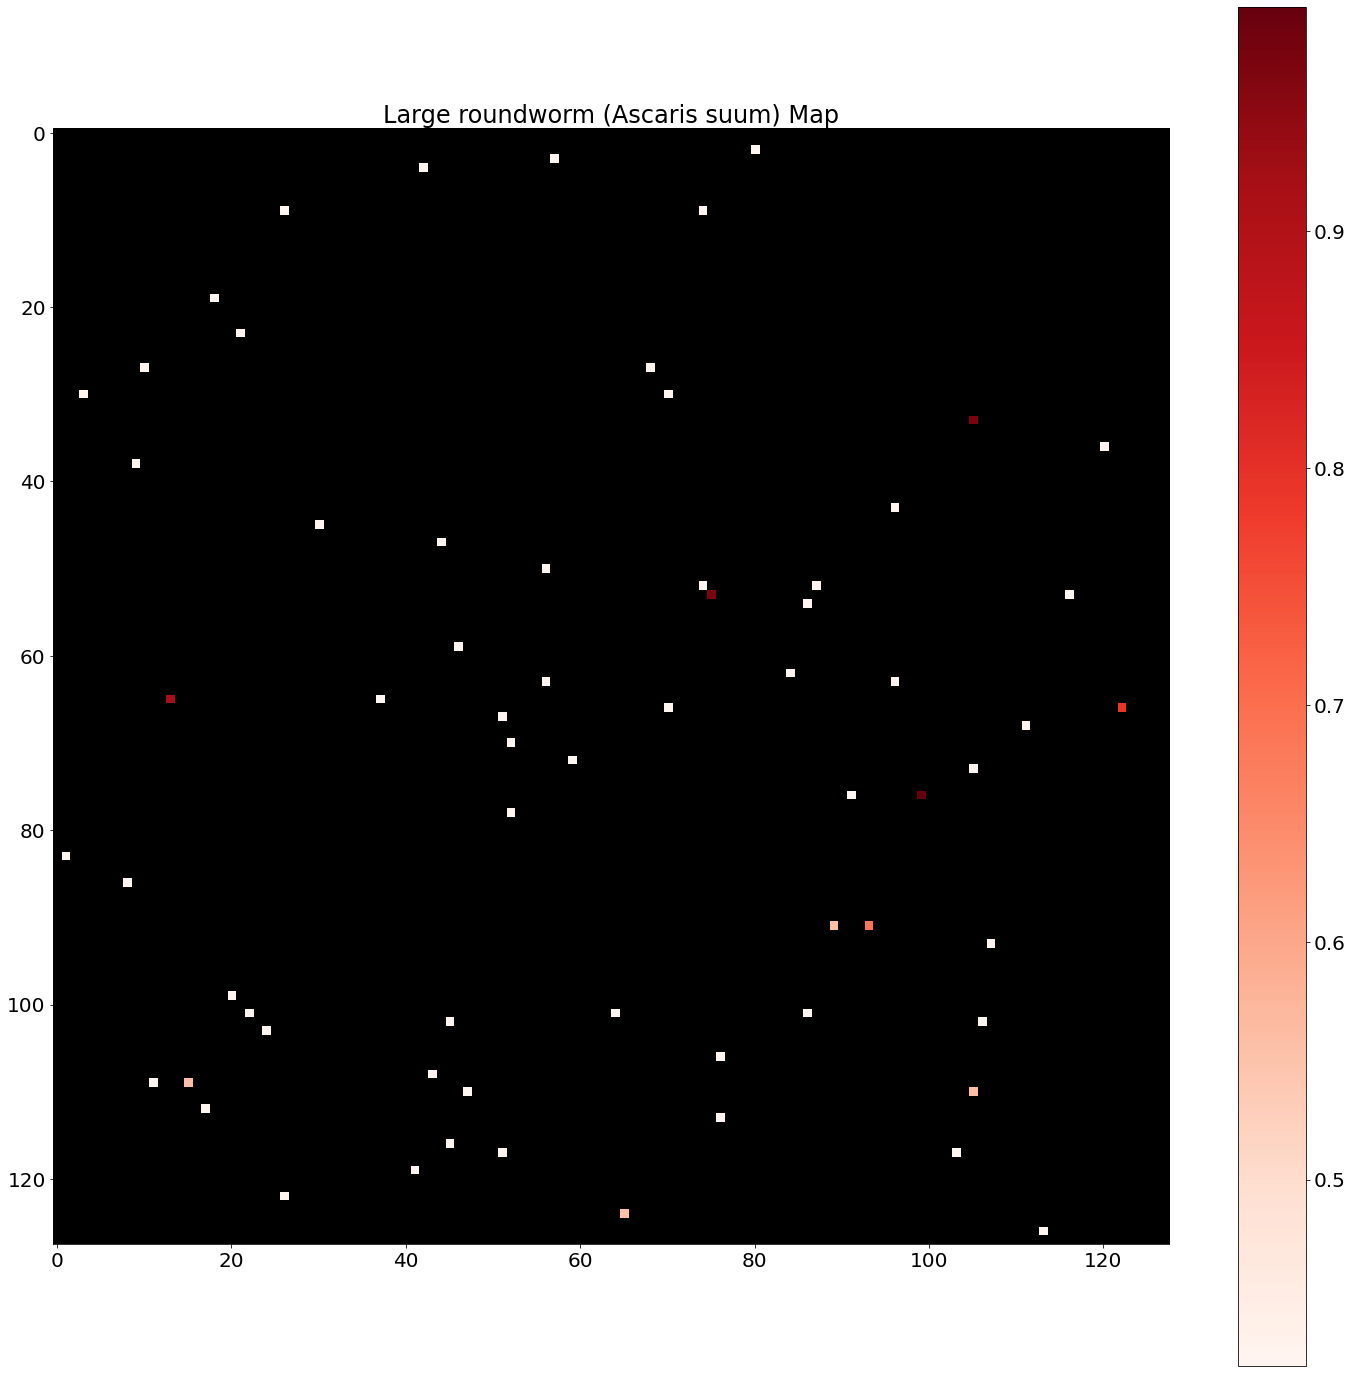

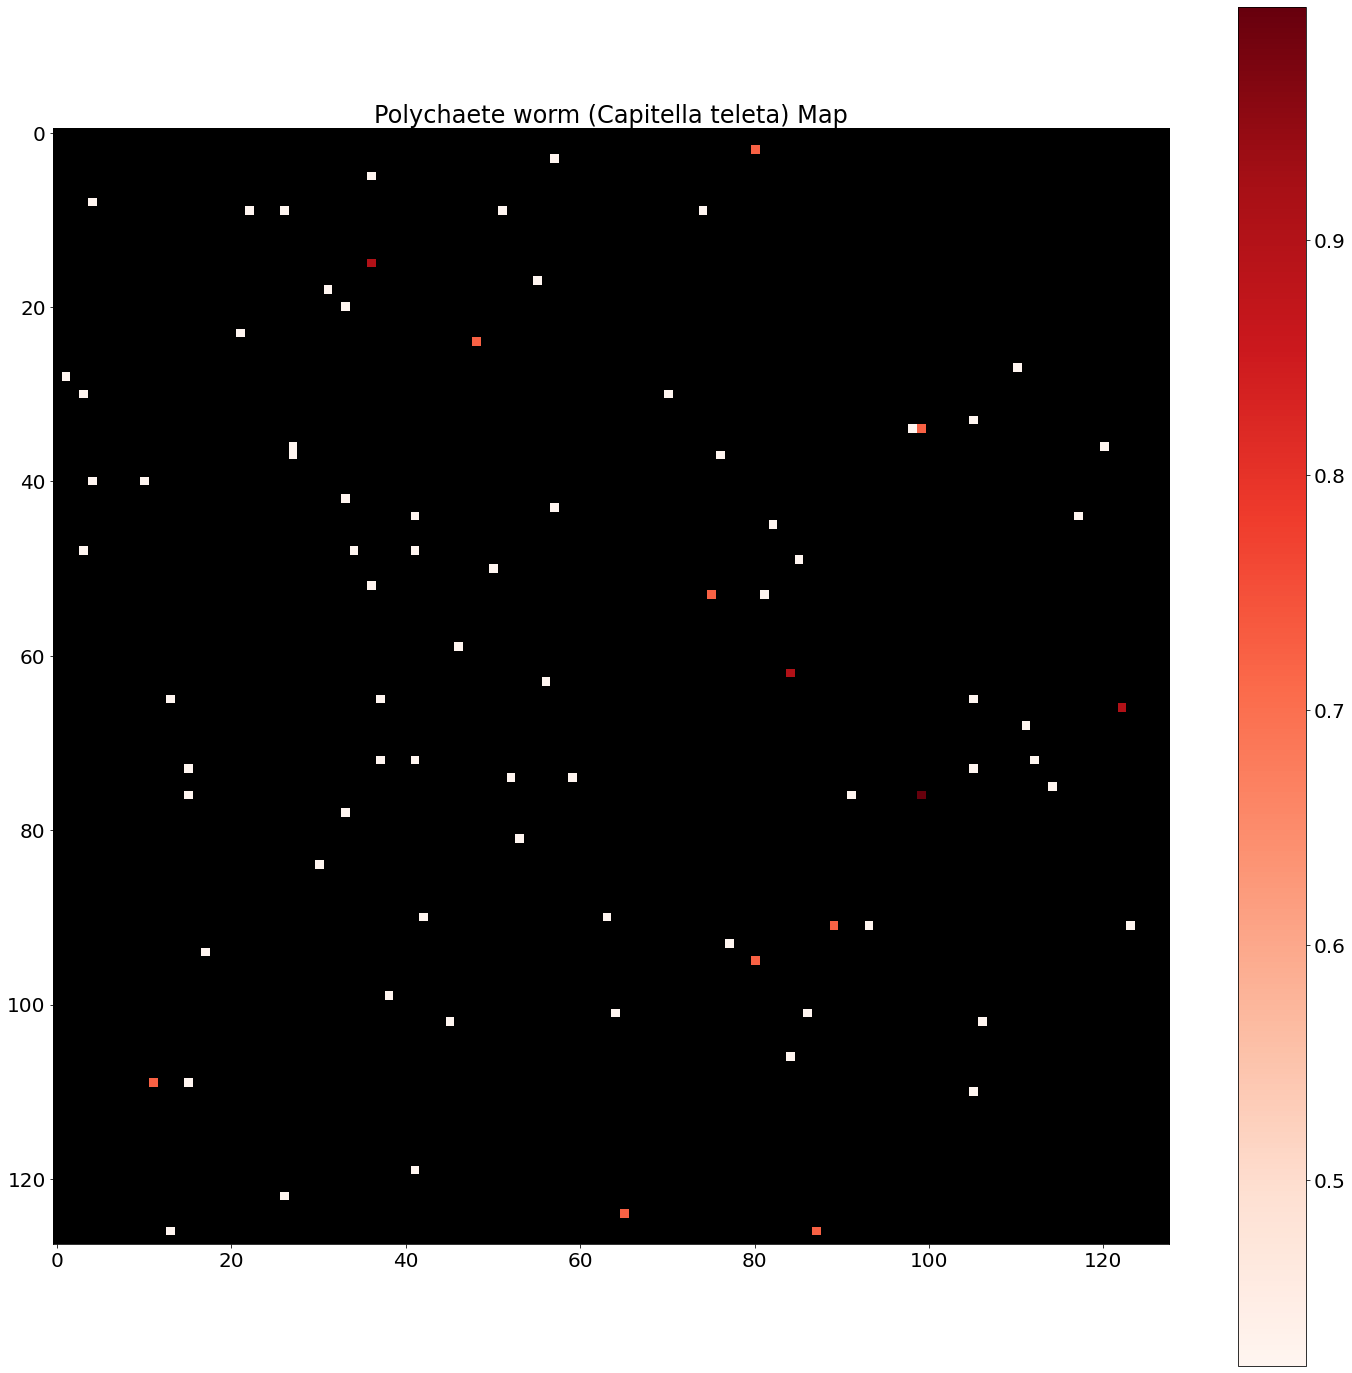

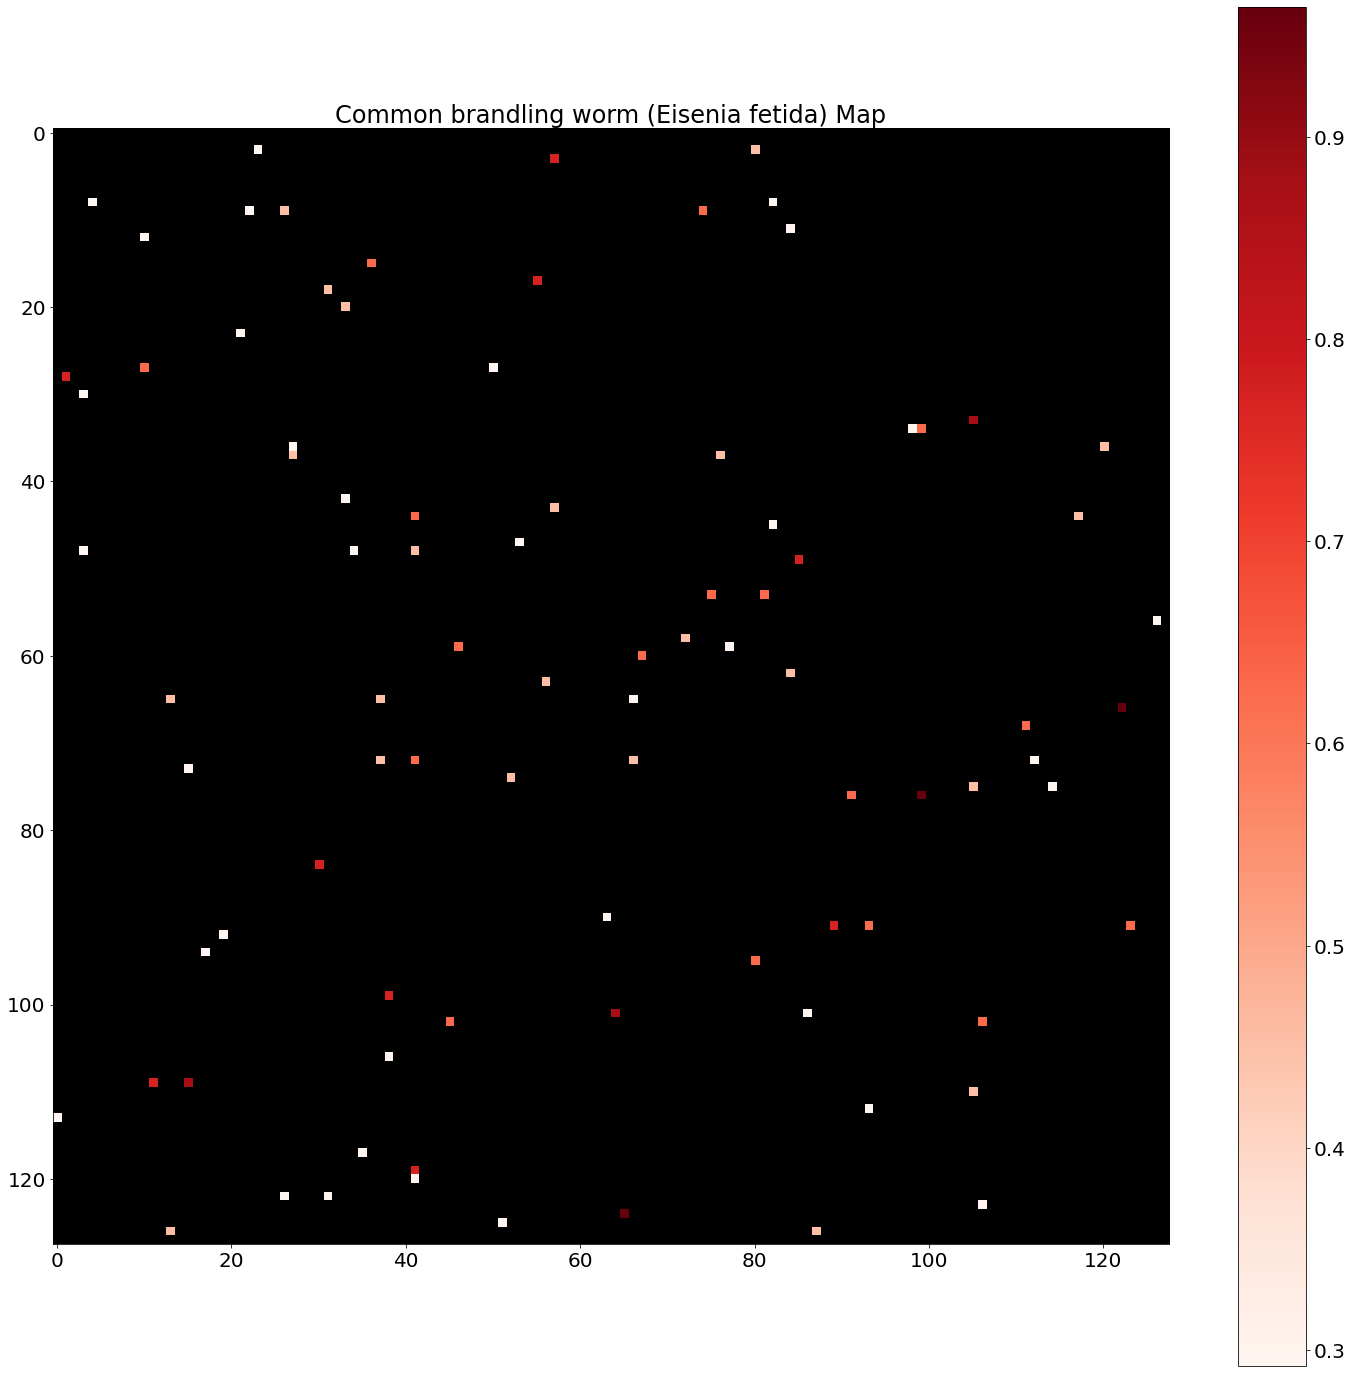

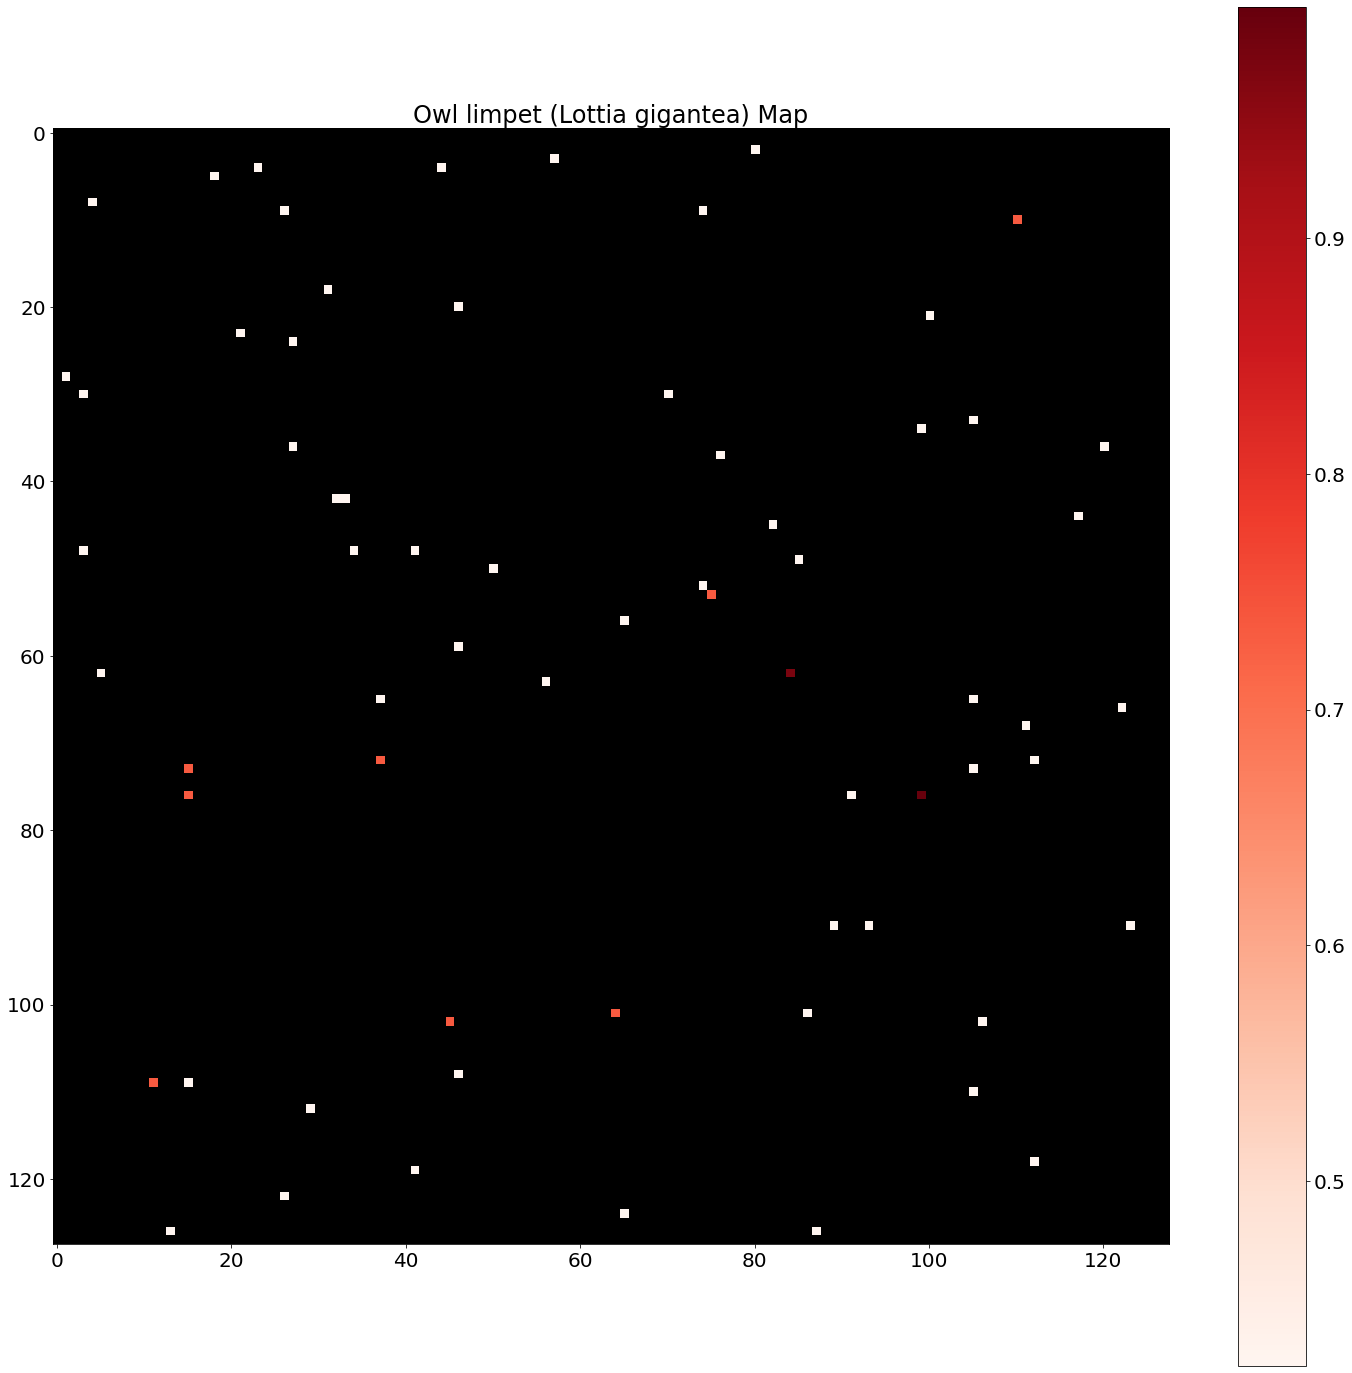

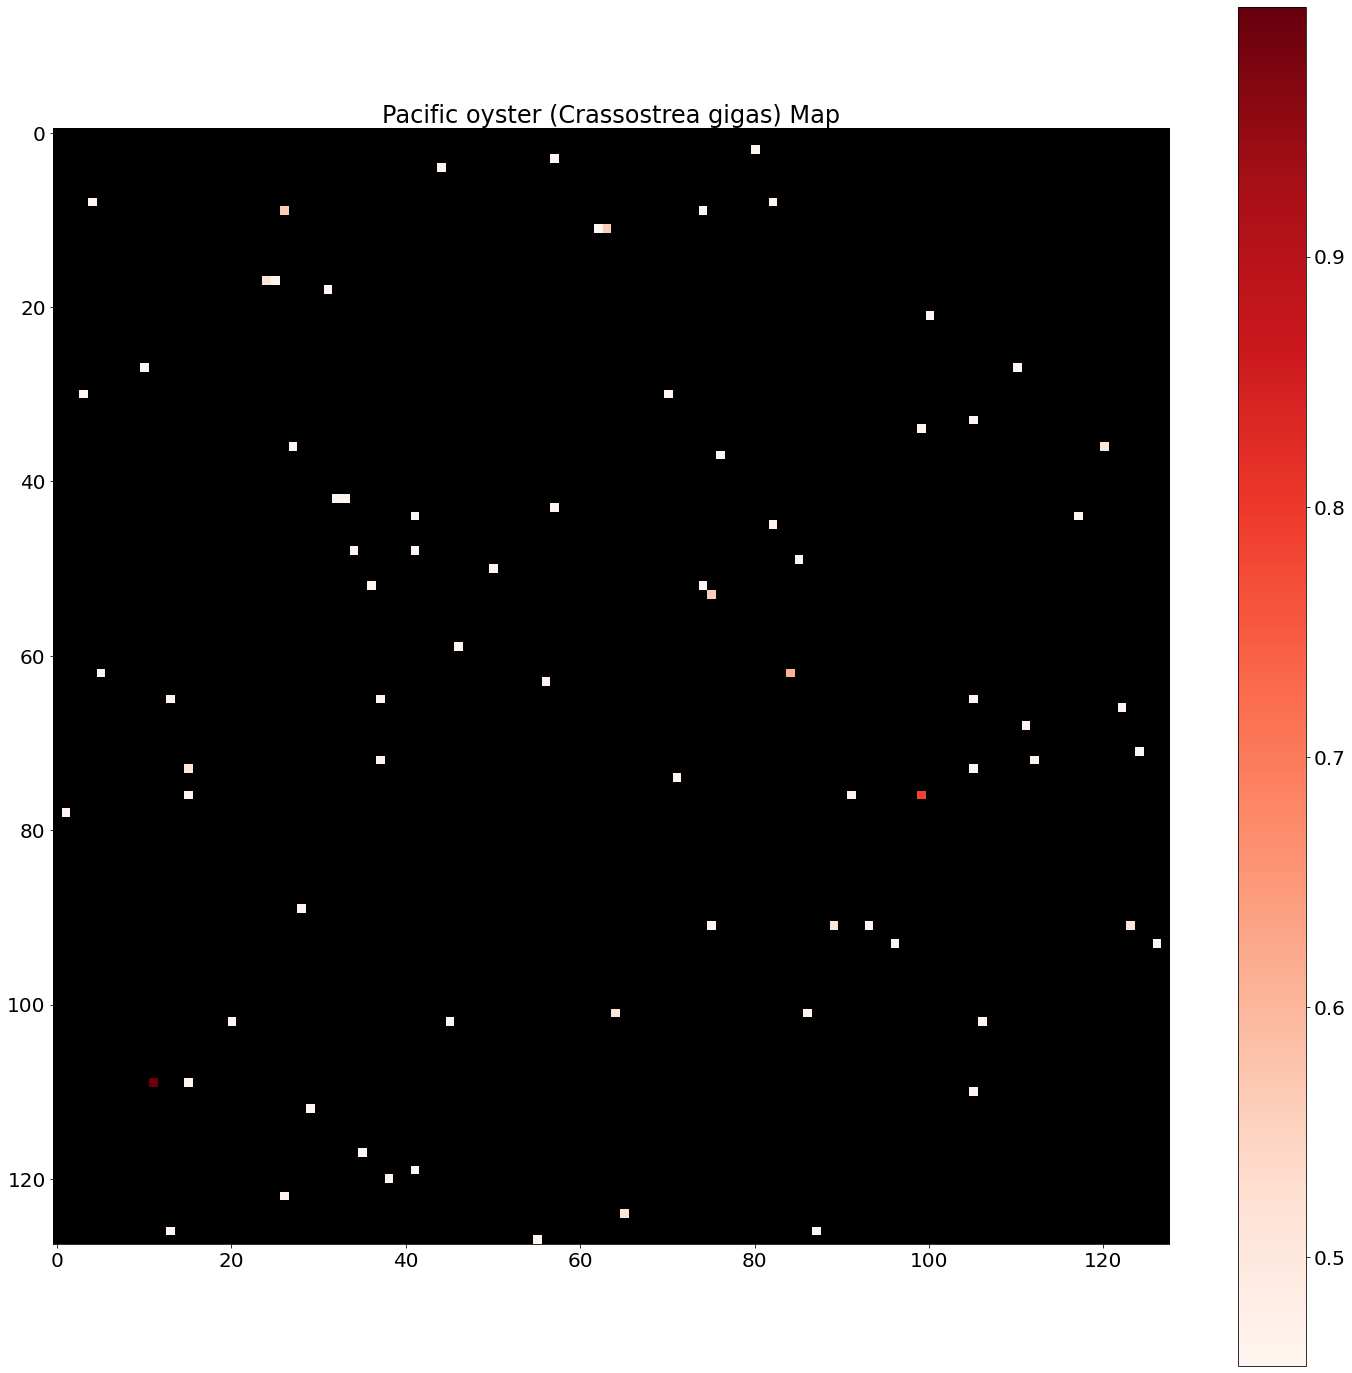

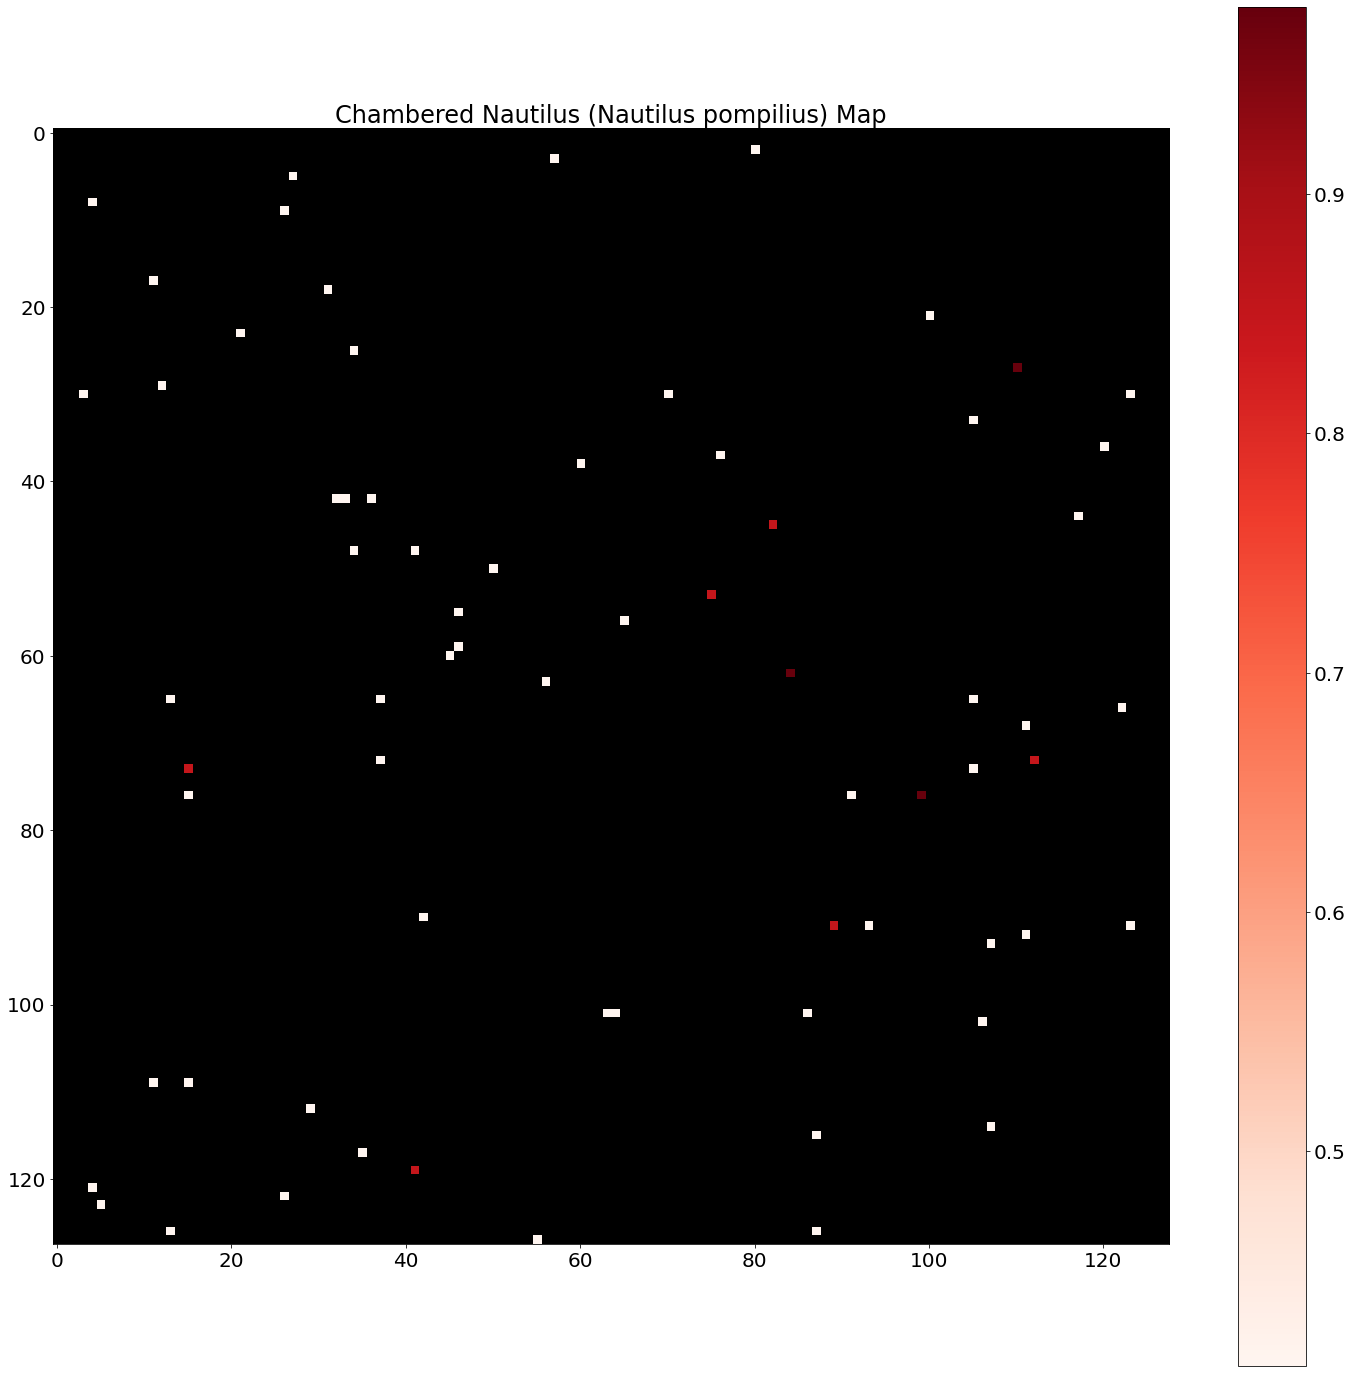

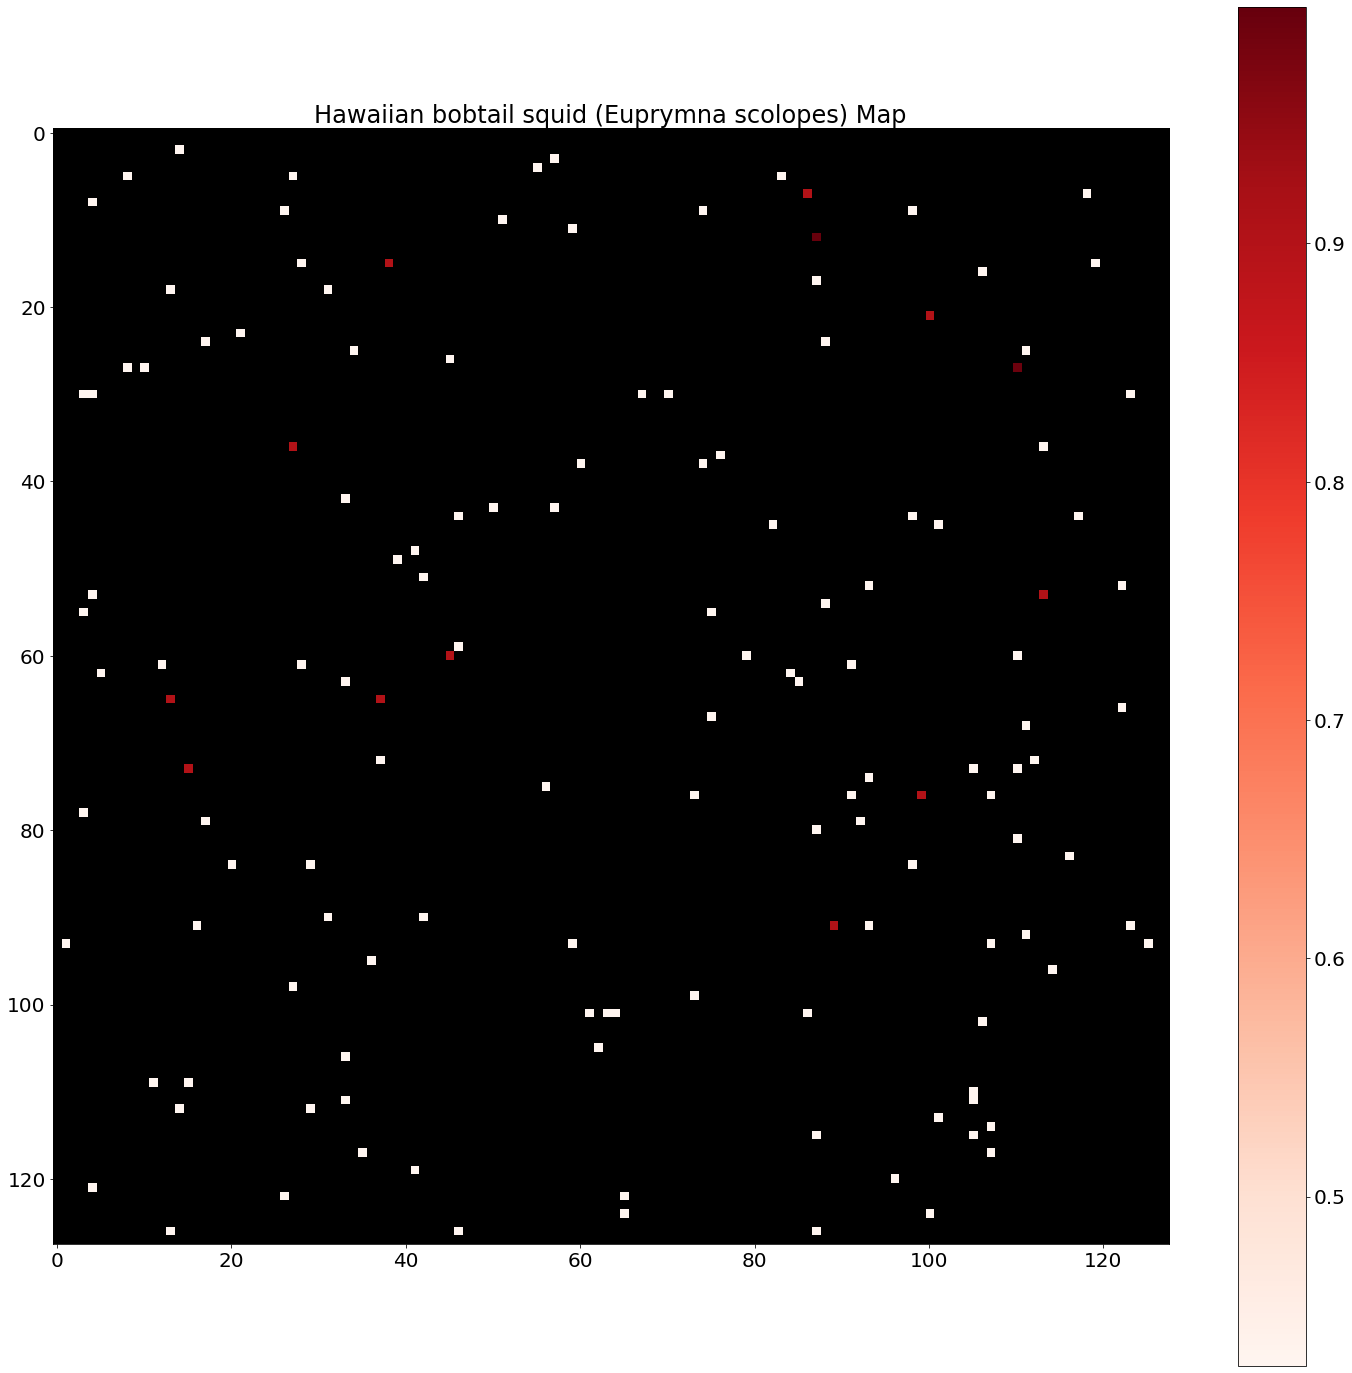

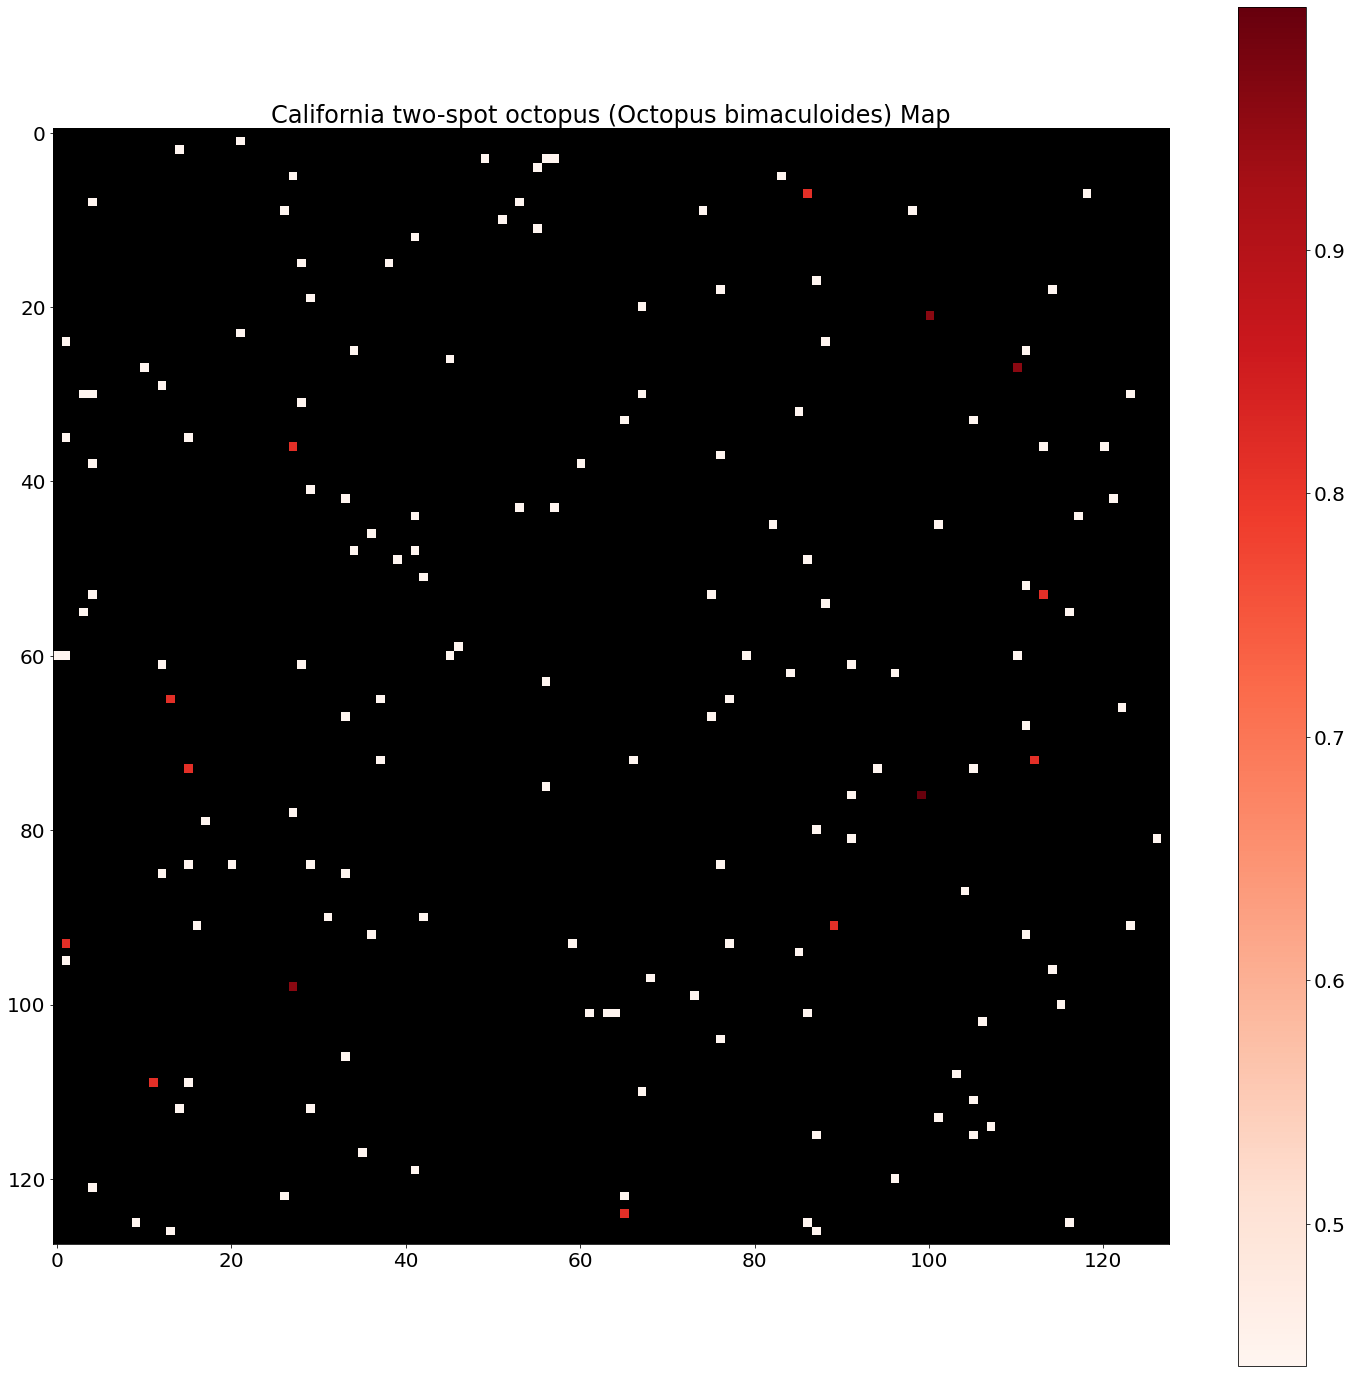

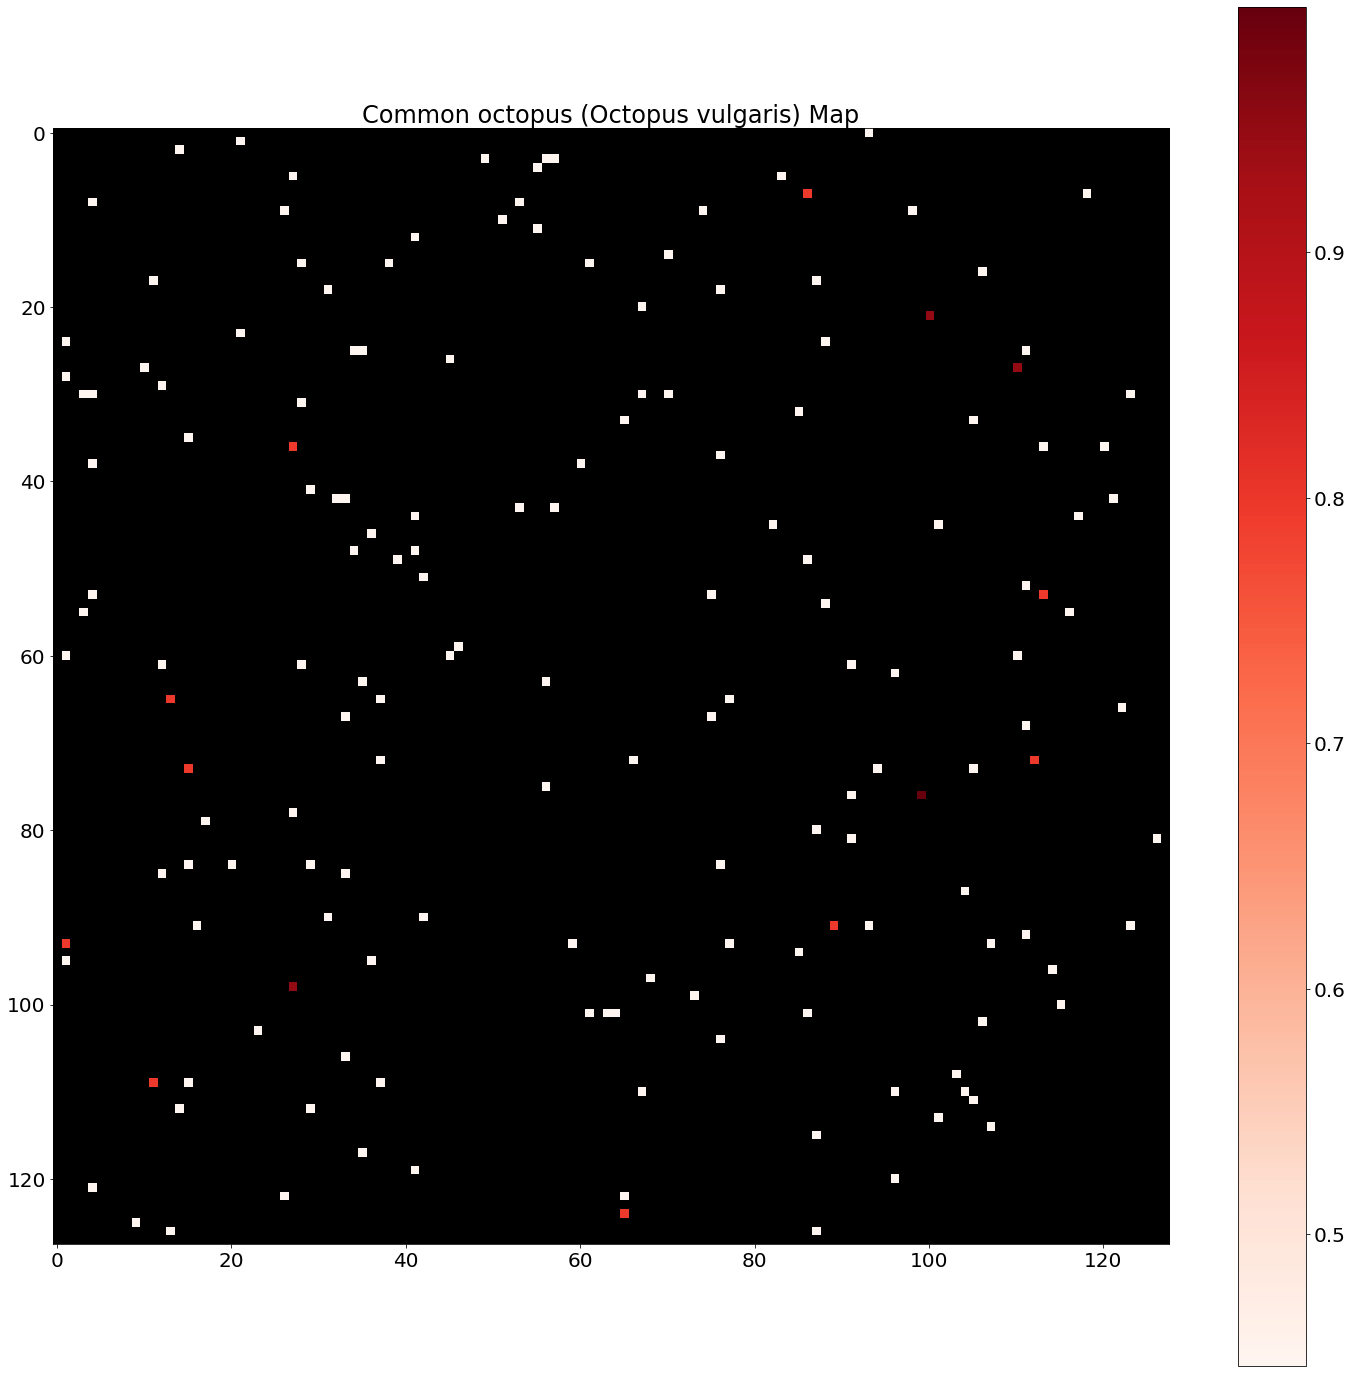

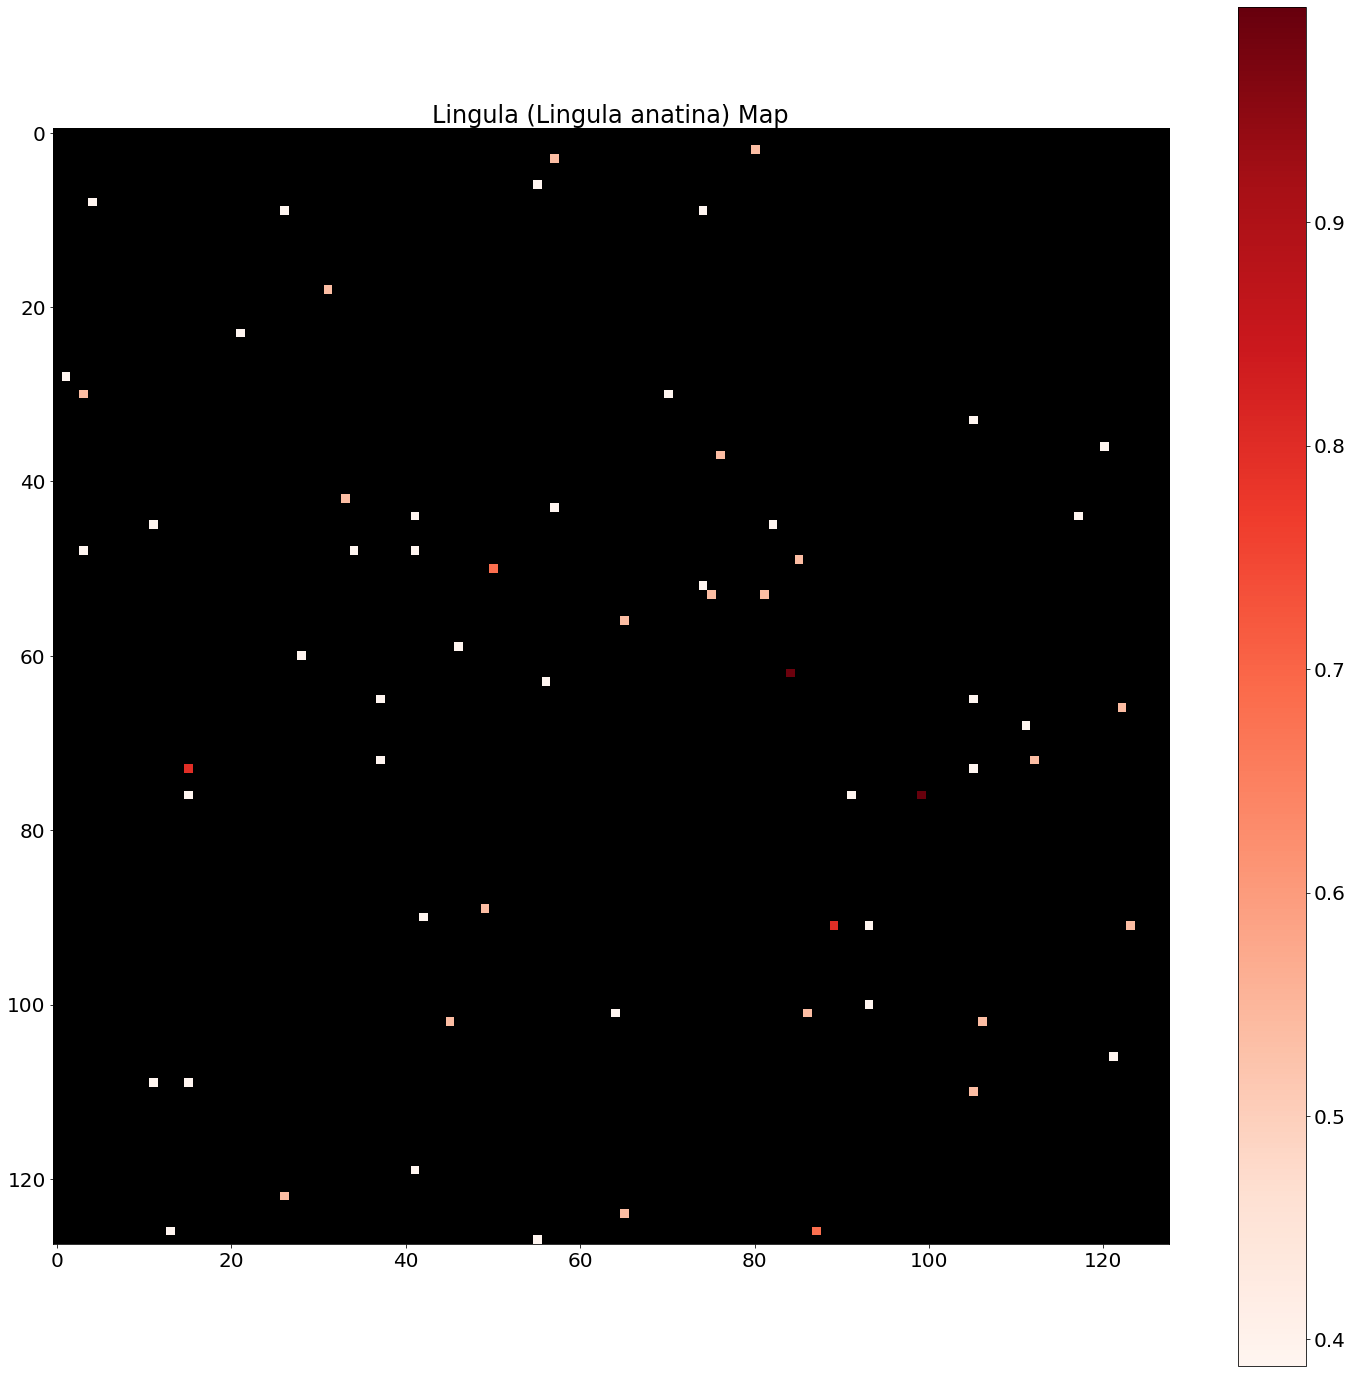

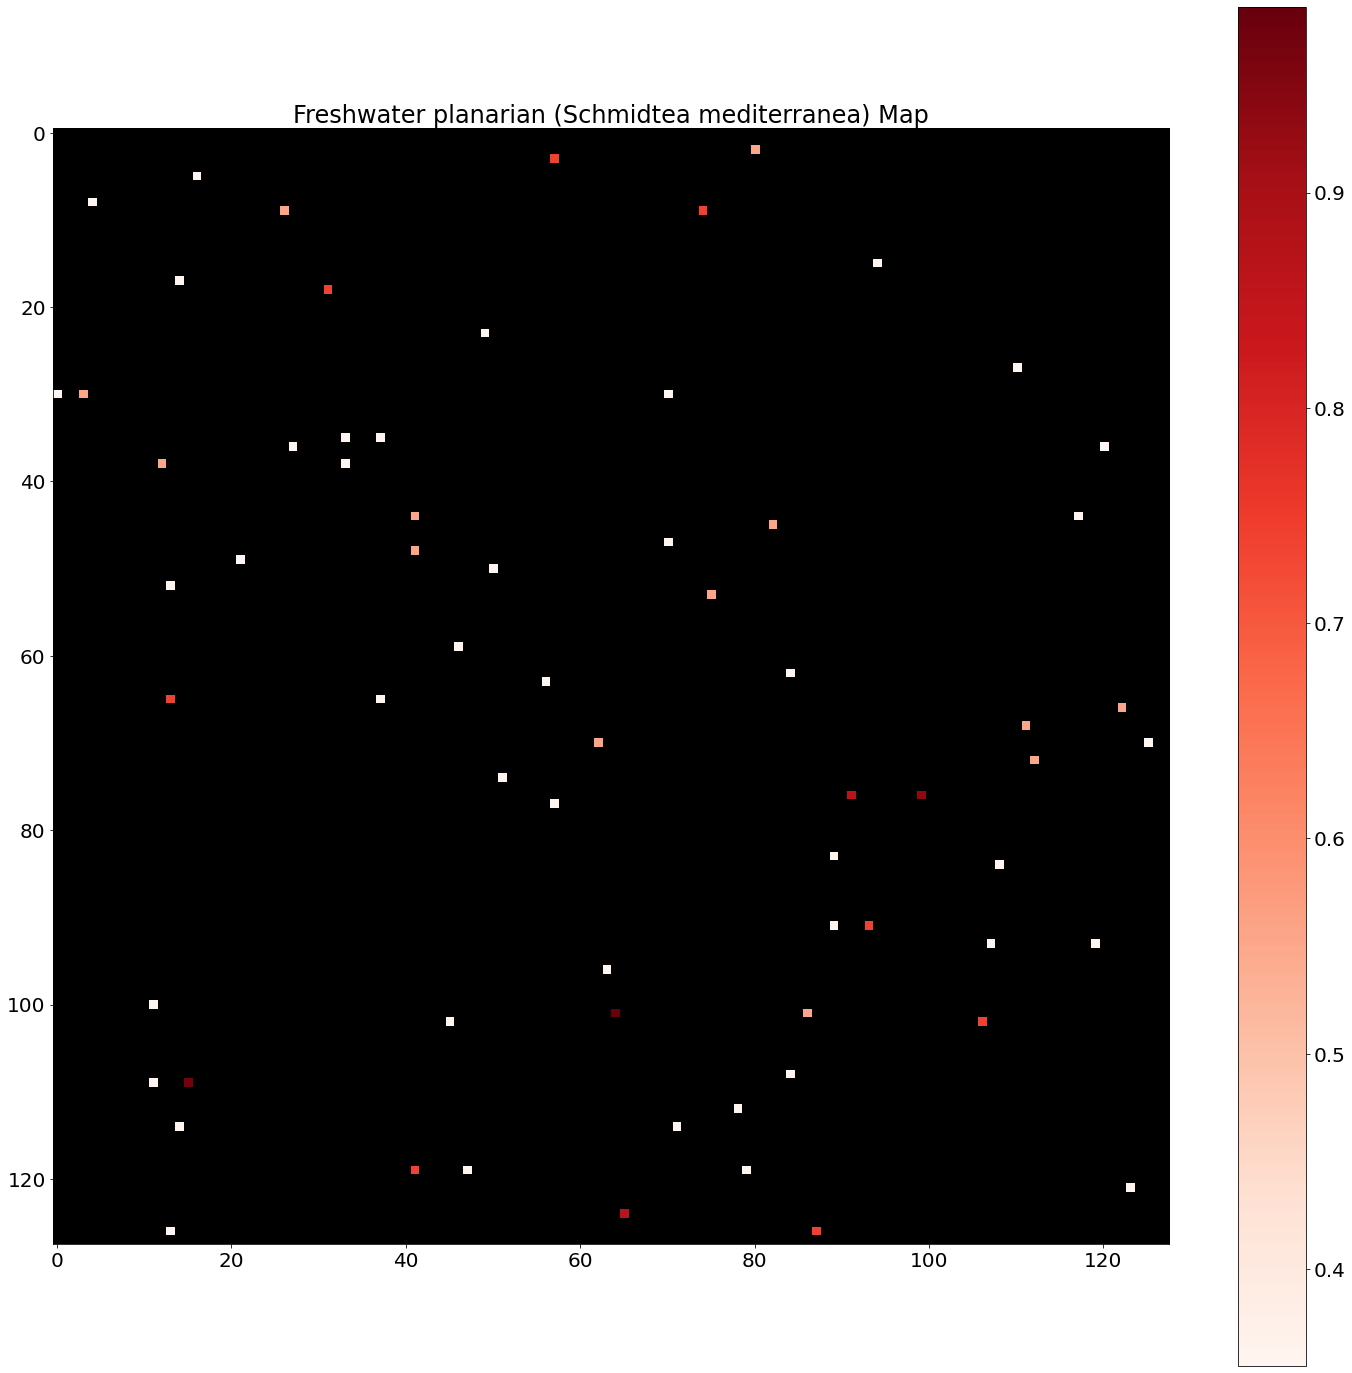

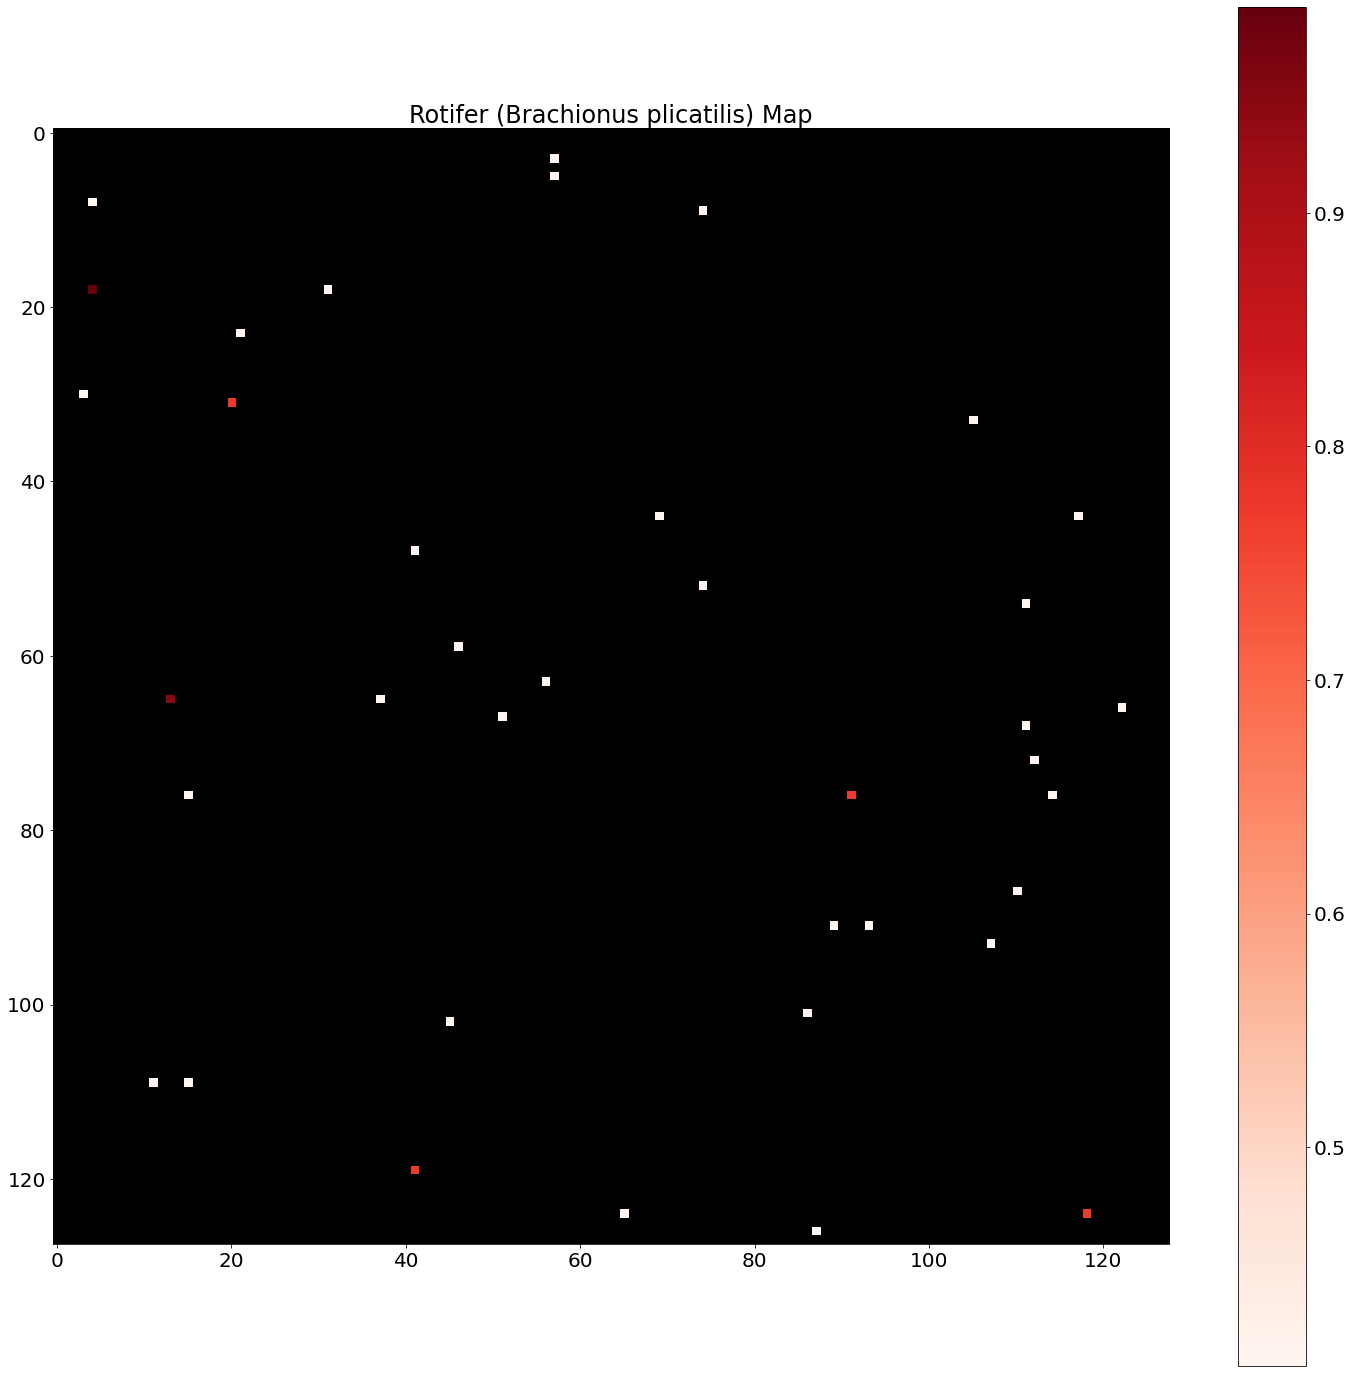

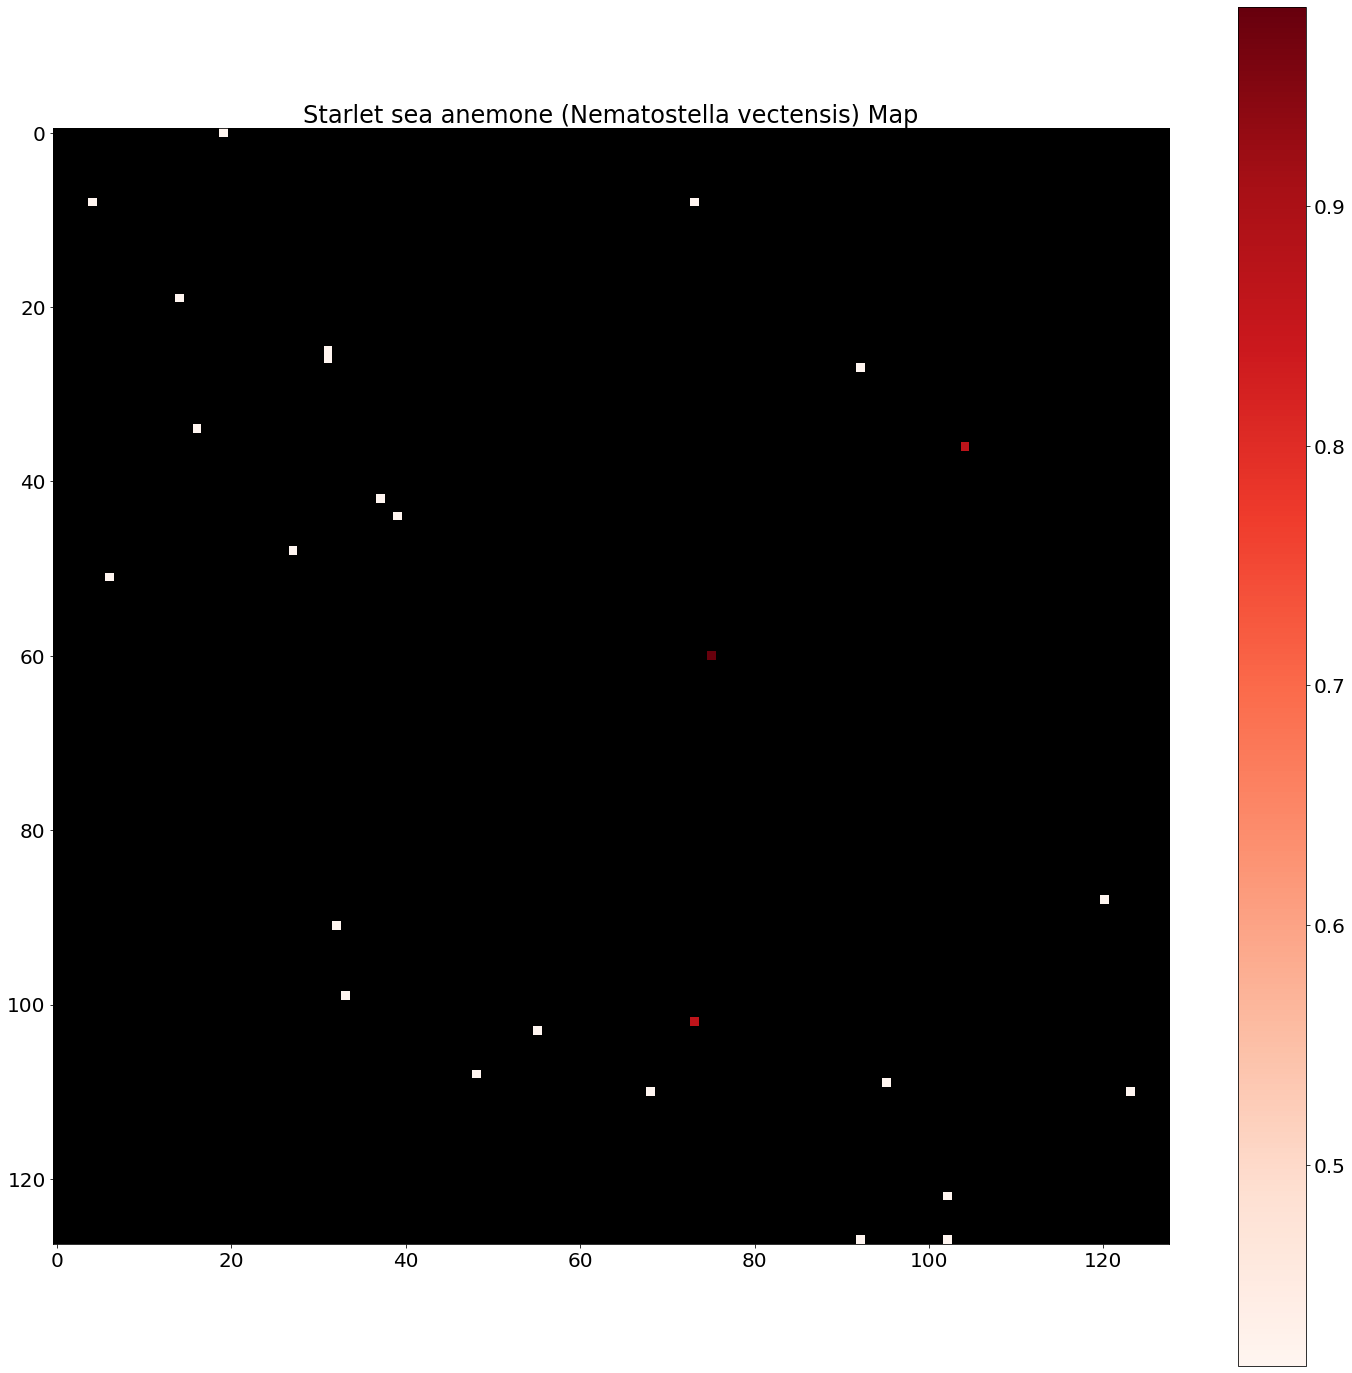

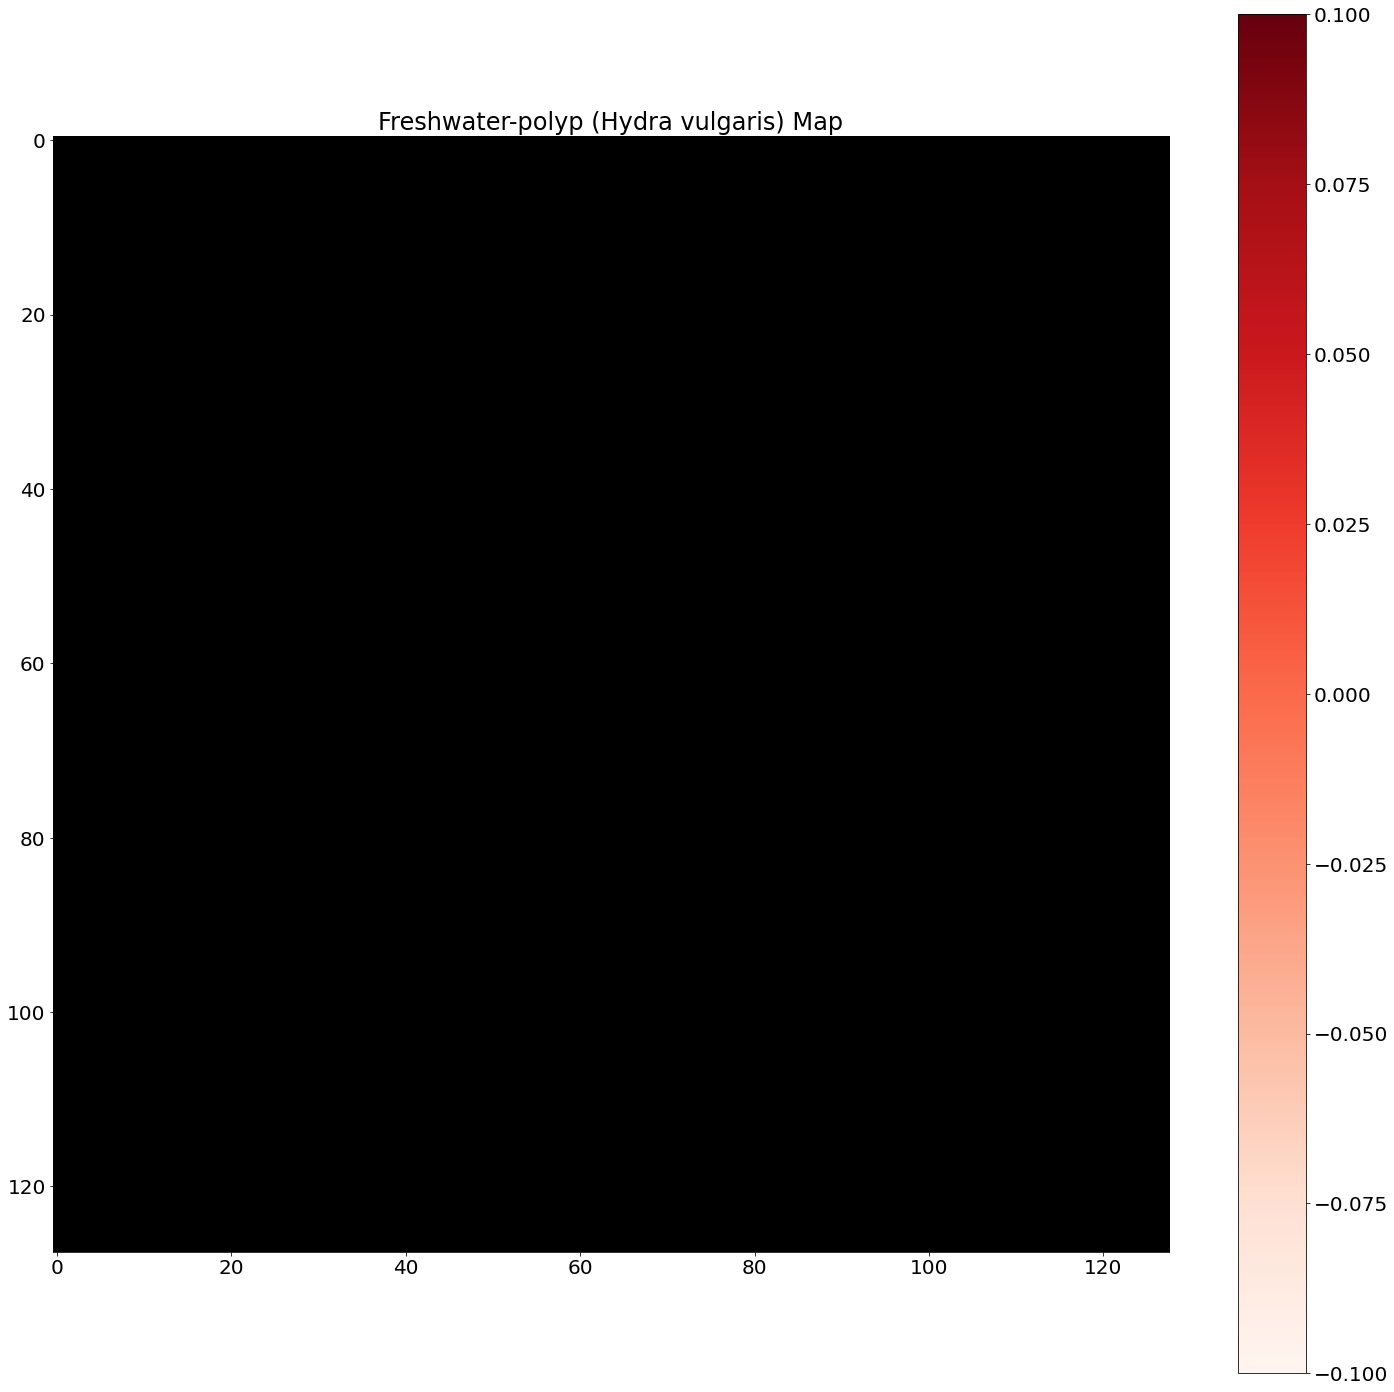

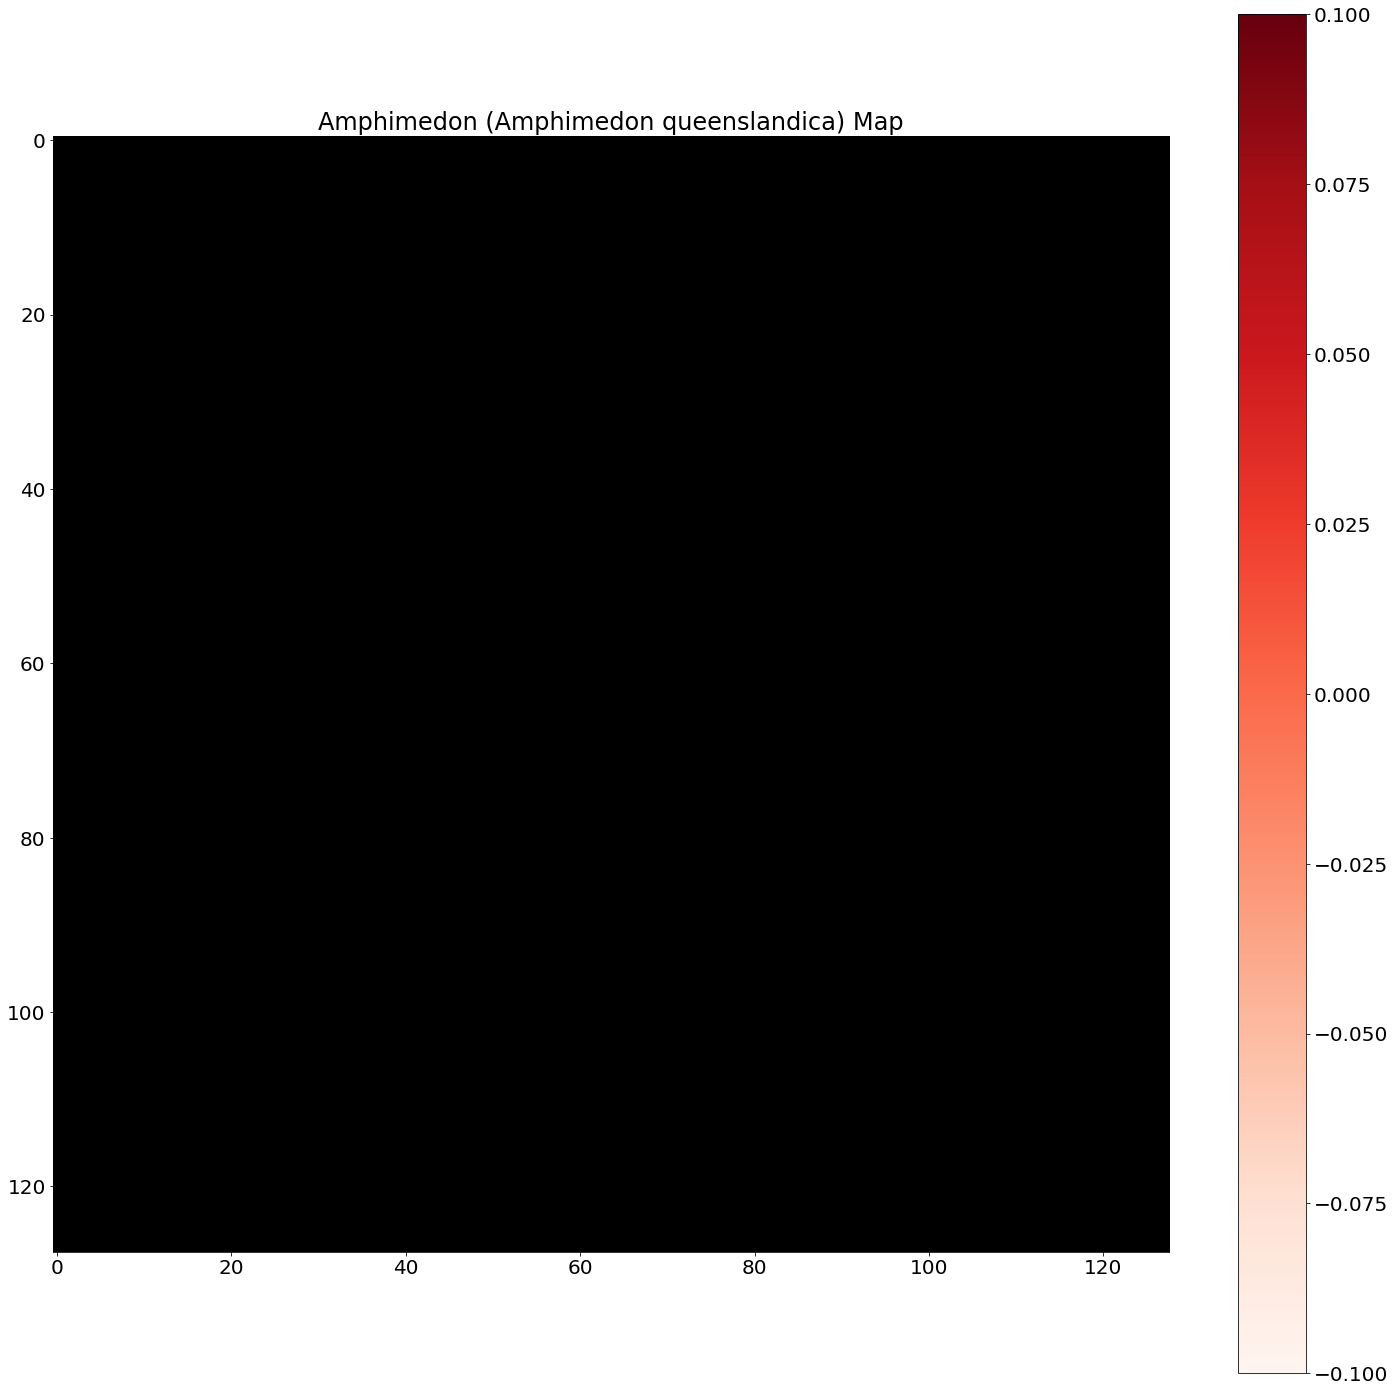

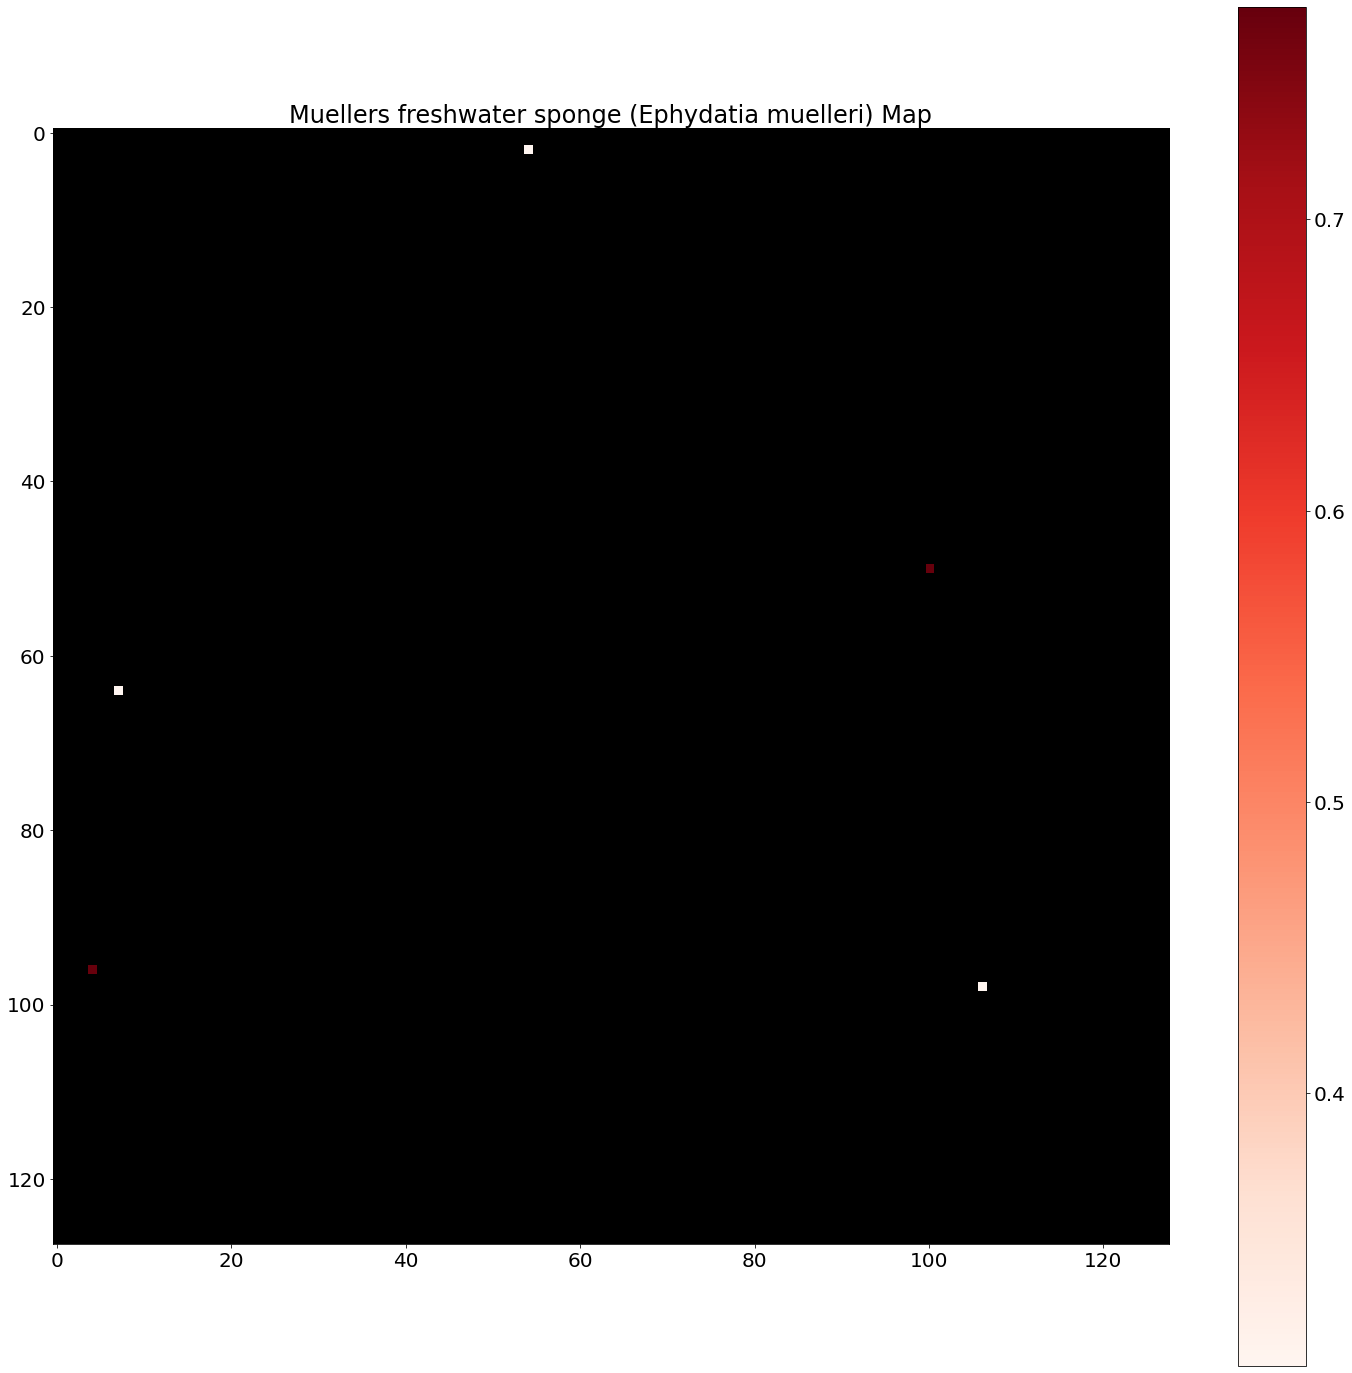

In [9]:
for i in filenames:
    create_isolated_heatmap(i)

In [19]:
with imageio.get_writer('Individual Species Seed.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename +" Map.png")
        writer.append_data(image)